## **Introdução**
Atividade 1 de Ciência e Visualização de Dados em Saúde

Grupo:
*   Emilia Oliveira   - RA: 262867
*   Gabriel Garcia    - RA: 216179
*   Robert Tartarotti - RA: 157173  




Objetivo: Fazer um cruzamento entre a lista de pacientes do Hemocentro com a lista de entradas no Hospital das Clínicas e identificar as pessoas que tiveram neutropenia grave - contagem absoluta de neutrófilos menor que 500 células por mm3. 

# **Processamento dos dados**


## **Primeiros passos para carregar os dados**


In [35]:
# Flag to show all results or only important ones
# Arguments:
#           True  - Show all the results
#           False - Show only important results
VERBOSE = True

### **Importando bibliotecas necessárias**


In [36]:
import os
import glob
import datetime
import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from natsort import natsorted
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import plotly.graph_objects as go

### **Função para converter coluna para numérico**

Será criada uma função para converter todos os dados de uma determinada coluna para numérico e remover aqueles que não são convertidos, visto que estes não podem ser utilizados na análise

In [37]:
def keep_float_param(dataframe: dict, column: str):
    """ Converter elementos da coluna para float e remover strings que não
        representam floats """
    # Declaração de um dataframe para ser utilizado na função
    init_dataframe = dataframe
    # Convertendo quando o sinal é representado por vírgula para ponto
    data_dot = init_dataframe.drop(column, axis=1)
    data_dot[column] = init_dataframe[column].str.replace(",", ".")
    data_num = data_dot
    data_num.loc[:, column] = pd.to_numeric(data_num[column], errors="coerce")
    data_flt = data_num[data_num[column].notna()]

    if VERBOSE:
      print("Dados recebidos:")
      display(init_dataframe)
      print("\n\nDados convertendo ',' para '.':")
      display(data_dot)
      print("\n\nDados convertidos para formato numérico:")
      display(data_num)
      print("\n\nDados após remover linhas vazias:")
      display(data_flt)
      print("\n\n")
    print("Análise dos dados convertidos para float")
    initial_rows = len(init_dataframe[column])
    final_rows = len(data_flt[column])
    print("Número de medidas iniciais para a coluna " + column + ": "
          + str(initial_rows))
    print("Número de medidas finais para a coluna " + column + ": "
          + str(final_rows))
    print("Total de medidas removidas para a coluna " + column + ": " + 
          str(initial_rows - final_rows))
    return data_flt

### **Carregando pasta de entrada de dados**


In [38]:
input_path = "/content/drive/Shareddrives/Dados e saúde/P1/raw"

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### **Carregando arquivos de internação do Hospital das Clínicas**


In [39]:
# Definindo etiquetas para as colunas
# A coluna extra foi adicionada para eventuais colunas extras não previstas
column_names = ("Date", "Age", "Id", "sex", "Type", "Value", "extra")
# Criando uma lista de dataframes com todos os arquivos do Hospital das Clínicas
original_data = []
# Carregando os arquivos na lista
for filename in tqdm(natsorted(glob.glob(input_path + "/*.csv"))):
    original_data.append(pd.read_csv(filename, names=column_names, decimal=",",
                         low_memory=False))
if VERBOSE:
  for file_data in original_data:
    display(file_data)

100%|██████████| 12/12 [00:02<00:00,  4.74it/s]


Date  Age        Id sex                  Type    Value  \
0      2021-10-24 00:33:00   19  20850235   F      PLAQUETAS SANGUE   316,00   
1      2021-10-24 00:33:00   70  16084789   M      PLAQUETAS SANGUE   239,00   
2      2021-10-24 00:33:00   62  25926519   F      PLAQUETAS SANGUE   166,00   
3      2021-10-24 00:33:00   49  20209887   M      PLAQUETAS SANGUE   201,00   
4      2021-10-24 00:33:00   50  25722538   M      PLAQUETAS SANGUE   319,00   
...                    ...  ...       ...  ..                   ...      ...   
69439  2021-12-10 05:44:00   52  14708160   F      PLAQUETAS SANGUE   172,00   
69440  2021-12-10 05:44:00   52  14708160   F  NEUTRÓFILOS ABSOLUTO  10,4661   
69441  2021-12-10 05:44:00   52  14708160   F   LINFÓCITOS ABSOLUTO   0,3609   
69442  2021-12-10 05:44:00   52  14708160   F         NEUTRÓFILOS %     87,0   
69443  2021-12-10 05:44:00   52  14708160   F          LINFÓCITOS %      3,0   

       extra  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
69439    NaN  
69440    NaN  
69441    NaN  
69442    NaN  
69443    NaN  

[69444 rows x 7 columns]

Date  Age        Id sex                  Type   Value  \
0       2019-04-07 13:36:00   38  22536285   M      PLAQUETAS SANGUE  282,00   
1       2019-04-07 13:36:00   38  22536285   M  NEUTRÓFILOS ABSOLUTO  5,8476   
2       2019-04-07 13:36:00   38  22536285   M   LINFÓCITOS ABSOLUTO  3,1896   
3       2019-04-07 13:36:00   38  22536285   M         NEUTRÓFILOS %    44,0   
4       2019-04-07 13:36:00   38  22536285   M          LINFÓCITOS %    24,0   
...                     ...  ...       ...  ..                   ...     ...   
152919  2020-11-19 10:09:00   43  24249245   M      PLAQUETAS SANGUE  234,00   
152920  2020-11-19 10:09:00   43  24249245   M  NEUTRÓFILOS ABSOLUTO  3,8994   
152921  2020-11-19 10:09:00   43  24249245   M   LINFÓCITOS ABSOLUTO  1,8293   
152922  2020-11-19 10:09:00   43  24249245   M         NEUTRÓFILOS %    59,9   
152923  2020-11-19 10:09:00   43  24249245   M          LINFÓCITOS %    28,1   

        extra  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
152919    NaN  
152920    NaN  
152921    NaN  
152922    NaN  
152923    NaN  

[152924 rows x 7 columns]

Date  Age        Id sex                  Type   Value  \
0       2021-07-24 00:18:00   73  25834403   M      PLAQUETAS SANGUE  403,00   
1       2021-07-24 00:18:00   73  25834403   M  NEUTRÓFILOS ABSOLUTO  2,9153   
2       2021-07-24 00:18:00   73  25834403   M   LINFÓCITOS ABSOLUTO  1,8109   
3       2021-07-24 00:18:00   73  25834403   M         NEUTRÓFILOS %    29,3   
4       2021-07-24 00:18:00   73  25834403   M          LINFÓCITOS %    18,2   
...                     ...  ...       ...  ..                   ...     ...   
134478  2021-12-03 09:31:00   25  24766171   M      PLAQUETAS SANGUE   58,00   
134479  2021-12-03 09:31:00   25  24766171   M  NEUTRÓFILOS ABSOLUTO  1,2600   
134480  2021-12-03 09:31:00   25  24766171   M   LINFÓCITOS ABSOLUTO  1,3104   
134481  2021-12-03 09:31:00   25  24766171   M         NEUTRÓFILOS %    45,0   
134482  2021-12-03 09:31:00   25  24766171   M          LINFÓCITOS %    46,8   

        extra  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
134478    NaN  
134479    NaN  
134480    NaN  
134481    NaN  
134482    NaN  

[134483 rows x 7 columns]

Date  Age        Id sex                  Type   Value  \
0       2019-04-07 13:36:00   38  22536285   M      PLAQUETAS SANGUE     282   
1       2019-04-07 13:36:00   38  22536285   M  NEUTRÓFILOS ABSOLUTO  5,8476   
2       2019-04-07 13:36:00   38  22536285   M   LINFÓCITOS ABSOLUTO  3,1896   
3       2019-04-07 13:36:00   38  22536285   M         NEUTRÓFILOS %      44   
4       2019-04-07 13:36:00   38  22536285   M          LINFÓCITOS %      24   
...                     ...  ...       ...  ..                   ...     ...   
152919  2020-11-19 10:09:00   43  24249245   M      PLAQUETAS SANGUE     234   
152920  2020-11-19 10:09:00   43  24249245   M  NEUTRÓFILOS ABSOLUTO  3,8994   
152921  2020-11-19 10:09:00   43  24249245   M   LINFÓCITOS ABSOLUTO  1,8293   
152922  2020-11-19 10:09:00   43  24249245   M         NEUTRÓFILOS %    59,9   
152923  2020-11-19 10:09:00   43  24249245   M          LINFÓCITOS %    28,1   

        extra  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
152919    NaN  
152920    NaN  
152921    NaN  
152922    NaN  
152923    NaN  

[152924 rows x 7 columns]

Date  Age    Id       sex Type                 Value  \
0       2019-10-25 11:18:00  NaN  59.0  22069368    M      PLAQUETAS SANGUE   
1       2019-10-25 11:18:00  NaN  59.0  22069368    M  NEUTRÓFILOS ABSOLUTO   
2       2019-10-25 11:18:00  NaN  59.0  22069368    M   LINFÓCITOS ABSOLUTO   
3       2019-10-25 11:18:00  NaN  59.0  22069368    M         NEUTRÓFILOS %   
4       2019-10-25 11:18:00  NaN  59.0  22069368    M          LINFÓCITOS %   
...                     ...  ...   ...       ...  ...                   ...   
611719  2021-12-03 09:31:00  NaN  25.0  24766171    M      PLAQUETAS SANGUE   
611720  2021-12-03 09:31:00  NaN  25.0  24766171    M  NEUTRÓFILOS ABSOLUTO   
611721  2021-12-03 09:31:00  NaN  25.0  24766171    M   LINFÓCITOS ABSOLUTO   
611722  2021-12-03 09:31:00  NaN  25.0  24766171    M         NEUTRÓFILOS %   
611723  2021-12-03 09:31:00  NaN  25.0  24766171    M          LINFÓCITOS %   

         extra  
0       178,00  
1       6,1050  
2       0,4125  
3         74,0  
4          5,0  
...        ...  
611719   58,00  
611720  1,2600  
611721  1,3104  
611722    45,0  
611723    46,8  

[611724 rows x 7 columns]

Date  Age    Id       sex Type                 Value  \
0       2019-10-25 11:18:00  NaN  59.0  22069368    M      PLAQUETAS SANGUE   
1       2019-10-25 11:18:00  NaN  59.0  22069368    M  NEUTRÓFILOS ABSOLUTO   
2       2019-10-25 11:18:00  NaN  59.0  22069368    M   LINFÓCITOS ABSOLUTO   
3       2019-10-25 11:18:00  NaN  59.0  22069368    M         NEUTRÓFILOS %   
4       2019-10-25 11:18:00  NaN  59.0  22069368    M          LINFÓCITOS %   
...                     ...  ...   ...       ...  ...                   ...   
557421  2021-07-23 23:06:00  NaN   8.0  25848854    M         NEUTRÓFILOS %   
557422  2021-07-23 23:06:00  NaN  36.0  21479568    F         NEUTRÓFILOS %   
557423  2021-07-23 23:06:00  NaN  36.0  21479568    F          LINFÓCITOS %   
557424  2021-07-23 23:06:00  NaN  39.0  25826877    F          LINFÓCITOS %   
557425  2021-07-23 23:06:00  NaN   8.0  25848854    M          LINFÓCITOS %   

         extra  
0       178,00  
1       6,1050  
2       0,4125  
3         74,0  
4          5,0  
...        ...  
557421    80,0  
557422    66,7  
557423    25,8  
557424    27,3  
557425    10,0  

[557426 rows x 7 columns]

Date  Age        Id sex                  Type   Value  \
0       2019-05-29 08:11:00   58  21593308   F      PLAQUETAS SANGUE   32,00   
1       2019-05-29 08:11:00   58  21593308   F  NEUTRÓFILOS ABSOLUTO  2,5020   
2       2019-05-29 08:11:00   58  21593308   F   LINFÓCITOS ABSOLUTO  0,1112   
3       2019-05-29 08:11:00   58  21593308   F         NEUTRÓFILOS %    90,0   
4       2019-05-29 08:11:00   58  21593308   F          LINFÓCITOS %     4,0   
...                     ...  ...       ...  ..                   ...     ...   
169784  2019-11-02 12:10:00   19  23735957   M      PLAQUETAS SANGUE  576,00   
169785  2019-11-02 12:10:00   19  23735957   M  NEUTRÓFILOS ABSOLUTO  6,4700   
169786  2019-11-02 12:10:00   19  23735957   M   LINFÓCITOS ABSOLUTO  1,9200   
169787  2019-11-02 12:10:00   19  23735957   M         NEUTRÓFILOS %    74,2   
169788  2019-11-02 12:10:00   19  23735957   M          LINFÓCITOS %    22,1   

        extra  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
169784    NaN  
169785    NaN  
169786    NaN  
169787    NaN  
169788    NaN  

[169789 rows x 7 columns]

Date  Age        Id sex                  Type Value  \
0       2018-10-24 08:50:00   69  19849298   M      PLAQUETAS SANGUE   218   
1       2018-10-24 08:50:00   69  19849298   M  NEUTRÓFILOS ABSOLUTO  5,85   
2       2018-10-24 08:50:00   69  19849298   M   LINFÓCITOS ABSOLUTO  2,44   
3       2018-10-24 08:50:00   69  19849298   M         NEUTRÓFILOS %  62,3   
4       2018-10-24 08:50:00   69  19849298   M          LINFÓCITOS %  25,9   
...                     ...  ...       ...  ..                   ...   ...   
149610  2020-01-10 08:30:00   35  24561516   F      PLAQUETAS SANGUE   244   
149611  2020-01-10 08:30:00   35  24561516   F  NEUTRÓFILOS ABSOLUTO  4,09   
149612  2020-01-10 08:30:00   35  24561516   F   LINFÓCITOS ABSOLUTO  2,17   
149613  2020-01-10 08:30:00   35  24561516   F         NEUTRÓFILOS %  60,4   
149614  2020-01-10 08:30:00   35  24561516   F          LINFÓCITOS %    32   

        extra  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
149610    NaN  
149611    NaN  
149612    NaN  
149613    NaN  
149614    NaN  

[149615 rows x 7 columns]

Date  Age        Id sex                  Type    Value  \
0      2021-10-24 00:33:00   19  20850235   F      PLAQUETAS SANGUE      316   
1      2021-10-24 00:33:00   70  16084789   M      PLAQUETAS SANGUE      239   
2      2021-10-24 00:33:00   62  25926519   F      PLAQUETAS SANGUE      166   
3      2021-10-24 00:33:00   49  20209887   M      PLAQUETAS SANGUE      201   
4      2021-10-24 00:33:00   50  25722538   M      PLAQUETAS SANGUE      319   
...                    ...  ...       ...  ..                   ...      ...   
69439  2021-12-10 05:44:00   52  14708160   F      PLAQUETAS SANGUE      172   
69440  2021-12-10 05:44:00   52  14708160   F  NEUTRÓFILOS ABSOLUTO  10,4661   
69441  2021-12-10 05:44:00   52  14708160   F   LINFÓCITOS ABSOLUTO   0,3609   
69442  2021-12-10 05:44:00   52  14708160   F         NEUTRÓFILOS %       87   
69443  2021-12-10 05:44:00   52  14708160   F          LINFÓCITOS %        3   

       extra  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
69439    NaN  
69440    NaN  
69441    NaN  
69442    NaN  
69443    NaN  

[69444 rows x 7 columns]

Date  Age        Id sex                  Type   Value  \
0       2021-04-23 23:55:00   37  25775219   M      PLAQUETAS SANGUE   78,00   
1       2021-04-23 23:55:00   37  25775219   M  NEUTRÓFILOS ABSOLUTO  2,1045   
2       2021-04-23 23:55:00   37  25775219   M   LINFÓCITOS ABSOLUTO  0,2440   
3       2021-04-23 23:55:00   37  25775219   M         NEUTRÓFILOS %    69,0   
4       2021-04-23 23:55:00   37  25775219   M          LINFÓCITOS %     8,0   
...                     ...  ...       ...  ..                   ...     ...   
126275  2021-07-23 23:06:00   36  21479568   F         NEUTRÓFILOS %    66,7   
126276  2021-07-23 23:06:00    8  25848854   M         NEUTRÓFILOS %    80,0   
126277  2021-07-23 23:06:00   36  21479568   F          LINFÓCITOS %    25,8   
126278  2021-07-23 23:06:00    8  25848854   M          LINFÓCITOS %    10,0   
126279  2021-07-23 23:06:00   39  25826877   F          LINFÓCITOS %    27,3   

        extra  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
126275    NaN  
126276    NaN  
126277    NaN  
126278    NaN  
126279    NaN  

[126280 rows x 7 columns]

Date  Age        Id sex                  Type   Value  \
0       2019-10-25 11:18:00   59  22069368   M      PLAQUETAS SANGUE  178,00   
1       2019-10-25 11:18:00   59  22069368   M  NEUTRÓFILOS ABSOLUTO  6,1050   
2       2019-10-25 11:18:00   59  22069368   M   LINFÓCITOS ABSOLUTO  0,4125   
3       2019-10-25 11:18:00   59  22069368   M         NEUTRÓFILOS %    74,0   
4       2019-10-25 11:18:00   59  22069368   M          LINFÓCITOS %     5,0   
...                     ...  ...       ...  ..                   ...     ...   
580041  2021-12-10 10:48:00    7  25981132   M          LINFÓCITOS %    37,9   
580042  2021-12-10 10:48:00   76  12021520   F          LINFÓCITOS %    33,9   
580043  2021-12-10 10:48:00   59  22778359   M          LINFÓCITOS %    32,9   
580044  2021-12-10 10:48:00   73  16304100   F          LINFÓCITOS %    26,5   
580045  2021-12-10 10:48:00   37  24975748   F          LINFÓCITOS %    23,4   

        extra  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
580041    NaN  
580042    NaN  
580043    NaN  
580044    NaN  
580045    NaN  

[580046 rows x 7 columns]

Date  Age        Id sex                  Type    Value  \
0       2019-04-23 22:59:00   61  25140826   M      PLAQUETAS SANGUE   563,00   
1       2019-04-23 22:59:00    7  25066014   M      PLAQUETAS SANGUE   288,00   
2       2019-04-23 22:59:00   61  25140826   M  NEUTRÓFILOS ABSOLUTO  21,9328   
3       2019-04-23 22:59:00    7  25066014   M  NEUTRÓFILOS ABSOLUTO  11,3742   
4       2019-04-23 22:59:00   61  25140826   M   LINFÓCITOS ABSOLUTO   0,4768   
...                     ...  ...       ...  ..                   ...      ...   
167584  2019-11-14 15:26:00   68  17744364   F      PLAQUETAS SANGUE   261,00   
167585  2019-11-14 15:26:00   68  17744364   F  NEUTRÓFILOS ABSOLUTO   5,8900   
167586  2019-11-14 15:26:00   68  17744364   F   LINFÓCITOS ABSOLUTO   4,1000   
167587  2019-11-14 15:26:00   68  17744364   F         NEUTRÓFILOS %     53,2   
167588  2019-11-14 15:26:00   68  17744364   F          LINFÓCITOS %     37,0   

        extra  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
167584    NaN  
167585    NaN  
167586    NaN  
167587    NaN  
167588    NaN  

[167589 rows x 7 columns]

### **Removendo colunas vazias**

Como pode-se verificar na análise acima, algumas colunas estão vazias, e isso dificulta a análise. O caminho mais trivial para efetuar o processamento é removendo as colunas vazias

In [40]:
#Criando uma nova matriz para receber o dado original sem as colunas vazias 
data_no_empty_col = []
# Removendo as colunas vazias 
for file_data in tqdm(original_data):
  final_data = file_data
  for column in column_names:
    if file_data[column].dropna().empty:
      final_data = final_data.drop(columns=column)
  # Ajuste do nome das colunas, sem colunas extras
  final_data.columns = ["Date", "Age", "Id", "sex", "Type", "Value"]
  data_no_empty_col.append(final_data)

if VERBOSE:
  for final_data in data_no_empty_col:
    display(final_data)

100%|██████████| 12/12 [00:00<00:00, 16.56it/s]


Date  Age        Id sex                  Type    Value
0      2021-10-24 00:33:00   19  20850235   F      PLAQUETAS SANGUE   316,00
1      2021-10-24 00:33:00   70  16084789   M      PLAQUETAS SANGUE   239,00
2      2021-10-24 00:33:00   62  25926519   F      PLAQUETAS SANGUE   166,00
3      2021-10-24 00:33:00   49  20209887   M      PLAQUETAS SANGUE   201,00
4      2021-10-24 00:33:00   50  25722538   M      PLAQUETAS SANGUE   319,00
...                    ...  ...       ...  ..                   ...      ...
69439  2021-12-10 05:44:00   52  14708160   F      PLAQUETAS SANGUE   172,00
69440  2021-12-10 05:44:00   52  14708160   F  NEUTRÓFILOS ABSOLUTO  10,4661
69441  2021-12-10 05:44:00   52  14708160   F   LINFÓCITOS ABSOLUTO   0,3609
69442  2021-12-10 05:44:00   52  14708160   F         NEUTRÓFILOS %     87,0
69443  2021-12-10 05:44:00   52  14708160   F          LINFÓCITOS %      3,0

[69444 rows x 6 columns]

Date  Age        Id sex                  Type   Value
0       2019-04-07 13:36:00   38  22536285   M      PLAQUETAS SANGUE  282,00
1       2019-04-07 13:36:00   38  22536285   M  NEUTRÓFILOS ABSOLUTO  5,8476
2       2019-04-07 13:36:00   38  22536285   M   LINFÓCITOS ABSOLUTO  3,1896
3       2019-04-07 13:36:00   38  22536285   M         NEUTRÓFILOS %    44,0
4       2019-04-07 13:36:00   38  22536285   M          LINFÓCITOS %    24,0
...                     ...  ...       ...  ..                   ...     ...
152919  2020-11-19 10:09:00   43  24249245   M      PLAQUETAS SANGUE  234,00
152920  2020-11-19 10:09:00   43  24249245   M  NEUTRÓFILOS ABSOLUTO  3,8994
152921  2020-11-19 10:09:00   43  24249245   M   LINFÓCITOS ABSOLUTO  1,8293
152922  2020-11-19 10:09:00   43  24249245   M         NEUTRÓFILOS %    59,9
152923  2020-11-19 10:09:00   43  24249245   M          LINFÓCITOS %    28,1

[152924 rows x 6 columns]

Date  Age        Id sex                  Type   Value
0       2021-07-24 00:18:00   73  25834403   M      PLAQUETAS SANGUE  403,00
1       2021-07-24 00:18:00   73  25834403   M  NEUTRÓFILOS ABSOLUTO  2,9153
2       2021-07-24 00:18:00   73  25834403   M   LINFÓCITOS ABSOLUTO  1,8109
3       2021-07-24 00:18:00   73  25834403   M         NEUTRÓFILOS %    29,3
4       2021-07-24 00:18:00   73  25834403   M          LINFÓCITOS %    18,2
...                     ...  ...       ...  ..                   ...     ...
134478  2021-12-03 09:31:00   25  24766171   M      PLAQUETAS SANGUE   58,00
134479  2021-12-03 09:31:00   25  24766171   M  NEUTRÓFILOS ABSOLUTO  1,2600
134480  2021-12-03 09:31:00   25  24766171   M   LINFÓCITOS ABSOLUTO  1,3104
134481  2021-12-03 09:31:00   25  24766171   M         NEUTRÓFILOS %    45,0
134482  2021-12-03 09:31:00   25  24766171   M          LINFÓCITOS %    46,8

[134483 rows x 6 columns]

Date  Age        Id sex                  Type   Value
0       2019-04-07 13:36:00   38  22536285   M      PLAQUETAS SANGUE     282
1       2019-04-07 13:36:00   38  22536285   M  NEUTRÓFILOS ABSOLUTO  5,8476
2       2019-04-07 13:36:00   38  22536285   M   LINFÓCITOS ABSOLUTO  3,1896
3       2019-04-07 13:36:00   38  22536285   M         NEUTRÓFILOS %      44
4       2019-04-07 13:36:00   38  22536285   M          LINFÓCITOS %      24
...                     ...  ...       ...  ..                   ...     ...
152919  2020-11-19 10:09:00   43  24249245   M      PLAQUETAS SANGUE     234
152920  2020-11-19 10:09:00   43  24249245   M  NEUTRÓFILOS ABSOLUTO  3,8994
152921  2020-11-19 10:09:00   43  24249245   M   LINFÓCITOS ABSOLUTO  1,8293
152922  2020-11-19 10:09:00   43  24249245   M         NEUTRÓFILOS %    59,9
152923  2020-11-19 10:09:00   43  24249245   M          LINFÓCITOS %    28,1

[152924 rows x 6 columns]

Date   Age        Id sex                  Type   Value
0       2019-10-25 11:18:00  59.0  22069368   M      PLAQUETAS SANGUE  178,00
1       2019-10-25 11:18:00  59.0  22069368   M  NEUTRÓFILOS ABSOLUTO  6,1050
2       2019-10-25 11:18:00  59.0  22069368   M   LINFÓCITOS ABSOLUTO  0,4125
3       2019-10-25 11:18:00  59.0  22069368   M         NEUTRÓFILOS %    74,0
4       2019-10-25 11:18:00  59.0  22069368   M          LINFÓCITOS %     5,0
...                     ...   ...       ...  ..                   ...     ...
611719  2021-12-03 09:31:00  25.0  24766171   M      PLAQUETAS SANGUE   58,00
611720  2021-12-03 09:31:00  25.0  24766171   M  NEUTRÓFILOS ABSOLUTO  1,2600
611721  2021-12-03 09:31:00  25.0  24766171   M   LINFÓCITOS ABSOLUTO  1,3104
611722  2021-12-03 09:31:00  25.0  24766171   M         NEUTRÓFILOS %    45,0
611723  2021-12-03 09:31:00  25.0  24766171   M          LINFÓCITOS %    46,8

[611724 rows x 6 columns]

Date   Age        Id sex                  Type   Value
0       2019-10-25 11:18:00  59.0  22069368   M      PLAQUETAS SANGUE  178,00
1       2019-10-25 11:18:00  59.0  22069368   M  NEUTRÓFILOS ABSOLUTO  6,1050
2       2019-10-25 11:18:00  59.0  22069368   M   LINFÓCITOS ABSOLUTO  0,4125
3       2019-10-25 11:18:00  59.0  22069368   M         NEUTRÓFILOS %    74,0
4       2019-10-25 11:18:00  59.0  22069368   M          LINFÓCITOS %     5,0
...                     ...   ...       ...  ..                   ...     ...
557421  2021-07-23 23:06:00   8.0  25848854   M         NEUTRÓFILOS %    80,0
557422  2021-07-23 23:06:00  36.0  21479568   F         NEUTRÓFILOS %    66,7
557423  2021-07-23 23:06:00  36.0  21479568   F          LINFÓCITOS %    25,8
557424  2021-07-23 23:06:00  39.0  25826877   F          LINFÓCITOS %    27,3
557425  2021-07-23 23:06:00   8.0  25848854   M          LINFÓCITOS %    10,0

[557426 rows x 6 columns]

Date  Age        Id sex                  Type   Value
0       2019-05-29 08:11:00   58  21593308   F      PLAQUETAS SANGUE   32,00
1       2019-05-29 08:11:00   58  21593308   F  NEUTRÓFILOS ABSOLUTO  2,5020
2       2019-05-29 08:11:00   58  21593308   F   LINFÓCITOS ABSOLUTO  0,1112
3       2019-05-29 08:11:00   58  21593308   F         NEUTRÓFILOS %    90,0
4       2019-05-29 08:11:00   58  21593308   F          LINFÓCITOS %     4,0
...                     ...  ...       ...  ..                   ...     ...
169784  2019-11-02 12:10:00   19  23735957   M      PLAQUETAS SANGUE  576,00
169785  2019-11-02 12:10:00   19  23735957   M  NEUTRÓFILOS ABSOLUTO  6,4700
169786  2019-11-02 12:10:00   19  23735957   M   LINFÓCITOS ABSOLUTO  1,9200
169787  2019-11-02 12:10:00   19  23735957   M         NEUTRÓFILOS %    74,2
169788  2019-11-02 12:10:00   19  23735957   M          LINFÓCITOS %    22,1

[169789 rows x 6 columns]

Date  Age        Id sex                  Type Value
0       2018-10-24 08:50:00   69  19849298   M      PLAQUETAS SANGUE   218
1       2018-10-24 08:50:00   69  19849298   M  NEUTRÓFILOS ABSOLUTO  5,85
2       2018-10-24 08:50:00   69  19849298   M   LINFÓCITOS ABSOLUTO  2,44
3       2018-10-24 08:50:00   69  19849298   M         NEUTRÓFILOS %  62,3
4       2018-10-24 08:50:00   69  19849298   M          LINFÓCITOS %  25,9
...                     ...  ...       ...  ..                   ...   ...
149610  2020-01-10 08:30:00   35  24561516   F      PLAQUETAS SANGUE   244
149611  2020-01-10 08:30:00   35  24561516   F  NEUTRÓFILOS ABSOLUTO  4,09
149612  2020-01-10 08:30:00   35  24561516   F   LINFÓCITOS ABSOLUTO  2,17
149613  2020-01-10 08:30:00   35  24561516   F         NEUTRÓFILOS %  60,4
149614  2020-01-10 08:30:00   35  24561516   F          LINFÓCITOS %    32

[149615 rows x 6 columns]

Date  Age        Id sex                  Type    Value
0      2021-10-24 00:33:00   19  20850235   F      PLAQUETAS SANGUE      316
1      2021-10-24 00:33:00   70  16084789   M      PLAQUETAS SANGUE      239
2      2021-10-24 00:33:00   62  25926519   F      PLAQUETAS SANGUE      166
3      2021-10-24 00:33:00   49  20209887   M      PLAQUETAS SANGUE      201
4      2021-10-24 00:33:00   50  25722538   M      PLAQUETAS SANGUE      319
...                    ...  ...       ...  ..                   ...      ...
69439  2021-12-10 05:44:00   52  14708160   F      PLAQUETAS SANGUE      172
69440  2021-12-10 05:44:00   52  14708160   F  NEUTRÓFILOS ABSOLUTO  10,4661
69441  2021-12-10 05:44:00   52  14708160   F   LINFÓCITOS ABSOLUTO   0,3609
69442  2021-12-10 05:44:00   52  14708160   F         NEUTRÓFILOS %       87
69443  2021-12-10 05:44:00   52  14708160   F          LINFÓCITOS %        3

[69444 rows x 6 columns]

Date  Age        Id sex                  Type   Value
0       2021-04-23 23:55:00   37  25775219   M      PLAQUETAS SANGUE   78,00
1       2021-04-23 23:55:00   37  25775219   M  NEUTRÓFILOS ABSOLUTO  2,1045
2       2021-04-23 23:55:00   37  25775219   M   LINFÓCITOS ABSOLUTO  0,2440
3       2021-04-23 23:55:00   37  25775219   M         NEUTRÓFILOS %    69,0
4       2021-04-23 23:55:00   37  25775219   M          LINFÓCITOS %     8,0
...                     ...  ...       ...  ..                   ...     ...
126275  2021-07-23 23:06:00   36  21479568   F         NEUTRÓFILOS %    66,7
126276  2021-07-23 23:06:00    8  25848854   M         NEUTRÓFILOS %    80,0
126277  2021-07-23 23:06:00   36  21479568   F          LINFÓCITOS %    25,8
126278  2021-07-23 23:06:00    8  25848854   M          LINFÓCITOS %    10,0
126279  2021-07-23 23:06:00   39  25826877   F          LINFÓCITOS %    27,3

[126280 rows x 6 columns]

Date  Age        Id sex                  Type   Value
0       2019-10-25 11:18:00   59  22069368   M      PLAQUETAS SANGUE  178,00
1       2019-10-25 11:18:00   59  22069368   M  NEUTRÓFILOS ABSOLUTO  6,1050
2       2019-10-25 11:18:00   59  22069368   M   LINFÓCITOS ABSOLUTO  0,4125
3       2019-10-25 11:18:00   59  22069368   M         NEUTRÓFILOS %    74,0
4       2019-10-25 11:18:00   59  22069368   M          LINFÓCITOS %     5,0
...                     ...  ...       ...  ..                   ...     ...
580041  2021-12-10 10:48:00    7  25981132   M          LINFÓCITOS %    37,9
580042  2021-12-10 10:48:00   76  12021520   F          LINFÓCITOS %    33,9
580043  2021-12-10 10:48:00   59  22778359   M          LINFÓCITOS %    32,9
580044  2021-12-10 10:48:00   73  16304100   F          LINFÓCITOS %    26,5
580045  2021-12-10 10:48:00   37  24975748   F          LINFÓCITOS %    23,4

[580046 rows x 6 columns]

Date  Age        Id sex                  Type    Value
0       2019-04-23 22:59:00   61  25140826   M      PLAQUETAS SANGUE   563,00
1       2019-04-23 22:59:00    7  25066014   M      PLAQUETAS SANGUE   288,00
2       2019-04-23 22:59:00   61  25140826   M  NEUTRÓFILOS ABSOLUTO  21,9328
3       2019-04-23 22:59:00    7  25066014   M  NEUTRÓFILOS ABSOLUTO  11,3742
4       2019-04-23 22:59:00   61  25140826   M   LINFÓCITOS ABSOLUTO   0,4768
...                     ...  ...       ...  ..                   ...      ...
167584  2019-11-14 15:26:00   68  17744364   F      PLAQUETAS SANGUE   261,00
167585  2019-11-14 15:26:00   68  17744364   F  NEUTRÓFILOS ABSOLUTO   5,8900
167586  2019-11-14 15:26:00   68  17744364   F   LINFÓCITOS ABSOLUTO   4,1000
167587  2019-11-14 15:26:00   68  17744364   F         NEUTRÓFILOS %     53,2
167588  2019-11-14 15:26:00   68  17744364   F          LINFÓCITOS %     37,0

[167589 rows x 6 columns]

### **Unificando os arquivos de internações do Hospital das Clínicas**

Devido a limitações, os arquivos foram gerados separadamente, porém, para a análise, é conviente que sejam tratados como uma única base de dados.

Em adição, em análises visuais, alguns dados aparentam estarem repetidos. Então, dados duplicados serão removidos.

In [41]:
# Unificando os dados do Hospital das Clínicas
hc_unificado = pd.concat(data_no_empty_col, axis=0, join='outer',
                                 ignore_index=True)
# Removendo dados duplicados
hc_str = hc_unificado.drop_duplicates()

if VERBOSE:
  display(hc_str)

Date Age        Id sex                  Type   Value
0        2021-10-24 00:33:00  19  20850235   F      PLAQUETAS SANGUE  316,00
1        2021-10-24 00:33:00  70  16084789   M      PLAQUETAS SANGUE  239,00
2        2021-10-24 00:33:00  62  25926519   F      PLAQUETAS SANGUE  166,00
3        2021-10-24 00:33:00  49  20209887   M      PLAQUETAS SANGUE  201,00
4        2021-10-24 00:33:00  50  25722538   M      PLAQUETAS SANGUE  319,00
...                      ...  ..       ...  ..                   ...     ...
2941683  2019-11-14 15:26:00  68  17744364   F      PLAQUETAS SANGUE  261,00
2941684  2019-11-14 15:26:00  68  17744364   F  NEUTRÓFILOS ABSOLUTO  5,8900
2941685  2019-11-14 15:26:00  68  17744364   F   LINFÓCITOS ABSOLUTO  4,1000
2941686  2019-11-14 15:26:00  68  17744364   F         NEUTRÓFILOS %    53,2
2941687  2019-11-14 15:26:00  68  17744364   F          LINFÓCITOS %    37,0

[2019571 rows x 6 columns]

### **Convertendo todas as datas para o formato datetime**

Convertendo todas as datas para o formato datetime, pois é melhor para o processamento e análise considerando data

In [42]:
hc = hc_str.drop("Date", axis=1)
hc['Date'] = pd.to_datetime(hc_str['Date'],
                                    format="%Y-%m-%d %H:%M:%S")
if VERBOSE:
    display(hc)

Age        Id sex                  Type   Value                Date
0        19  20850235   F      PLAQUETAS SANGUE  316,00 2021-10-24 00:33:00
1        70  16084789   M      PLAQUETAS SANGUE  239,00 2021-10-24 00:33:00
2        62  25926519   F      PLAQUETAS SANGUE  166,00 2021-10-24 00:33:00
3        49  20209887   M      PLAQUETAS SANGUE  201,00 2021-10-24 00:33:00
4        50  25722538   M      PLAQUETAS SANGUE  319,00 2021-10-24 00:33:00
...      ..       ...  ..                   ...     ...                 ...
2941683  68  17744364   F      PLAQUETAS SANGUE  261,00 2019-11-14 15:26:00
2941684  68  17744364   F  NEUTRÓFILOS ABSOLUTO  5,8900 2019-11-14 15:26:00
2941685  68  17744364   F   LINFÓCITOS ABSOLUTO  4,1000 2019-11-14 15:26:00
2941686  68  17744364   F         NEUTRÓFILOS %    53,2 2019-11-14 15:26:00
2941687  68  17744364   F          LINFÓCITOS %    37,0 2019-11-14 15:26:00

[2019571 rows x 6 columns]

### **Criando uma lista com registros de pacientes com passagem pelo hemocentro**

Visto que o objetivo do trabalho é analisar pacientes que tiveram internação no Hospital das Clínicas e passagem pelo hemocentro, usando o arquivo de entrada do hemocentro, que é um xlsx, será criada uma lista com estes registros

In [43]:
# Criando lista de identificação para pacientes com passagem pelo hemocentro,
# tendo-se conhecimento de que as duas primeiras colunas são vazias
column_names = ("Ignore", "Ignore", "Id")
# Carregando arquivo do hemocentro
file_name = glob.glob(input_path + "/*.xlsx")[0]
hc_original_Data = pd.read_excel(file_name, sheet_name="Planilha1",
                                 names=column_names)
# Criando a lista de registros do hemocentro
hemocentro_list = list(hc_original_Data["Id"])

if VERBOSE:
  display(hemocentro_list)
  print("\n\tDimensão da lista é de " + str(len(hemocentro_list)) +
        " pacientes")

[24805838,
 25042818,
 25042818,
 24966510,
 25072735,
 21574068,
 25072735,
 21574068,
 25106039,
 25099487,
 25110654,
 25038265,
 25038265,
 15817743,
 14940300,
 23425873,
 25042818,
 25042818,
 25042818,
 25042818,
 25042818,
 25042818,
 24998810,
 25040239,
 25072735,
 25072735,
 25040239,
 25072735,
 24611020,
 24830166,
 25072735,
 24830166,
 25072735,
 25072735,
 15817743,
 15817743,
 21574068,
 24881557,
 25072735,
 24881557,
 24881557,
 25072735,
 25072735,
 25072735,
 25072735,
 25072735,
 25072735,
 25072735,
 24628154,
 24628154,
 24628154,
 25106039,
 25110381,
 25110654,
 25106039,
 25110381,
 25112221,
 25110381,
 25112221,
 25106039,
 25110381,
 24801464,
 24801464,
 24801464,
 24801464,
 24911297,
 25038265,
 25122305,
 15817743,
 23425873,
 14940300,
 23425873,
 23425873,
 14039975,
 23425873,
 15817743,
 25042818,
 14039975,
 25042818,
 24805838,
 24805838,
 25040239,
 25040239,
 24998810,
 25072735,
 25040239,
 25040239,
 25072735,
 16789928,
 25040239,
 16789928,


	Dimensão da lista é de 17762 pacientes


## **Pegando dados de contagem de neutrófilos absoluta**



### **Criando dataframe apenas com medidas voltas para a neutrófilos**

No caso da análise, o foco é voltado para a neutrófilos, então, em um primeiro momento, será criado um dataframe apenas voltado para contagem de neutrófilos

In [44]:
neutrofilos = hc[hc['Type'].str.contains("NEUTRÓFILOS")]

### **Criando dataframe apenas com medidas voltadas para contagem de neutrófilos absoluta**

Para a análise inicial, foi criado um dataframe apenas para a medida de neutrófilos absoluta.

In [45]:
nf_abs = neutrofilos[neutrofilos["Type"].str.contains("ABSOLUTO")]

### **Convertendo todos os valores de neutrófilos absoluta para numérico**

Convertendo todos os valors de neutrófilos absoluta para numérico


In [46]:
nf_abs_value = keep_float_param(nf_abs, "Value")

Dados recebidos:


Age        Id sex                  Type   Value                Date
5        19  20850235   F  NEUTRÓFILOS ABSOLUTO  9,9006 2021-10-24 00:33:00
6        70  16084789   M  NEUTRÓFILOS ABSOLUTO  2,3423 2021-10-24 00:33:00
7        50  25722538   M  NEUTRÓFILOS ABSOLUTO  7,3983 2021-10-24 00:33:00
8        49  20209887   M  NEUTRÓFILOS ABSOLUTO  3,2026 2021-10-24 00:33:00
9        62  25926519   F  NEUTRÓFILOS ABSOLUTO  9,2064 2021-10-24 00:33:00
...      ..       ...  ..                   ...     ...                 ...
2941664   4  25166679   M  NEUTRÓFILOS ABSOLUTO  3,5200 2019-08-22 17:35:00
2941669  27  24235210   F  NEUTRÓFILOS ABSOLUTO  8,7600 2019-08-31 19:11:00
2941674   9  24942082   F  NEUTRÓFILOS ABSOLUTO  5,1400 2019-09-11 13:39:00
2941679  59  13299517   F  NEUTRÓFILOS ABSOLUTO  3,9400 2019-09-21 17:18:00
2941684  68  17744364   F  NEUTRÓFILOS ABSOLUTO  5,8900 2019-11-14 15:26:00

[368630 rows x 6 columns]



Dados convertendo ',' para '.':


Age        Id sex                  Type                Date   Value
5        19  20850235   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  9.9006
6        70  16084789   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  2.3423
7        50  25722538   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  7.3983
8        49  20209887   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  3.2026
9        62  25926519   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  9.2064
...      ..       ...  ..                   ...                 ...     ...
2941664   4  25166679   M  NEUTRÓFILOS ABSOLUTO 2019-08-22 17:35:00  3.5200
2941669  27  24235210   F  NEUTRÓFILOS ABSOLUTO 2019-08-31 19:11:00  8.7600
2941674   9  24942082   F  NEUTRÓFILOS ABSOLUTO 2019-09-11 13:39:00  5.1400
2941679  59  13299517   F  NEUTRÓFILOS ABSOLUTO 2019-09-21 17:18:00  3.9400
2941684  68  17744364   F  NEUTRÓFILOS ABSOLUTO 2019-11-14 15:26:00  5.8900

[368630 rows x 6 columns]



Dados convertidos para formato numérico:


Age        Id sex                  Type                Date   Value
5        19  20850235   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  9.9006
6        70  16084789   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  2.3423
7        50  25722538   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  7.3983
8        49  20209887   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  3.2026
9        62  25926519   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  9.2064
...      ..       ...  ..                   ...                 ...     ...
2941664   4  25166679   M  NEUTRÓFILOS ABSOLUTO 2019-08-22 17:35:00  3.5200
2941669  27  24235210   F  NEUTRÓFILOS ABSOLUTO 2019-08-31 19:11:00  8.7600
2941674   9  24942082   F  NEUTRÓFILOS ABSOLUTO 2019-09-11 13:39:00  5.1400
2941679  59  13299517   F  NEUTRÓFILOS ABSOLUTO 2019-09-21 17:18:00  3.9400
2941684  68  17744364   F  NEUTRÓFILOS ABSOLUTO 2019-11-14 15:26:00  5.8900

[368630 rows x 6 columns]



Dados após remover linhas vazias:


Age        Id sex                  Type                Date   Value
5        19  20850235   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  9.9006
6        70  16084789   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  2.3423
7        50  25722538   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  7.3983
8        49  20209887   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  3.2026
9        62  25926519   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  9.2064
...      ..       ...  ..                   ...                 ...     ...
2941664   4  25166679   M  NEUTRÓFILOS ABSOLUTO 2019-08-22 17:35:00  3.5200
2941669  27  24235210   F  NEUTRÓFILOS ABSOLUTO 2019-08-31 19:11:00  8.7600
2941674   9  24942082   F  NEUTRÓFILOS ABSOLUTO 2019-09-11 13:39:00  5.1400
2941679  59  13299517   F  NEUTRÓFILOS ABSOLUTO 2019-09-21 17:18:00  3.9400
2941684  68  17744364   F  NEUTRÓFILOS ABSOLUTO 2019-11-14 15:26:00  5.8900

[367232 rows x 6 columns]




Análise dos dados convertidos para float
Número de medidas iniciais para a coluna Value: 368630
Número de medidas finais para a coluna Value: 367232
Total de medidas removidas para a coluna Value: 1398


### **Multiplicando o valor de neutrófilos por 1000**

Multiplicando o valor de neutrófilos por 1000, para ajuste de unidade de medida

In [47]:
nf_abs_value_mm3_age_str = nf_abs_value.drop("Value", axis=1)
nf_abs_value_mm3_age_str["Value"] = nf_abs_value["Value"].apply(lambda val: val*1000)

if VERBOSE:
  display(nf_abs_value_mm3_age_str)

Age        Id sex                  Type                Date   Value
5        19  20850235   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  9900.6
6        70  16084789   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  2342.3
7        50  25722538   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  7398.3
8        49  20209887   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  3202.6
9        62  25926519   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 00:33:00  9206.4
...      ..       ...  ..                   ...                 ...     ...
2941664   4  25166679   M  NEUTRÓFILOS ABSOLUTO 2019-08-22 17:35:00  3520.0
2941669  27  24235210   F  NEUTRÓFILOS ABSOLUTO 2019-08-31 19:11:00  8760.0
2941674   9  24942082   F  NEUTRÓFILOS ABSOLUTO 2019-09-11 13:39:00  5140.0
2941679  59  13299517   F  NEUTRÓFILOS ABSOLUTO 2019-09-21 17:18:00  3940.0
2941684  68  17744364   F  NEUTRÓFILOS ABSOLUTO 2019-11-14 15:26:00  5890.0

[367232 rows x 6 columns]

Convertendo todas as idades para valor numérico

In [48]:
nf_abs_value_mm3 = nf_abs_value_mm3_age_str.drop("Age", axis=1)
nf_abs_value_mm3["Age"] = pd.to_numeric(nf_abs_value_mm3_age_str["Age"])

nf_abs_value_mm3 = nf_abs_value_mm3.drop_duplicates()

Função para calcular estatísticas descritivas

In [49]:
def statistics(dataframe, column="Value"):
  description = dataframe[column].describe()
  mean = description["mean"]
  std = description["std"]
  median = description["50%"]
  mode = dataframe[column].mode()
  print(description)
  print()
  print(f"Média: {mean}, Desvio Padrão: {std}, Mediana: {median}, Moda: {mode[0]}")

In [50]:
statistics(nf_abs_value_mm3)

count    251224.000000
mean       5462.516661
std        4945.656320
min           0.000000
25%        3048.200000
50%        4420.000000
75%        6563.925000
max      814800.000000
Name: Value, dtype: float64

Média: 5462.516660828653, Desvio Padrão: 4945.656319913636, Mediana: 4420.0, Moda: 10.0


As estatísticas descritivas referentes à medida de neutrófilos absolutos está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 5462.52
Desvio Padrão | 4945.66   
Mediana     | 4420
Moda        | 10

Esses dados podem ser vistos no diagrama de caixa abaixo.

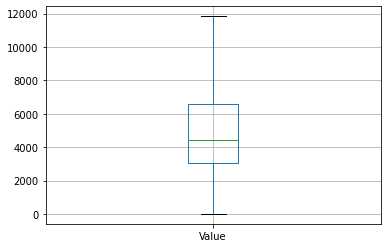

In [51]:
nf_abs_value_mm3.boxplot(column="Value", showfliers=False)

## **Filtrando dados para todos os pacientes internados no Hospital das Clínicas**

### **Selecionando medidas que tiveram valor inferior a 500/mm3**

Selecionando medidas que tiveram valor inferior a 500/mm3

In [52]:
nf_abs_value_lower_500_mm3 = nf_abs_value_mm3[nf_abs_value_mm3["Value"] < 500]

if VERBOSE:
  display(nf_abs_value_lower_500_mm3)

Id sex                  Type                Date  Value   Age
73       25719037   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00   10.0  22.0
74       25886291   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00   30.0  66.0
76       24932063   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00   10.0  58.0
77       12805068   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00    9.9  59.0
269      25920281   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:33:00   19.8  32.0
...           ...  ..                   ...                 ...    ...   ...
2941069  25267263   M  NEUTRÓFILOS ABSOLUTO 2019-07-23 05:14:00   30.0  67.0
2941115  25264639   F  NEUTRÓFILOS ABSOLUTO 2019-07-23 05:15:00   30.0  39.0
2941172  20335736   F  NEUTRÓFILOS ABSOLUTO 2019-07-23 06:27:00   10.0  73.0
2941173  25232017   F  NEUTRÓFILOS ABSOLUTO 2019-07-23 06:27:00  120.0  23.0
2941175  25262978   M  NEUTRÓFILOS ABSOLUTO 2019-07-23 06:27:00   40.0  51.0

[4645 rows x 6 columns]

#### Estatísticas descritivas

In [53]:
statistics(nf_abs_value_lower_500_mm3)

count    4645.000000
mean      134.332853
std       147.426252
min         0.000000
25%        10.000000
50%        60.000000
75%       230.000000
max       499.900000
Name: Value, dtype: float64

Média: 134.3328525296019, Desvio Padrão: 147.42625212715072, Mediana: 60.0, Moda: 10.0


As estatísticas descritivas referentes à medida de neutrófilos absolutos para pacientes com neutropenia grave está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 134.33
Desvio Padrão | 147.43   
Mediana     | 60
Moda        | 10

Esses dados podem ser vistos no diagrama de caixa abaixo.

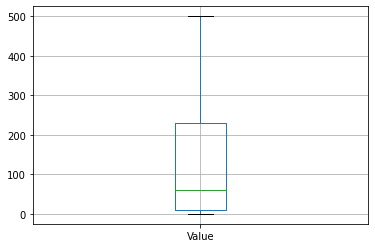

In [54]:
nf_abs_value_lower_500_mm3.boxplot(column="Value", showfliers=False)

### **Filtrando apenas as primeiras medidas (para todos os valores de neutrófilos) para cada paciente**

Filtrando apenas as primeiras medidas para cada paciente, independente do valor

In [55]:
# Organizando o dataframe por data
nf_abs_value_mm3_first_all = nf_abs_value_mm3.sort_values("Date")
# Deixando apenas uma medida por cada paciente
nf_mm3_first_all = nf_abs_value_mm3_first_all.drop_duplicates(subset=['Id'])

if VERBOSE:
  display(nf_mm3_first_all)

Id sex                  Type                Date    Value   Age
1848715  19849298   M  NEUTRÓFILOS ABSOLUTO 2018-10-24 08:50:00   5850.0  69.0
1848720  24867506   M  NEUTRÓFILOS ABSOLUTO 2018-10-24 08:53:00   1730.0  37.0
1848725  25070056   F  NEUTRÓFILOS ABSOLUTO 2018-10-24 08:54:00   3410.0  33.0
1848731  22052925   F  NEUTRÓFILOS ABSOLUTO 2018-10-24 08:55:00  11830.0  58.0
1848732  22805844   M  NEUTRÓFILOS ABSOLUTO 2018-10-24 08:55:00   3020.0  68.0
...           ...  ..                   ...                 ...      ...   ...
2774039  19866475   M  NEUTRÓFILOS ABSOLUTO 2021-12-10 10:47:00   3402.0  75.0
2774075  25966170   F  NEUTRÓFILOS ABSOLUTO 2021-12-10 10:48:00   4196.4  59.0
2774077  16304100   F  NEUTRÓFILOS ABSOLUTO 2021-12-10 10:48:00   4316.4  73.0
2774080  25981132   M  NEUTRÓFILOS ABSOLUTO 2021-12-10 10:48:00   2438.9   7.0
2774076  24975748   F  NEUTRÓFILOS ABSOLUTO 2021-12-10 10:48:00   6315.3  37.0

[71741 rows x 6 columns]

In [56]:
statistics(nf_abs_value_mm3_first_all)

count    251224.000000
mean       5462.516661
std        4945.656320
min           0.000000
25%        3048.200000
50%        4420.000000
75%        6563.925000
max      814800.000000
Name: Value, dtype: float64

Média: 5462.516660828815, Desvio Padrão: 4945.656319913641, Mediana: 4420.0, Moda: 10.0


As estatísticas descritivas referentes à primeira medida de neutrófilos absolutos está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 5462.52
Desvio Padrão | 4945.66 
Mediana     | 4420
Moda        | 10

Esses dados podem ser vistos no diagrama de caixa abaixo.

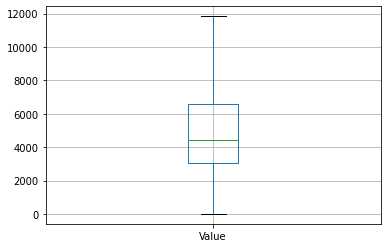

In [57]:
nf_abs_value_mm3_first_all.boxplot(column="Value", showfliers=False)

### **Selecionando apenas as primeiras medidas (inferiores a 500/mm3) para cada paciente**

Selecionando apenas as primeiras medidas inferiores a 500/mm3 para cada paciente

In [58]:
# Organizando o dataframe por data
nf_abs_value_mm3_first = nf_abs_value_lower_500_mm3.sort_values("Date")
# Deixando apenas uma medida por cada paciente
nf_mm3_first_500 = nf_abs_value_mm3_first.drop_duplicates(subset=['Id'])

if VERBOSE:
  display(nf_mm3_first_500)

Id sex                  Type                Date  Value   Age
1849463  25027938   F  NEUTRÓFILOS ABSOLUTO 2018-10-24 12:07:00   80.0  27.0
1850400  24918690   M  NEUTRÓFILOS ABSOLUTO 2018-10-24 17:08:00  210.0  76.0
1851514  25060976   F  NEUTRÓFILOS ABSOLUTO 2018-10-25 08:55:00  110.0  29.0
1851516  15817743   F  NEUTRÓFILOS ABSOLUTO 2018-10-25 08:55:00   10.0  34.0
1851562  23425873   F  NEUTRÓFILOS ABSOLUTO 2018-10-25 09:13:00   20.0  46.0
...           ...  ..                   ...                 ...    ...   ...
65141    25870890   M  NEUTRÓFILOS ABSOLUTO 2021-12-06 05:35:00  380.4  71.0
65454    25967889   M  NEUTRÓFILOS ABSOLUTO 2021-12-06 07:32:00  451.4  35.0
68015    20777315   F  NEUTRÓFILOS ABSOLUTO 2021-12-09 09:24:00  429.5  64.0
68416    24729699   M  NEUTRÓFILOS ABSOLUTO 2021-12-09 11:44:00  374.4  68.0
69223    22794705   F  NEUTRÓFILOS ABSOLUTO 2021-12-09 16:25:00  468.0  54.0

[678 rows x 6 columns]

In [59]:
statistics(nf_mm3_first_500)

count    678.000000
mean     259.590118
std      152.564374
min        0.000000
25%      130.725000
50%      270.000000
75%      397.400000
max      499.600000
Name: Value, dtype: float64

Média: 259.59011799410007, Desvio Padrão: 152.56437430451587, Mediana: 270.0, Moda: 0.0


As estatísticas descritivas referentes à primeira medida de neutrófilos absolutos inferiores a 500/mm<sup>3</sup> está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 259.59
Desvio Padrão | 152.56 
Mediana     | 270
Moda        | 0

Esses dados podem ser vistos no diagrama de caixa abaixo.

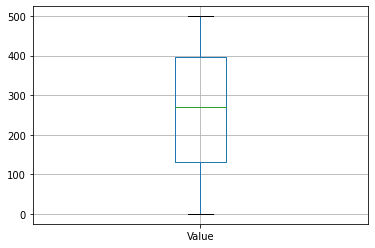

In [60]:
nf_mm3_first_500.boxplot(column="Value", showfliers=False)

## **Análise para pacientes com passagem pelo hemocentro**

### **Criando uma lista de pacientes que tiveram passagem pelo hemocentro**

Criando uma lista de medida de neutrófilos apenas para pacientes que tiveram passagem pelo hemocentro.

In [61]:
nf_abs_value_mm3_in_hemo = nf_abs_value_mm3[nf_abs_value_mm3['Id'].isin(hemocentro_list)]

if VERBOSE:
  display(nf_abs_value_mm3_in_hemo)

Id sex                  Type                Date   Value   Age
71       25595648   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00  1350.3  54.0
72       24909035   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00  7797.7  63.0
73       25719037   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00    10.0  22.0
74       25886291   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00    30.0  66.0
75       25149430   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00  3471.0  61.0
...           ...  ..                   ...                 ...     ...   ...
2941175  25262978   M  NEUTRÓFILOS ABSOLUTO 2019-07-23 06:27:00    40.0  51.0
2941233  25112221   F  NEUTRÓFILOS ABSOLUTO 2019-07-23 07:34:00  1630.0  46.0
2941277  25177640   F  NEUTRÓFILOS ABSOLUTO 2019-07-23 07:36:00  4700.0  70.0
2941351  25219364   M  NEUTRÓFILOS ABSOLUTO 2019-07-23 07:42:00  6240.0  67.0
2941523  17357038   F  NEUTRÓFILOS ABSOLUTO 2019-07-23 13:51:00   500.0  81.0

[19185 rows x 6 columns]

In [62]:
statistics(nf_abs_value_mm3_in_hemo)

count     19185.000000
mean       3644.499041
std        7350.837882
min           0.000000
25%         641.600000
50%        2083.200000
75%        4305.500000
max      254893.000000
Name: Value, dtype: float64

Média: 3644.499040917375, Desvio Padrão: 7350.837881962375, Mediana: 2083.2000000000003, Moda: 10.0


As estatísticas descritivas referentes à medida de neutrófilos absolutos para pacientes que passaram pelo hemocentro está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 3644.50
Desvio Padrão | 7350.84 
Mediana     | 2083.20
Moda        | 10

Esses dados podem ser vistos no diagrama de caixa abaixo.

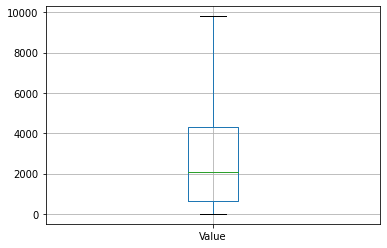

In [63]:
nf_abs_value_mm3_in_hemo.boxplot(column="Value", showfliers=False)

### **Selecionando medidas que tiveram valor inferior a 500/mm<sup>3</sup> e passagem pelo hemocentro**

Selecionando medidas que tiveram valor inferior a 500/mm<sup>3</sup> dos que tiveram passagem pelo hemocentro

In [64]:
nf_lower_500_hemo = nf_abs_value_mm3_in_hemo[nf_abs_value_mm3_in_hemo["Value"] < 500]

if VERBOSE:
  display(nf_lower_500_hemo)

Id sex                  Type                Date  Value   Age
73       25719037   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00   10.0  22.0
74       25886291   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00   30.0  66.0
76       24932063   F  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00   10.0  58.0
77       12805068   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:31:00    9.9  59.0
269      25920281   M  NEUTRÓFILOS ABSOLUTO 2021-10-24 05:33:00   19.8  32.0
...           ...  ..                   ...                 ...    ...   ...
2941069  25267263   M  NEUTRÓFILOS ABSOLUTO 2019-07-23 05:14:00   30.0  67.0
2941115  25264639   F  NEUTRÓFILOS ABSOLUTO 2019-07-23 05:15:00   30.0  39.0
2941172  20335736   F  NEUTRÓFILOS ABSOLUTO 2019-07-23 06:27:00   10.0  73.0
2941173  25232017   F  NEUTRÓFILOS ABSOLUTO 2019-07-23 06:27:00  120.0  23.0
2941175  25262978   M  NEUTRÓFILOS ABSOLUTO 2019-07-23 06:27:00   40.0  51.0

[4322 rows x 6 columns]

In [65]:
statistics(nf_lower_500_hemo)

count    4322.000000
mean      122.969297
std       141.389920
min         0.000000
25%        10.000000
50%        50.000000
75%       200.475000
max       499.900000
Name: Value, dtype: float64

Média: 122.96929662193419, Desvio Padrão: 141.38992046069956, Mediana: 50.0, Moda: 10.0


As estatísticas descritivas referentes à medida de neutrófilos absolutos abaixo de 500/mm<sup>3</sup> para pacientes que passaram pelo hemocentro está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 122.97
Desvio Padrão | 141.39 
Mediana     | 50
Moda        | 10

Esses dados podem ser vistos no diagrama de caixa abaixo.

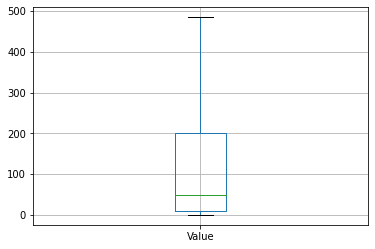

In [66]:
nf_lower_500_hemo.boxplot(column="Value", showfliers=False)

### **Separando apenas as primeiras medidas para cada paciente que teve passagem pelo hemocentro**

Separando apenas as primeiras medidas para cada paciente que teve passagem pelo hemocentro

In [67]:
# Organizando o dataframe por data
nf_lower_500_hemo_first = nf_lower_500_hemo.sort_values("Date")
# Deixando apenas uma medida por cada paciente
nf_lower_500_hemo_f = nf_lower_500_hemo_first.drop_duplicates(subset=['Id'])

print("Com base nesta análise, houve um total de " + str(len(nf_lower_500_hemo_f))
      + " pacientes que tiveram internação no Hospital das Clínicas e passagem"
      + " pelo hemocentro com neutropenia.\n")

display(nf_lower_500_hemo_f)

Com base nesta análise, houve um total de 430 pacientes que tiveram internação no Hospital das Clínicas e passagem pelo hemocentro com neutropenia.



Id sex                  Type                Date  Value   Age
1849463  25027938   F  NEUTRÓFILOS ABSOLUTO 2018-10-24 12:07:00   80.0  27.0
1851514  25060976   F  NEUTRÓFILOS ABSOLUTO 2018-10-25 08:55:00  110.0  29.0
1851516  15817743   F  NEUTRÓFILOS ABSOLUTO 2018-10-25 08:55:00   10.0  34.0
1851565  14039975   F  NEUTRÓFILOS ABSOLUTO 2018-10-25 09:13:00   40.0  60.0
1851562  23425873   F  NEUTRÓFILOS ABSOLUTO 2018-10-25 09:13:00   20.0  46.0
...           ...  ..                   ...                 ...    ...   ...
62413    25975197   F  NEUTRÓFILOS ABSOLUTO 2021-12-04 10:38:00  290.1  60.0
65141    25870890   M  NEUTRÓFILOS ABSOLUTO 2021-12-06 05:35:00  380.4  71.0
65454    25967889   M  NEUTRÓFILOS ABSOLUTO 2021-12-06 07:32:00  451.4  35.0
68015    20777315   F  NEUTRÓFILOS ABSOLUTO 2021-12-09 09:24:00  429.5  64.0
68416    24729699   M  NEUTRÓFILOS ABSOLUTO 2021-12-09 11:44:00  374.4  68.0

[430 rows x 6 columns]

In [68]:
statistics(nf_lower_500_hemo_f)

count    430.000000
mean     244.973023
std      156.566844
min        0.000000
25%      109.925000
50%      250.000000
75%      391.375000
max      499.300000
Name: Value, dtype: float64

Média: 244.97302325581393, Desvio Padrão: 156.5668440629634, Mediana: 250.0, Moda: 0.0


As estatísticas descritivas referentes à primeira medida de neutrófilos absolutos abaixo de 500/mm<sup>3</sup> para pacientes que passaram pelo hemocentro está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 244.97
Desvio Padrão | 156.57 
Mediana     | 250
Moda        | 0

Esses dados podem ser vistos no diagrama de caixa abaixo.

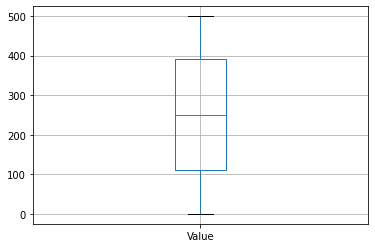

In [69]:
nf_lower_500_hemo_f.boxplot(column="Value", showfliers=False)

### **Resultado do processamento**

Como resultado do processamento, pode-se evidenciar que houveram um total de 430 pacientes internados pelo Hospital das Clínicas que tiveram passagem pelo hemocentro com problema de neutropenia grave. 

Todas as análises do processamento foram feitas de modo que fosse possível pegar dados posteriores para os gráficos, que, não necessariamente estão diretamente relacionados aos pacientes com passagem pelo HC.

# **Plots para o grupo de medidas**


## **Plots referentes as primeiras medidas para pacientes com neutropenia grave com passagem pelo hemocentro**


###[Histograma] - Idade por paciente em que ocorreu o primeiro caso de neutropenia grave

Histograma referente à idade dos pacientes quando ocorreu o primeiro caso de neutropenia grave (medida inferior a 500/mm<sup>3</sup>)

Text(0, 0.5, 'Contagem de pacientes')

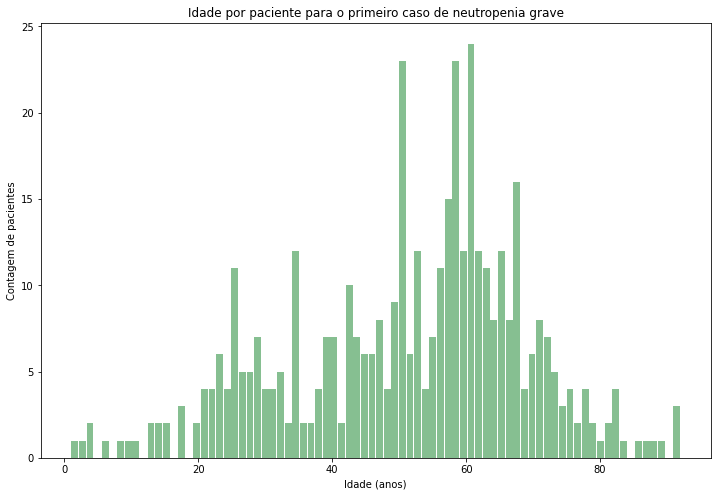

In [70]:
nf_lower_500_hemo_f.hist(column='Age', bins=80, grid=False, figsize=(12,8),
                       color='#86bf91', zorder=2, rwidth=0.9, sharex=True,
                       sharey=True)
pl.title("Idade por paciente para o primeiro caso de neutropenia grave")
pl.xlabel("Idade (anos)")
pl.ylabel("Contagem de pacientes")

In [71]:
statistics(nf_lower_500_hemo_f, "Age")

count    430.000000
mean      51.402326
std       17.620937
min        1.000000
25%       40.000000
50%       55.000000
75%       63.000000
max       92.000000
Name: Age, dtype: float64

Média: 51.402325581395345, Desvio Padrão: 17.620937275766604, Mediana: 55.0, Moda: 61.0


As estatísticas descritivas referentes à idade que os pacientes que passaram pelo hemocentro tinham quando apresentaram neutropenia grave pela primeira vez está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 51.40
Desvio Padrão | 17.62 
Mediana     | 55
Moda        | 61

Esses dados podem ser vistos no diagrama de caixa abaixo.

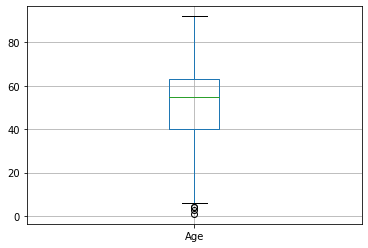

In [72]:
nf_lower_500_hemo_f.boxplot(column="Age")

Como pode-se verificar, a maior incidência dos casos ocorre para pessoas da faixa etária de 60 anos.

Separando os casos entre homens e mulheres:

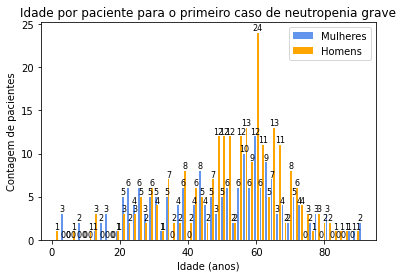

In [73]:
nf_lower_500_hemo_f_womam = nf_lower_500_hemo_f[nf_lower_500_hemo_f["sex"] == "F"]
nf_lower_500_hemo_f_man = nf_lower_500_hemo_f[nf_lower_500_hemo_f["sex"] == "M"]


p_bins = 55

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(nf_lower_500_hemo_f_womam["Age"], bins=p_bins)
b_heights, b_bins = np.histogram(nf_lower_500_hemo_f_man["Age"], bins=p_bins)

width = (a_bins[1] - a_bins[0])/3

pl.title("Idade por paciente para o primeiro caso de neutropenia grave")
pl.xlabel("Idade (anos)")
pl.ylabel("Contagem de pacientes")

p1 = ax.bar(a_bins[:-1], a_heights, width=width, facecolor="cornflowerblue",
            label="Mulheres")
p2 = ax.bar(b_bins[:-1] + width, b_heights, width=width, facecolor="orange",
            label="Homens")
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()

# Valor da contagem

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate("{}".format(height),(rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                 ha="center", va="bottom", fontsize=8)

for rect1 in p2:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=8)

In [74]:
statistics(nf_lower_500_hemo_f_womam, "Age")

count    185.000000
mean      48.918919
std       19.213868
min        3.000000
25%       33.000000
50%       52.000000
75%       62.000000
max       92.000000
Name: Age, dtype: float64

Média: 48.91891891891892, Desvio Padrão: 19.2138683756121, Mediana: 52.0, Moda: 61.0


As estatísticas descritivas referentes à idade das mulheres quando apresentaram neutropenia grave está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 48.92
Desvio Padrão | 19.21 
Mediana     | 52
Moda        | 61

In [75]:
statistics(nf_lower_500_hemo_f_man, "Age")

count    245.000000
mean      53.277551
std       16.103294
min        1.000000
25%       44.000000
50%       56.000000
75%       64.000000
max       91.000000
Name: Age, dtype: float64

Média: 53.27755102040816, Desvio Padrão: 16.103294456060063, Mediana: 56.0, Moda: 61.0


As estatísticas descritivas referentes à idade dos homens quando apresentaram neutropenia grave está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 56.0
Desvio Padrão | 16.10 
Mediana     | 56
Moda        | 61

Função para cálculo de vários boxplots juntos.

In [76]:
def boxplots(data: list, xlabel="", ylabel="", title="", outliers=True, xticks=[]):
  plt.boxplot(data, showfliers=outliers)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xticks([i for i in range(1, len(xticks)+1)], xticks)
  plt.show()

Observe essas estatísticas no gráfico abaixo.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


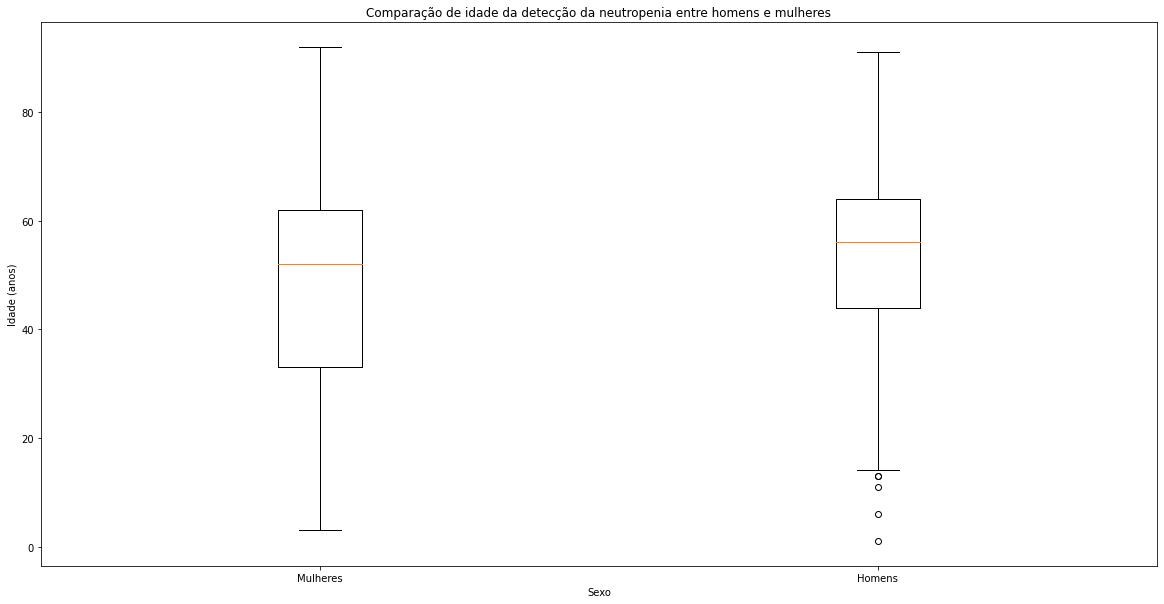

In [77]:
title = "Comparação de idade da detecção da neutropenia entre homens e mulheres"
boxplots([nf_lower_500_hemo_f_womam["Age"], nf_lower_500_hemo_f_man["Age"]], xlabel="Sexo",  ylabel="Idade (anos)", 
         title=title, xticks=["Mulheres", "Homens"])

Conforme pode-se verificar, a incidência da neutropenia em homens ocorre, em valores absolutos, mais do que em mulheres, especialmente na faixa entre 50 a 70 anos, para idades até aproximadamente 30 anos a incidência em mulheres é maior.

###[Histograma] - Valor medido para primeiro caso de neutropenia grave

Histograma referente valor medido para primeiro caso de neutropenia grave (medida inferior a 500/mm3)

**Medida por neutropenia - limite 500**

Text(0, 0.5, 'Contagem de pacientes')

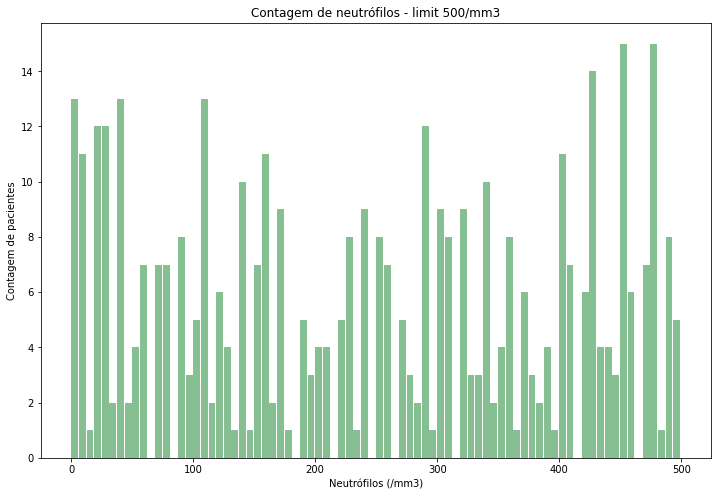

In [78]:
nf_lower_500_hemo_f.hist(column='Value', bins=80, grid=False, figsize=(12,8),
                  color='#86bf91', zorder=2, rwidth=0.9, sharex=True,
                  sharey=True)
pl.title("Contagem de neutrófilos - limit 500/mm3")
pl.xlabel("Neutrófilos (/mm3)")
pl.ylabel("Contagem de pacientes")

Como pode-se verificar, na maioria dos casos os valores medidos estão próximos ou iguais à zero, e depois se distribuem, com segunda maior incidência próximo de 500 /mm3.

Quando comparamos homens com mulheres:

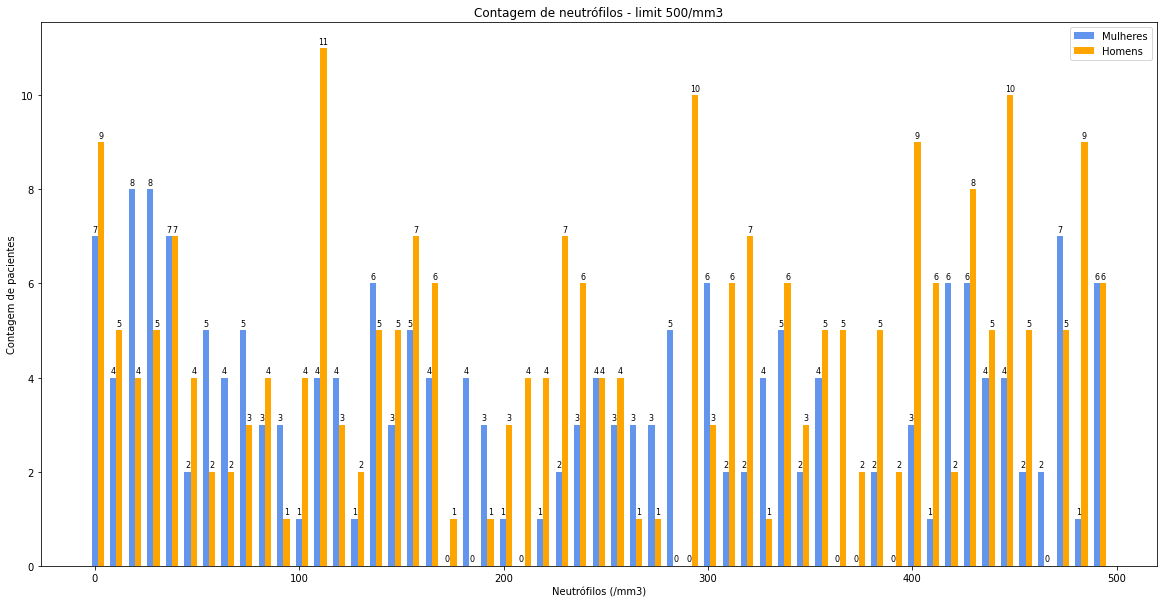

In [79]:
p_bins = 55

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(nf_lower_500_hemo_f_womam["Value"], bins=p_bins)
b_heights, b_bins = np.histogram(nf_lower_500_hemo_f_man["Value"], bins=p_bins)

width = (a_bins[1] - a_bins[0])/3

pl.title("Contagem de neutrófilos - limit 500/mm3")
pl.xlabel("Neutrófilos (/mm3)")
pl.ylabel("Contagem de pacientes")

p1 = ax.bar(a_bins[:-1], a_heights, width=width, facecolor="cornflowerblue",
            label="Mulheres")
p2 = ax.bar(a_bins[:-1] + width, b_heights, width=width, facecolor="orange",
            label="Homens")
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()

# Valor da contagem

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=8)

for rect1 in p2:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=8)

In [80]:
statistics(nf_lower_500_hemo_f_womam, "Value")

count    185.000000
mean     227.630270
std      159.726142
min        0.000000
25%       79.900000
50%      220.000000
75%      359.500000
max      499.300000
Name: Value, dtype: float64

Média: 227.63027027027027, Desvio Padrão: 159.72614182743763, Mediana: 220.0, Moda: 30.0


As estatísticas descritivas referentes à medida de neutrófilos das mulheres quando apresentaram neutropenia grave está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 227.03
Desvio Padrão | 159.73 
Mediana     | 220
Moda        | 30

In [81]:
statistics(nf_lower_500_hemo_f_man, "Value")

count    245.000000
mean     258.068571
std      153.166111
min        0.000000
25%      120.000000
50%      260.000000
75%      400.000000
max      497.000000
Name: Value, dtype: float64

Média: 258.06857142857166, Desvio Padrão: 153.16611078108397, Mediana: 260.0, Moda: 0.0


As estatísticas descritivas referentes à medida de neutrófilos dos homens quando apresentaram neutropenia grave está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 258.07
Desvio Padrão | 153.17 
Mediana     | 260
Moda        | 0

Observe essas estatísticas no gráfico abaixo.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


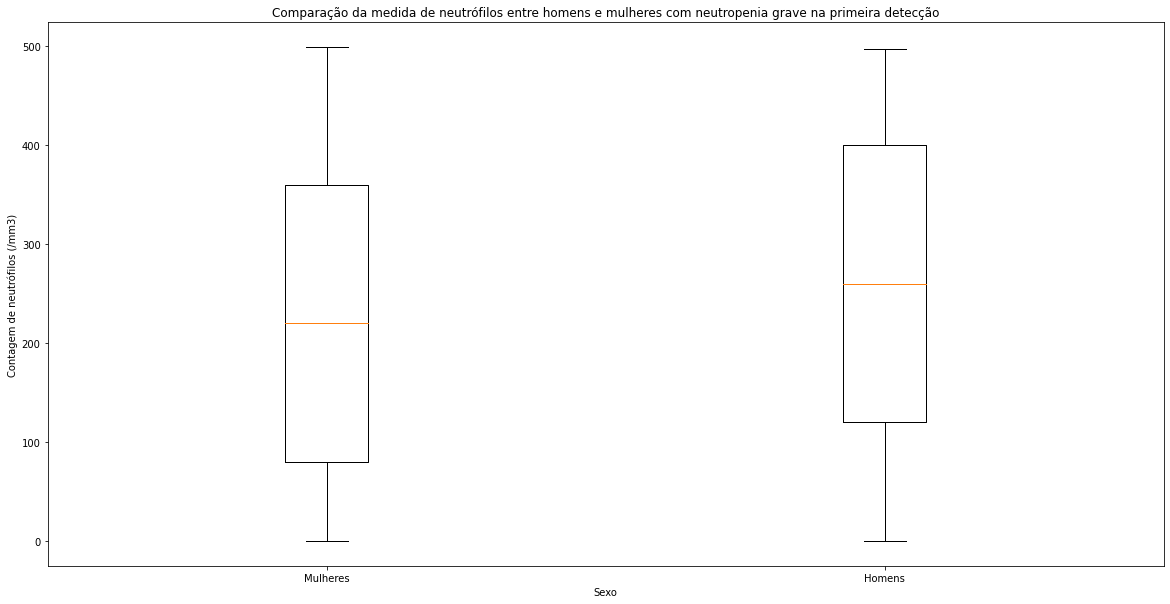

In [82]:
title = "Comparação da medida de neutrófilos entre homens e mulheres com neutropenia grave na primeira detecção"
boxplots([nf_lower_500_hemo_f_womam["Value"], nf_lower_500_hemo_f_man["Value"]], xlabel="Sexo",  ylabel="Contagem de neutrófilos (/mm3)", 
         title=title, xticks=["Mulheres", "Homens"])

Quando comparando entre homens e mulheres, não há uma conclusão bem definida que possa ser relacionada ao sexo. A distribuição de ocorrências para ambos os sexos é inconclusiva.

###[Histograma] - Datas de ocorrências dos primeiros casos de neutropenia grave

Histograma referente as datas de ocorrências dos primeiros casos de neutropenia grave (medida inferior a 500/mm3)

Text(0, 0.5, 'Contagem de pacientes')

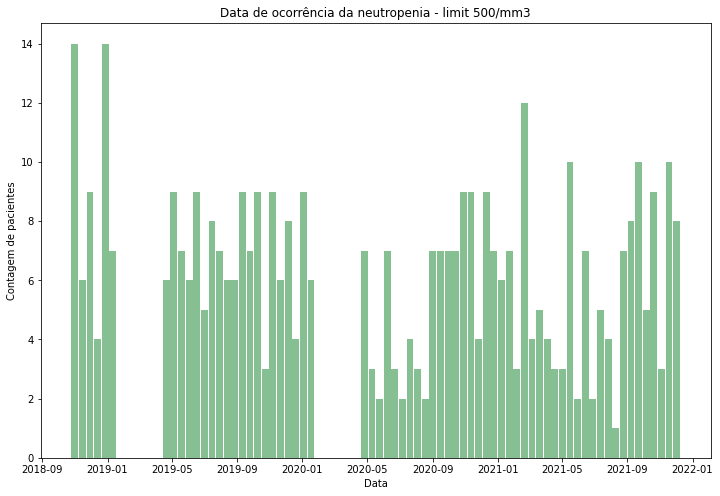

In [83]:
nf_lower_500_hemo_f.hist(column='Date', bins=80, grid=False, figsize=(12,8),
                  color='#86bf91', zorder=2, rwidth=0.9, sharex=True,
                  sharey=True)
pl.title("Data de ocorrência da neutropenia - limit 500/mm3")
pl.xlabel("Data")
pl.ylabel("Contagem de pacientes")

Como pode-se verificar, a maior incidência de casos ocorre por volta do final ou começo de ano, evidentes nos anos de 2019 e 2021. No intervalo de maio de 2019 até janeiro de 2020 os casos mantiveram certa constância, e no período do segundo semestre de 2020, em que a covid-19 era presente na região, houve uma redução significativa de casos.

Durante o periodo de fevereiro e março de 2019 e de 2020 não houveram medidas.


Função para estatísticas descritivas com data.

In [84]:
def date_statistics(dataframe, column):
  description = dataframe[column].describe(datetime_is_numeric=True)
  mean = description["mean"]
  median = description["50%"]
  mode = dataframe[column].mode()
  print(description)
  print()
  print(f"Média: {mean}, Mediana: {median}, Moda: {mode[0]}")

In [85]:
date_statistics(nf_lower_500_hemo_f, "Date")

count                              430
mean     2020-05-25 18:05:51.348837376
min                2018-10-24 12:07:00
25%                2019-07-30 00:59:00
50%                2020-07-02 13:38:30
75%                2021-03-02 01:46:15
max                2021-12-09 11:44:00
Name: Date, dtype: object

Média: 2020-05-25 18:05:51.348837376, Mediana: 2020-07-02 13:38:30, Moda: 2018-10-25 09:13:00


As estatísticas descritivas referentes à primeira detecção dos casos de neutropenia grave neutropenia grave está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 2020-05
Mediana     | 2020-07
Moda        | 2018-10
min         | 2018-10
max         | 2021-12

As estatísticas acima estão demostradas no gráfico abaixo.  
Compare as timestamps com os valores de mínimo, máximo e média na tabela acima.

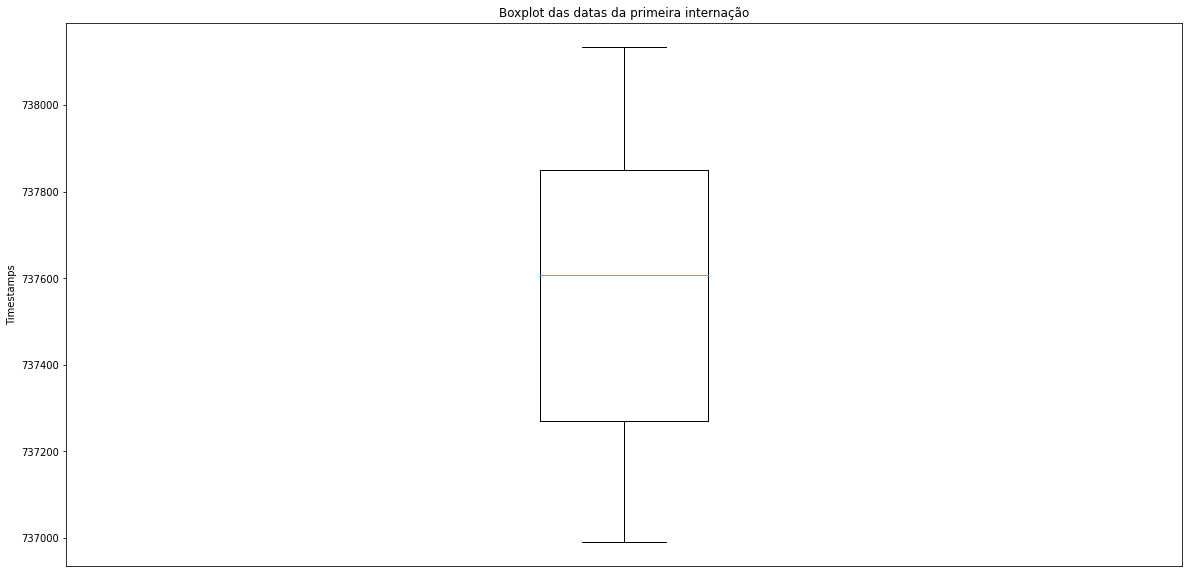

In [86]:
date_data = list(map((lambda a: a.toordinal()), nf_lower_500_hemo_f["Date"]))
boxplots([date_data], ylabel="Timestamps", title="Boxplot das datas da primeira internação")

Quando comparando entre homens e mulheres:

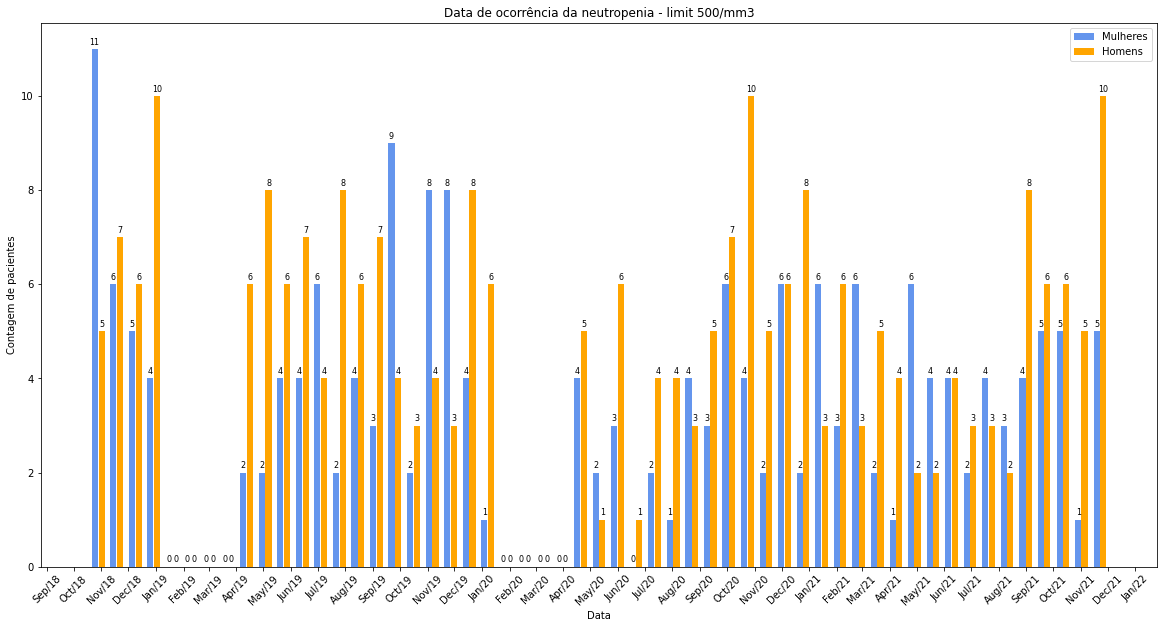

In [87]:
p_bins = 55

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(mdates.date2num(nf_lower_500_hemo_f_womam["Date"]),
                                 bins=p_bins)
b_heights, b_bins = np.histogram(mdates.date2num(nf_lower_500_hemo_f_man["Date"]),
                                 bins=p_bins)

width = (a_bins[1] - a_bins[0])/3

pl.title("Data de ocorrência da neutropenia - limit 500/mm3")
pl.xlabel("Data")
pl.ylabel("Contagem de pacientes")

p1 = ax.bar(a_bins[:-1], a_heights, width=width, facecolor="cornflowerblue",
            label="Mulheres")
p2 = ax.bar(b_bins[:-1] + width, b_heights, width=width, facecolor="orange",
            label="Homens")
plt.rcParams['figure.figsize'] = [20, 10]

ax.set_xticklabels(ax.get_xticks(), rotation = 45)

xfmt = mdates.DateFormatter('%b/%y')
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(xfmt)

plt.legend()

# Valor da contagem

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=8)

for rect1 in p2:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=8)

In [88]:
date_statistics(nf_lower_500_hemo_f_womam, "Date")

count                              185
mean     2020-05-20 07:29:22.702702848
min                2018-10-24 12:07:00
25%                2019-08-17 18:03:00
50%                2020-06-11 01:14:00
75%                2021-03-04 11:50:00
max                2021-12-09 09:24:00
Name: Date, dtype: object

Média: 2020-05-20 07:29:22.702702848, Mediana: 2020-06-11 01:14:00, Moda: 2018-10-25 08:55:00


As estatísticas descritivas referentes à primeira detecção dos casos de neutropenia grave neutropenia grave em mulheres está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 2020-05
Mediana     | 2020-06
Moda        | 2018-10
min         | 2018-10
max         | 2021-12

In [89]:
date_statistics(nf_lower_500_hemo_f_man, "Date")

count                              245
mean     2020-05-29 20:43:11.755101952
min                2018-10-25 09:13:00
25%                2019-07-29 06:01:00
50%                2020-07-10 14:56:00
75%                2021-02-23 05:35:00
max                2021-12-09 11:44:00
Name: Date, dtype: object

Média: 2020-05-29 20:43:11.755101952, Mediana: 2020-07-10 14:56:00, Moda: 2019-04-24 05:56:00


As estatísticas descritivas referentes à primeira detecção dos casos de neutropenia grave neutropenia grave em homens está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 2020-05
Mediana     | 2020-07
Moda        | 2019-04
min         | 2018-10
max         | 2021-12

Observe a comparação dessas estatísticas no gráfico abaixo.  
Compare as timestamps com os valores de mínimo, máximo e média na tabela acima.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


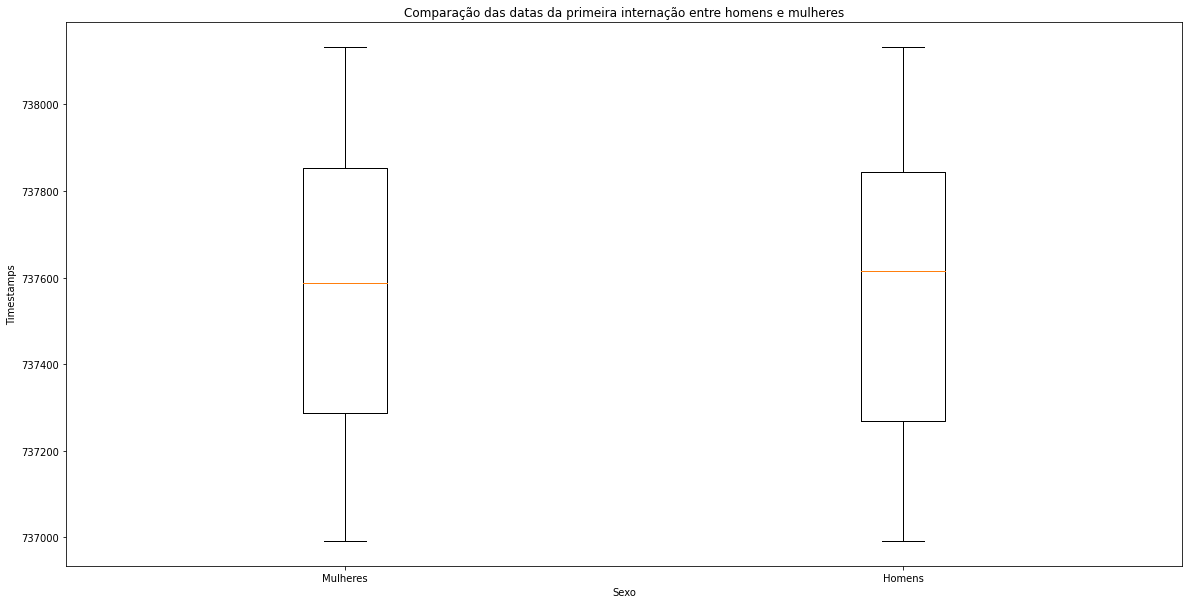

In [90]:
date_data_w = list(map((lambda a: a.toordinal()), nf_lower_500_hemo_f_womam["Date"]))
date_data_m = list(map((lambda a: a.toordinal()), nf_lower_500_hemo_f_man["Date"]))
boxplots([date_data_w, date_data_m], xlabel="Sexo", ylabel="Timestamps", 
         title="Comparação das datas da primeira internação entre homens e mulheres", xticks=["Mulheres", "Homens"])

Quando comparando entre homens e mulheres, não há uma conclusão bem definida que possa ser relacionada ao sexo. O que se pode afirmar é que em termos de valor absoluto a incidência de neutropenia no sexo masculino é maior. Ocorrem meses em que o número de casos femininos é maior, mas como há poucas amostras, não se pode dizer ao certo que está relacionado a um fator especifico e previsível.

Comparando a quantidade de casos entre homens e mulheres:

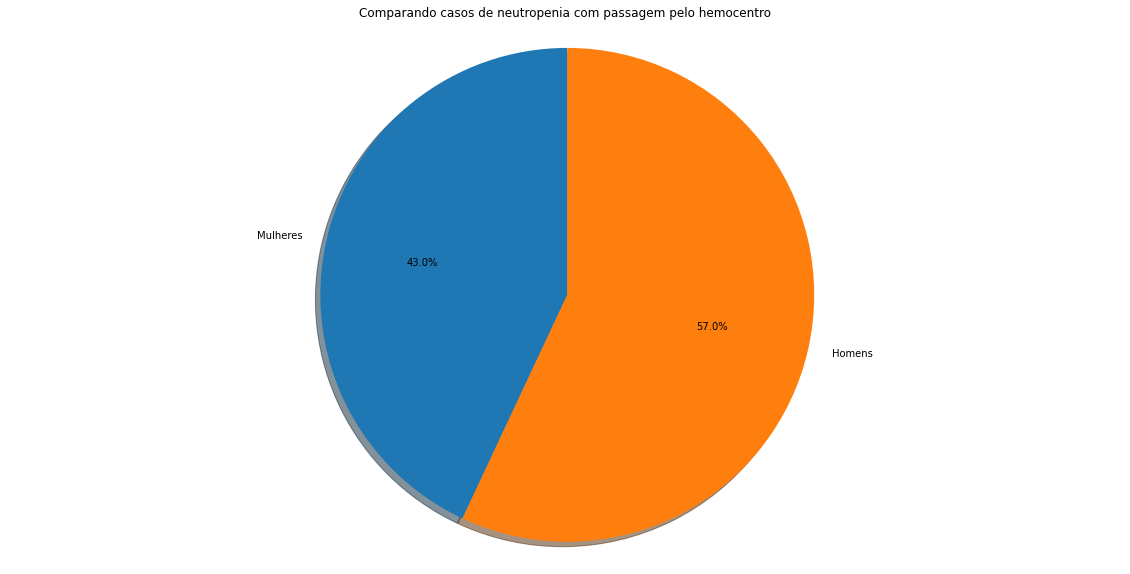

In [91]:
fig1, ax1 = plt.subplots()
ax1.pie([nf_lower_500_hemo_f_womam["Date"].count(),
             nf_lower_500_hemo_f_man["Date"].count()],
        labels=['Mulheres', 'Homens'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
pl.title("Comparando casos de neutropenia com passagem pelo hemocentro")

plt.show()

Portanto, pode-se dizer que a tedência de ter neutropenia, sendo homem, é maior do que sendo mulher.

## **Plots referentes as primeiras medidas para todos os pacientes com neutropenia grave (com e sem passagem pelo hemocentro)**

Análise de todos os pacientes com neutropenia grave com relação a aqueles que tiveram passagem pelo hemocentro

###[Histograma] - Idade por paciente em que ocorreu o primeiro caso de neutropenia grave

Histograma referente a idade dos pacientes quando ocorreu o primeiro caso de neutropenia grave (medida inferior a 500/mm3) comparando os que tiveram passagem pelo hemocentro com todos os casos.

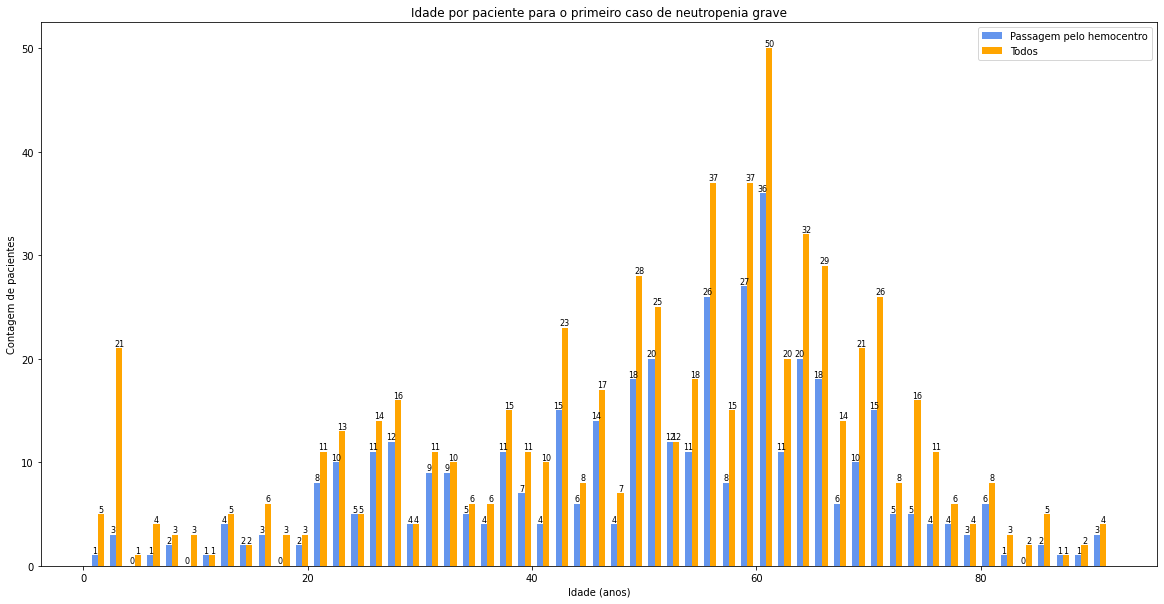

In [92]:
p_bins = 55

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(nf_lower_500_hemo_f["Age"], bins=p_bins)
b_heights, b_bins = np.histogram(nf_mm3_first_500["Age"], bins=p_bins)

width = (a_bins[1] - a_bins[0])/3

pl.title("Idade por paciente para o primeiro caso de neutropenia grave")
pl.xlabel("Idade (anos)")
pl.ylabel("Contagem de pacientes")

p1 = ax.bar(a_bins[:-1], a_heights, width=width, facecolor="cornflowerblue",
            label="Passagem pelo hemocentro")
p2 = ax.bar(b_bins[:-1] + width, b_heights, width=width, facecolor="orange",
            label="Todos")
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()

# Valor da contagem

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate("{}".format(height),(rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                 ha="center", va="bottom", fontsize=8)

for rect1 in p2:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=8)

In [93]:
statistics(nf_lower_500_hemo_f, "Age")

count    430.000000
mean      51.402326
std       17.620937
min        1.000000
25%       40.000000
50%       55.000000
75%       63.000000
max       92.000000
Name: Age, dtype: float64

Média: 51.402325581395345, Desvio Padrão: 17.620937275766604, Mediana: 55.0, Moda: 61.0


As estatísticas descritivas referentes à idade da primeira medida de neutropenia grave para pacientes que passaram pelo hemocentro está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 51.40
Desvio Padrão | 17.62
Mediana     | 55
Moda        | 61

In [94]:
statistics(nf_mm3_first_500, "Age")

count    678.000000
mean      51.209440
std       19.899536
min        1.000000
25%       40.000000
50%       56.000000
75%       65.000000
max       92.000000
Name: Age, dtype: float64

Média: 51.2094395280236, Desvio Padrão: 19.899535693277038, Mediana: 56.0, Moda: 61.0


As estatísticas descritivas referentes à idade da primeira medida de neutropenia grave para todos os pacientes está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 51.21
Desvio Padrão | 19.90 
Mediana     | 56
Moda        | 61

Observe a comparação dessas estatísticas no gráfico abaixo.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


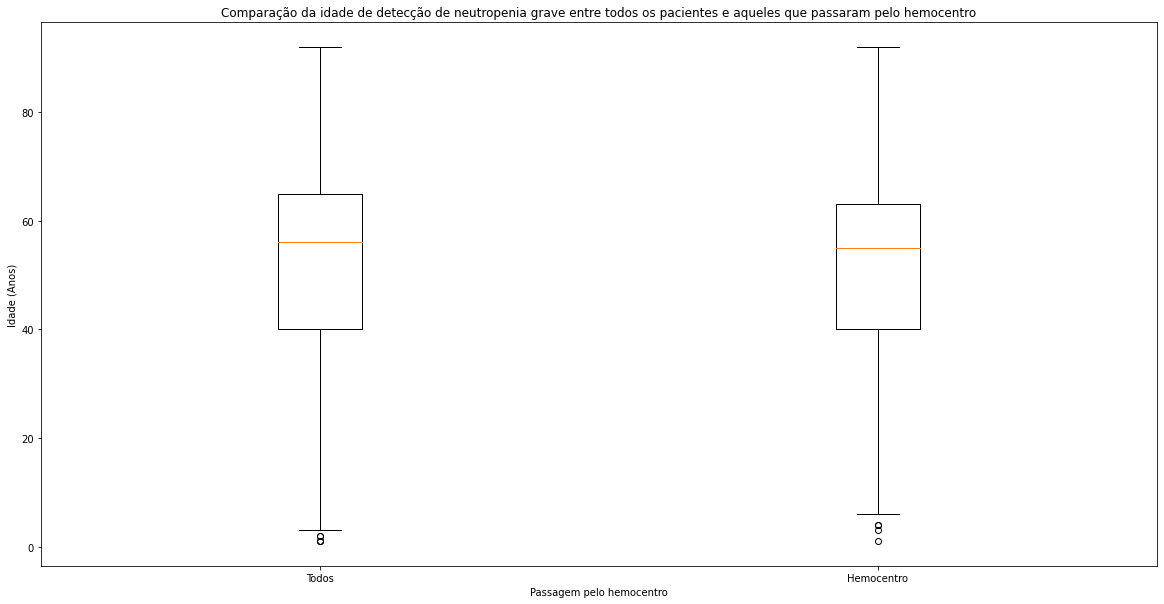

In [95]:
title = "Comparação da idade de detecção de neutropenia grave entre todos os pacientes e aqueles que passaram pelo hemocentro"
boxplots([nf_mm3_first_500["Age"], nf_lower_500_hemo_f["Age"]], xlabel="Passagem pelo hemocentro",  ylabel="Idade (Anos)", 
         title=title, xticks=["Todos", "Hemocentro"])

Como pode-se verificar no gráfico, para crianças a passagem iniciando pelo hemocentro foi relativamente menor do que para as demais faixas etárias em relação ao número total de primeiros casos. Isso também se torna evidente em idades próximas dos 60 anos. Para as demais faixas etárias, a passagem pelo hemocentro teve comportamento igualável ao de todos os casos.

###[Histograma] - Valor medido para primeiro caso de neutropenia grave

Histograma referente ao valor medido pacientes quando ocorreu o primeiro caso de neutropenia grave (medida inferior a 500/mm3) comparando os que tiveram passagem pelo hemocentro com todos os casos.

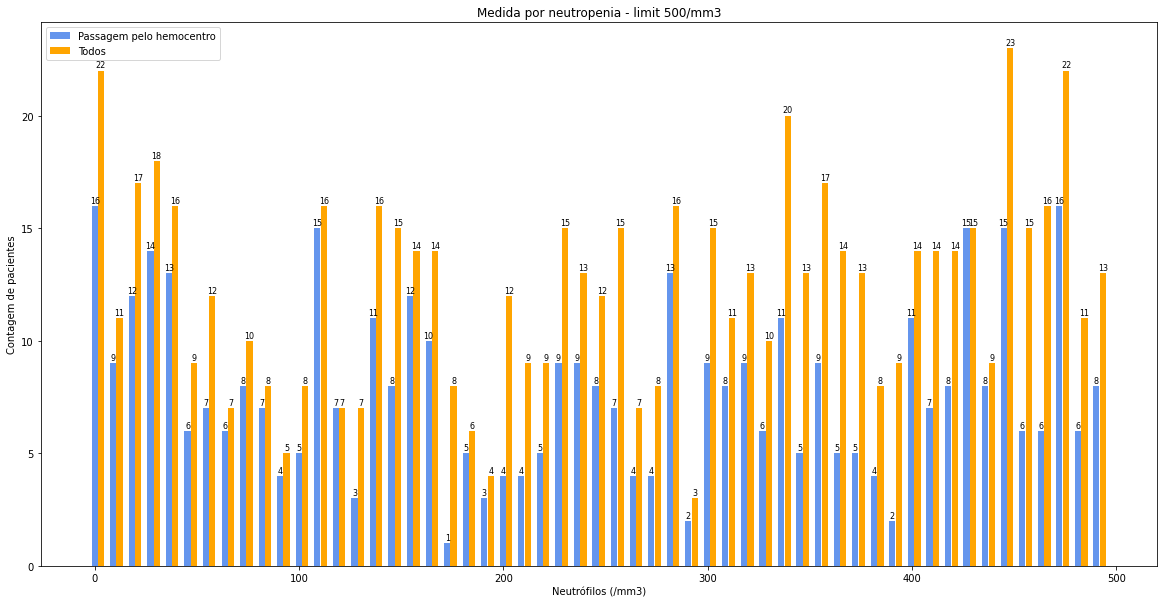

In [96]:
p_bins = 55

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(nf_lower_500_hemo_f["Value"], bins=p_bins)
b_heights, b_bins = np.histogram(nf_mm3_first_500["Value"], bins=p_bins)

width = (a_bins[1] - a_bins[0])/3

pl.title("Medida por neutropenia - limit 500/mm3")
pl.xlabel("Neutrófilos (/mm3)")
pl.ylabel("Contagem de pacientes")

p1 = ax.bar(a_bins[:-1], a_heights, width=width, facecolor="cornflowerblue",
            label="Passagem pelo hemocentro")
p2 = ax.bar(b_bins[:-1] + width, b_heights, width=width, facecolor="orange",
            label="Todos")
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()

# Valor da contagem

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=8)

for rect1 in p2:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=8)

In [97]:
statistics(nf_lower_500_hemo_f, "Value")

count    430.000000
mean     244.973023
std      156.566844
min        0.000000
25%      109.925000
50%      250.000000
75%      391.375000
max      499.300000
Name: Value, dtype: float64

Média: 244.97302325581393, Desvio Padrão: 156.5668440629634, Mediana: 250.0, Moda: 0.0


As estatísticas descritivas referentes ao valor da primeira medida de neutropenia grave para pacientes que passaram pelo hemocentro está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 244.97
Desvio Padrão | 156.57
Mediana     | 250
Moda        | 0

In [98]:
statistics(nf_mm3_first_500, "Value")

count    678.000000
mean     259.590118
std      152.564374
min        0.000000
25%      130.725000
50%      270.000000
75%      397.400000
max      499.600000
Name: Value, dtype: float64

Média: 259.59011799410007, Desvio Padrão: 152.56437430451587, Mediana: 270.0, Moda: 0.0


As estatísticas descritivas referentes ao valor da primeira medida de neutropenia grave para todos os pacientes está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 259.59
Desvio Padrão | 152.56 
Mediana     | 270
Moda        | 0

Observe a comparação dessas estatísticas no gráfico abaixo.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


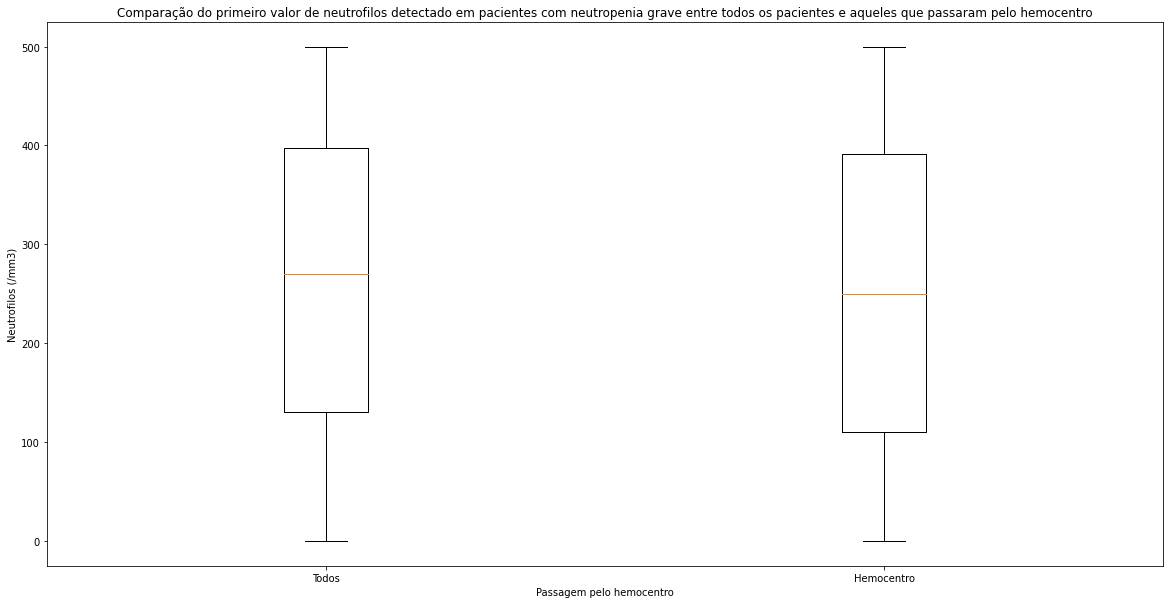

In [99]:
title = "Comparação do primeiro valor de neutrofilos detectado em pacientes com neutropenia grave entre todos os pacientes e aqueles que passaram pelo hemocentro"
boxplots([nf_mm3_first_500["Value"], nf_lower_500_hemo_f["Value"]], xlabel="Passagem pelo hemocentro",  ylabel="Neutrofilos (/mm3)", 
         title=title, xticks=["Todos", "Hemocentro"])

Como pode-se verificar, em termos de valores medidos, o comportamento para aqueles que tiveram passagem pelo hemocentro e todos os casos segue uma distribuição próxima, exceto para o valores entre 300/mm3 e 400/mm3, em que o valor de todos de todos é relativamente superior. No gráfico box plot demostrado acima, é perceptível a proximidade da distribuição entre os dois.

###[Histograma] - Datas de ocorrências dos primeiros casos de neutropenia grave

Histograma referente as datas de ocorrências dos primeiros casos de neutropenia grave (medida inferior a 500/mm3) comparando os que tiveram passagem pelo hemocentro com todos os casos.

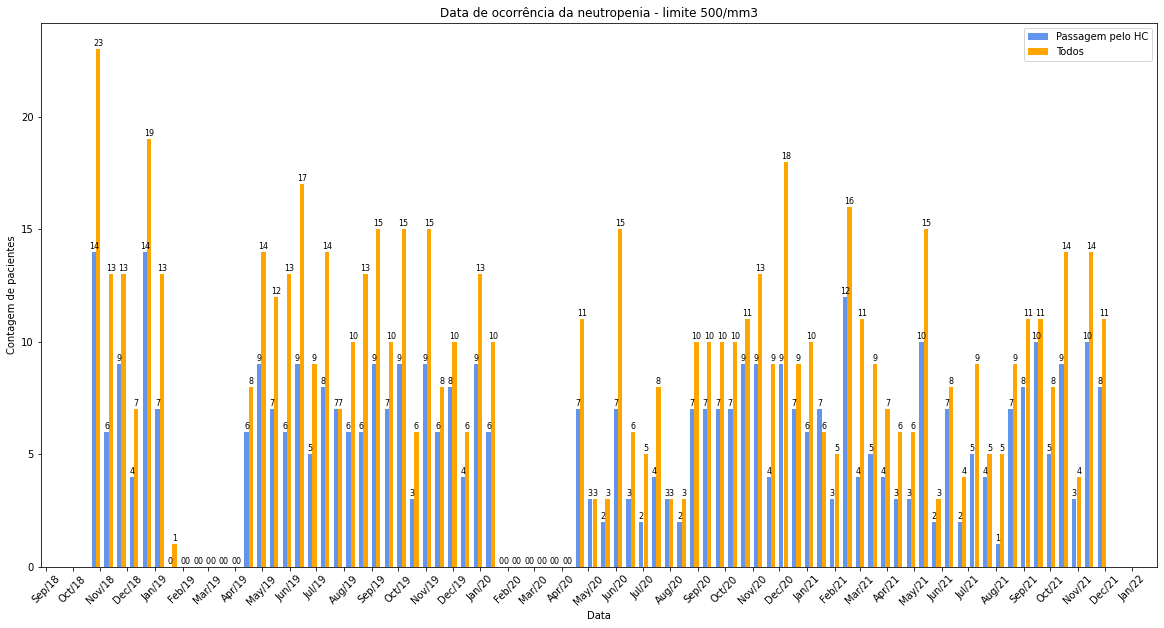

In [100]:
p_bins = 80

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(mdates.date2num(nf_lower_500_hemo_f["Date"]),
                                 bins=p_bins)
b_heights, b_bins = np.histogram(mdates.date2num(nf_mm3_first_500["Date"]),
                                 bins=p_bins)

width = (a_bins[1] - a_bins[0])/3

pl.title("Data de ocorrência da neutropenia - limite 500/mm3")
pl.xlabel("Data")
pl.ylabel("Contagem de pacientes")

p1 = ax.bar(a_bins[:-1], a_heights, width=width, facecolor="cornflowerblue",
            label="Passagem pelo HC")
p2 = ax.bar(b_bins[:-1] + width, b_heights, width=width, facecolor="orange",
            label="Todos")
plt.rcParams['figure.figsize'] = [20, 10]

ax.set_xticklabels(ax.get_xticks(), rotation = 45)

xfmt = mdates.DateFormatter('%b/%y')
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(xfmt)

plt.legend()

# Valor da contagem

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=8)

for rect1 in p2:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=8)

In [101]:
date_statistics(nf_lower_500_hemo_f, "Date")

count                              430
mean     2020-05-25 18:05:51.348837376
min                2018-10-24 12:07:00
25%                2019-07-30 00:59:00
50%                2020-07-02 13:38:30
75%                2021-03-02 01:46:15
max                2021-12-09 11:44:00
Name: Date, dtype: object

Média: 2020-05-25 18:05:51.348837376, Mediana: 2020-07-02 13:38:30, Moda: 2018-10-25 09:13:00


As estatísticas descritivas referentes à primeira detecção dos casos de neutropenia grave neutropenia grave em pacientes com passagem pelo hemocentro está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 2020-05
Mediana     | 2020-07
Moda        | 2018-10
min         | 2018-10
max         | 2021-12

In [102]:
date_statistics(nf_mm3_first_500, "Date")

count                              678
mean     2020-05-11 10:15:55.663716864
min                2018-10-24 12:07:00
25%                2019-07-14 20:00:00
50%                2020-06-09 14:48:00
75%                2021-02-27 00:18:45
max                2021-12-09 16:25:00
Name: Date, dtype: object

Média: 2020-05-11 10:15:55.663716864, Mediana: 2020-06-09 14:48:00, Moda: 2018-10-25 09:13:00


As estatísticas descritivas referentes à primeira detecção dos casos de neutropenia grave neutropenia grave em todos os pacientes está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 2020-05
Mediana     | 2020-06
Moda        | 2018-10
min         | 2018-10
max         | 2021-12

Observe a comparação dessas estatísticas no gráfico abaixo.  
Compare as timestamps com os valores de mínimo, máximo e média na tabela acima.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


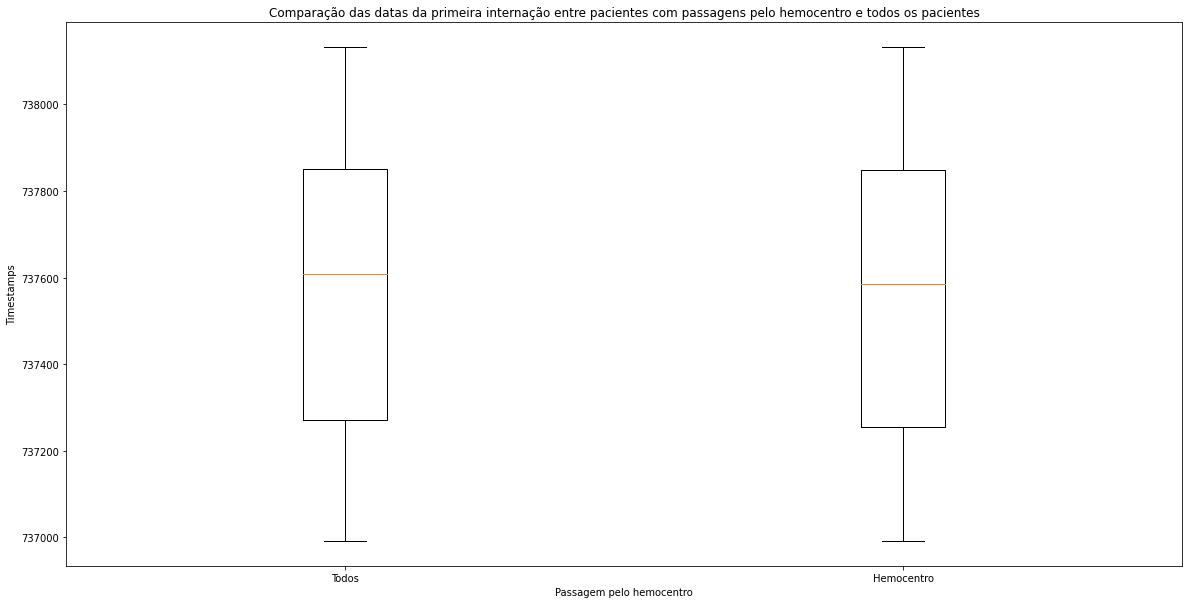

In [103]:
title="Comparação das datas da primeira internação entre pacientes com passagens pelo hemocentro e todos os pacientes"
date_data_nh = list(map((lambda a: a.toordinal()), nf_mm3_first_500["Date"]))
date_data_h = list(map((lambda a: a.toordinal()), nf_lower_500_hemo_f["Date"]))
boxplots([date_data_h, date_data_nh], xlabel="Passagem pelo hemocentro", ylabel="Timestamps", 
         title=title, xticks=["Todos", "Hemocentro"])

Como pode-se verificar no gráfico, a distribuição das medidas apresentou uma variação próxima para ambos os casos, com evidente visualização de que apenas uma parcela teve passagem pelo hemocentro. Houve um periodo em particular, no final de janeiro de 2019, em que só houveram casos de pessoas que não tiveram passagem pelo hemocentro.

## **Plots referentes as primeiras medidas para todos os pacientes em 3 cenários**

Análise de todos os pacientes com contagem de neutrófilos, considerando os com neutropenia grave com passagem com passagem pelo hemocentro, todos com neutropenia grave, e todas as medidas de neutrófilos.

###[Histograma] - Idade dos pacientes para os 3 cenários

Histograma referente a idade dos pacientes para a primeira medida considerando 3 casos:
  * neutropenia grave (medida inferior a 500/mm3) com passagem pelo hemocentro
  * Todos os casos com neutropenia grave
  * Todas as medidas de neutrófilos

  Com o objetivo de limitar o eixo X no mesmo valor para todos, a idade máxima considerada foi de 92 anos.

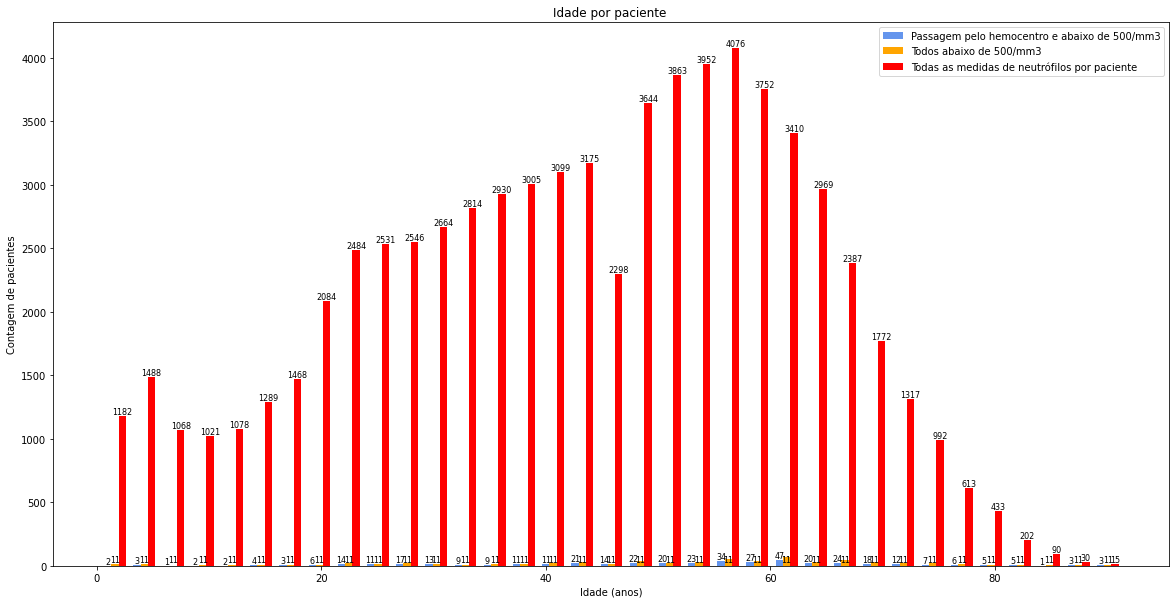

In [104]:
p_bins = 35

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(nf_lower_500_hemo_f["Age"], bins=p_bins)
b_heights, b_bins = np.histogram(nf_mm3_first_500["Age"], bins=p_bins)
c_heights, c_bins = np.histogram(nf_mm3_first_all["Age"], bins=p_bins)

width = (a_bins[1] - a_bins[0])/4

pl.title("Idade por paciente ")
pl.xlabel("Idade (anos)")
pl.ylabel("Contagem de pacientes")

p1 = ax.bar(a_bins[:-1], a_heights, width=width, facecolor="cornflowerblue",
            label="Passagem pelo hemocentro e abaixo de 500/mm3")
p2 = ax.bar(b_bins[:-1] + width, b_heights, width=width, facecolor="orange",
            label="Todos abaixo de 500/mm3")
p3 = ax.bar(b_bins[:-1] + 2 * width, c_heights, width=width, facecolor="red",
            label="Todas as medidas de neutrófilos por paciente")
plt.rcParams['figure.figsize'] = [20, 10]

plt.legend()
# Add porcentage values

for rect in p1:
    height = rect.get_height()
    plt.annotate( "{}".format(height),(rect.get_x() + rect.get_width()/2,
                                        height+.05),
                 ha="center", va="bottom", fontsize=8)
for rect in p2:
    height = rect1.get_height()
    plt.annotate( "{}".format(height),(rect.get_x() + rect.get_width()/2,
                                        height+.05),
                 ha="center", va="bottom", fontsize=8)

for rect in p3:
    height = rect.get_height()
    plt.annotate( "{}".format(height),(rect.get_x() + rect.get_width()/2,
                                        height+.05),
                 ha="center", va="bottom", fontsize=8)

Como pode-se observar, a quantidade de casos de neutropenia é mínima em relação ao total de medidas de neutrófilos absoluta realizadas. Isso comprova que a quantidade de pacientes com neutropenia é relativamente baixo em relação ao total de pacientes.

Em termos de idade, a distribuição parece seguir o mesmo padrão estatístico.

###[Histograma] - Valor medido para a neutrófilos considerando todos os casos - limite em 20 k/mm3

Histograma referente ao valor medido em pacientes para todas as medidas de neutrófilos.

Um inconveniente encontrado foi que em alguns casos a medida de neutrófilos é elevada para além de valores "reais".

In [105]:
print("O número máximo de neutrófilos medido para todos os pacientes"
      + " considerando apenas a primeira medida foi de "
      + str(max(nf_mm3_first_all["Value"])) + "/mm3")

O número máximo de neutrófilos medido para todos os pacientes considerando apenas a primeira medida foi de 814800.0/mm3


Logo, com base nisso, pode-se dizer que algumas medidas interferem na análise visual, e não apresentam caracteristicas de serem humanamente viáveis de se ocorrerem, podendo ser um erro. 

Portanto, para esta análise, com base no que o Professor Erick falou no dia, pode-se limitar as medidas em 20 mil neutrofilos por mm3 de sangue.

Text(0, 0.5, 'Contagem de pacientes')

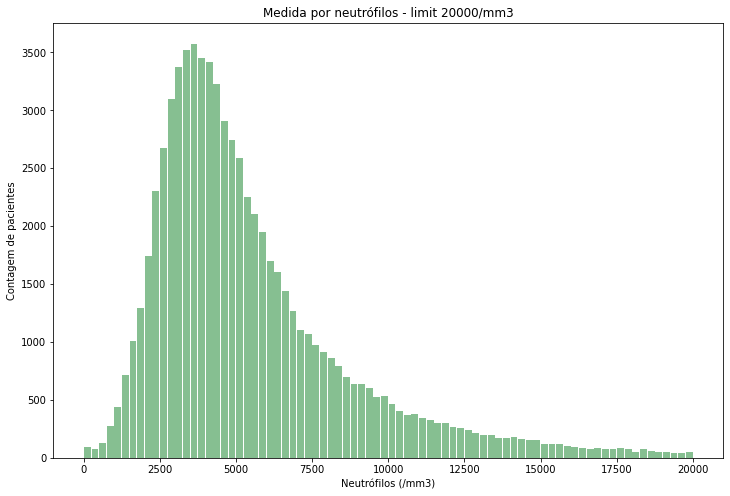

In [106]:
p_bins = 25
nf_mm3_first_all_20000 = nf_mm3_first_all
nf_mm3_first_all_20000 = nf_mm3_first_all[nf_mm3_first_all["Value"] < 20000]

nf_mm3_first_all_20000.hist(column='Value', bins=80, grid=False, figsize=(12,8),
                            color='#86bf91', zorder=2, rwidth=0.9, sharex=True,
                            sharey=True)
pl.title("Medida por neutrófilos - limit 20000/mm3")
pl.xlabel("Neutrófilos (/mm3)")
pl.ylabel("Contagem de pacientes")

In [107]:
statistics(nf_mm3_first_all_20000, "Value")

count    71053.000000
mean      5465.662739
std       3239.911202
min          0.000000
25%       3290.000000
50%       4590.000000
75%       6680.000000
max      19998.300000
Name: Value, dtype: float64

Média: 5465.662739082117, Desvio Padrão: 3239.9112018308265, Mediana: 4590.0, Moda: 3770.0


As estatísticas descritivas referentes a todas as medidas de neutrófilos está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 5465.67
Desvio Padrão | 3239.91 
Mediana     | 4590.0
Moda        | 3770

Esses dados podem ser vistos no diagrama de caixa abaixo.

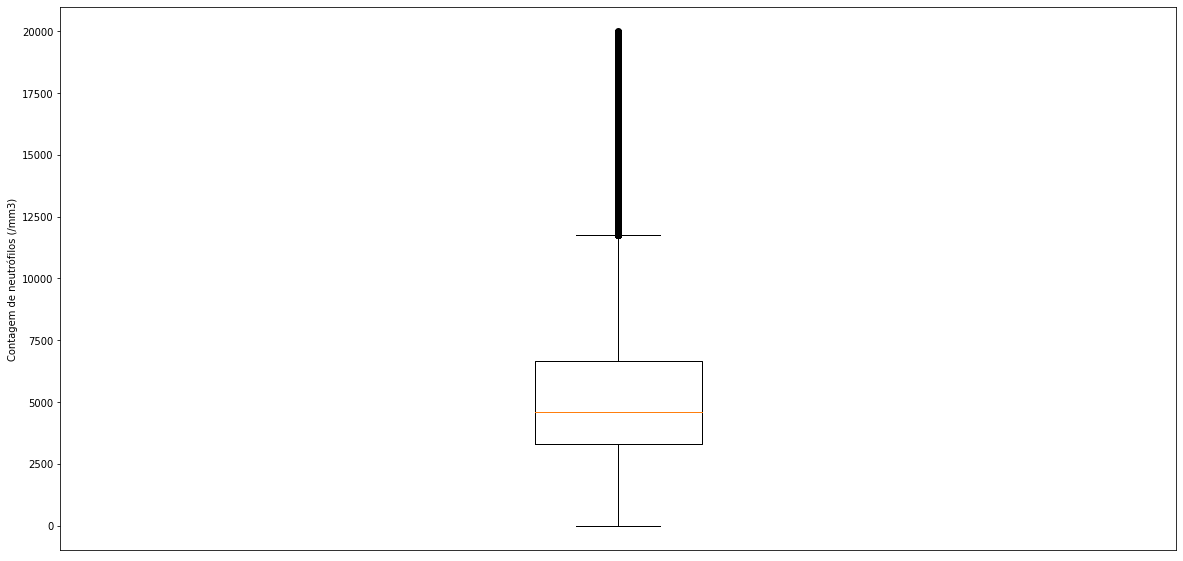

In [108]:
title="Boxplot todas as medidas de neutrófilos abaixo de 20000 /mm3"
boxplots([nf_mm3_first_all_20000["Value"]], ylabel="Contagem de neutrófilos (/mm3)")

Portanto, conforme pode-se observar, a maioria das medidas de neutrófilos se encontram na faixa de 3500 neutrófilos por mm3 de sangue.

Como pode-se verificar, a minoria está contida na faixa inferior a 500 neutrófilos por mm3 de sangue.

###[Histograma] - Comparação em relação a data de medida

Neste gráfico será feita uma análise de quantas vezes o número de internações com passagem pelo Hospital das Clínicas é menor em função de outros parâmetros.

Isso é, será pego como referência a quantidade de medidas por data dos pacientes com neutropenia grave que tiveram passagem pelo hemocentro em relação a todos os pacientes com neutropenia grave e em função de todas as medidas de neutrófilos.

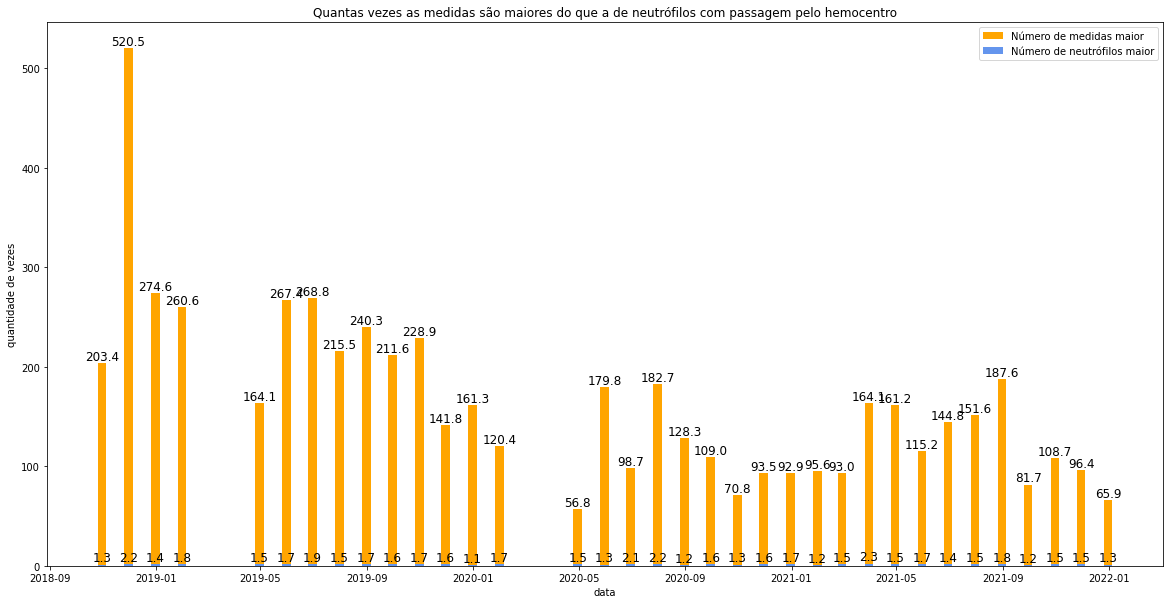

In [109]:
nf_lower_500_hemo_f_count = nf_lower_500_hemo_f.set_index('Date').groupby(pd.Grouper(freq='M')).count()
nf_mm3_first_500_count = nf_mm3_first_500.set_index('Date').groupby(pd.Grouper(freq='M')).count()
nf_mm3_first_all_count = nf_mm3_first_all.set_index('Date').groupby(pd.Grouper(freq='M')).count()

times_neutropicos = nf_mm3_first_500_count.div(nf_lower_500_hemo_f_count)
times_total = nf_mm3_first_all_count.div(nf_lower_500_hemo_f_count)

width = 10

fig, ax = plt.subplots()
p2 = ax.bar(times_total.index, times_total["Value"].round(1), width=width,
            facecolor="orange", label="Número de medidas maior")
p1 = ax.bar(times_neutropicos.index, times_neutropicos["Value"].round(1), width=width,
            facecolor="cornflowerblue", label="Número de neutrófilos maior")
pl.title("Quantas vezes as medidas são maiores do que a de neutrófilos com passagem pelo hemocentro")
pl.xlabel("data")
pl.ylabel("quantidade de vezes")
plt.legend()

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=12)

for rect1 in p2:
    height = rect1.get_height()
    plt.annotate("{}".format(height), (rect1.get_x() + rect1.get_width()/2,
                                        height+.05),
                ha="center", va="bottom", fontsize=12)

Com base no resultado, pode-se dizer que, em relação aos neutrófilos com passagem pelo hemocentro, a quantidade de neutrófilos que não teve passagem pelo hemocentro foi levemente maior, mas quando comparado a quantidade total de medidas, representam uma fração bem pequena. A tabela abaixo mostra tais valores em termos porcentuais.

In [110]:
p_neutropicos = nf_lower_500_hemo_f_count.div(nf_mm3_first_500_count)
p_total = nf_lower_500_hemo_f_count.div(nf_mm3_first_all_count)
p_neutropicos['Value'] = p_neutropicos['Value'].apply(lambda x: x*100)
p_total['Value'] = p_total['Value'].apply(lambda x: x*100)
p_neutropicos = p_neutropicos[p_neutropicos["Value"].notna()]
p_total = p_total[p_total["Value"].notna()]
p_neutropicos.reset_index(inplace=True)

p_neutropicos['Date'] = p_neutropicos['Date'].apply(lambda x: x.strftime("%m/%Y"))

fig = go.Figure(data=[go.Table(header=dict(values=['Data',
                                                   'Porcentagem de neutrófilos com passagem pelo hemocentro em relação ao total de neutrófilos (%)',
                                                   'Porcentagem de neutrófilos com passagem pelo hemocentro em relação ao total de medidas de neutrofenia (%)']),
                 cells=dict(values=[p_neutropicos['Date'], p_neutropicos['Value'].round(2), p_total['Value'].round(2)]))])
fig.show()

Como pode-se verificar na tabela, a quantidade de neutrófilos com passagem pelo hemocentro representa uma quantidade relativa em relação ao total de neutrófilos, variando entre 42.86% até 82.35%

Já em relação ao total de medidas de neutrófilos, representam uma quantidade mínima, variando entre 0.53% Até 1.52%.

###Comparações finais

Com o objetivo de se obter algumas conclusões sobre as análises com os 3 casos descritos, alguns gráficos serão apresentados.

O primeiro é comparando o porcentual de casos que tiveram neutropenia e foram para o hemocentro, os que não foram para o hemocentro, e o total de medidas. 

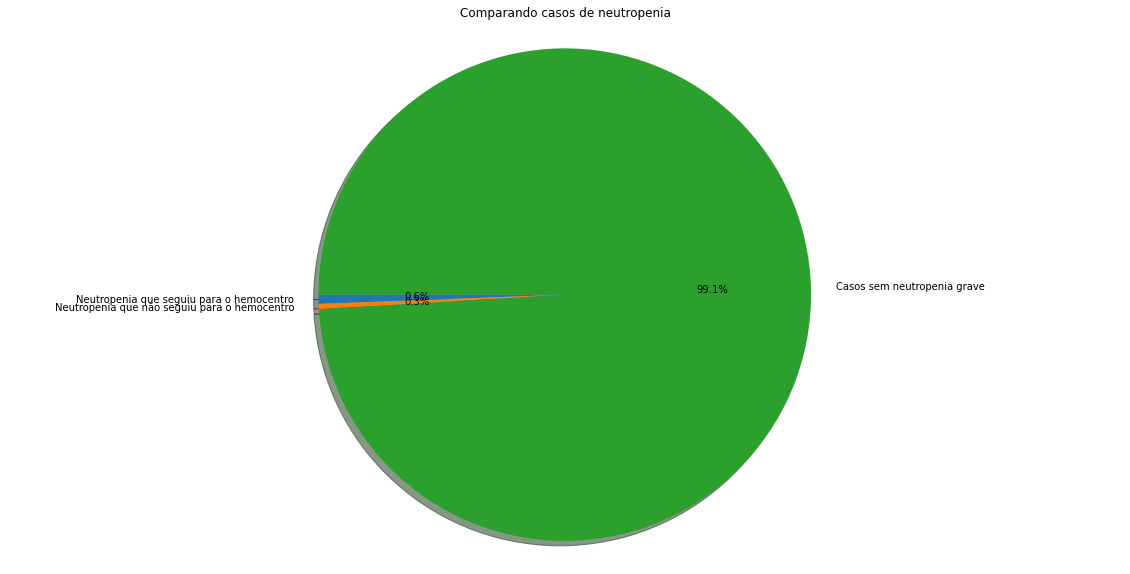

In [111]:
data = [nf_lower_500_hemo_f["Value"].count(), nf_mm3_first_500["Value"].count() - nf_lower_500_hemo_f["Value"].count(), nf_mm3_first_all["Value"].count() - nf_mm3_first_500["Value"].count()]
labels = ["Neutropenia que seguiu para o hemocentro", "Neutropenia que não seguiu para o hemocentro", "Casos sem neutropenia grave"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Comparando casos de neutropenia")

plt.show()

Como pode-se verificar, a maioria não apresentou casos de neutropenia.
Dos que apresentaram:

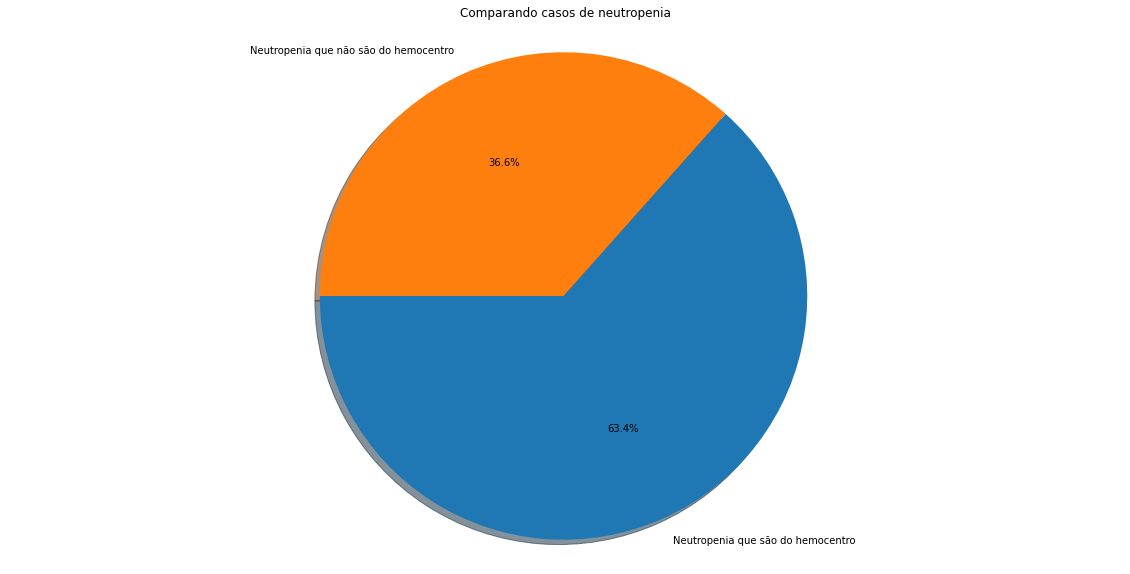

In [112]:
data = [nf_lower_500_hemo_f["Value"].count(), nf_mm3_first_500["Value"].count() - nf_lower_500_hemo_f["Value"].count()]
labels = ["Neutropenia que são do hemocentro", "Neutropenia que não são do hemocentro"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Comparando casos de neutropenia")

plt.show()

Pode-se dizer que a maioria dos casos em que a neutropenia foi identificada no Hospital das Clínicas, são pacientes do hemocentro. Apenas uma fração de 36.6% destes casos não pertencem ao hemocentro.

Dividindo este plot em relação ao sexo:

Text(0.5, 1.0, 'Comparando casos de neutropenia para mulheres')

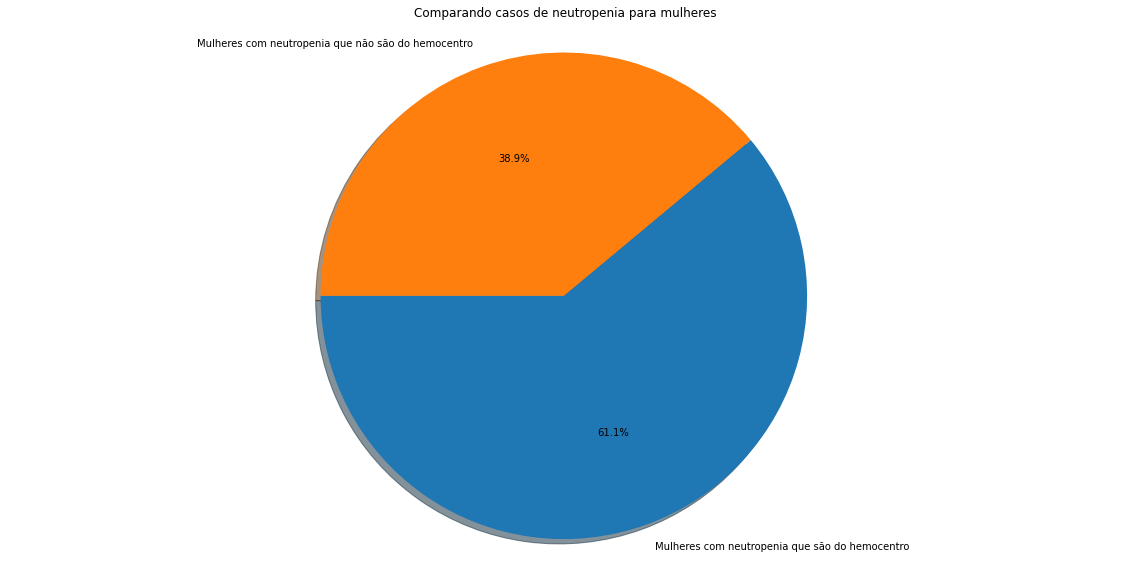

In [113]:
nf_lower_500_hemo_f_womam = nf_lower_500_hemo_f[nf_lower_500_hemo_f["sex"] == "F"]
nf_lower_500_hemo_f_man = nf_lower_500_hemo_f[nf_lower_500_hemo_f["sex"] == "M"]
nf_mm3_first_500_woman = nf_mm3_first_500[nf_mm3_first_500["sex"] == "F"]
nf_mm3_first_500_men = nf_mm3_first_500[nf_mm3_first_500["sex"] == "M"]


data = [nf_lower_500_hemo_f_womam["Value"].count(),
        nf_mm3_first_500_woman["Value"].count() - nf_lower_500_hemo_f_womam["Value"].count()]
labels = ["Mulheres com neutropenia que são do hemocentro",
          "Mulheres com neutropenia que não são do hemocentro"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Comparando casos de neutropenia para mulheres")

Com base no gráfico de porcentagem, pode-se dizer que a maioria das mulheres que tiveram neutropenia também são pacientes do hemocentro.

Text(0.5, 1.0, 'Comparando casos de neutropenia para homens')

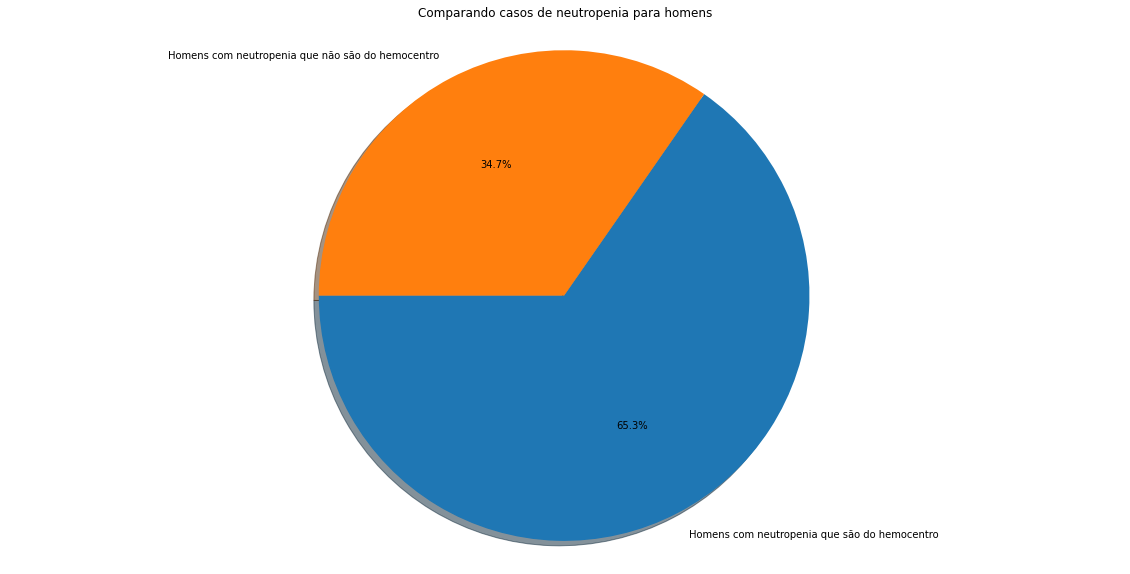

In [114]:
data = [nf_lower_500_hemo_f_man["Value"].count(),
        nf_mm3_first_500_men["Value"].count() - nf_lower_500_hemo_f_man["Value"].count()]
labels = ["Homens com neutropenia que são do hemocentro",
          "Homens com neutropenia que não são do hemocentro"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Comparando casos de neutropenia para homens")

Igualando com o gráfico das mulheres, igualmente a maioria das homens que tiveram neutropenia são acompanhados pelo hemocentro, porém em relação as mulheres, o porcentual de homens que se dirigiram ao hemocentro é levemente maior.

## **Plots relacionando os que são pacientes do hemocentro**

Análises relacionadas aos pacientes que são pacientes do hemocentro

###Classificação da neutropenia para os são do hemocentro

O parâmetro para classificar os casos de neutropenia foram obtidos conforme [ingoh](https://ingoh.com.br):

Neutropenia leve (1.000/mm3 < neutrófilos <1.500/mm3).
Neutropenia moderada (500/mm3 < neutrófilos < 1.000/mm3).
Neutropenia grave (neutrófilos <500/mm3) – alto risco de infecção.

Considerando apenas a menor medida para cada paciente.

Text(0.5, 1.0, 'Comparando casos de neutropenia dos pacientes que são do hemocentro - considerando menor medida')

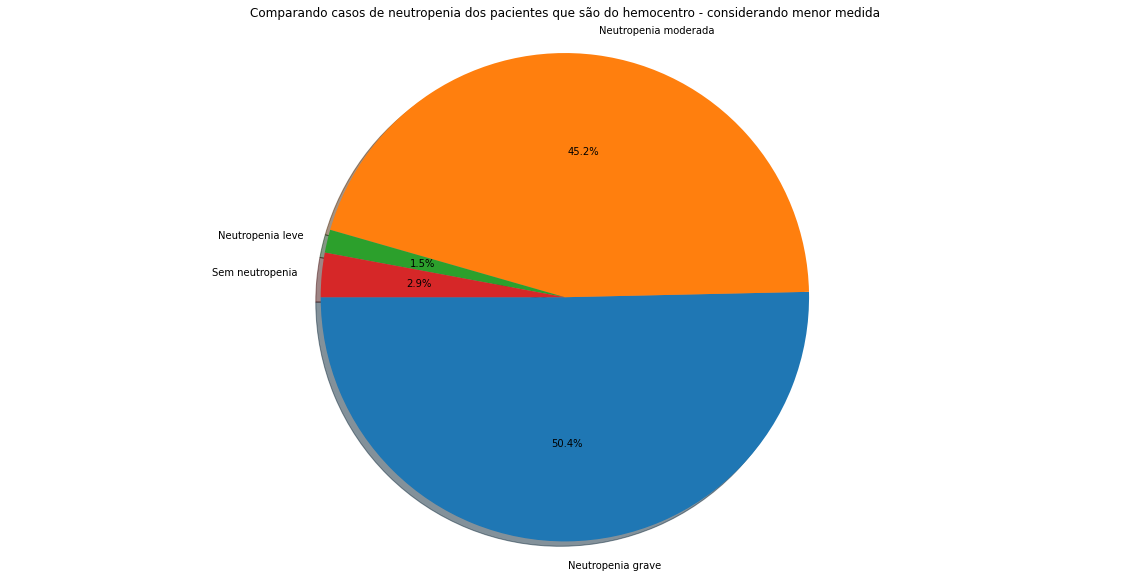

In [115]:
nf_abs_value_mm3_in_hemo_sort_value = nf_abs_value_mm3_in_hemo.sort_values("Value")
nf_in_hemo_sort_value_id = nf_abs_value_mm3_in_hemo_sort_value.drop_duplicates(subset=['Id'])
grave_hemo = nf_in_hemo_sort_value_id[nf_in_hemo_sort_value_id["Value"] < 500]
moderada_hemo = nf_in_hemo_sort_value_id[nf_in_hemo_sort_value_id["Value"].between(500, 1000)]
leve_hemo = nf_in_hemo_sort_value_id[nf_in_hemo_sort_value_id["Value"].between(1000, 1500)]
sem_neutropenia_hemo = nf_in_hemo_sort_value_id[nf_in_hemo_sort_value_id["Value"] > 1500]

data = [grave_hemo["Value"].count(), moderada_hemo["Value"].count(),
        leve_hemo["Value"].count(), sem_neutropenia_hemo["Value"].count()]
labels = ["Neutropenia grave", "Neutropenia moderada", "Neutropenia leve", "Sem neutropenia"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Comparando casos de neutropenia dos pacientes que são do hemocentro - considerando menor medida")

Portanto, com base neste gráfico, pode-se dizer que a maioria dos pacientes que foram para o hemocentro apresentaram neutropenia grave, seguido por neutropenia moderada. Uma parcela relativamente pequena não teve a condição de neutropenia durante todo o período do tratamento. 

Considerando a mesma análise, porém pegando a primeira medida para cada paciente, e não a menor, obtêm-se que:

Text(0.5, 1.0, 'Comparando casos de neutropenia dos pacientes que são do hemocentro - considerando primeira medida')

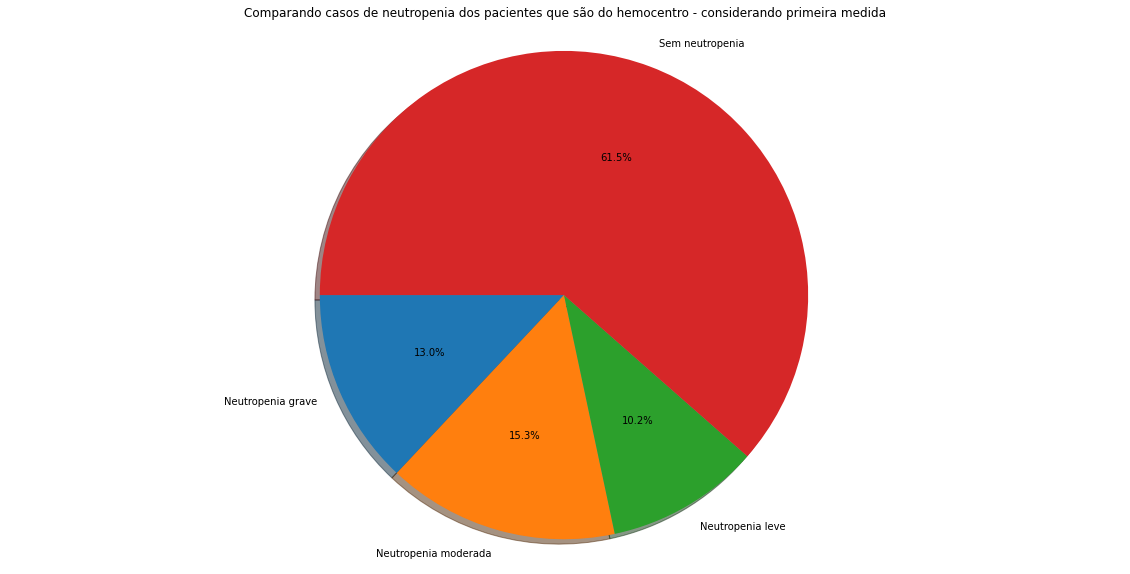

In [116]:
nf_abs_value_mm3_in_hemo_sort_value_d = nf_abs_value_mm3_in_hemo.sort_values("Date")
nf_in_hemo_sort_value_id_d = nf_abs_value_mm3_in_hemo_sort_value_d.drop_duplicates(subset=['Id'])
grave_hemo_d = nf_in_hemo_sort_value_id_d[nf_in_hemo_sort_value_id_d["Value"] < 500]
moderada_hemo_d = nf_in_hemo_sort_value_id_d[nf_in_hemo_sort_value_id_d["Value"].between(500, 1000)]
leve_hemo_d = nf_in_hemo_sort_value_id_d[nf_in_hemo_sort_value_id_d["Value"].between(1000, 1500)]
sem_neutropenia_hemo_d = nf_in_hemo_sort_value_id_d[nf_in_hemo_sort_value_id_d["Value"] > 1500]

data = [grave_hemo_d["Value"].count(), moderada_hemo_d["Value"].count(),
        leve_hemo_d["Value"].count(), sem_neutropenia_hemo_d["Value"].count()]
labels = ["Neutropenia grave", "Neutropenia moderada", "Neutropenia leve", "Sem neutropenia"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Comparando casos de neutropenia dos pacientes que são do hemocentro - considerando primeira medida")

Portanto, se for considerada a primeira medida, a quantidade de pacientes que entraram com neutropenia é muito menor. 

Com base nessa análise, pode-se considerar que a maioria dos pacientes tiveram, durante o tratamento, queda significativa da quantidade de neutrófilos no sangue.

Dos pacientes que foram para o tratamento no hemocentro, a maioria entrou sem neutropenia, mas durante o tratamento, a maioria apresentou, em algum momento, medidas de atenção para a neutropenia. 

###Classificação da neutropenia para os que foram para o hemocentro de acordo com o sexo

O parâmetro para classificar os casos de neutropenia foram obtidos conforme [ingoh](https://ingoh.com.br):

In [117]:
grave_hemo_womam = grave_hemo[grave_hemo["sex"] == "F"]
grave_hemo_man = grave_hemo[grave_hemo["sex"] == "M"]
moderada_hemo_womam = moderada_hemo[moderada_hemo["sex"] == "F"]
moderada_hemo_man = moderada_hemo[moderada_hemo["sex"] == "M"]
leve_hemo_womam = leve_hemo[leve_hemo["sex"] == "F"]
leve_hemo_man = leve_hemo[leve_hemo["sex"] == "M"]
sem_neutropenia_hemo_womam = sem_neutropenia_hemo[sem_neutropenia_hemo["sex"] == "F"]
sem_neutropenia_hemo_man = sem_neutropenia_hemo[sem_neutropenia_hemo["sex"] == "M"]

# Para a análise por primeira medida

grave_hemo_womam_d = grave_hemo_d[grave_hemo_d["sex"] == "F"]
grave_hemo_man_d = grave_hemo_d[grave_hemo_d["sex"] == "M"]
moderada_hemo_womam_d = moderada_hemo_d[moderada_hemo_d["sex"] == "F"]
moderada_hemo_man_d = moderada_hemo_d[moderada_hemo_d["sex"] == "M"]
leve_hemo_womam_d = leve_hemo_d[leve_hemo_d["sex"] == "F"]
leve_hemo_man_d = leve_hemo_d[leve_hemo_d["sex"] == "M"]
sem_neutropenia_hemo_womam_d = sem_neutropenia_hemo_d[sem_neutropenia_hemo_d["sex"] == "F"]
sem_neutropenia_hemo_man_d = sem_neutropenia_hemo_d[sem_neutropenia_hemo_d["sex"] == "M"]

Plot para as mulheres - menor medida

Text(0.5, 1.0, 'Comparando casos de neutropenia dos pacientes que foram para o hemocentro para as mulheres - considerando menor medida')

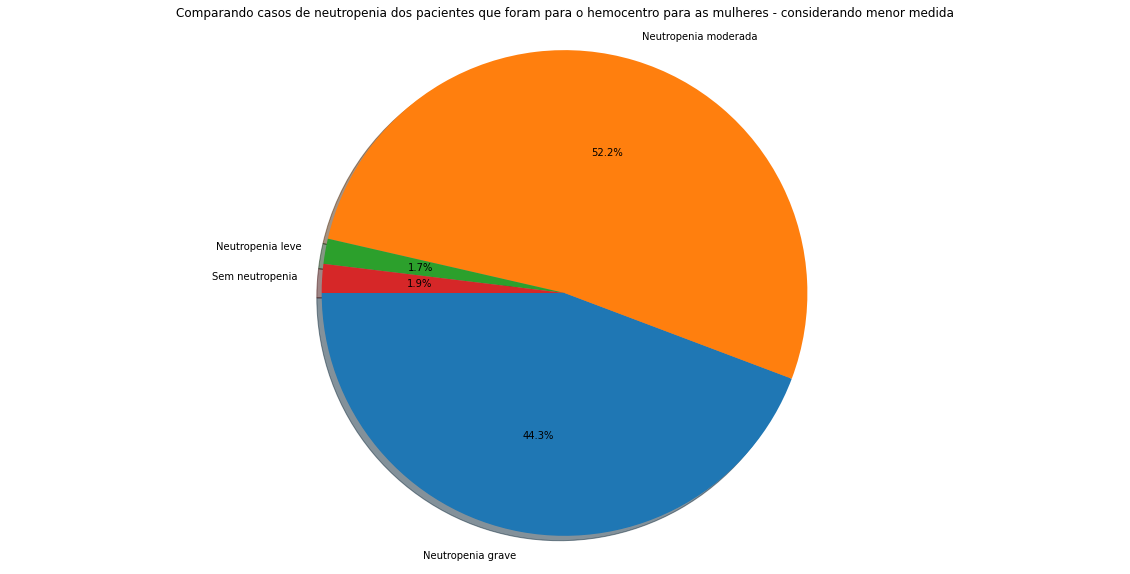

In [118]:
data = [grave_hemo_womam["Value"].count(), moderada_hemo_womam["Value"].count(),
        leve_hemo_womam["Value"].count(), sem_neutropenia_hemo_womam["Value"].count()]
labels = ["Neutropenia grave", "Neutropenia moderada", "Neutropenia leve", "Sem neutropenia"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Comparando casos de neutropenia dos pacientes que foram para o hemocentro para as mulheres - considerando menor medida")

Plot para as mulheres - primeira medida

Text(0.5, 1.0, 'Comparando casos de neutropenia dos pacientes que foram para o hemocentro para as mulheres - considerado primeira medida')

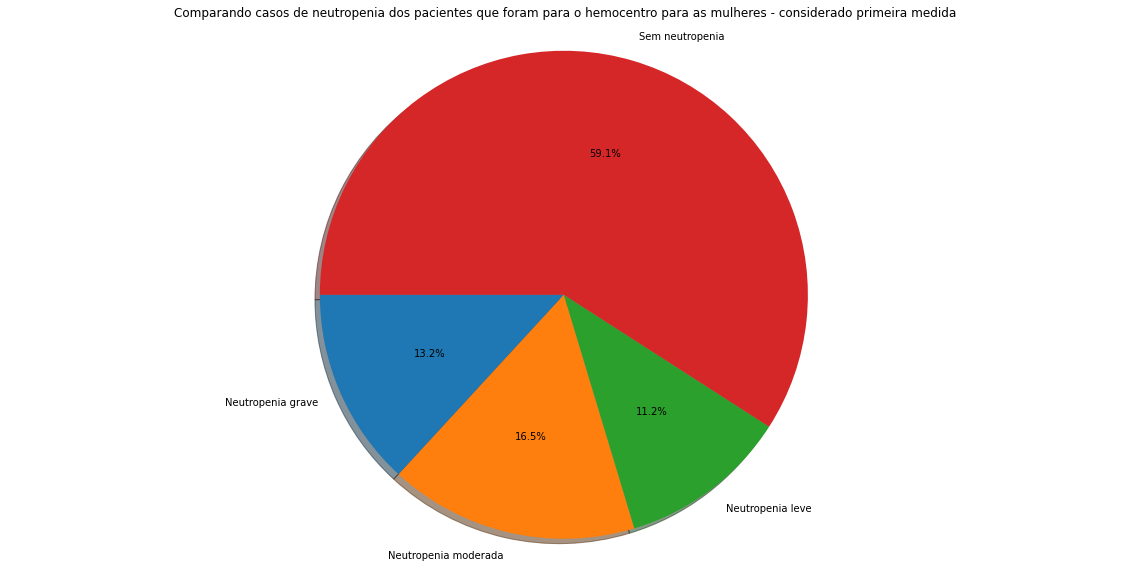

In [119]:
data = [grave_hemo_womam_d["Value"].count(), moderada_hemo_womam_d["Value"].count(),
        leve_hemo_womam_d["Value"].count(), sem_neutropenia_hemo_womam_d["Value"].count()]
labels = ["Neutropenia grave", "Neutropenia moderada", "Neutropenia leve", "Sem neutropenia"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Comparando casos de neutropenia dos pacientes que foram para o hemocentro para as mulheres - considerado primeira medida")

Plot para os homens - menor medida

Text(0.5, 1.0, 'Comparando casos de neutropenia dos pacientes que foram para o hemocentro para os homens - considerando menor medida')

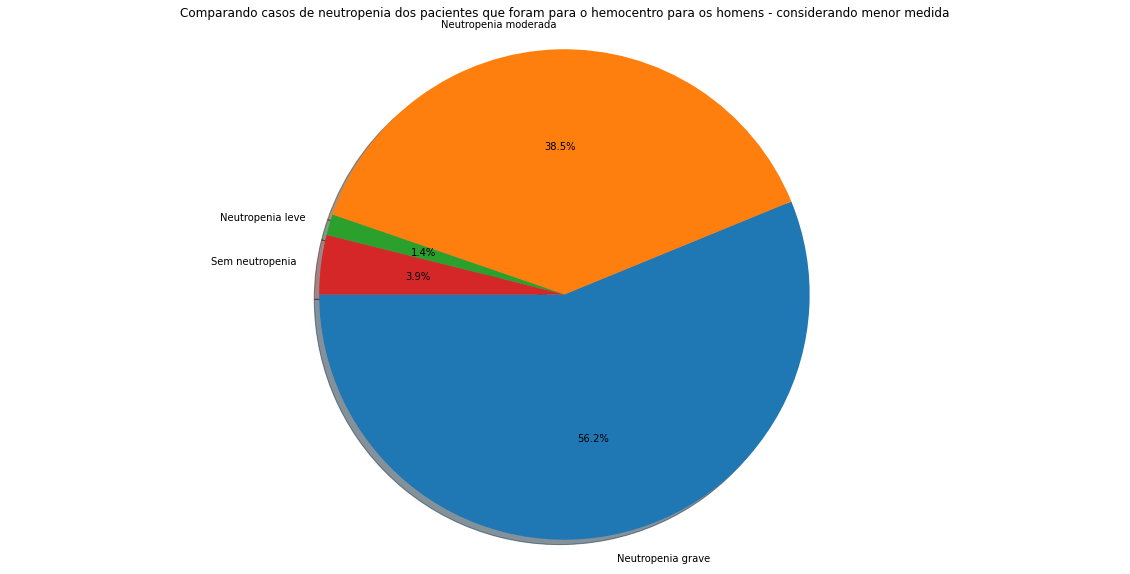

In [120]:
data = [grave_hemo_man["Value"].count(), moderada_hemo_man["Value"].count(),
        leve_hemo_man["Value"].count(), sem_neutropenia_hemo_man["Value"].count()]
labels = ["Neutropenia grave", "Neutropenia moderada", "Neutropenia leve", "Sem neutropenia"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Comparando casos de neutropenia dos pacientes que foram para o hemocentro para os homens - considerando menor medida")

Plot para os homens - primeira medida

Text(0.5, 1.0, 'Comparando casos de neutropenia dos pacientes que foram para o hemocentro para os homens - considerando primeira medida')

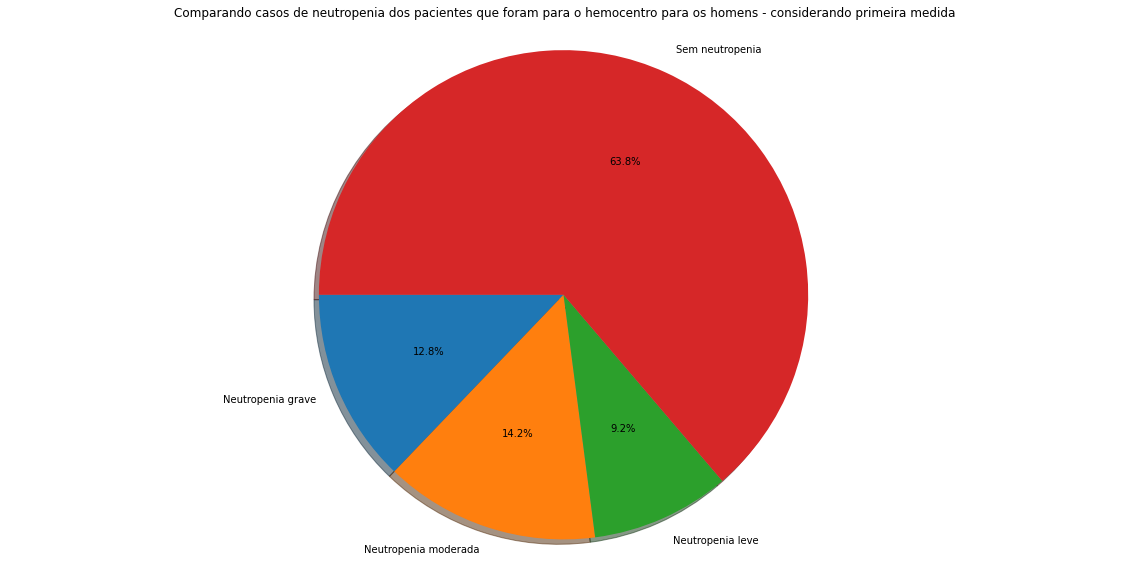

In [121]:
data = [grave_hemo_man_d["Value"].count(), moderada_hemo_man_d["Value"].count(),
        leve_hemo_man_d["Value"].count(), sem_neutropenia_hemo_man_d["Value"].count()]
labels = ["Neutropenia grave", "Neutropenia moderada", "Neutropenia leve", "Sem neutropenia"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Comparando casos de neutropenia dos pacientes que foram para o hemocentro para os homens - considerando primeira medida")

Comparando os dados para os homens e mulheres, pode-se dizer concluir, ainda que sem poder de afirmação, que a probabilidade de se desenvolver caso grave de neutropenia é menor para as mulheres do que para os homens.

Já para a situação de neutropenia moderada, as mulheres superam significativamente a quantidade de homens.

Para neutropenia leve ambos possuem uma probabilidade baixa, observando que para os casos em que a neutropenia não é desenvolvida, os homens maior probabilidade.

Se comparando a primeira medida com a menor medida, observa-se que a quantidade de homens que deram entrada sem neutropenia é relativamente maior que a de mulheres, e durante o tratamento, a quantidade de homens que apresentaram neutropenia grave é relativamente maior. Portanto, pode-se concluir que, durante o tratamento, os homens apresentaram mais perda de neutrófilos do que as mulheres.

# **Plots com análises individuais**

Esta seção busca realizar plots com base em todas as medidas de neutrófilos para cada paciente que teve passagem pelo hemocentro e apresentou neutropenia

## Análise para se obter os dataframe de cada paciente com passagem pelo hemocentro e com neutropenia

###Obtendo uma lista de dataframes por paciente

In [122]:
# Criando lista de dataframes com base nos pacientes que tiveram passagem pelo hemocentro com neutropenia
patients = []
for patient in nf_lower_500_hemo_f["Id"]:
  contain_id = nf_abs_value_mm3[(nf_abs_value_mm3['Id'] == patient)]
  patients.append(contain_id.sort_values("Date"))

## Agrupando as medidas em grupos de 5

Agrupando as medidas em grupos de 5 para que se torne viável a visualização dos dados e assim possa ser capaz tomar uma decisão sobre como fazer o processamento deles.




Medida para os pacientes: 25027938,25060976,15817743,14039975,23425873


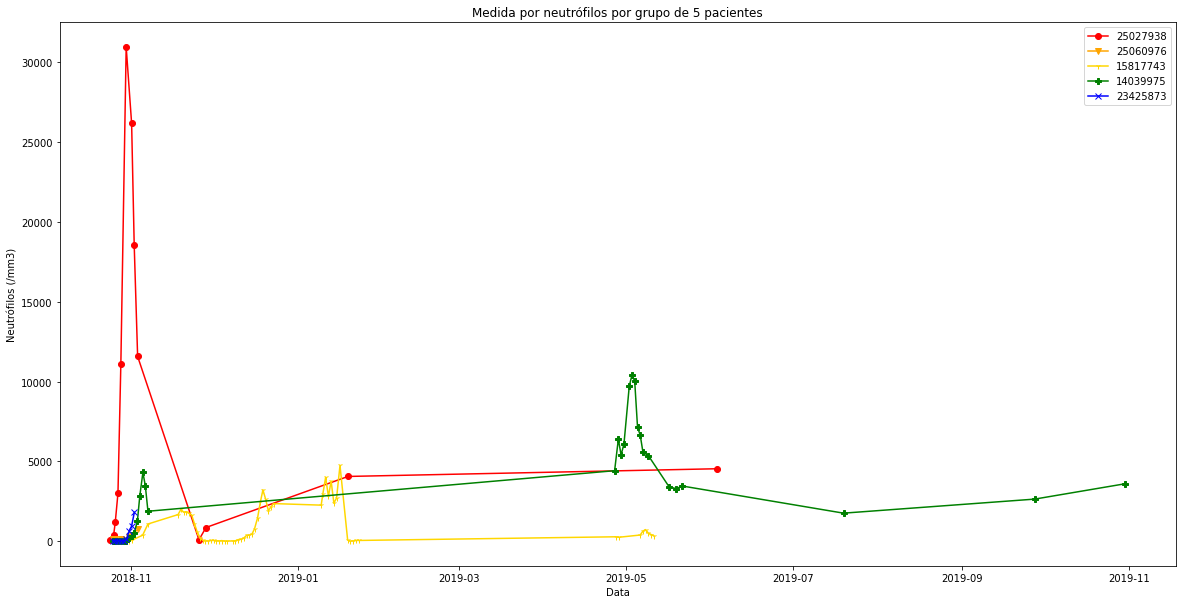




Medida para os pacientes: 25042818,14940300,24764331,20730592,20962232


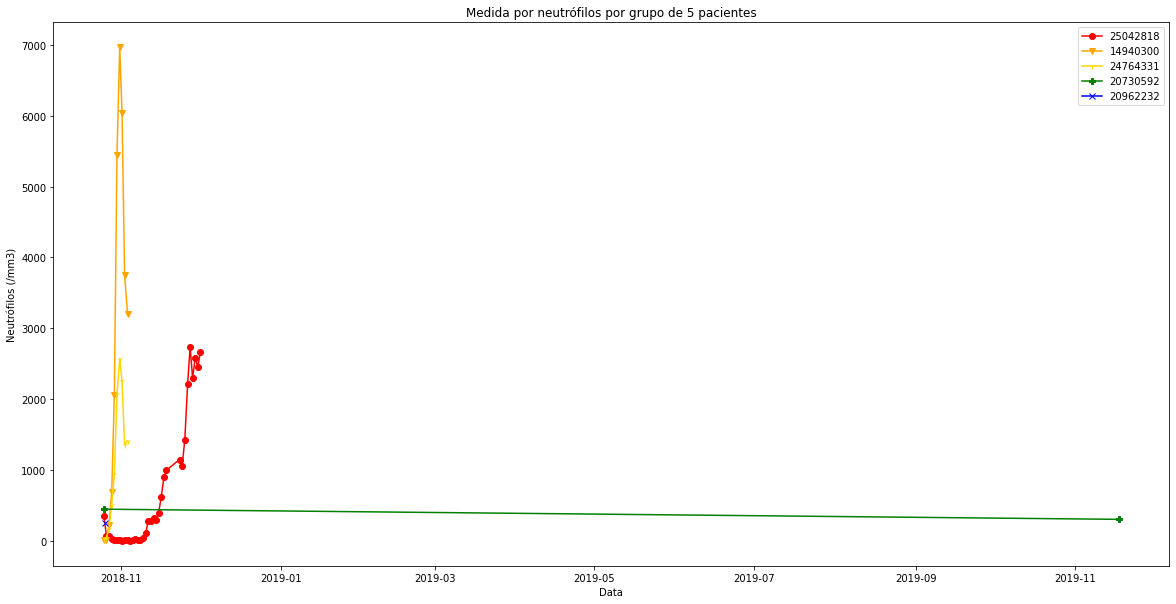




Medida para os pacientes: 24966510,24805838,15747905,21515104,23192526


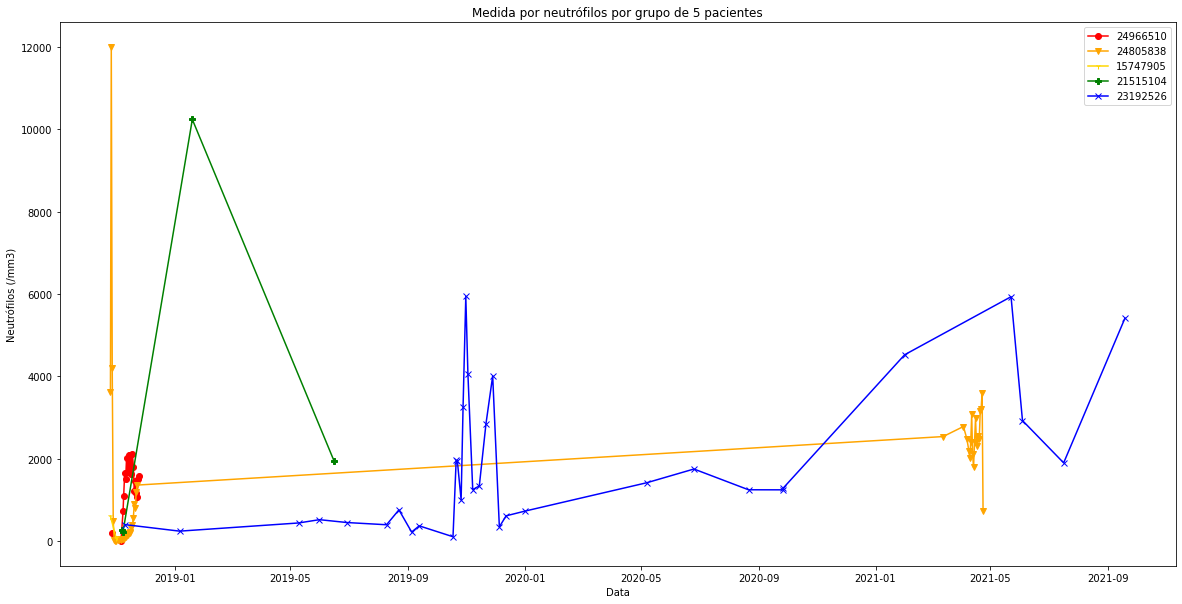




Medida para os pacientes: 25072735,25040239,24998810,24721726,25086243


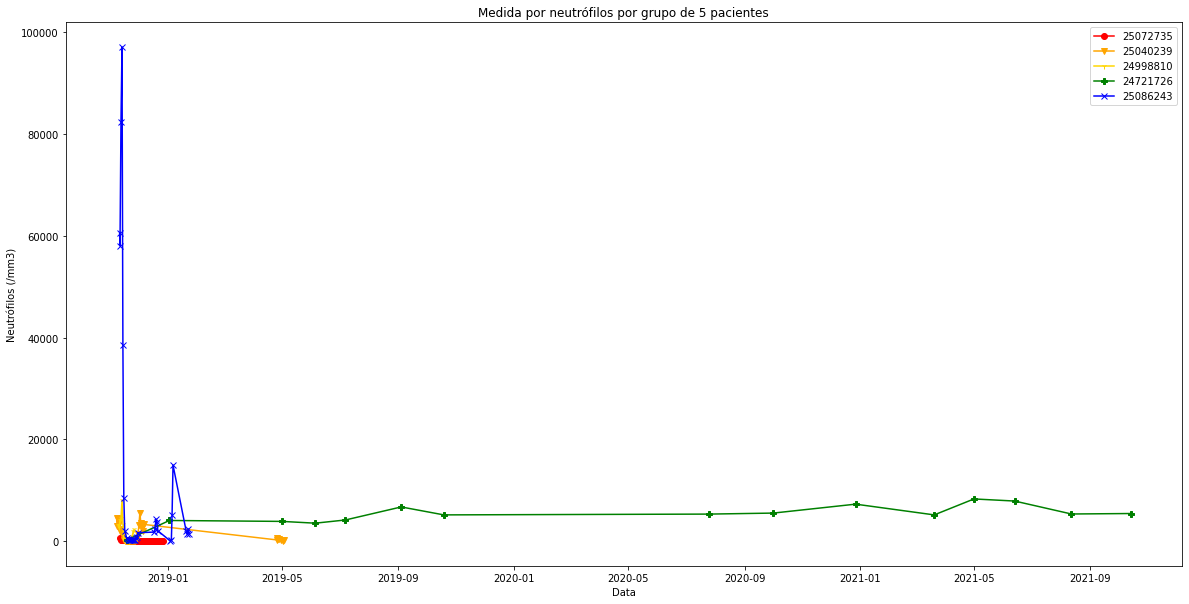




Medida para os pacientes: 19825212,25096403,16789928,24611020,24830166


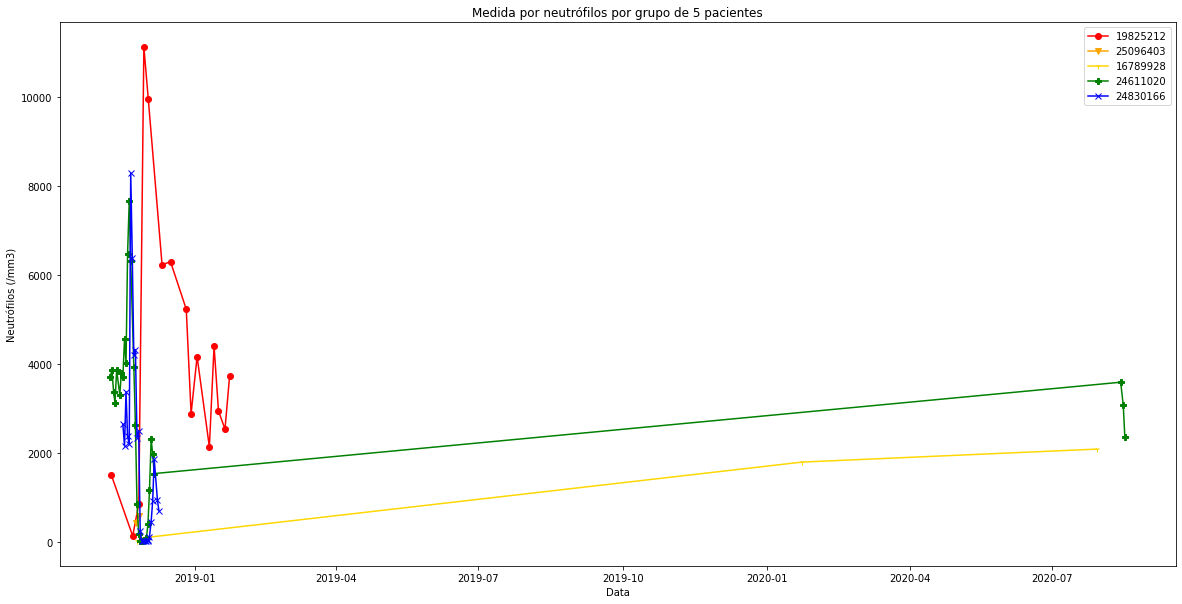




Medida para os pacientes: 18142617,25031573,24135031,21574068,24881557


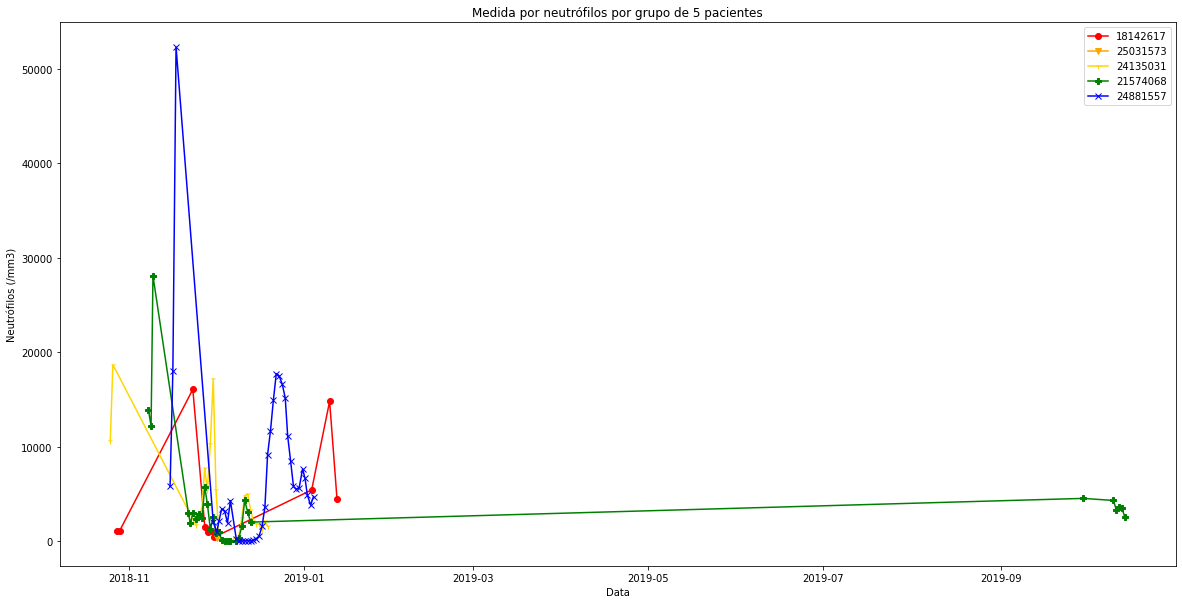




Medida para os pacientes: 20184270,25069276,25110654,25106039,25107451


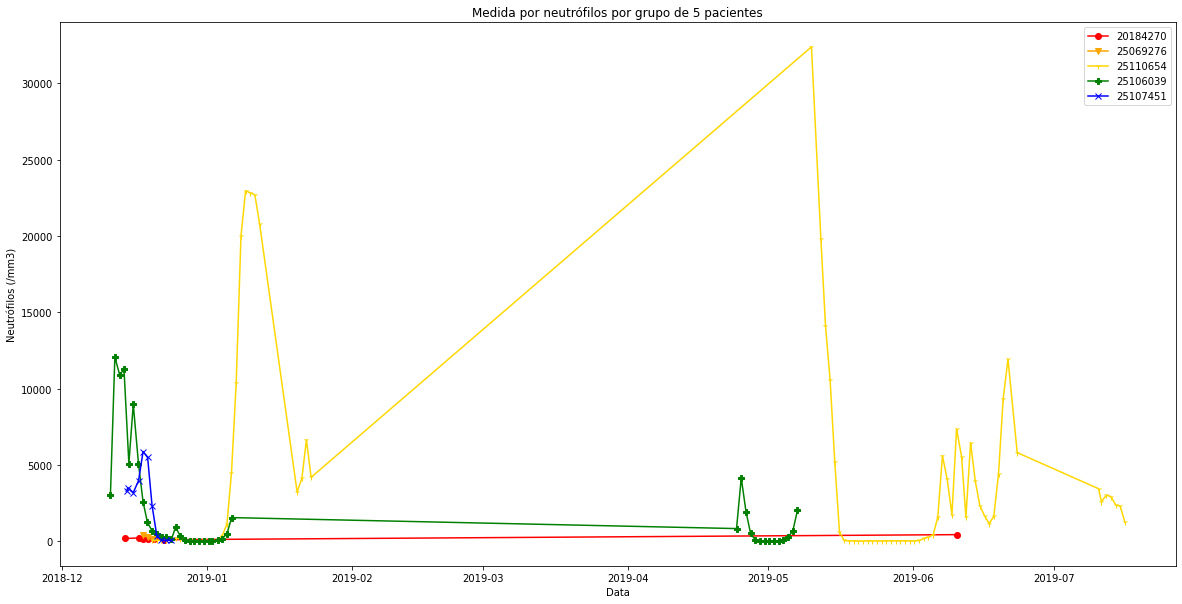




Medida para os pacientes: 24278638,22838939,24628154,25099487,23568785


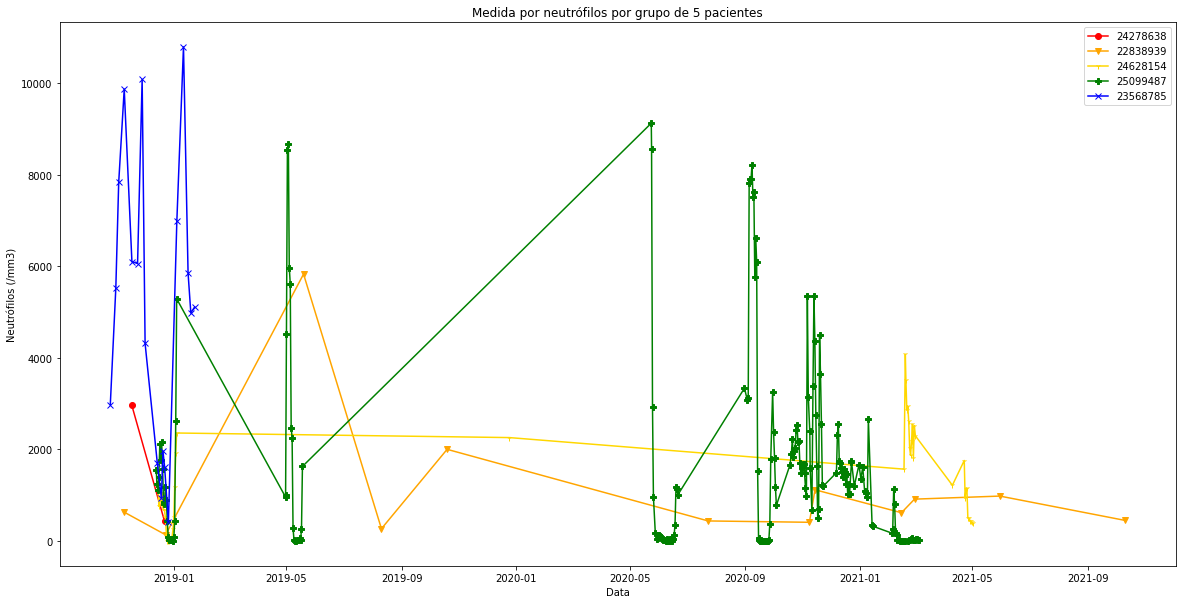




Medida para os pacientes: 25110381,25111476,25112221,24894344,25119913


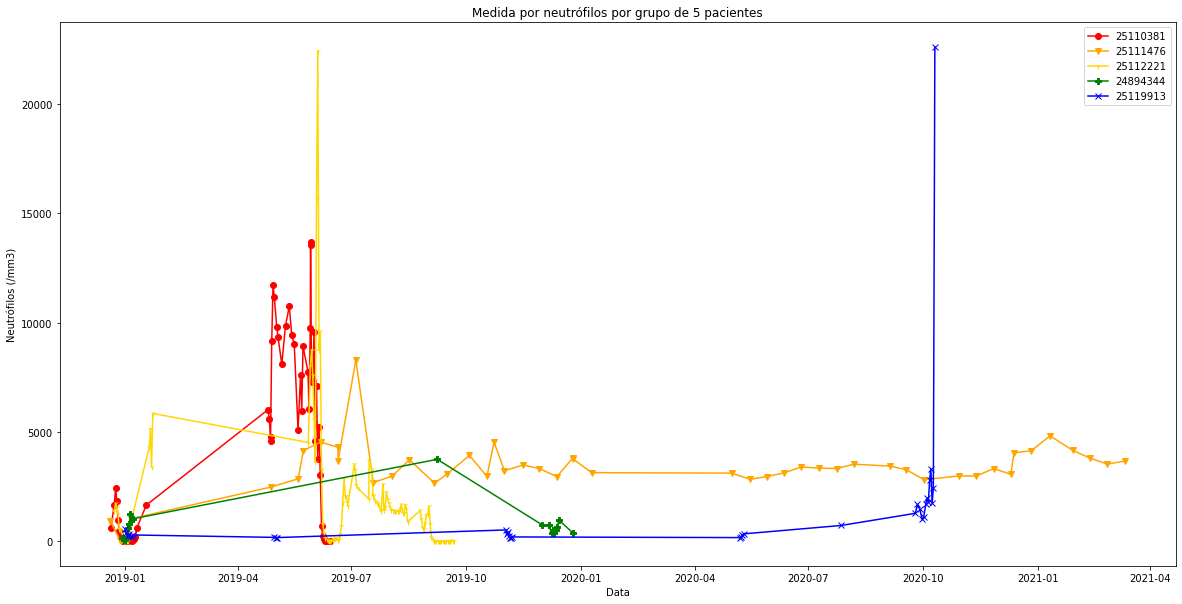




Medida para os pacientes: 24883943,24801464,24698583,25038265,18915049


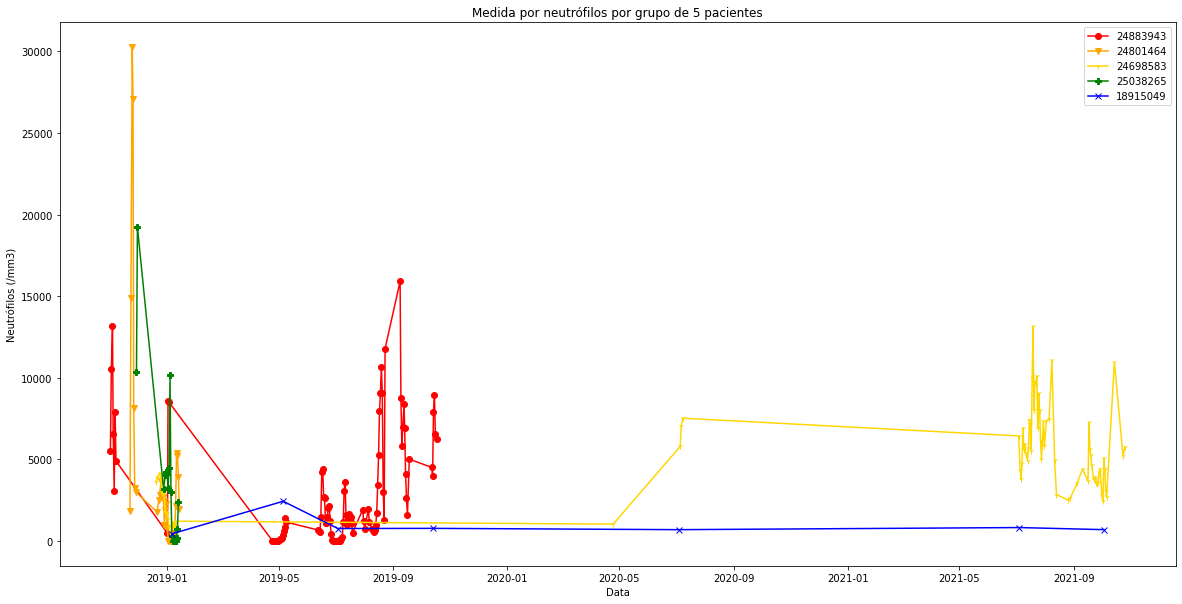




Medida para os pacientes: 24911297,25122305,16310158,24309707,25157274


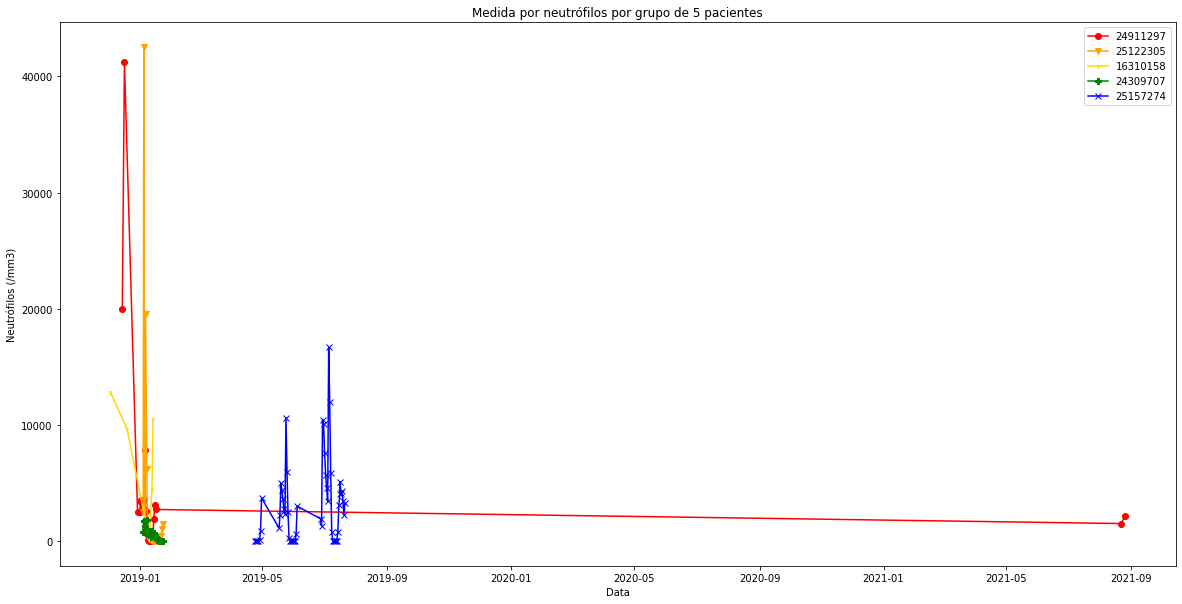




Medida para os pacientes: 24815996,25149518,15171652,25048516,24693166


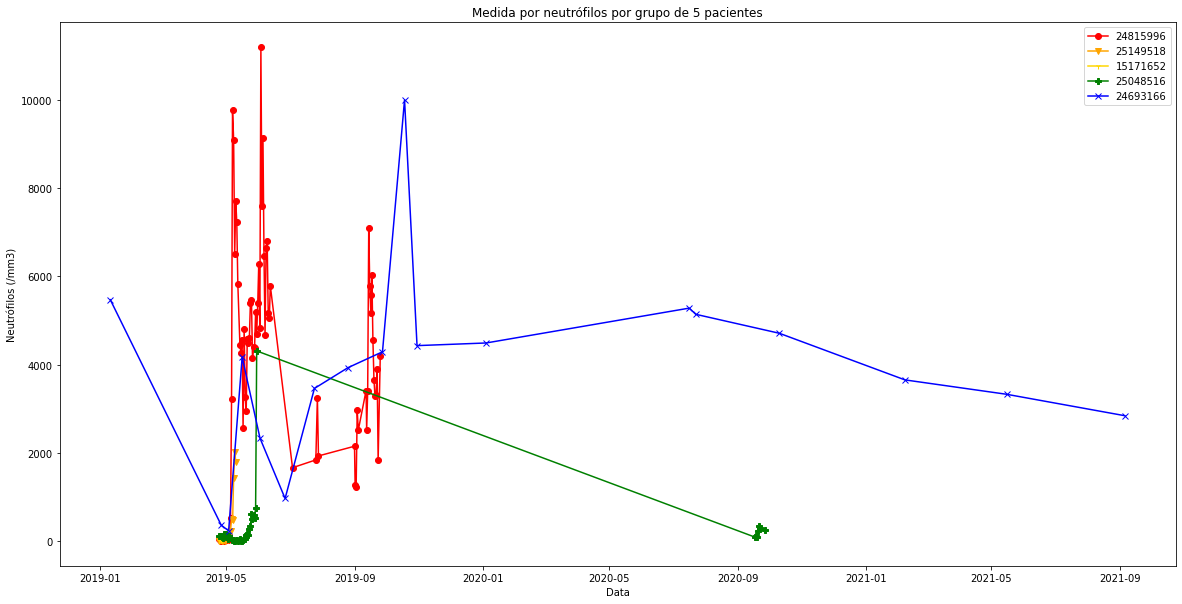




Medida para os pacientes: 18103529,24941472,18879482,21680552,25202075


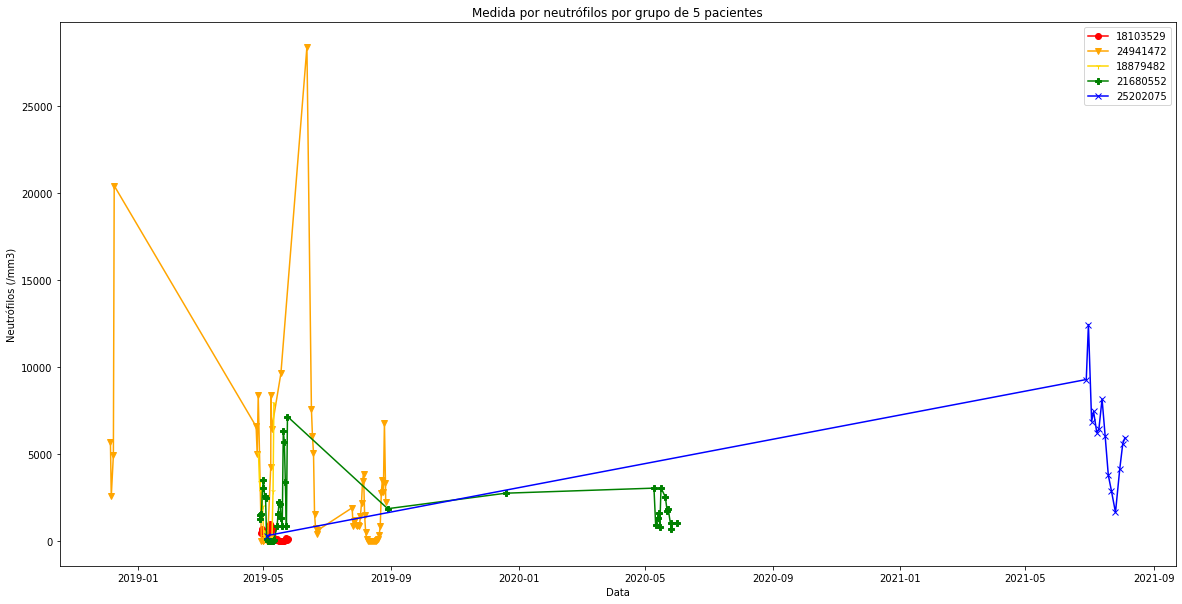




Medida para os pacientes: 24914792,23950904,25041736,25139065,25158311


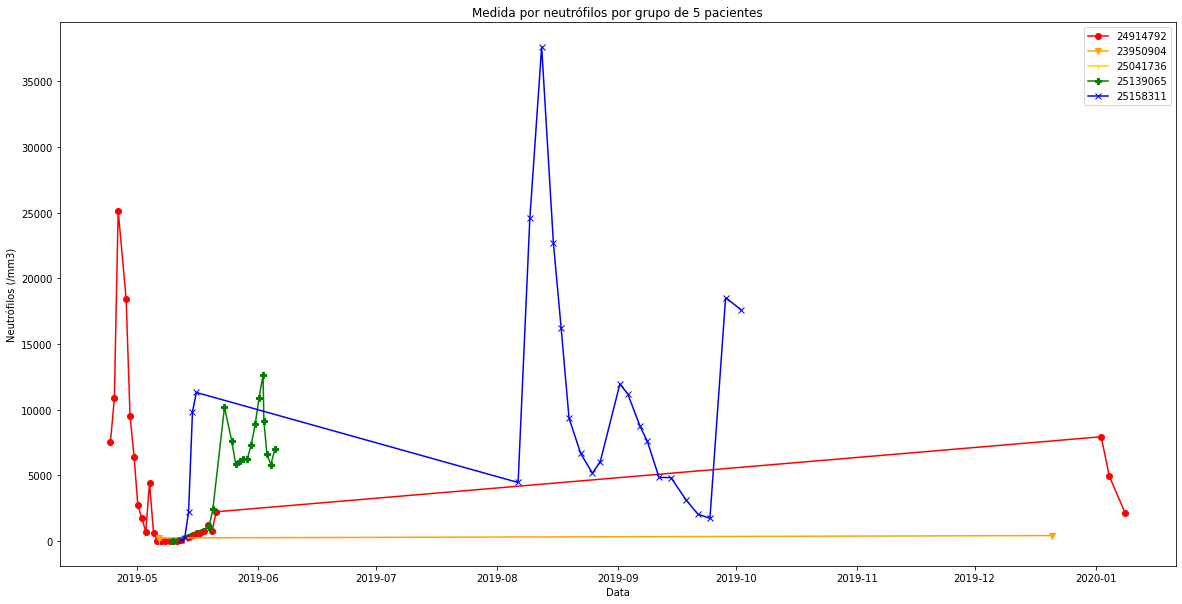




Medida para os pacientes: 25170185,25066982,25172927,22384591,23614981


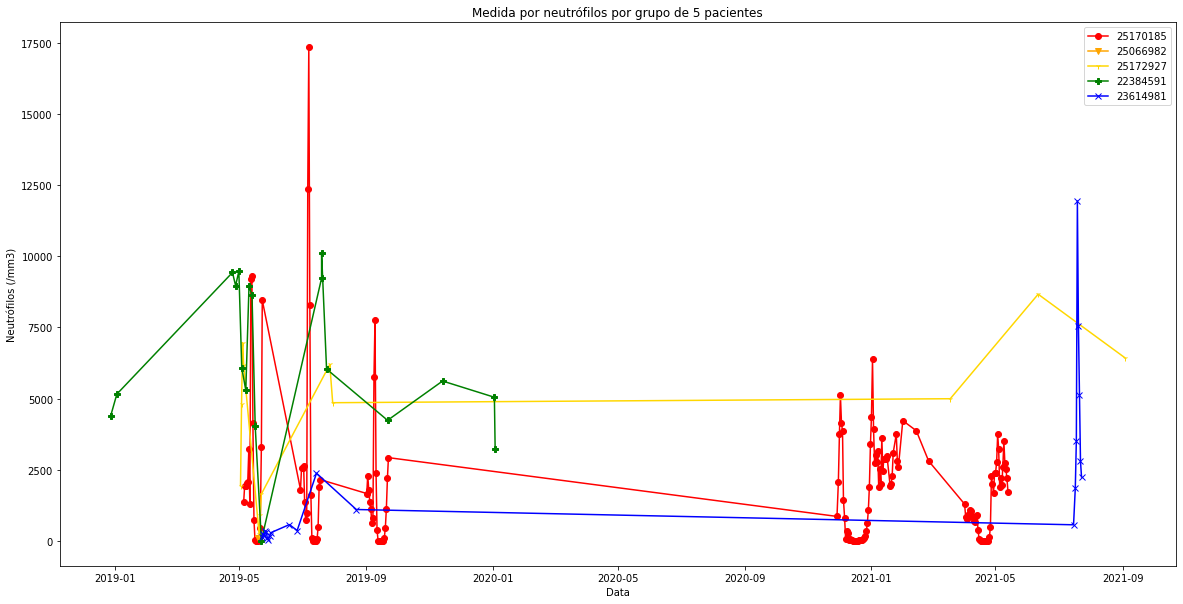




Medida para os pacientes: 25091482,25217423,25218396,25012914,25184091


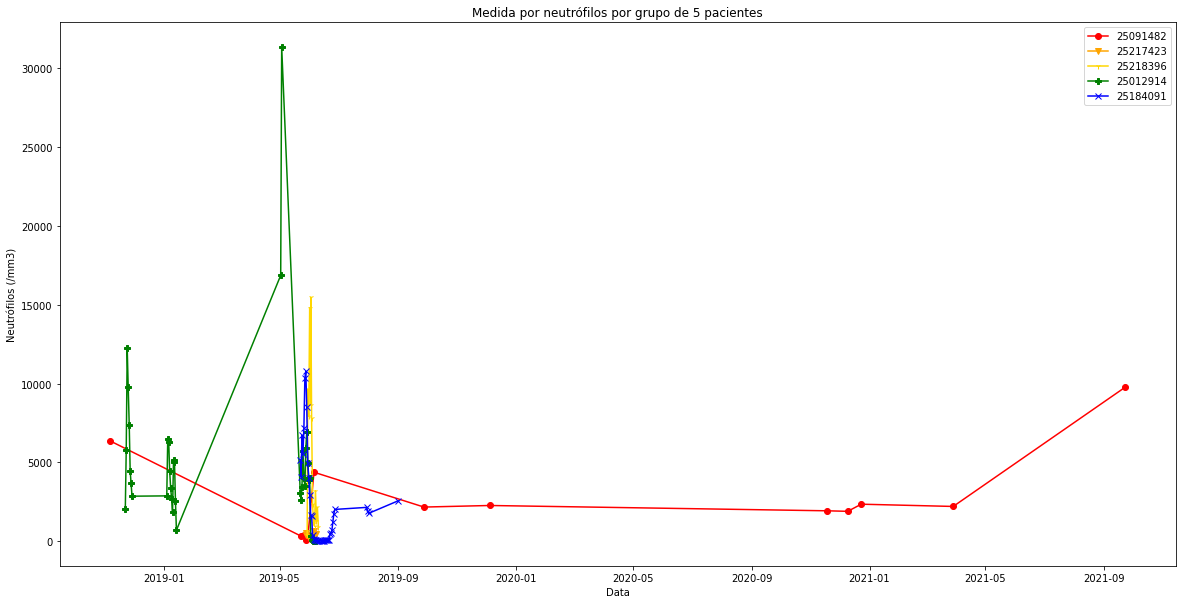




Medida para os pacientes: 25215999,22904506,24954455,22899640,23984216


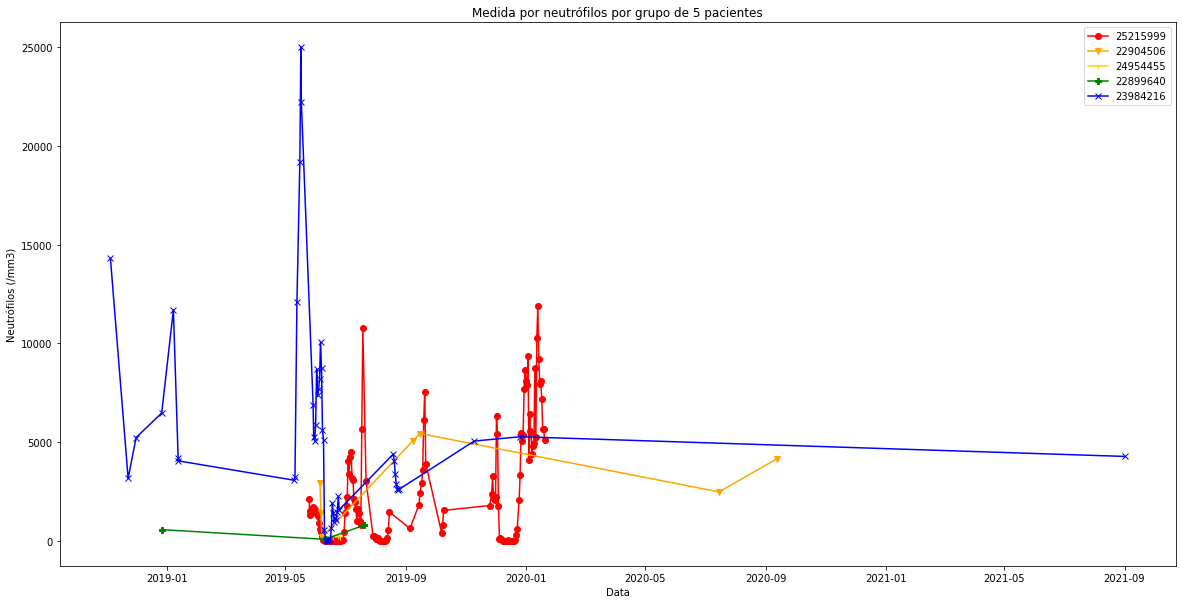




Medida para os pacientes: 25152573,16168812,25005196,25144523,24553227


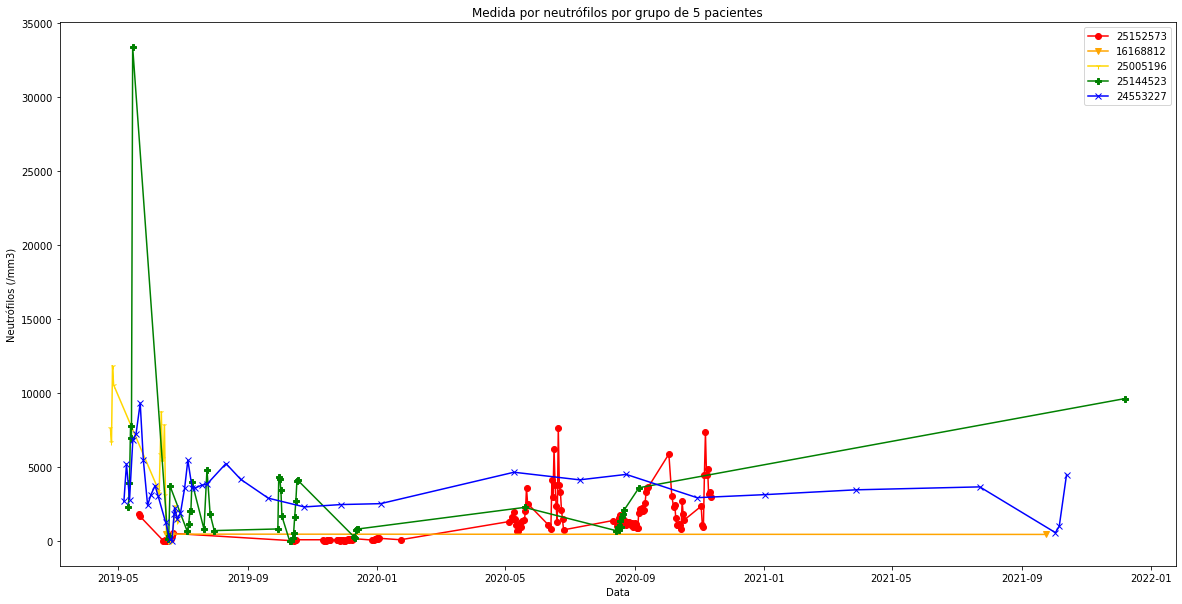




Medida para os pacientes: 25048024,25241004,14760757,24786535,25251369


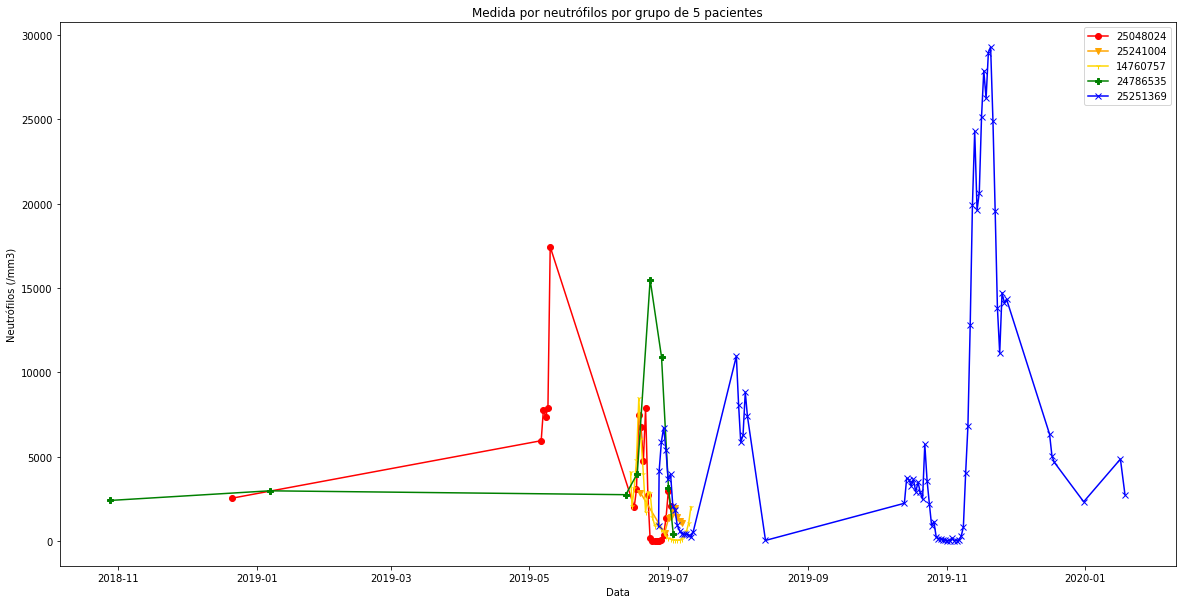




Medida para os pacientes: 25264639,20335736,24519781,23767130,25270005


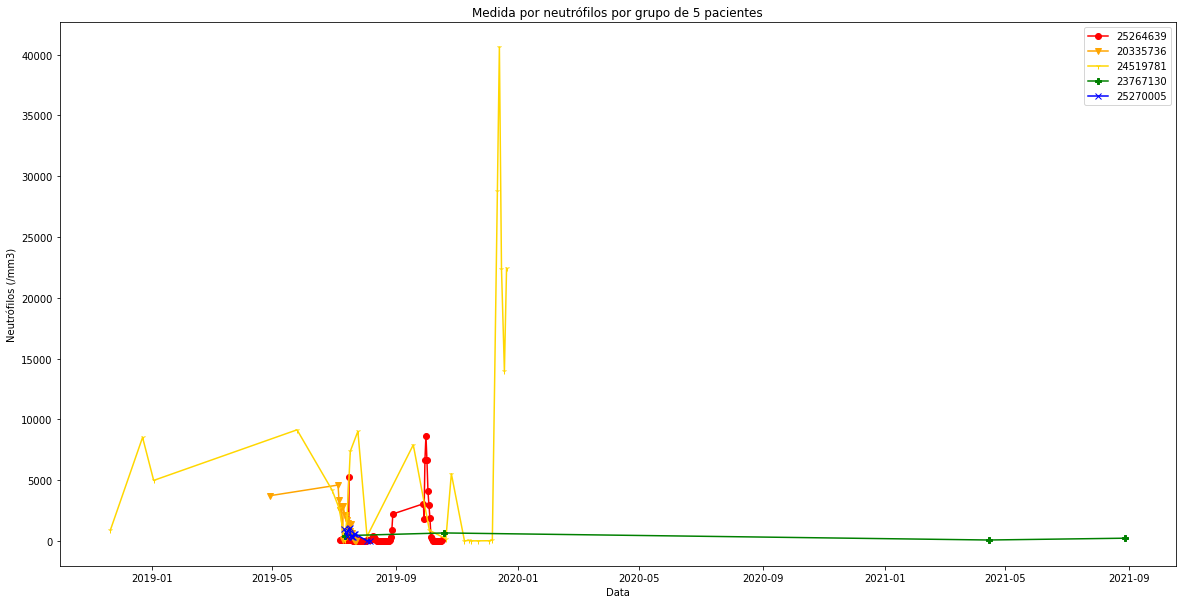




Medida para os pacientes: 21610025,25262978,25267263,25232017,25271912


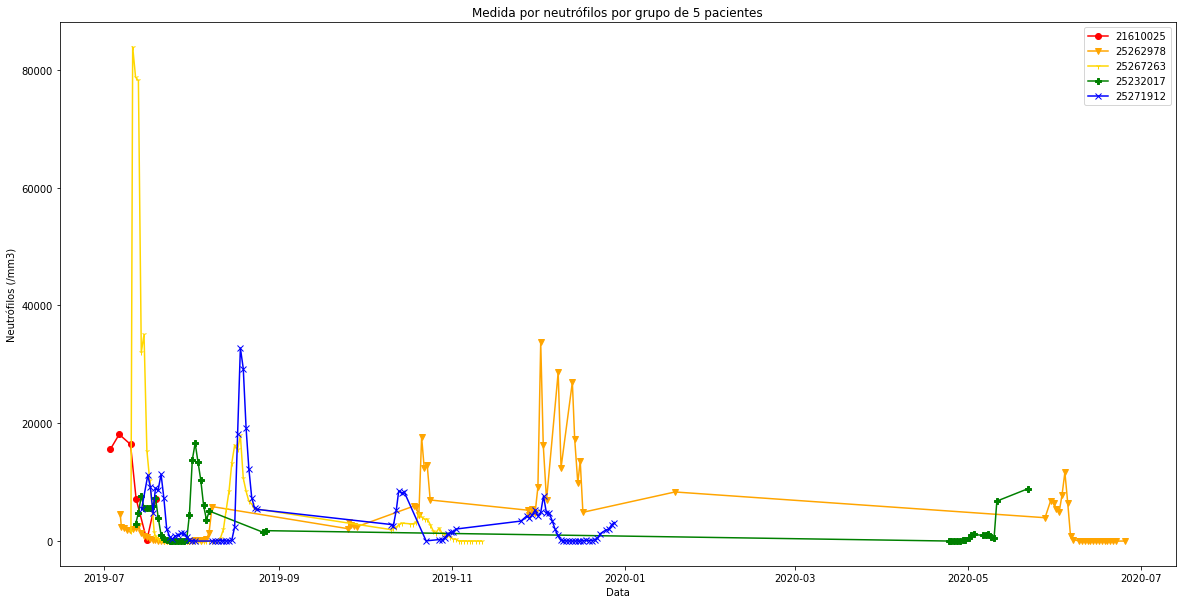




Medida para os pacientes: 25225796,24750289,25276836,25235961,25031537


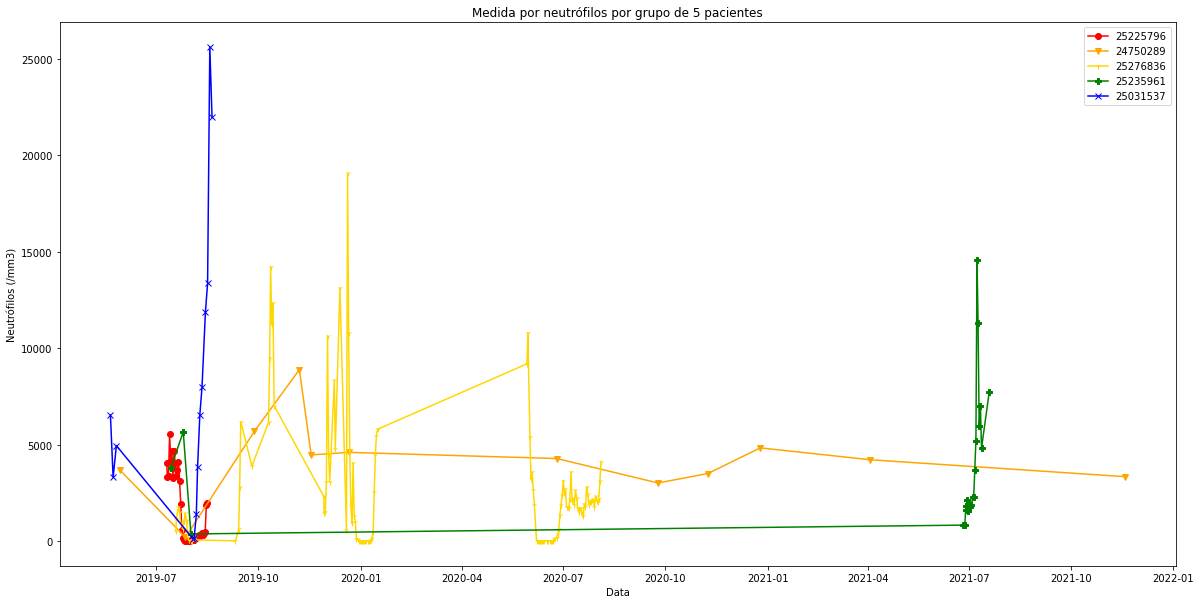




Medida para os pacientes: 24294972,25084071,25294092,25307168,15482513


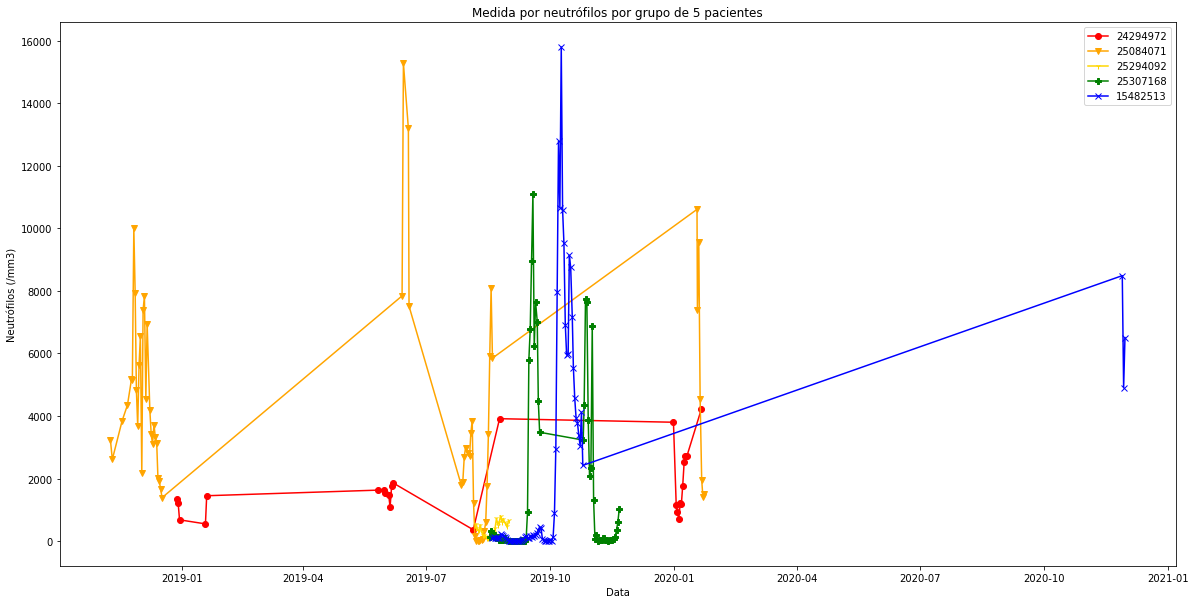




Medida para os pacientes: 25214785,25241544,22844749,25071535,25118426


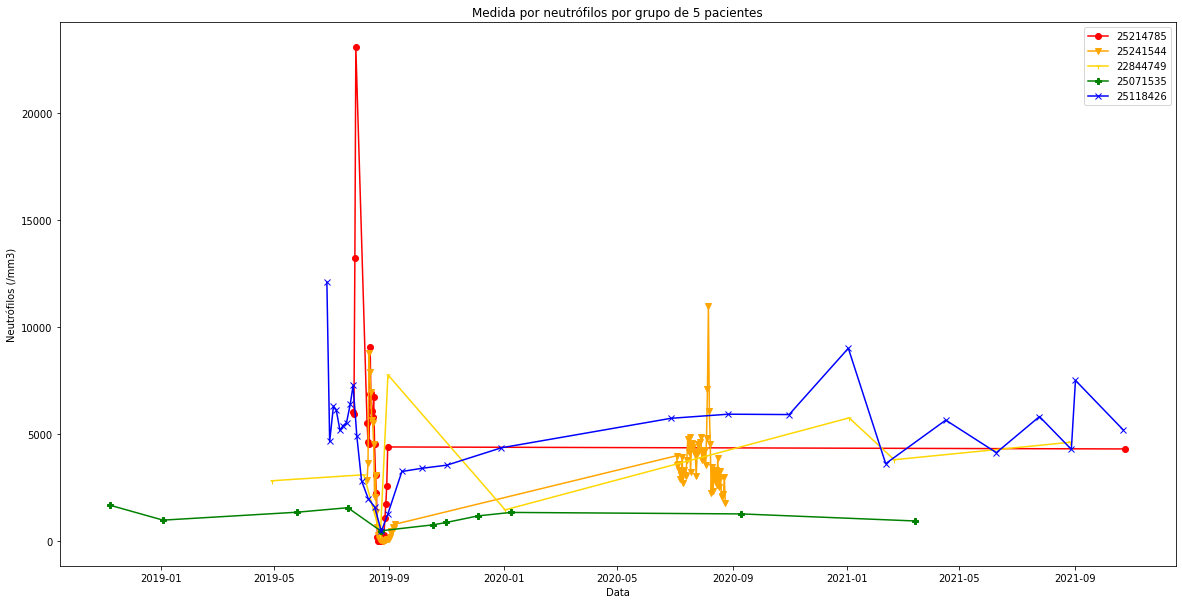




Medida para os pacientes: 25203994,25319683,25003968,25164511,15915807


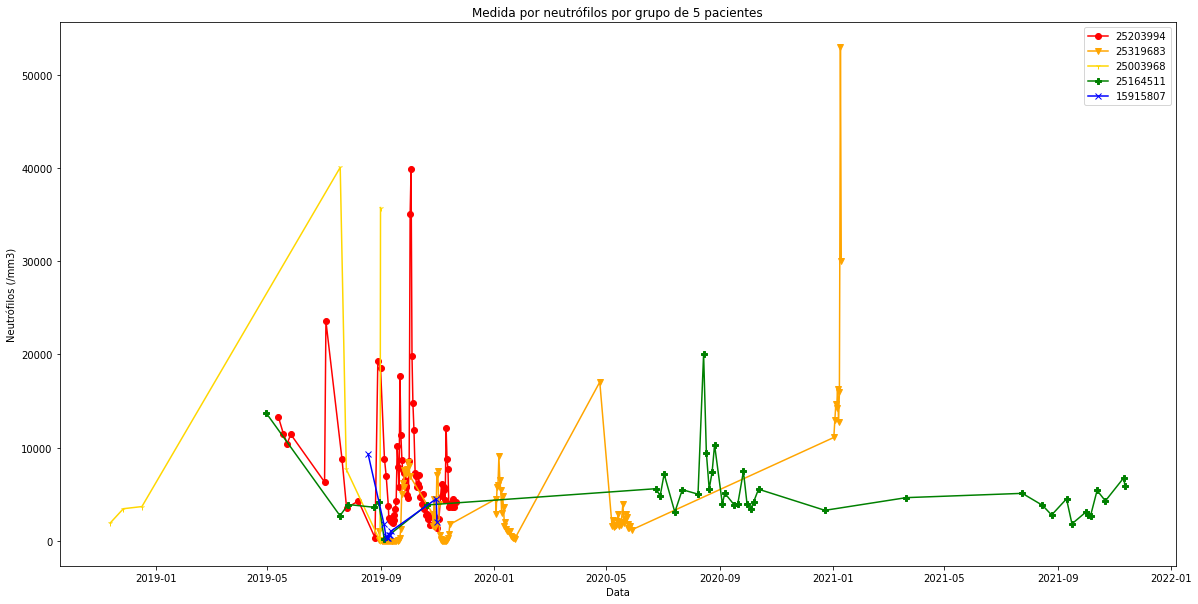




Medida para os pacientes: 24096540,25193632,25154207,25194935,18686583


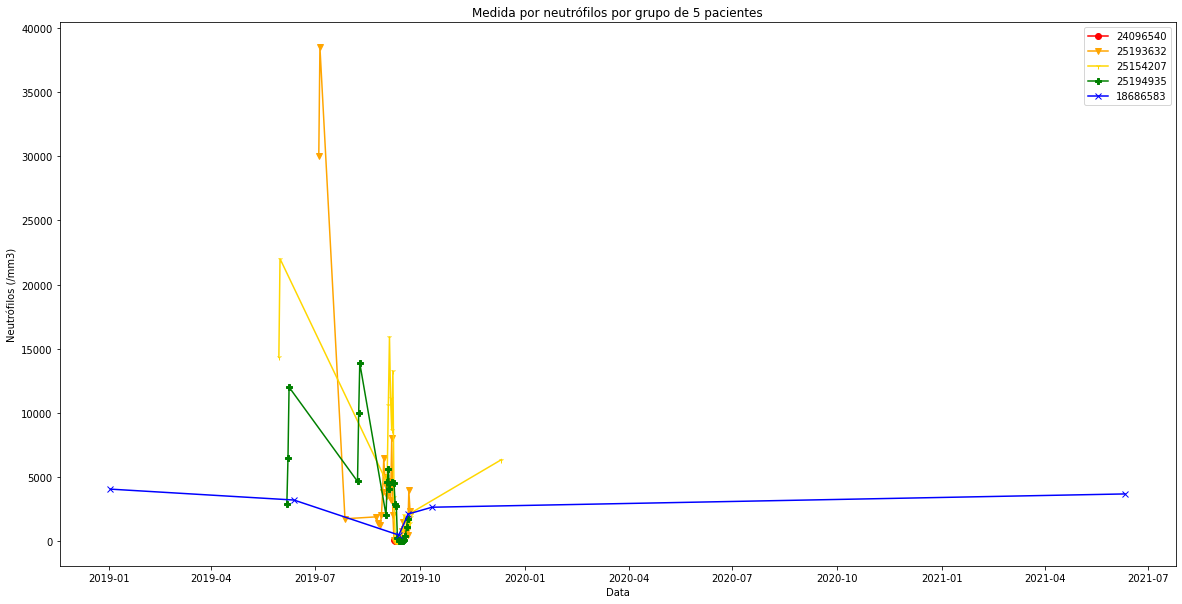




Medida para os pacientes: 14181668,23420911,21087869,25348983,15802309


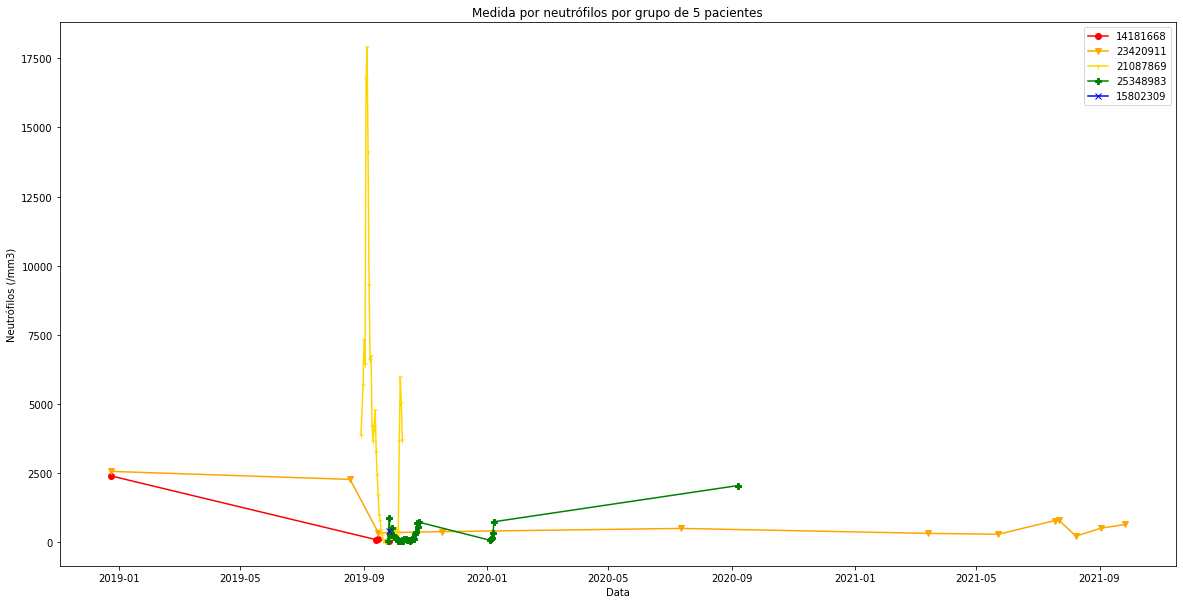




Medida para os pacientes: 25339043,25354482,25079594,25185503,22668048


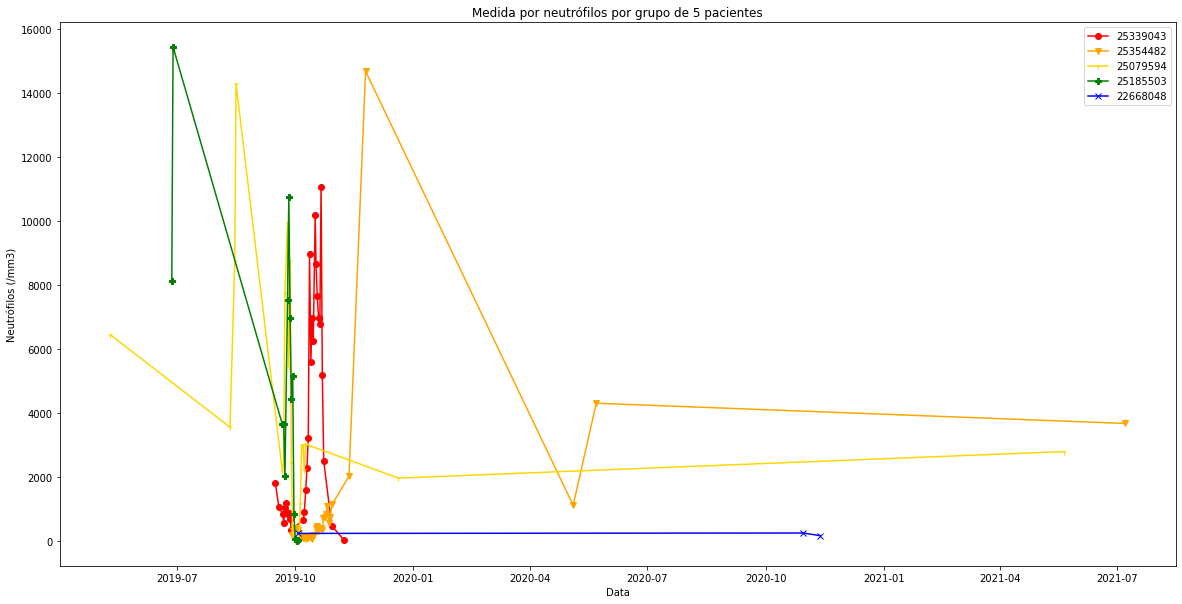




Medida para os pacientes: 25337563,21069310,14820789,24678613,25361461


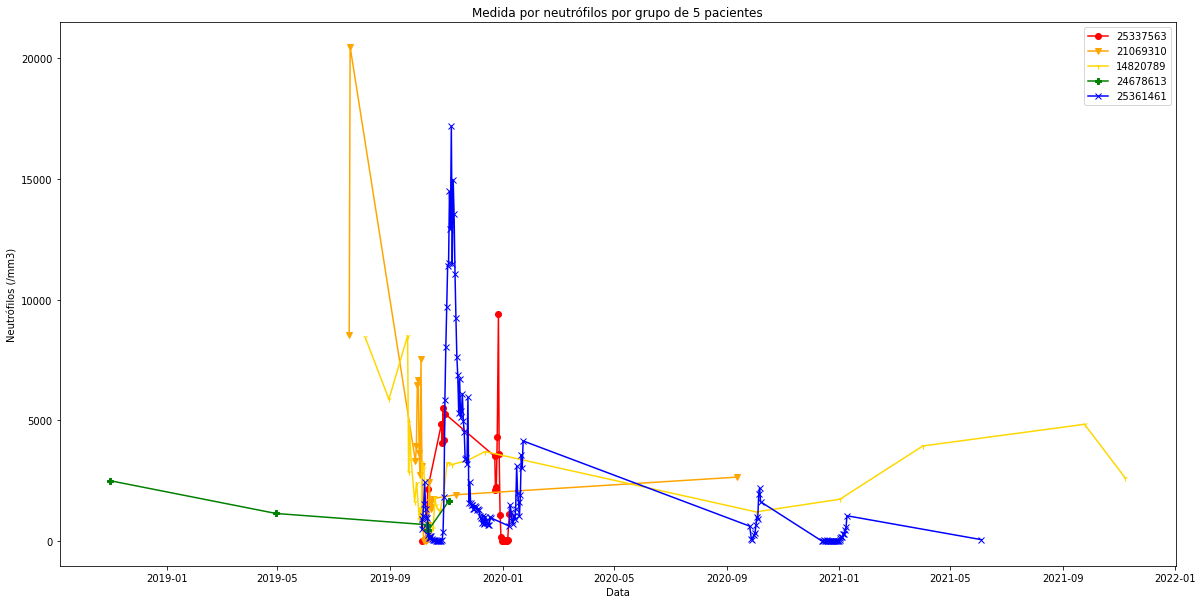




Medida para os pacientes: 18964458,25064984,25344410,19868537,25109832


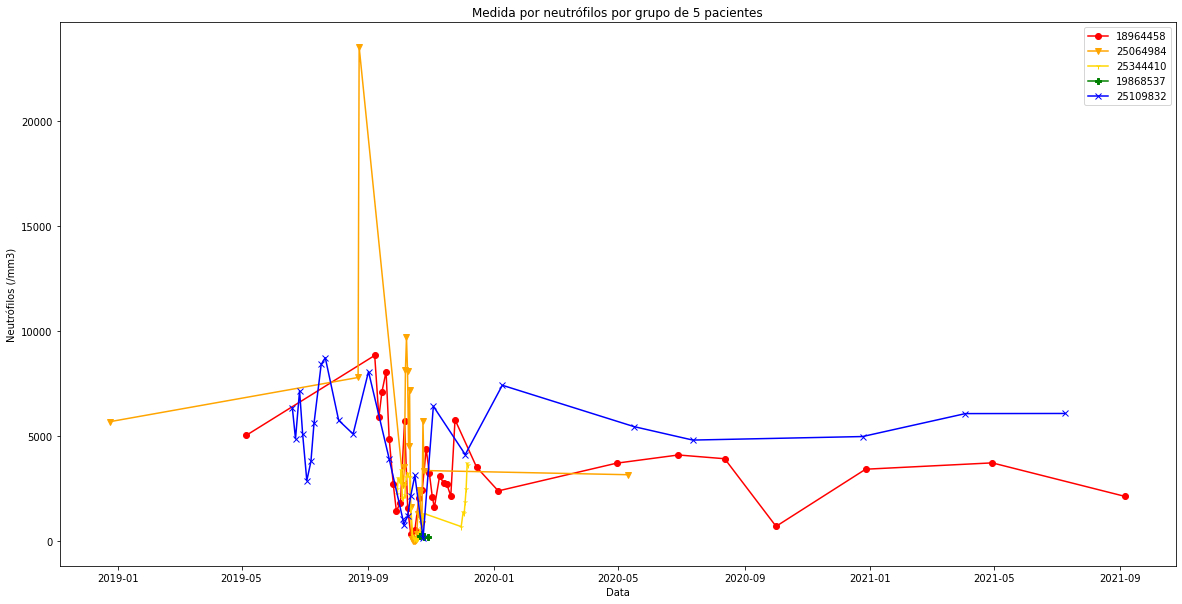




Medida para os pacientes: 25066788,24877176,24438676,24917172,25361449


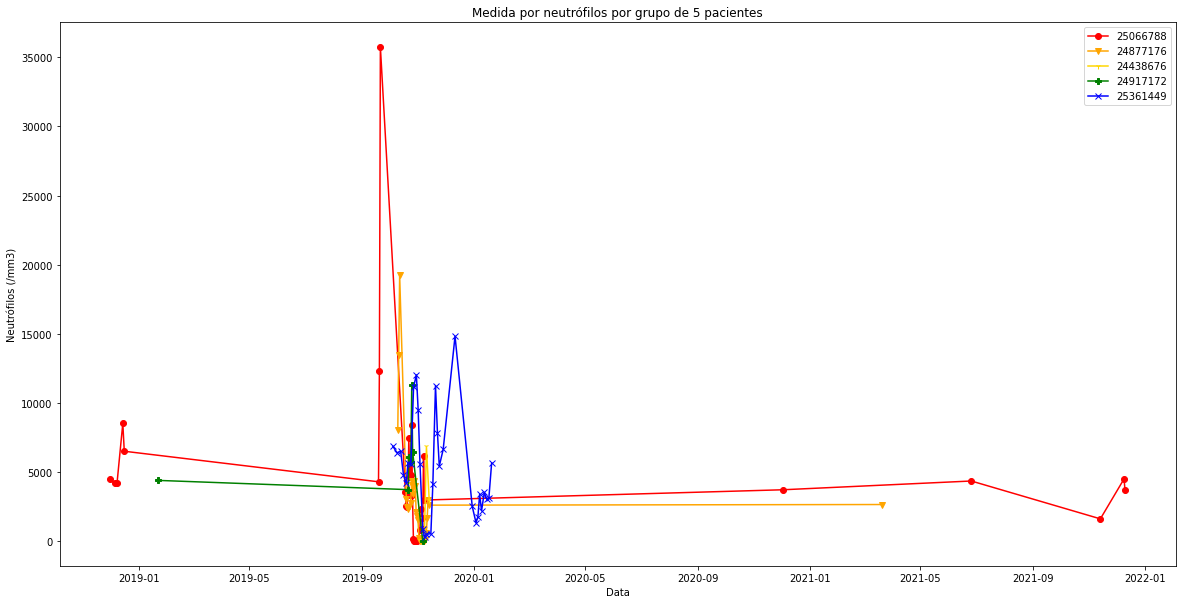




Medida para os pacientes: 25384398,25136593,24745387,24725244,25305651


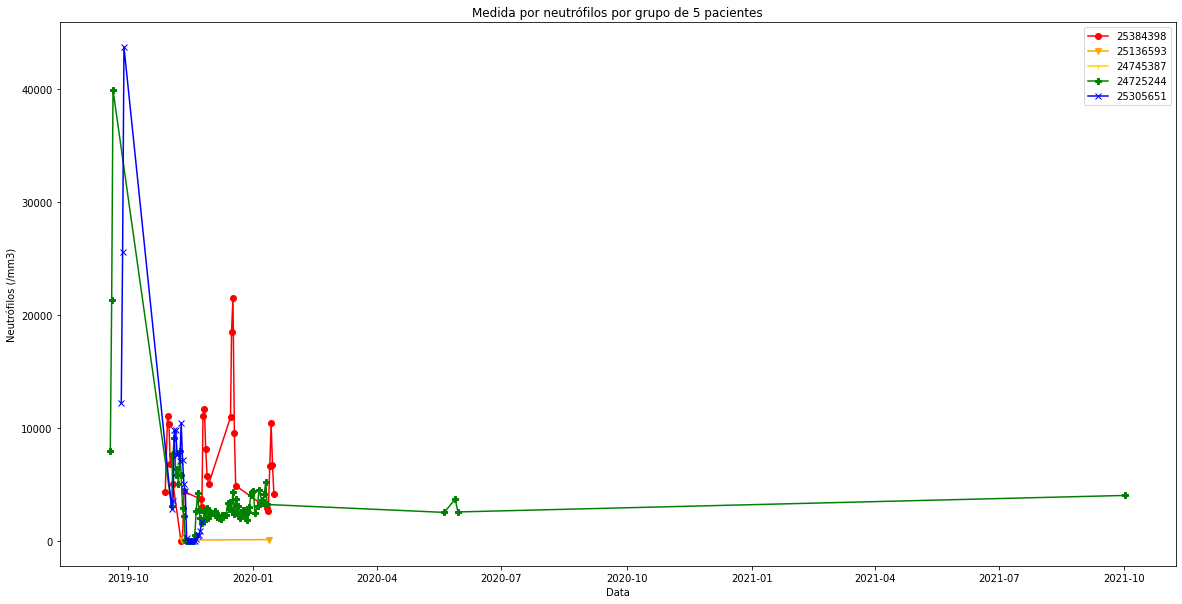




Medida para os pacientes: 24758029,25407115,22337782,24893974,23908103


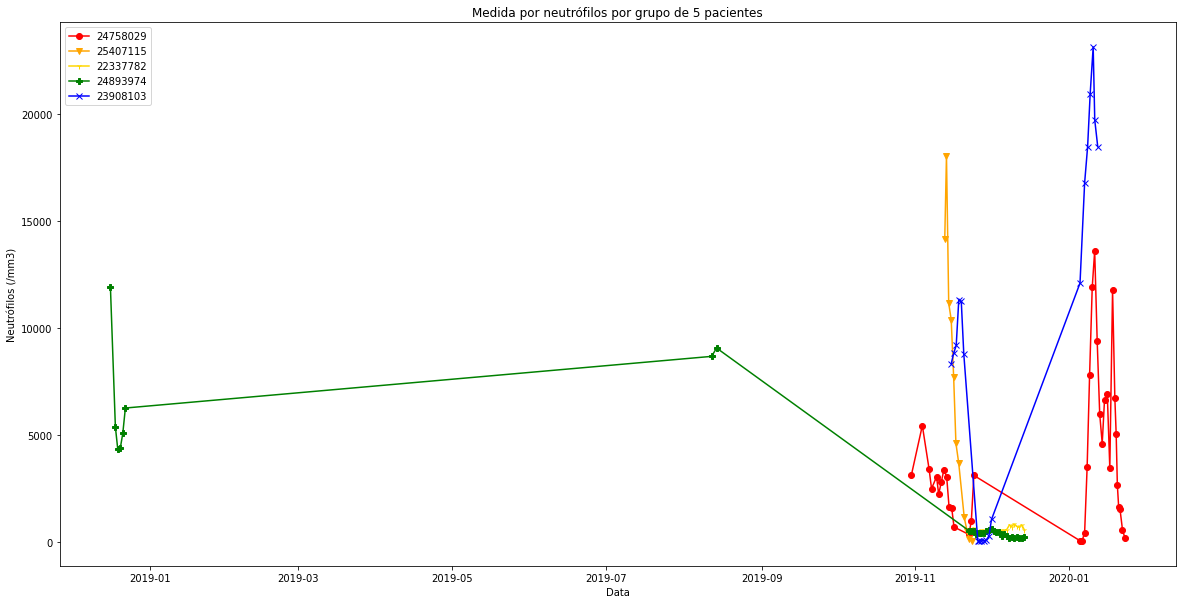




Medida para os pacientes: 25322843,25359055,25012139,25341954,25351048


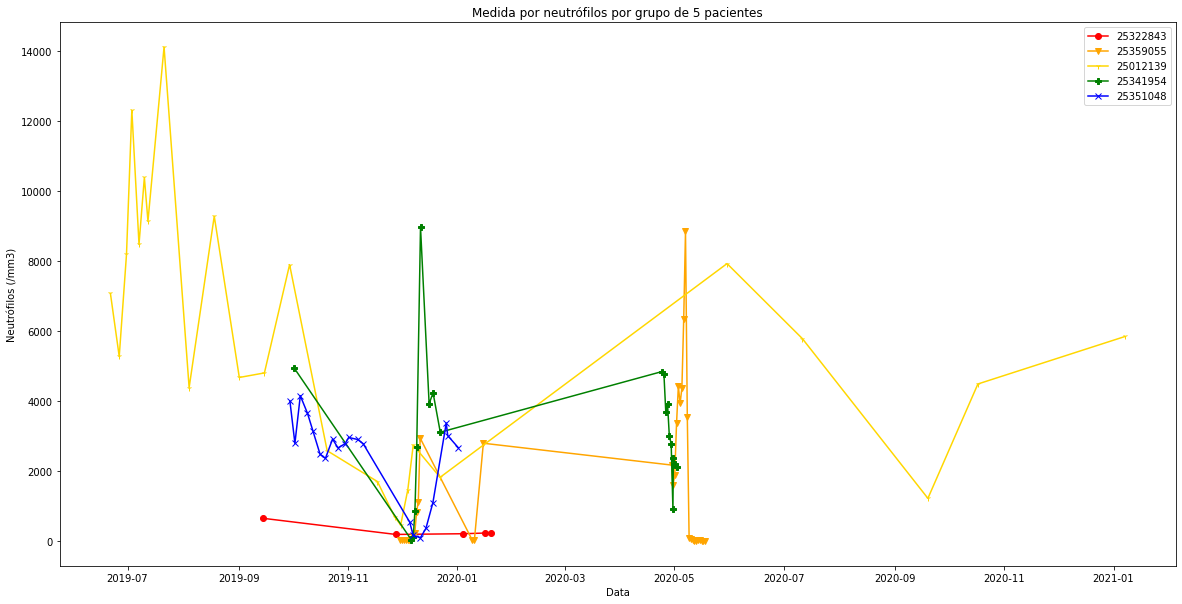




Medida para os pacientes: 25298509,25409531,25432595,25400709,25152286


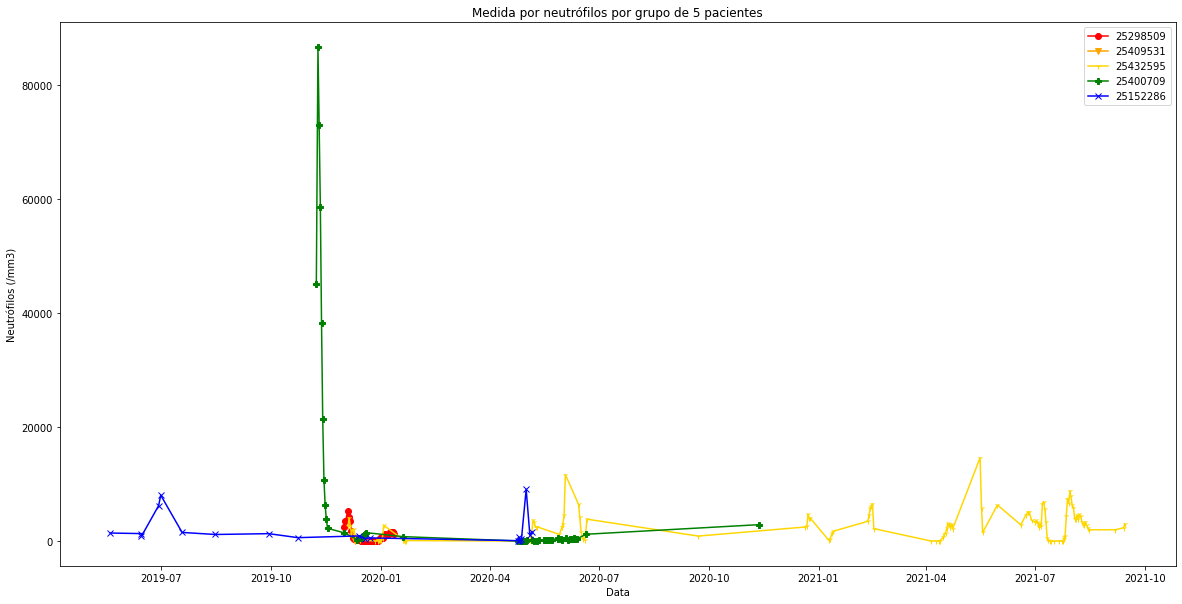




Medida para os pacientes: 23049193,25111335,25258226,25458180,25454660


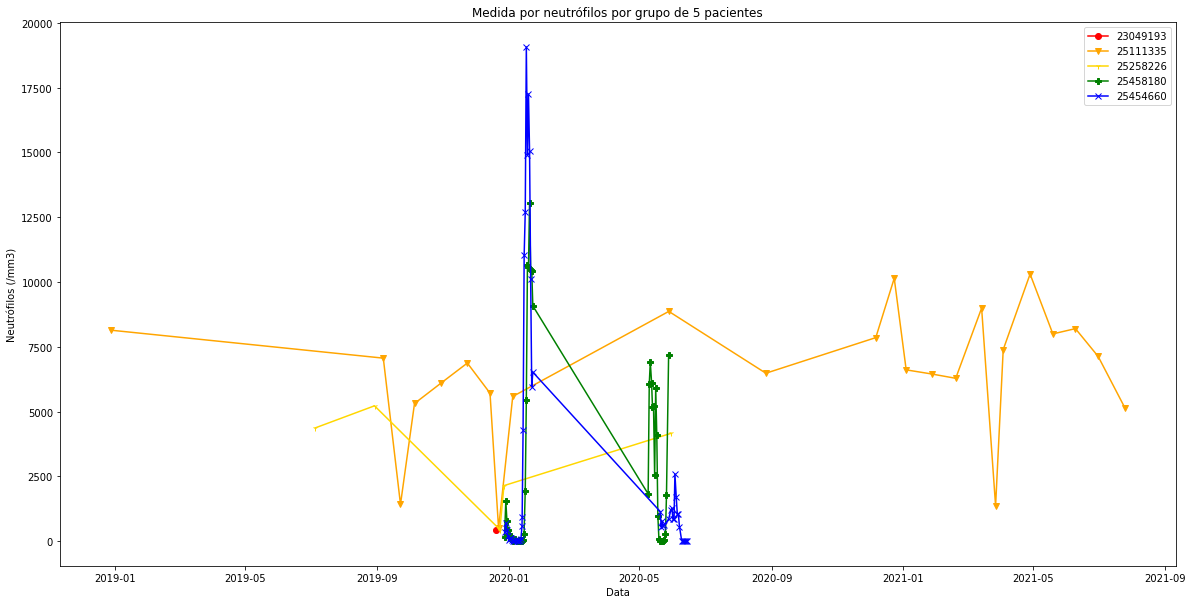




Medida para os pacientes: 25413064,25166113,25211979,25041214,24962306


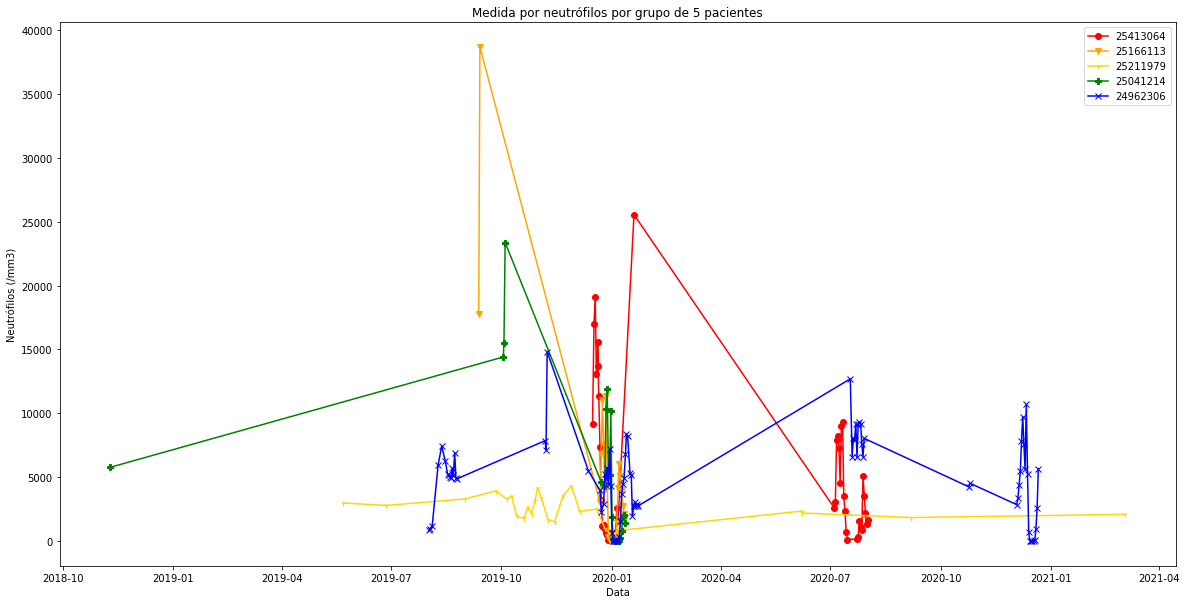




Medida para os pacientes: 25448498,25377434,23863711,25432856,25472547


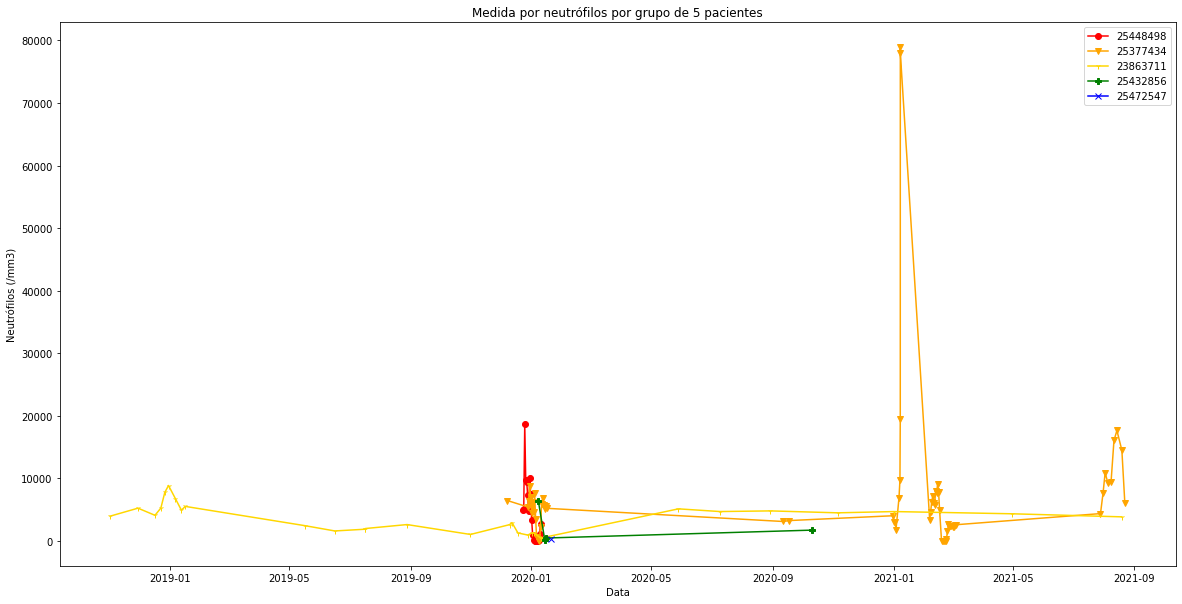




Medida para os pacientes: 25385220,24031012,20215202,25516537,25218645


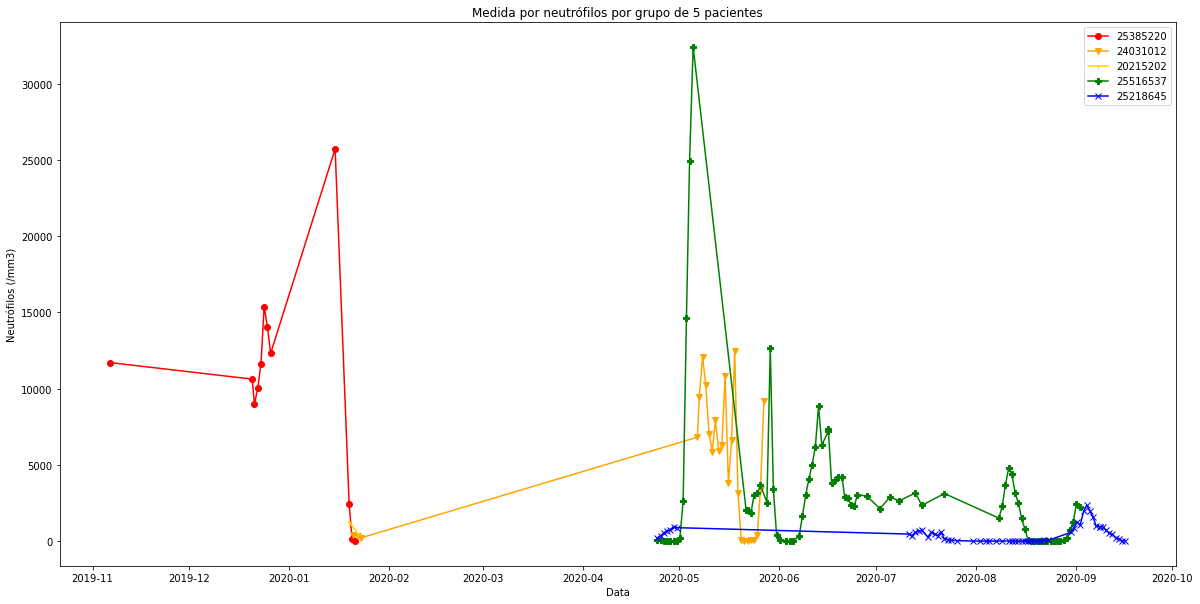




Medida para os pacientes: 25190668,22714065,22160995,25372797,25517694


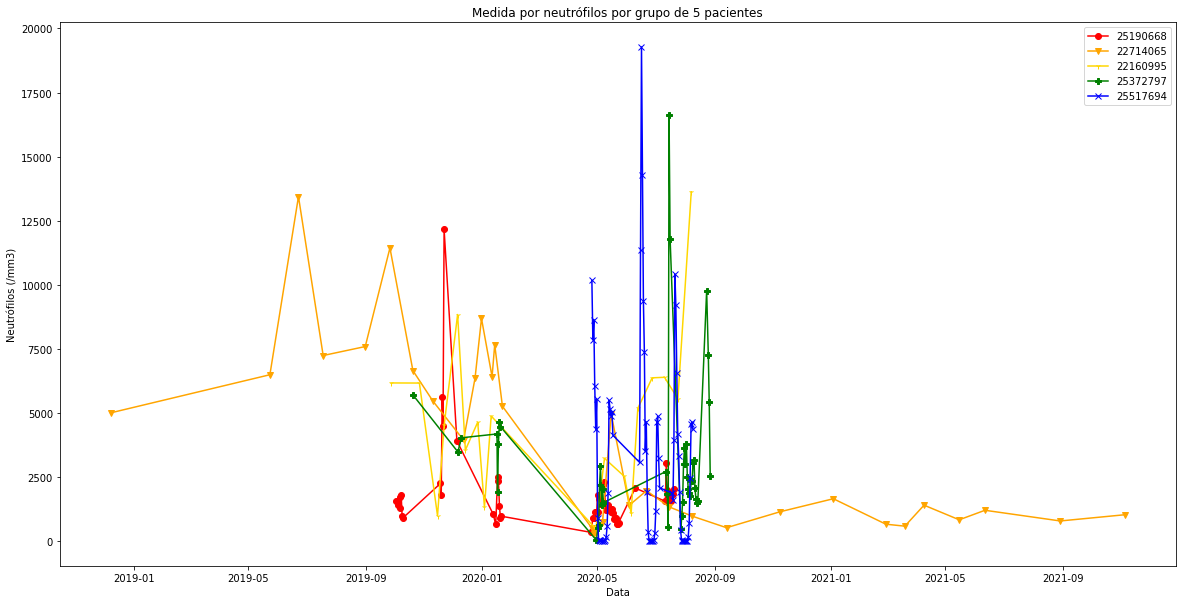




Medida para os pacientes: 25563344,25519776,25570997,25118156,25383196


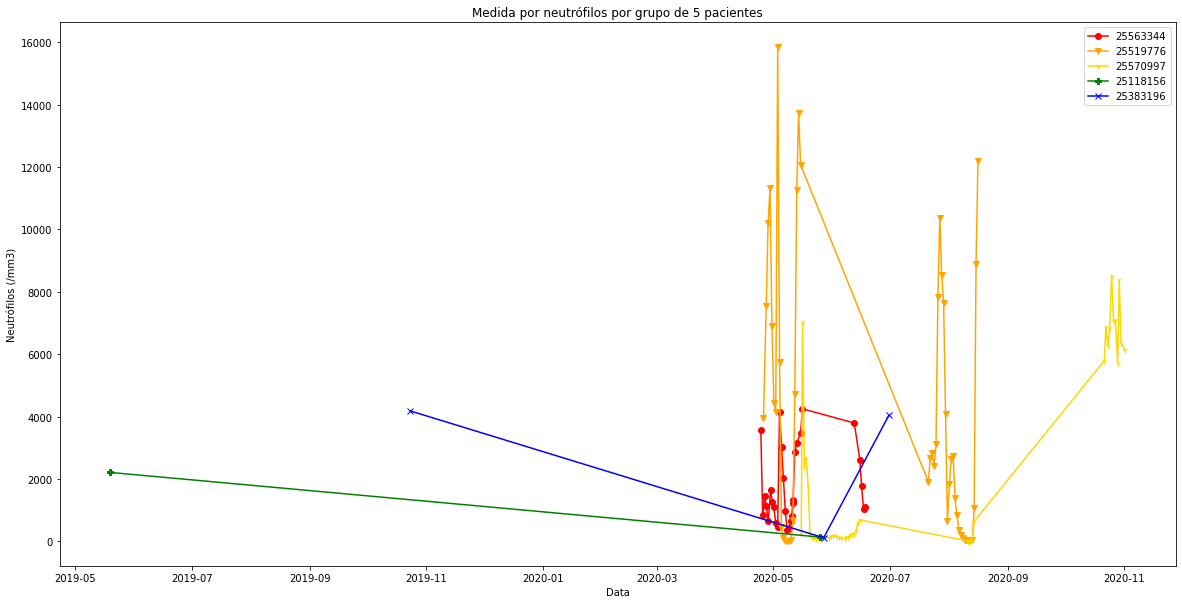




Medida para os pacientes: 21653240,24379712,24674600,18858927,22798183


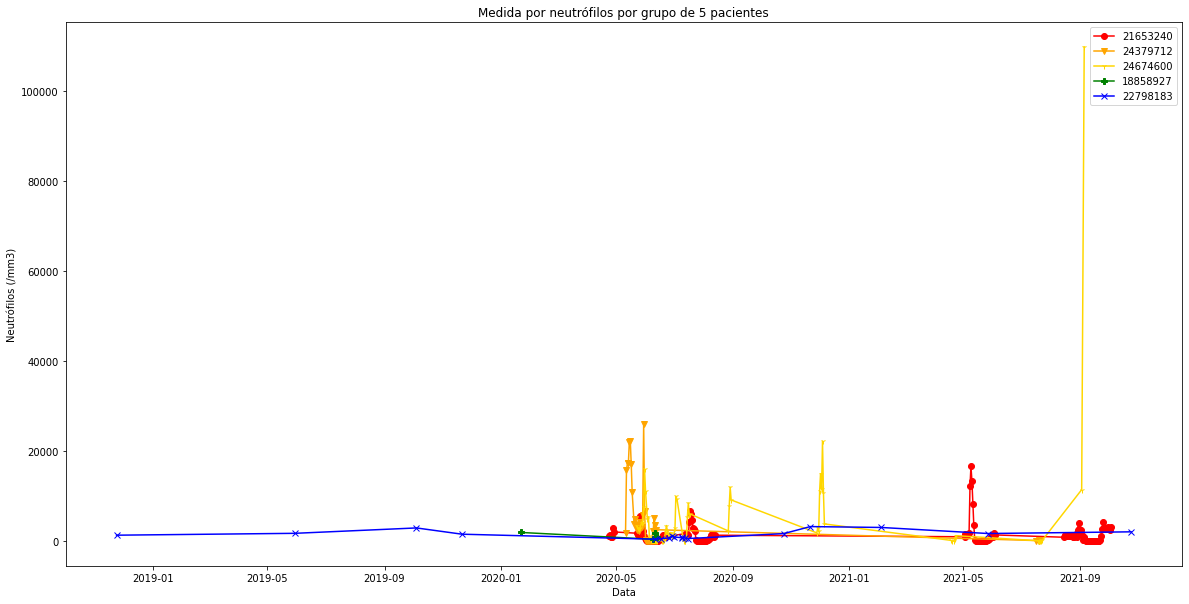




Medida para os pacientes: 22575970,25485069,21708908,20709578,25417005


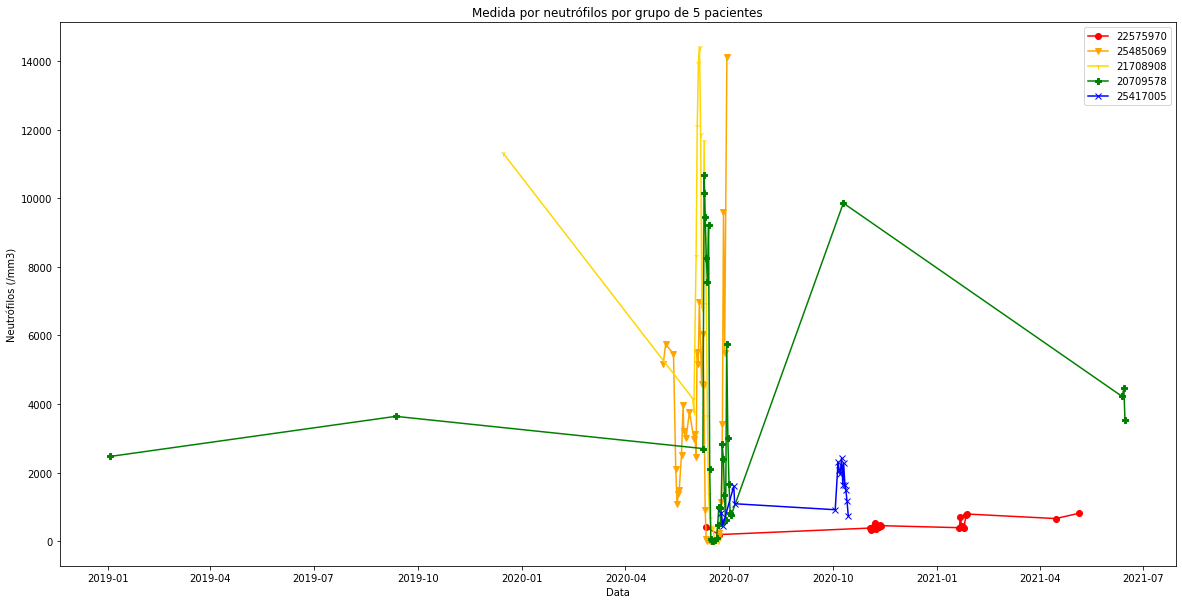




Medida para os pacientes: 18558660,24462361,24477497,25459447,23863386


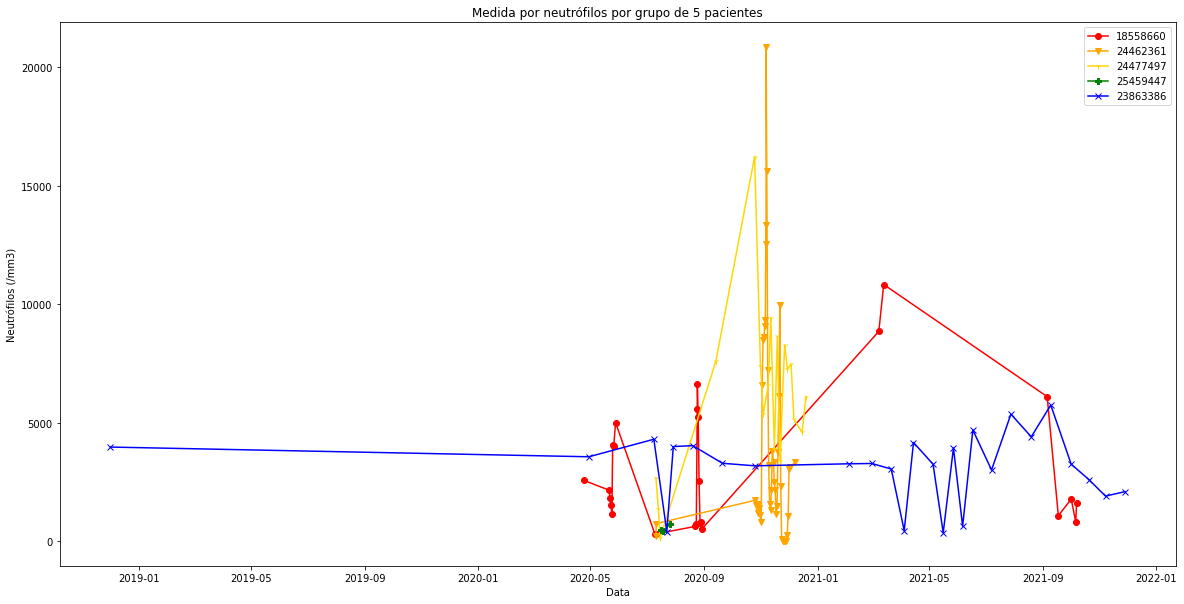




Medida para os pacientes: 20215275,18521292,25605620,20115645,25561824


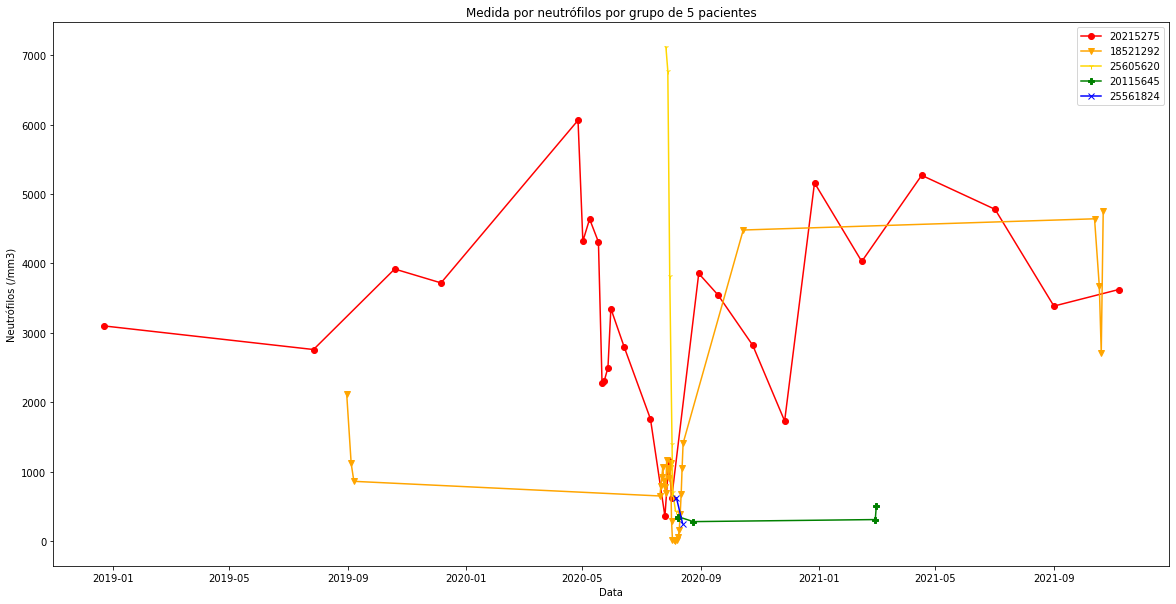




Medida para os pacientes: 25575918,19544620,17444123,21978604,16586108


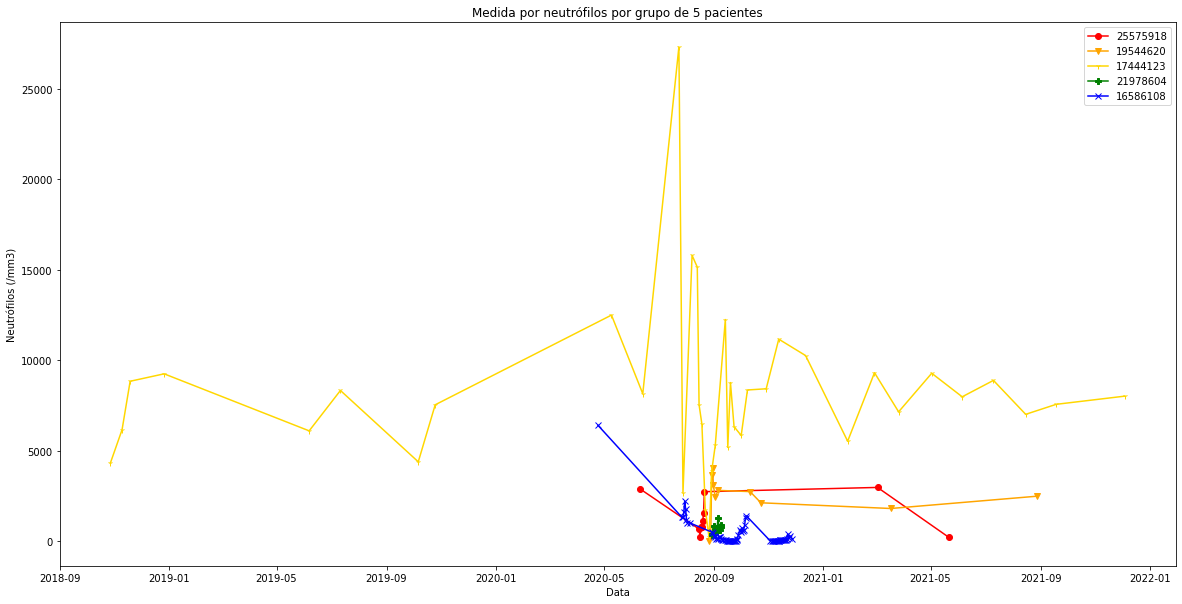




Medida para os pacientes: 24823670,23265158,25532080,25590320,25344604


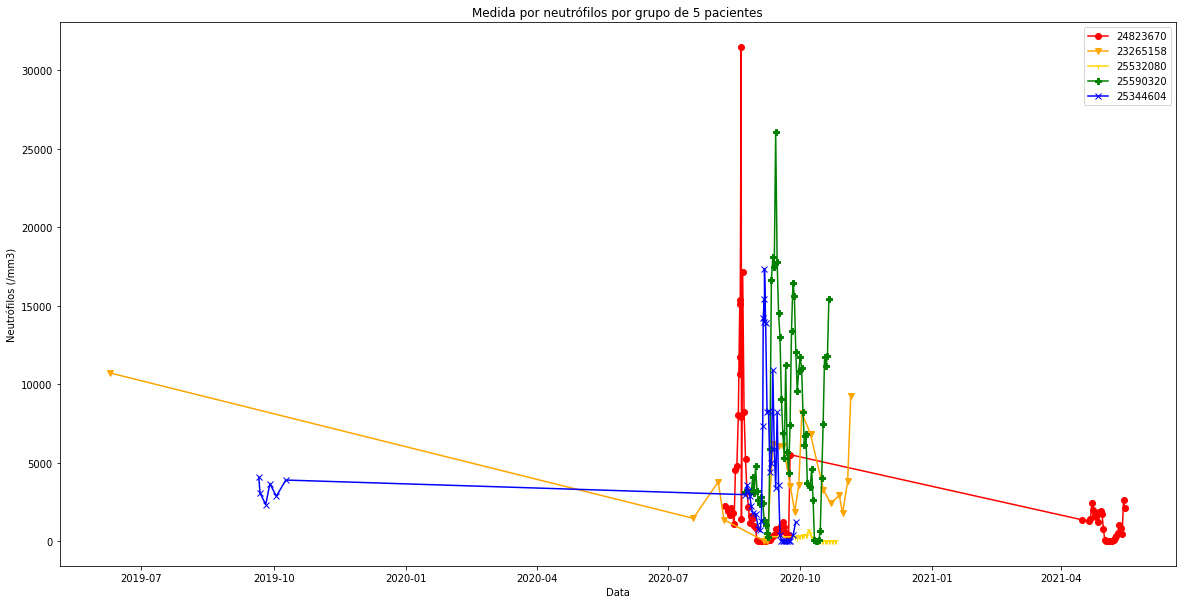




Medida para os pacientes: 25311492,25638847,25636452,25616892,25183610


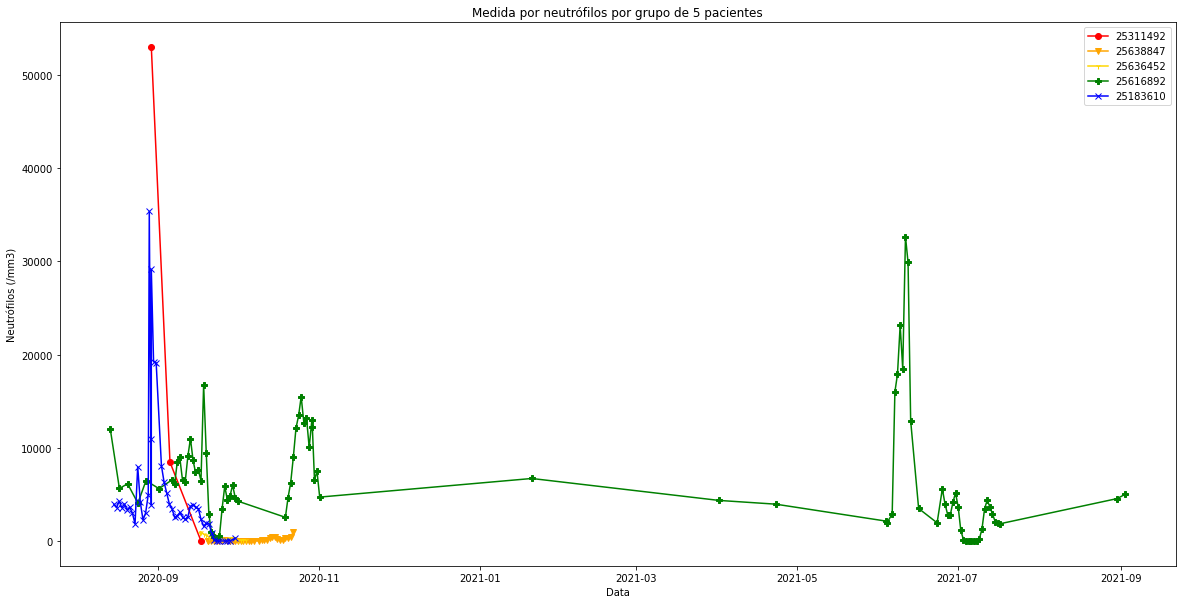




Medida para os pacientes: 23195375,25208714,18170857,19505196,25644942


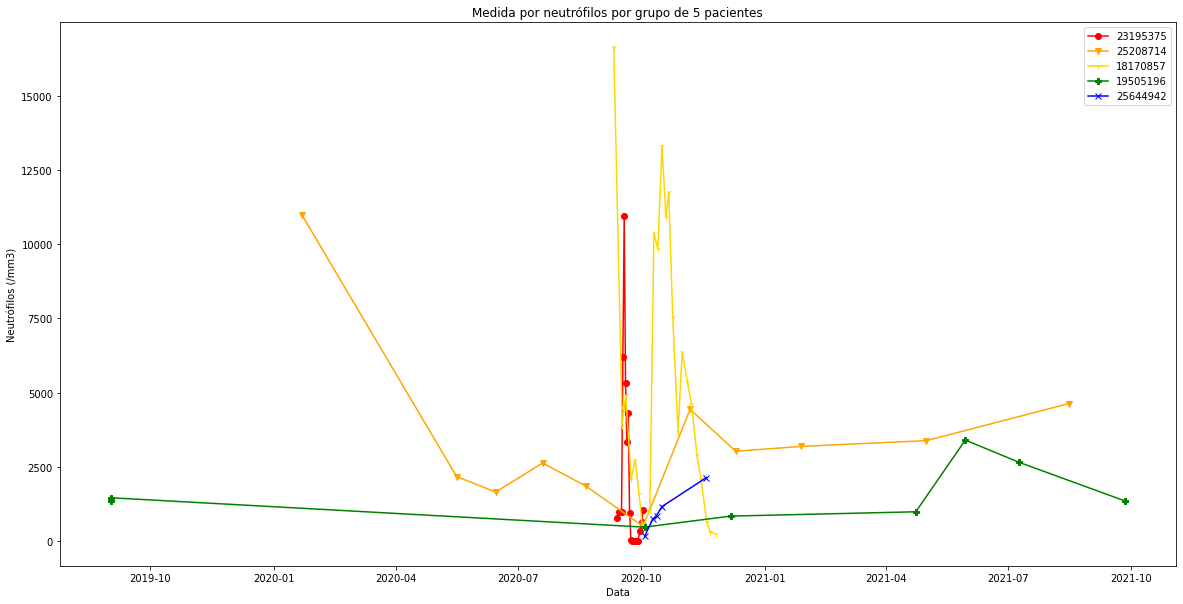




Medida para os pacientes: 20149978,25645960,23269922,25012529,25090120


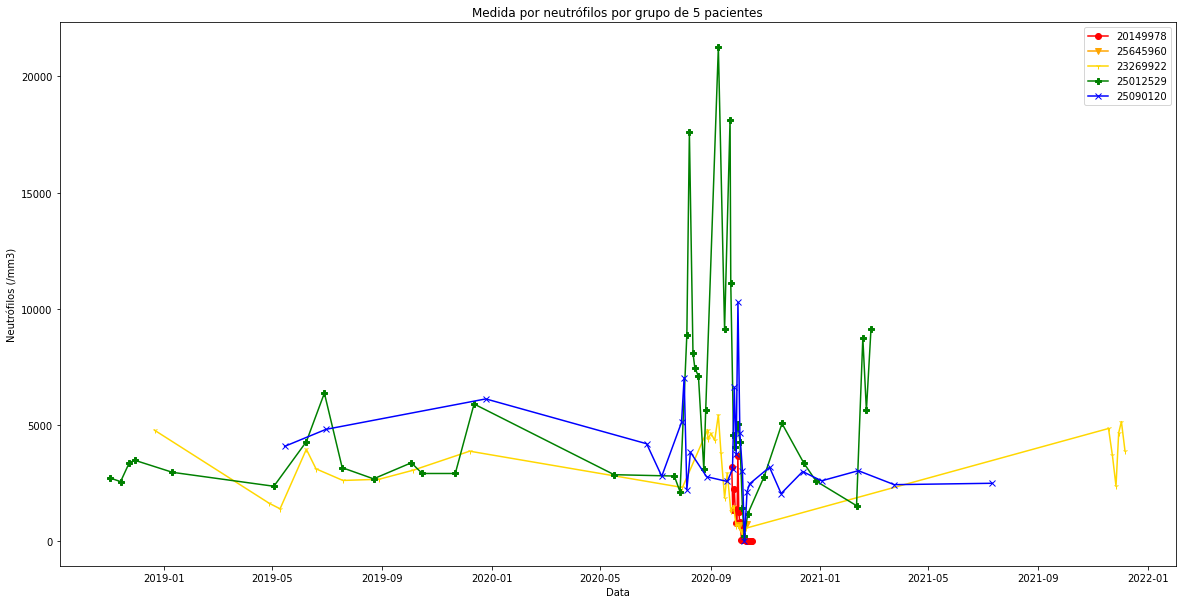




Medida para os pacientes: 23226540,25630052,25493912,25561269,25561281


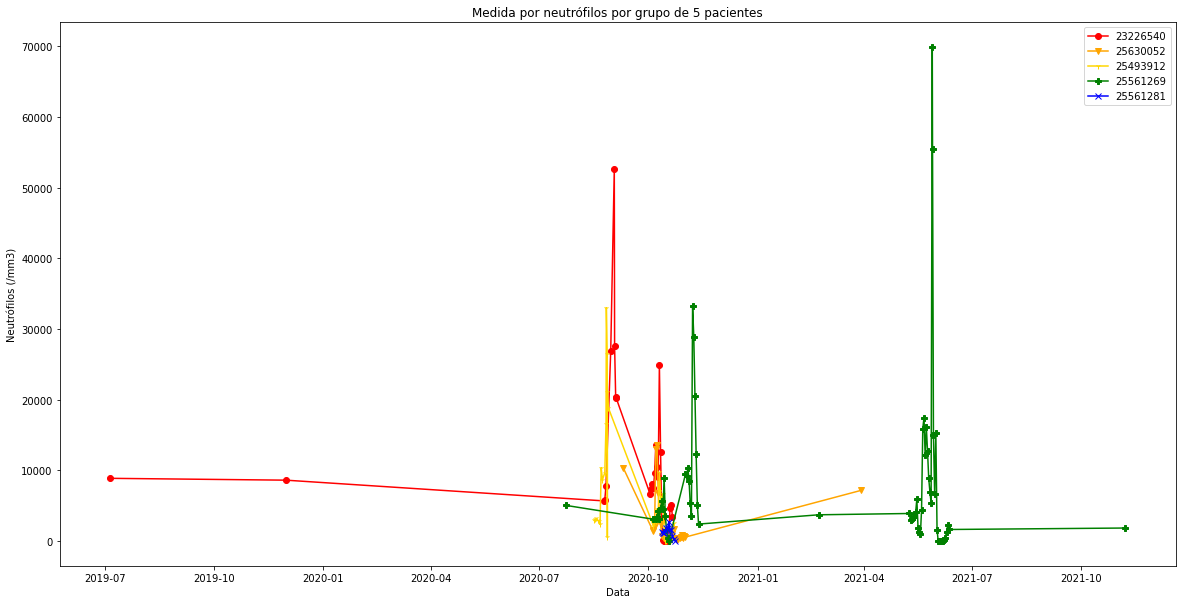




Medida para os pacientes: 25366332,25018060,25269030,25630185,22408600


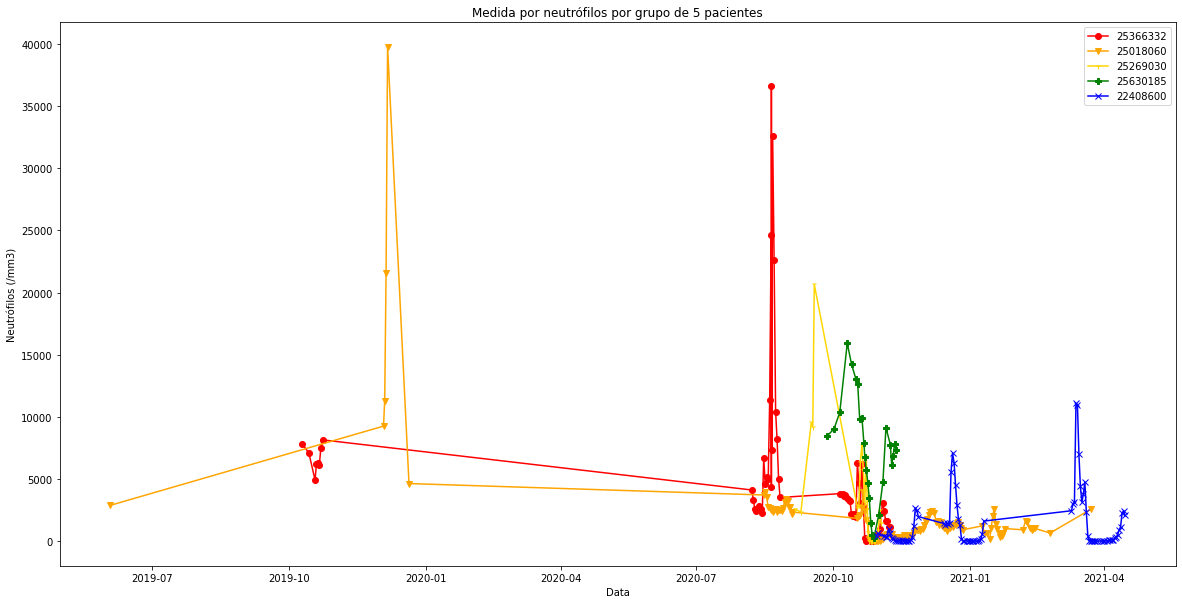




Medida para os pacientes: 23063111,25354403,25458661,23558237,25599719


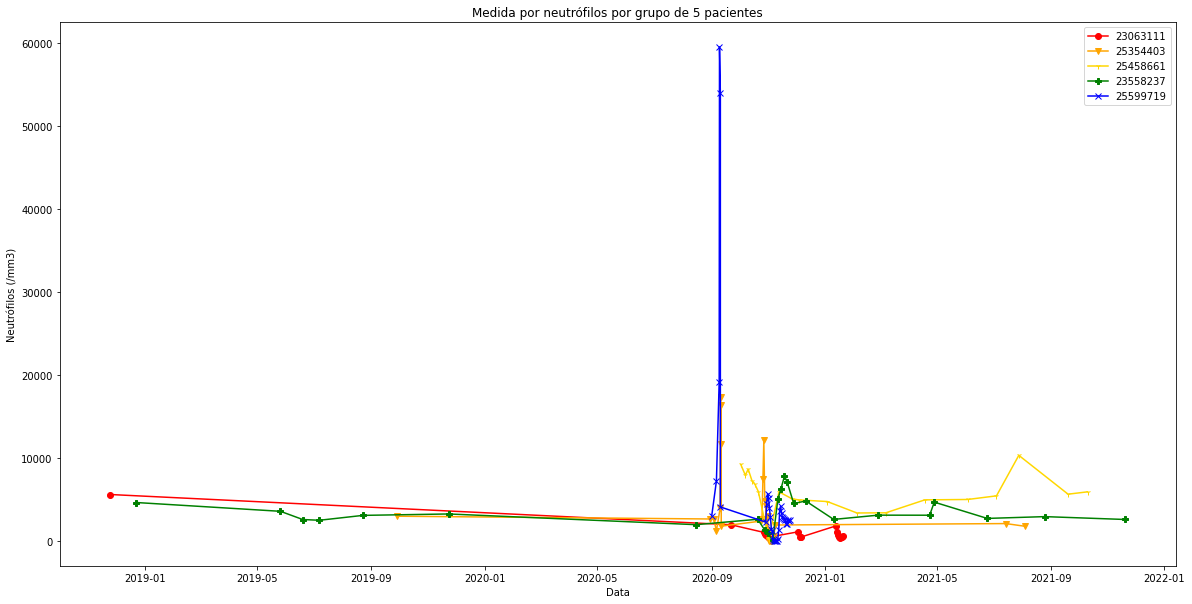




Medida para os pacientes: 23376632,15953904,25376413,25624925,25673955


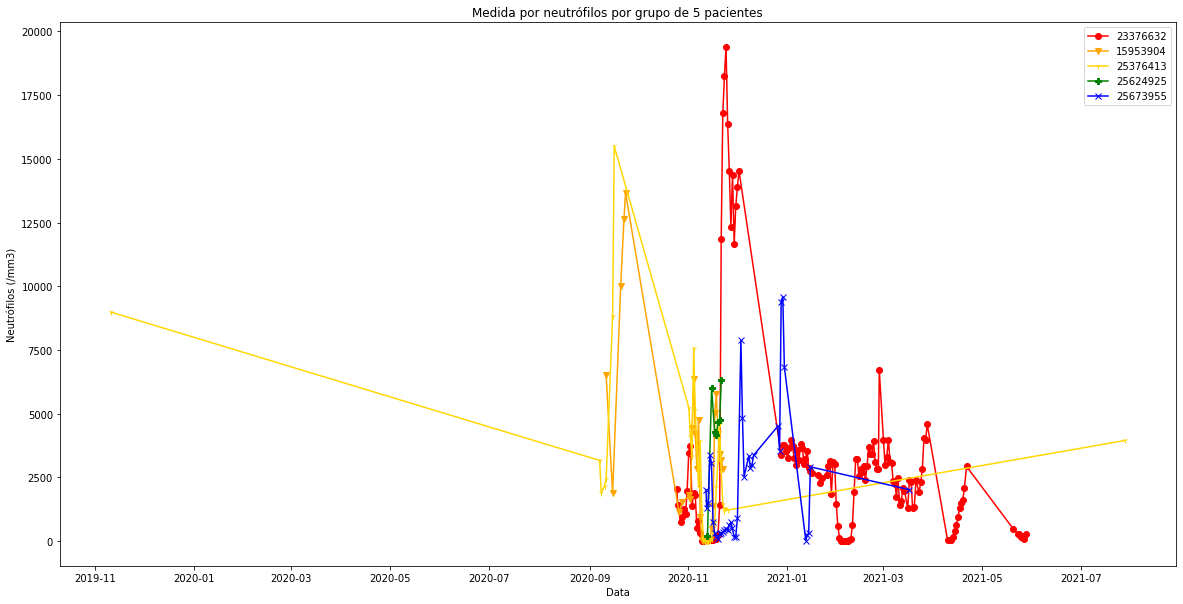




Medida para os pacientes: 25290700,18373843,25673266,25318835,25660723


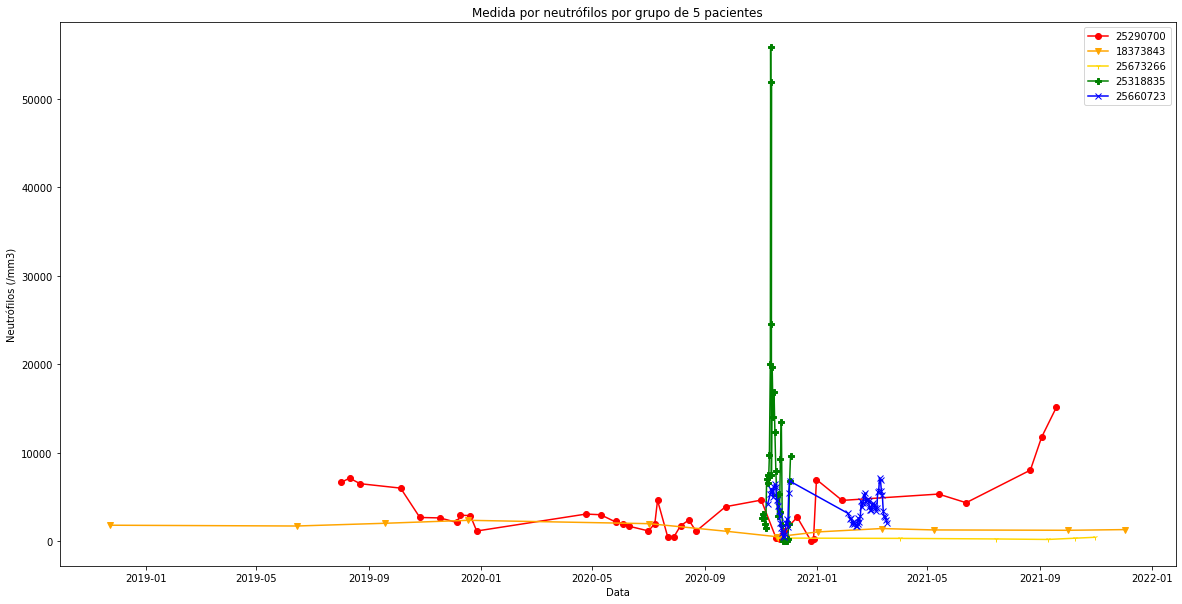




Medida para os pacientes: 20974586,20226991,25598725,24935760,25413589


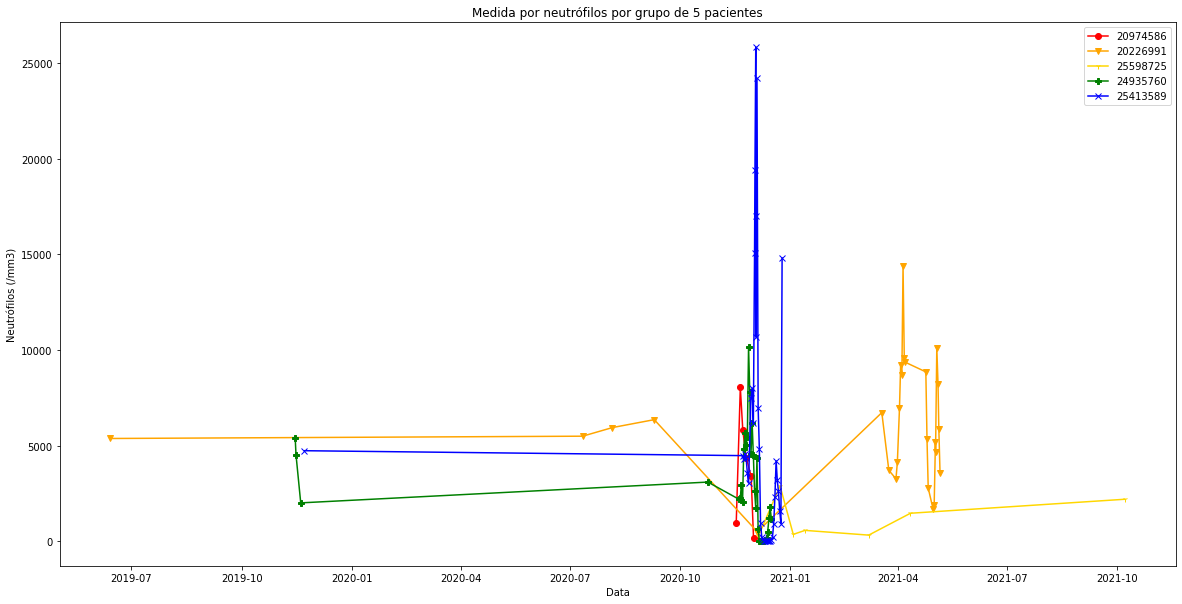




Medida para os pacientes: 25205798,25567220,25628254,25565808,25026645


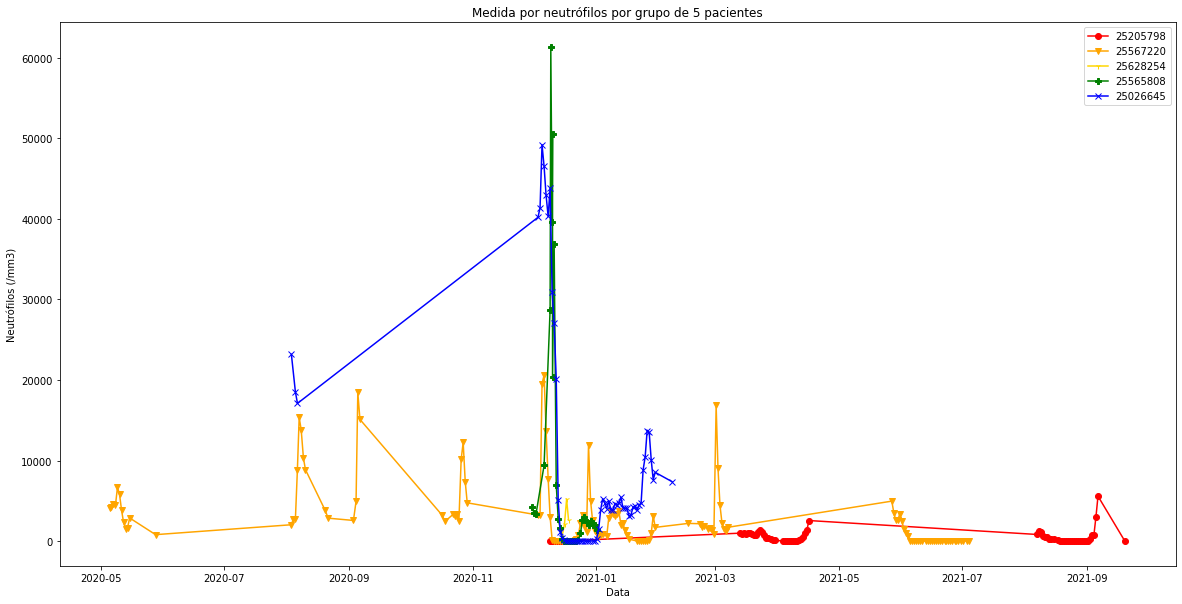




Medida para os pacientes: 25336193,21038295,25608035,25704519,25661125


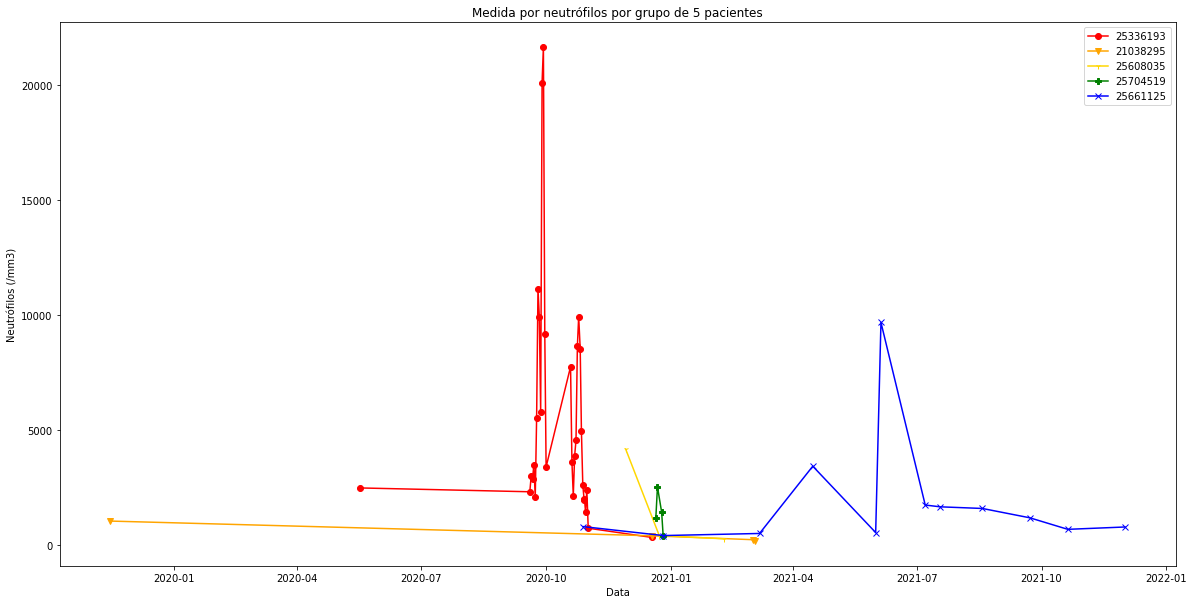




Medida para os pacientes: 25636904,25712203,25708286,25713573,25559711


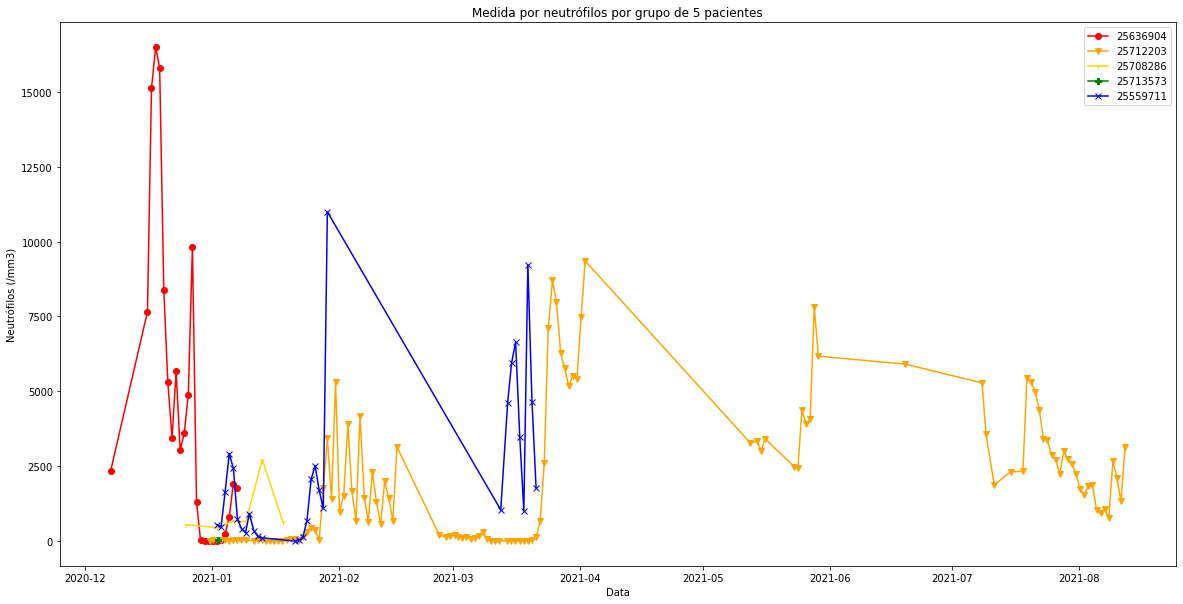




Medida para os pacientes: 25320323,25718257,25722210,25720485,25579004


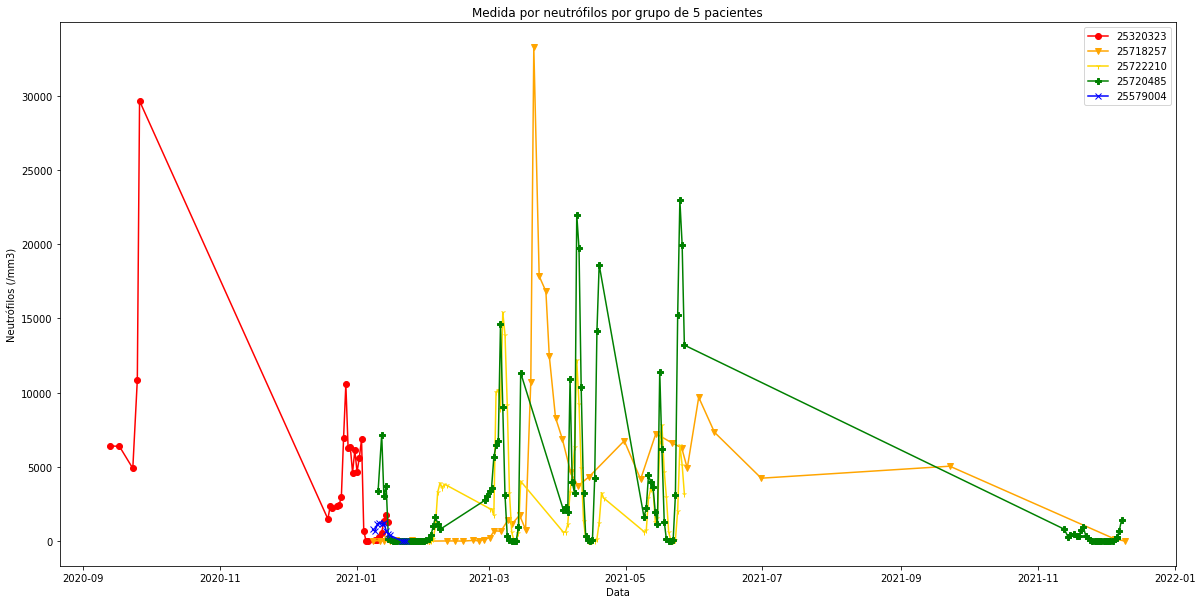




Medida para os pacientes: 21679974,25718489,20679961,25719037,25729201


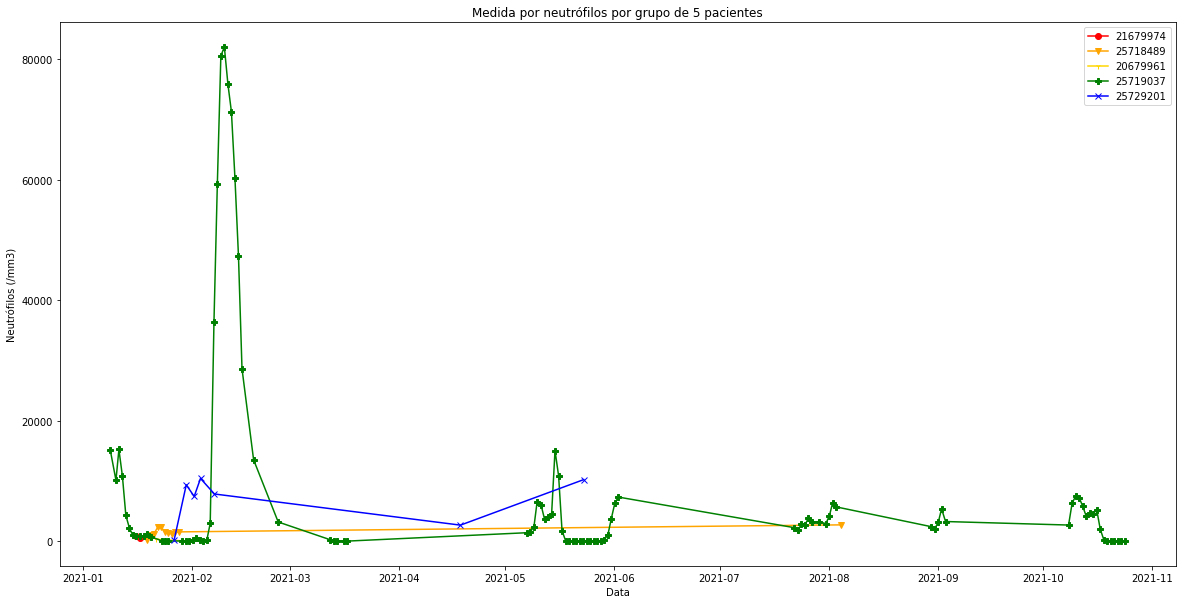




Medida para os pacientes: 25733898,25563798,25469428,19656007,25392040


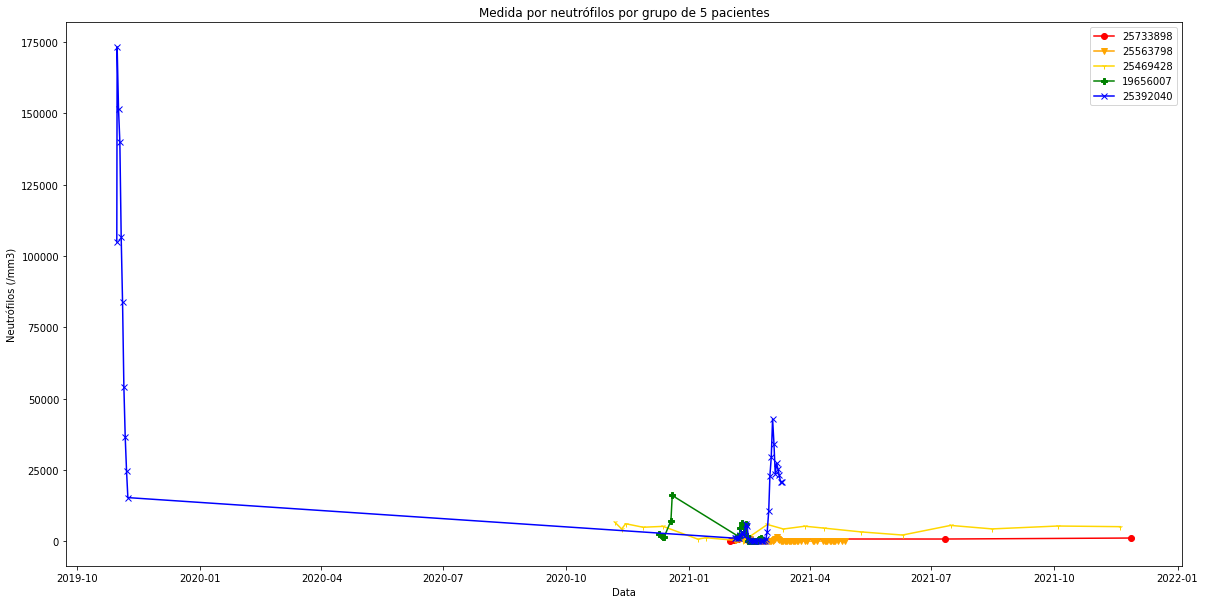




Medida para os pacientes: 25179041,23674811,25746998,25637848,25058200


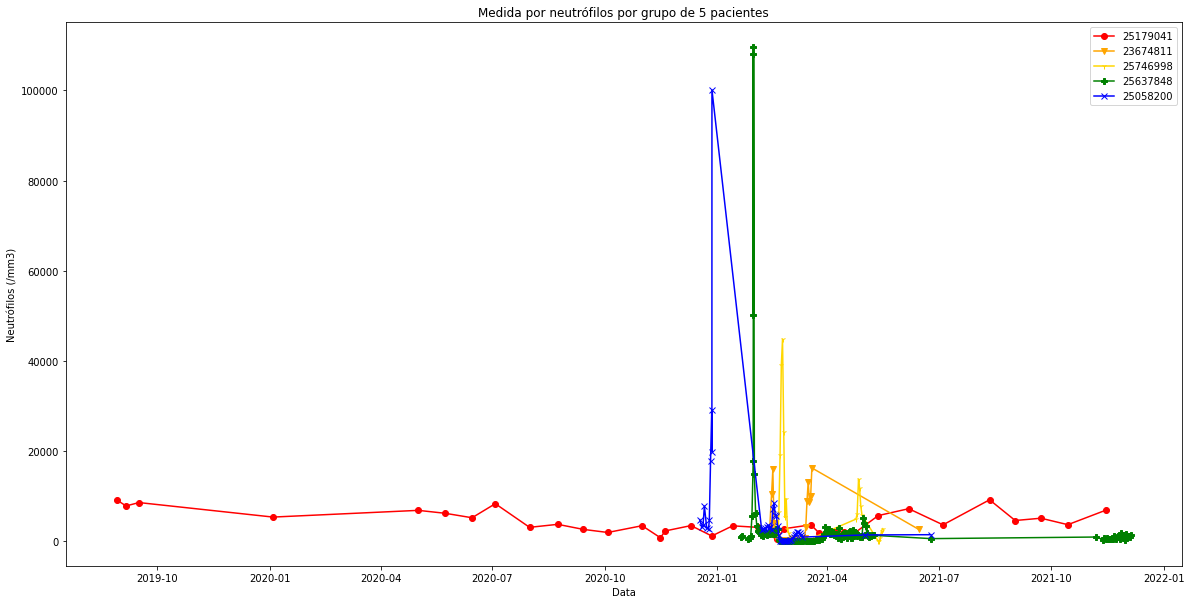




Medida para os pacientes: 25570904,24942646,25557462,25542170,25528987


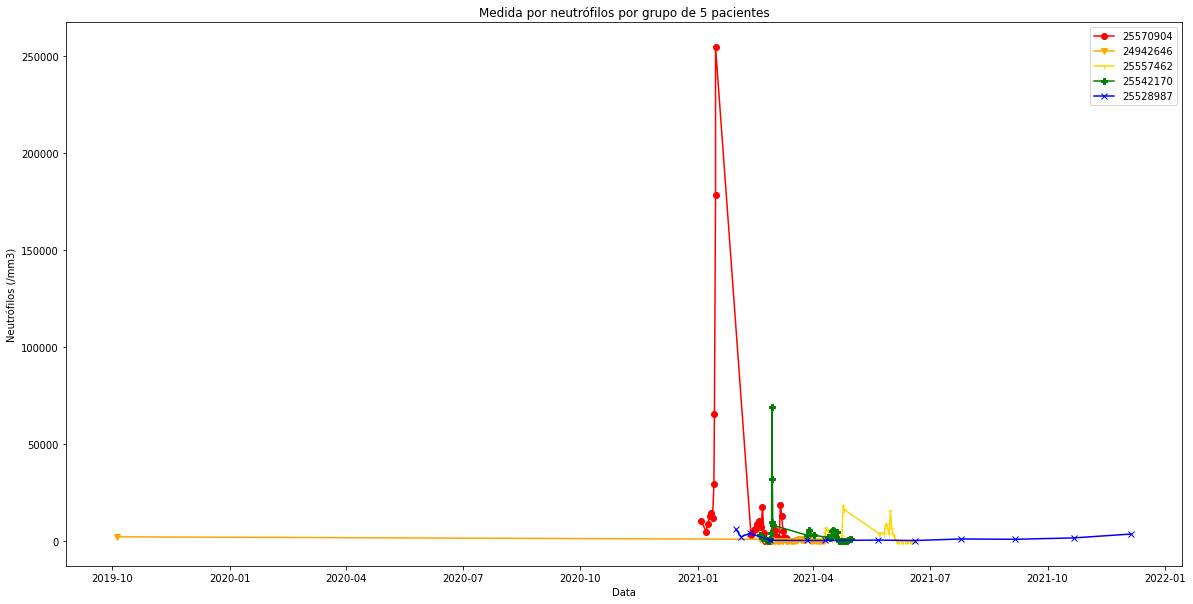




Medida para os pacientes: 23130870,25328710,25751228,13719164,19962424


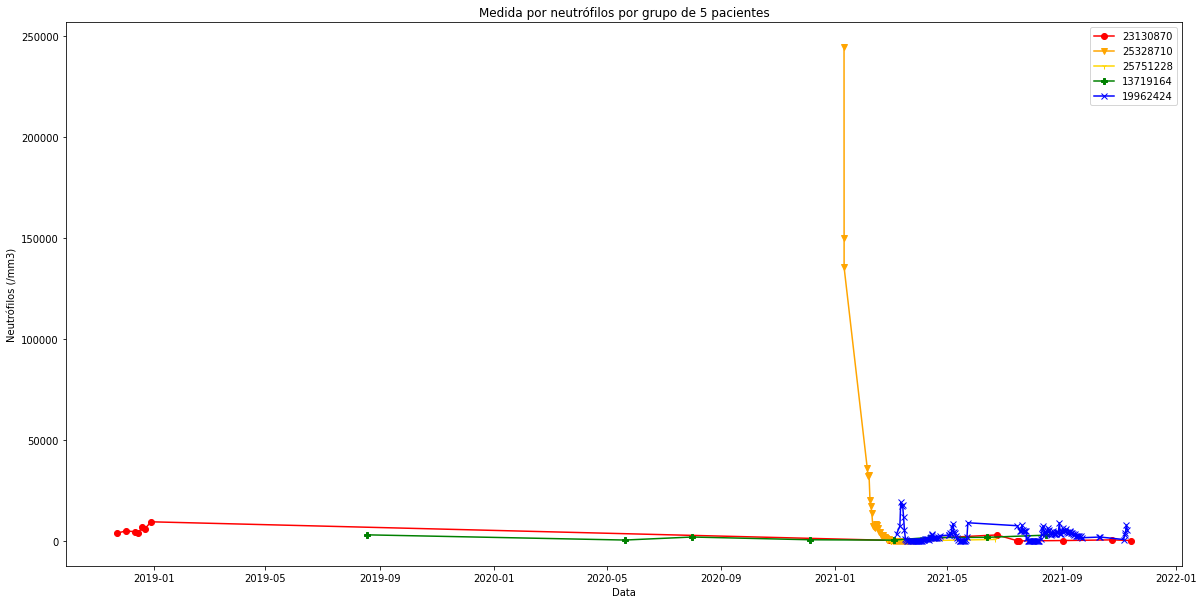




Medida para os pacientes: 25767732,22633954,25664602,18260690,25774864


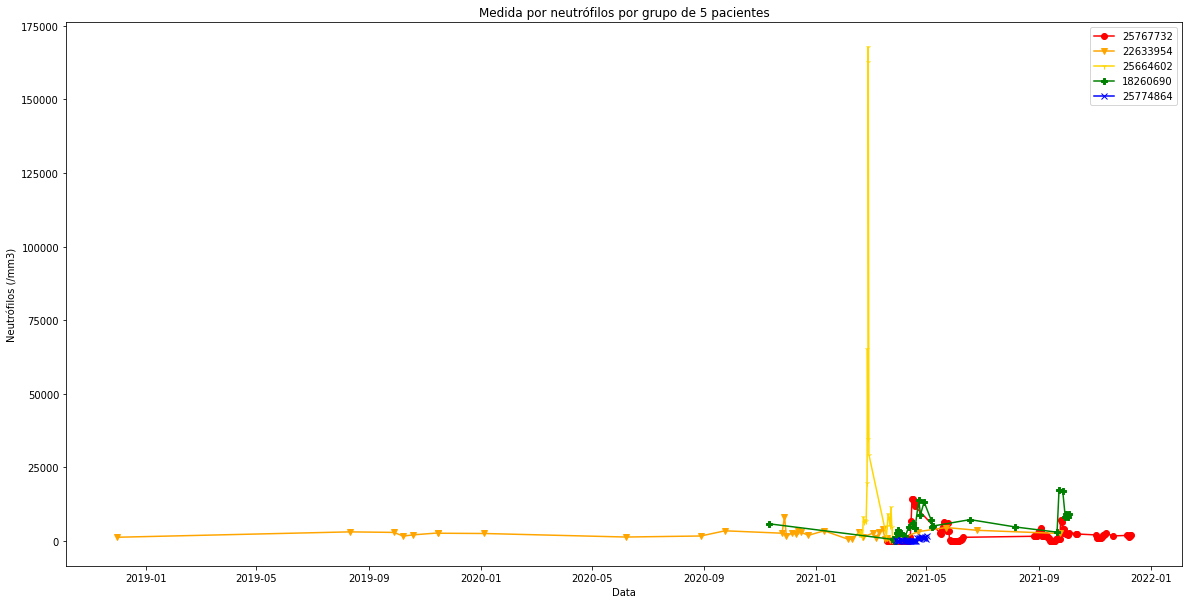




Medida para os pacientes: 25745851,25779158,25450922,23921525,21572617


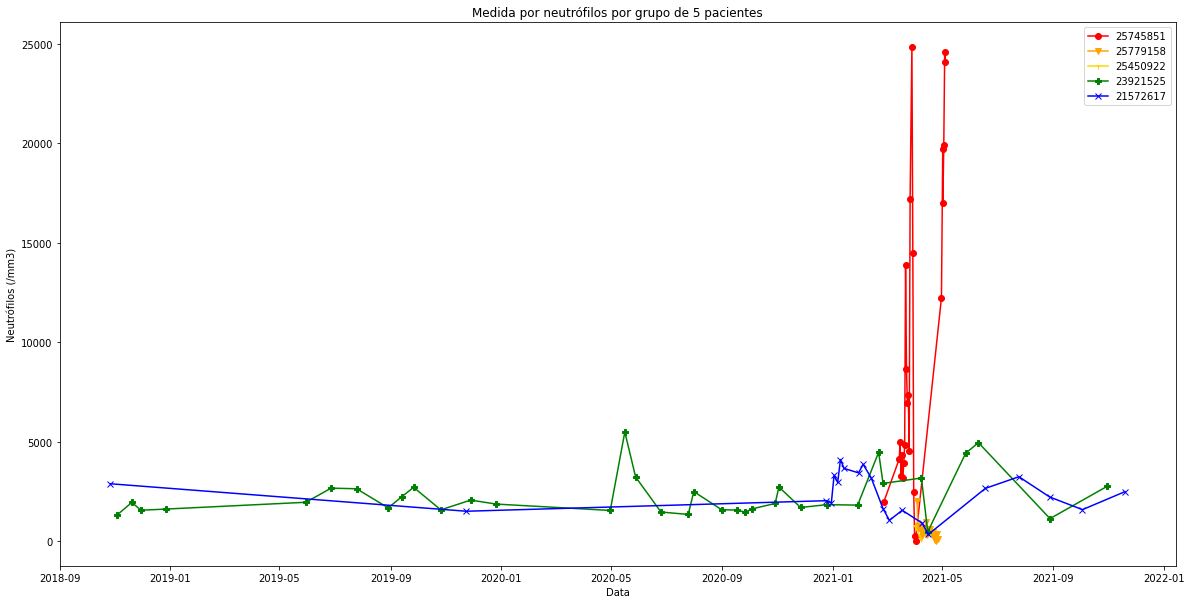




Medida para os pacientes: 25786517,25637910,21624899,25782160,16325910


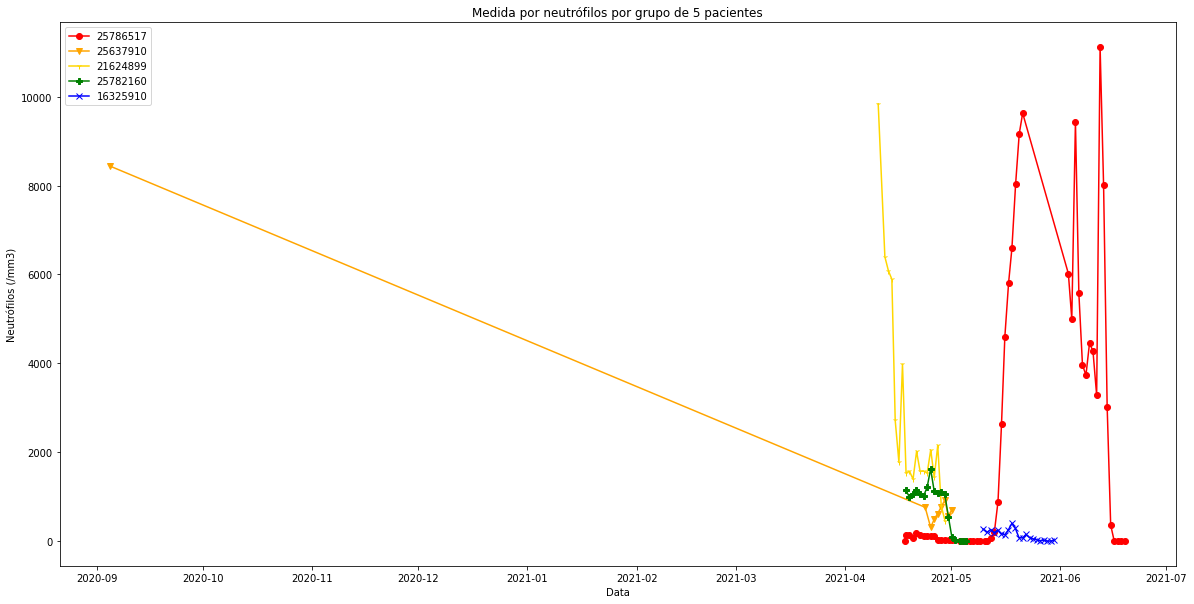




Medida para os pacientes: 25757933,25561026,22980092,25756173,25791783


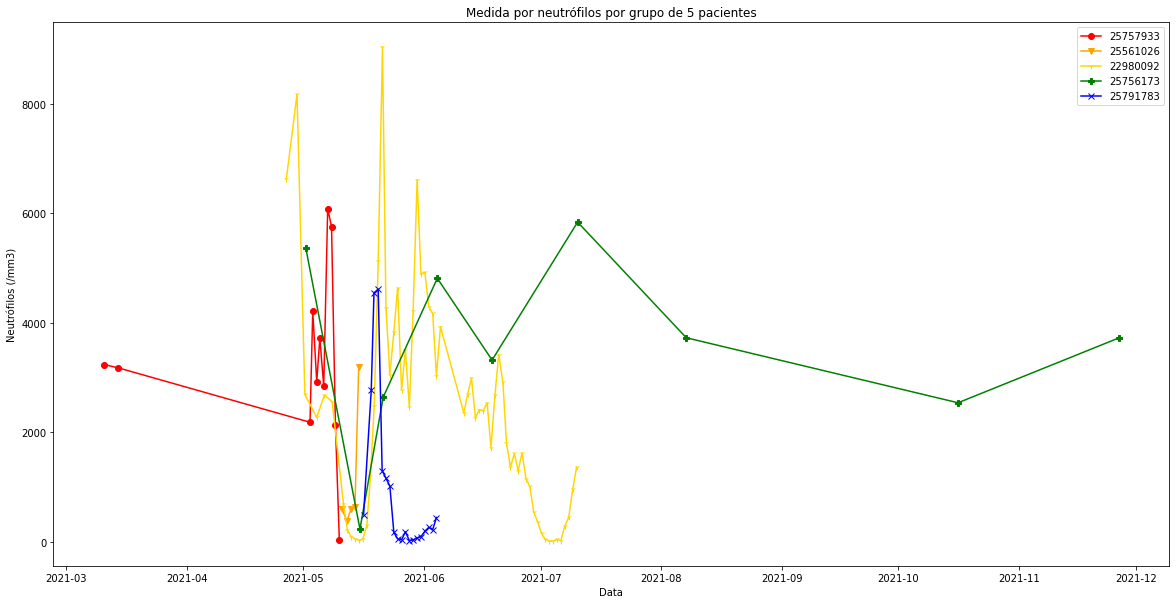




Medida para os pacientes: 23662849,25510684,25263105,25214001,25806370


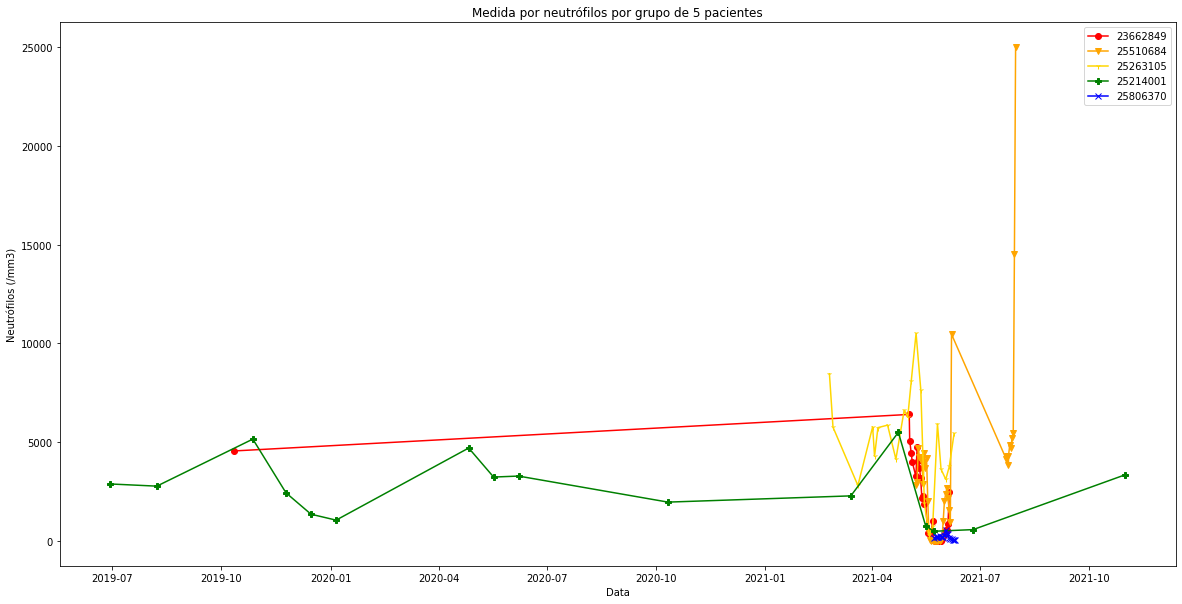




Medida para os pacientes: 25749450,18658931,18416192,24769843,25774828


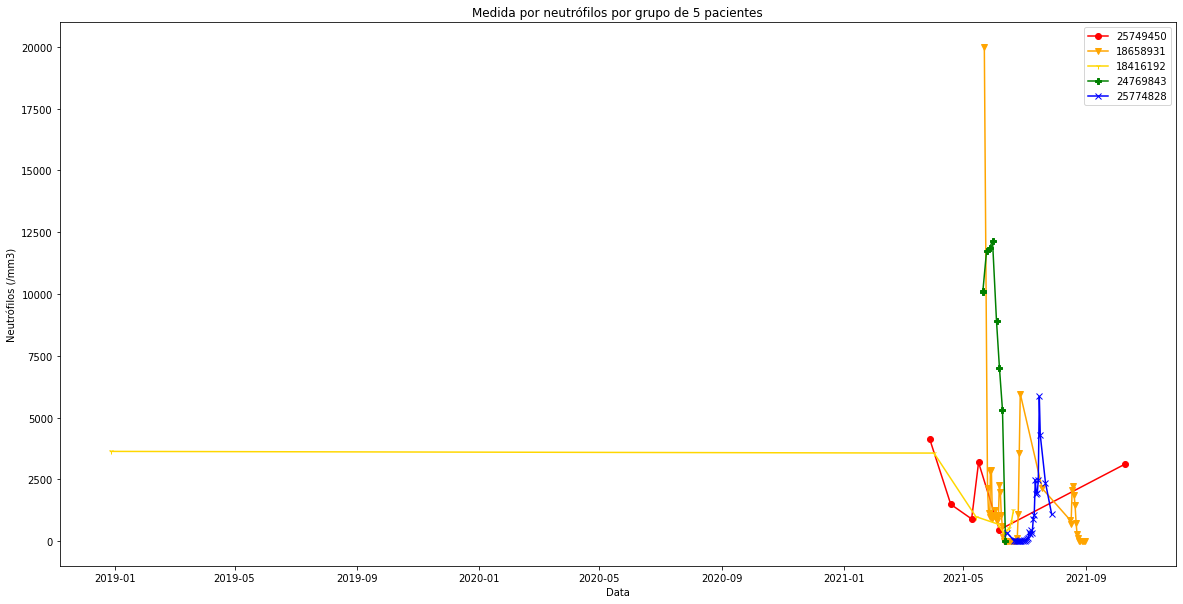




Medida para os pacientes: 24314889,22662957,20014214,25822946,25821643


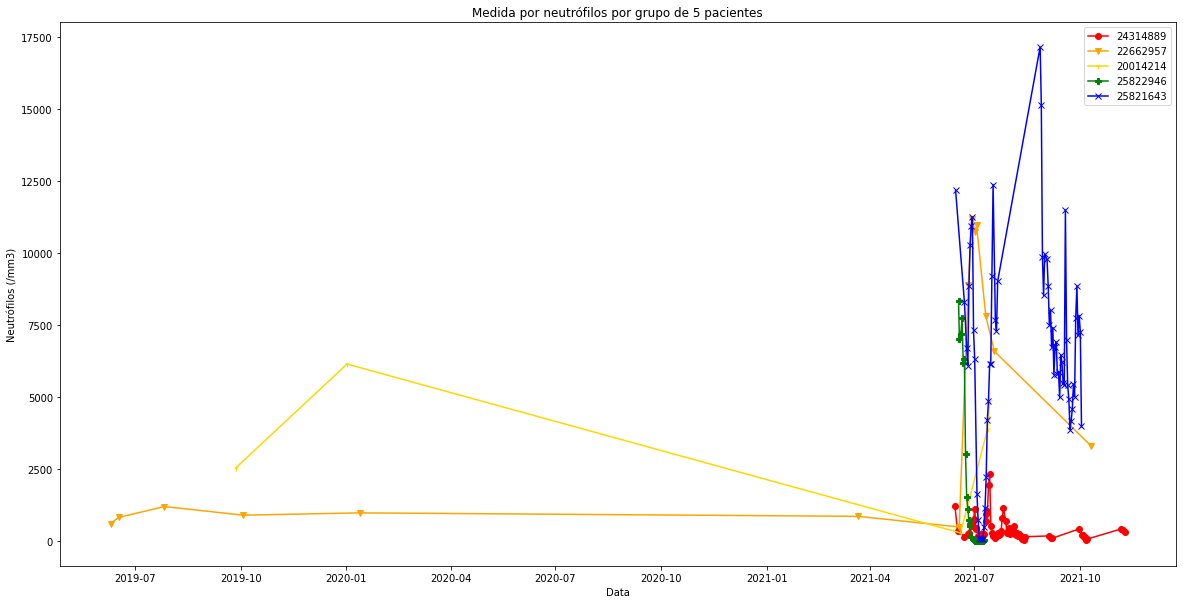




Medida para os pacientes: 23136795,18040308,25834599,25523091,25843342


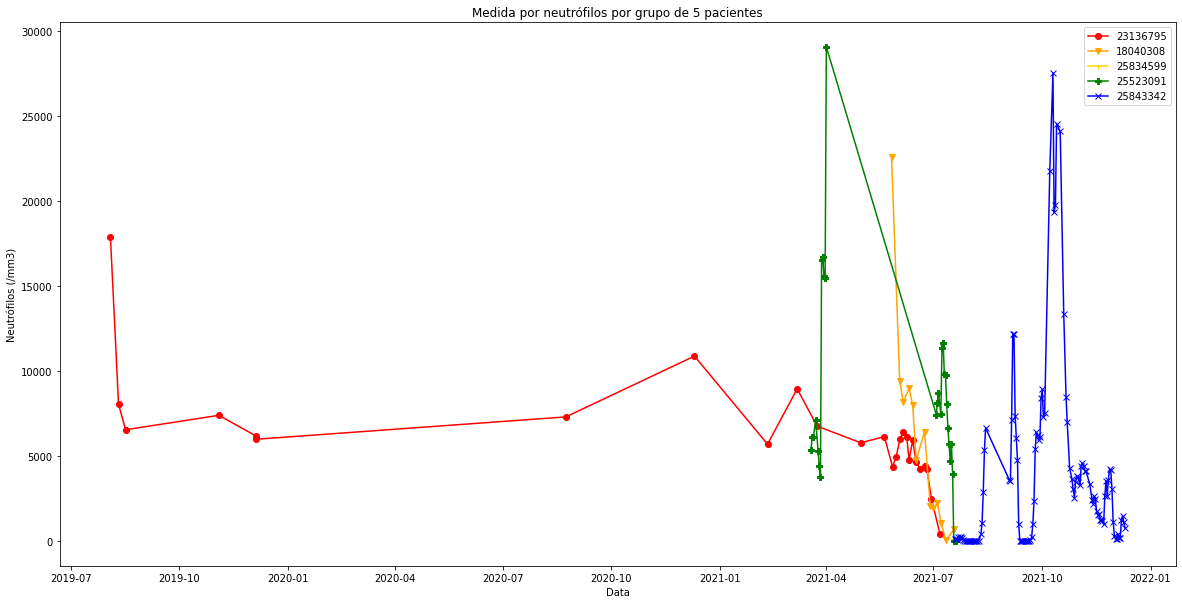




Medida para os pacientes: 25825061,25629234,25769737,25853361,24260373


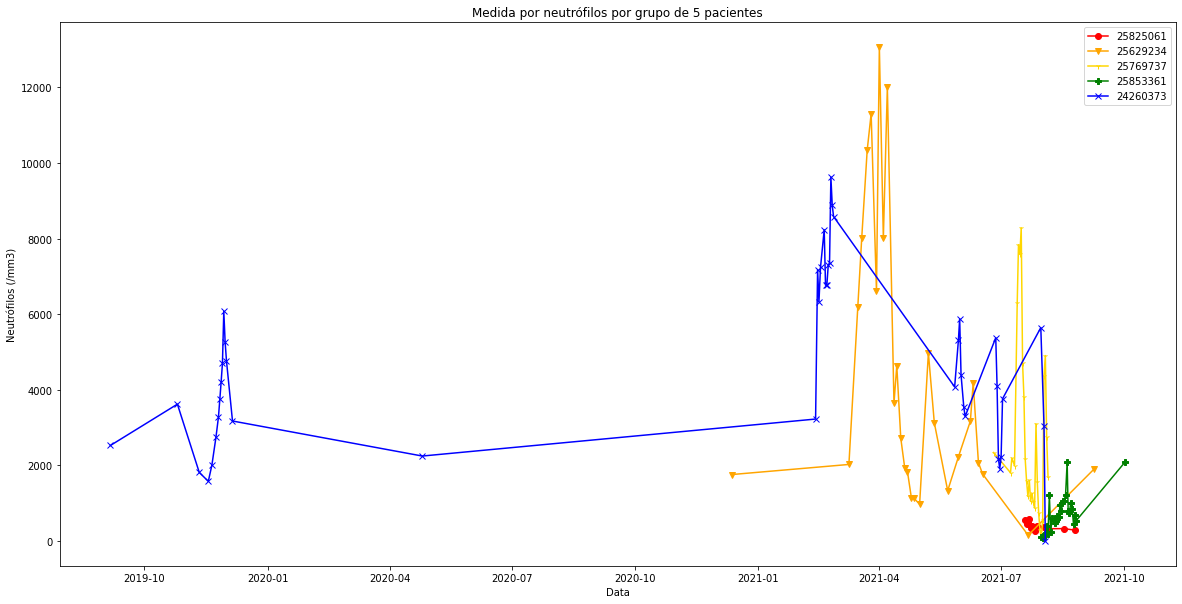




Medida para os pacientes: 24860126,25485566,17643027,25040172,18375863


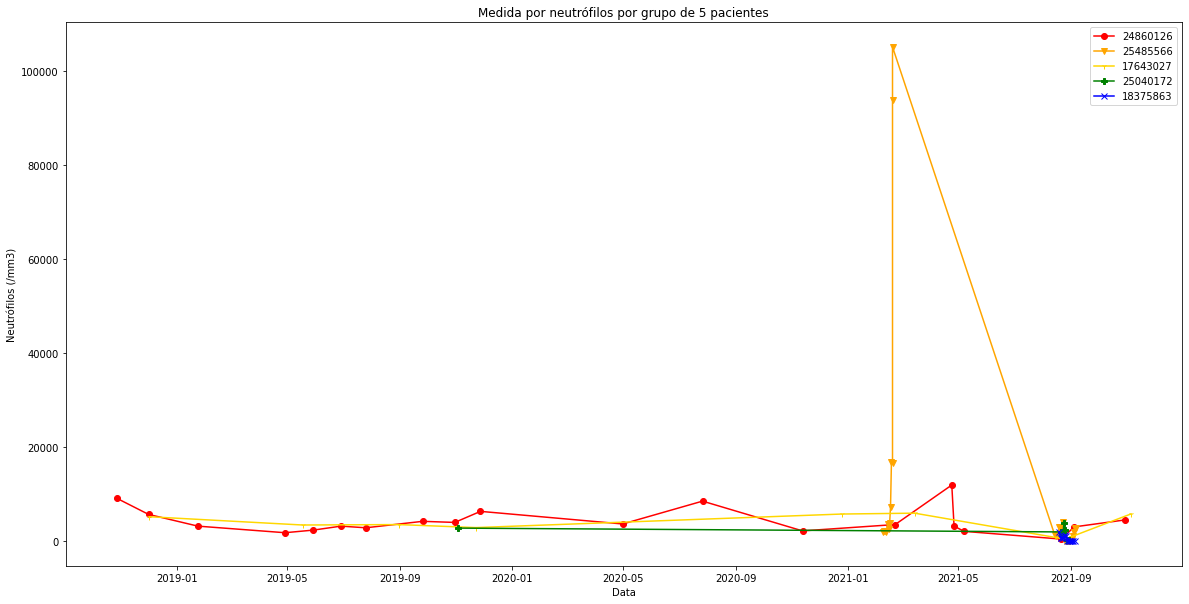




Medida para os pacientes: 25603871,25501867,25290296,23189565,17924816


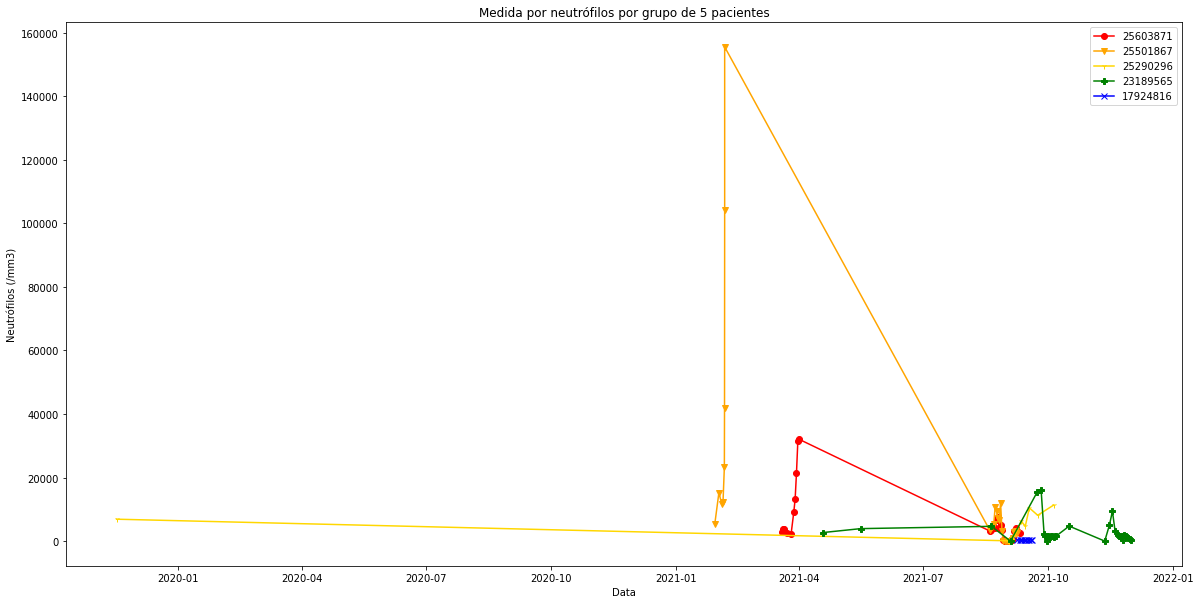




Medida para os pacientes: 25883509,25886291,25177640,25880414,25889038


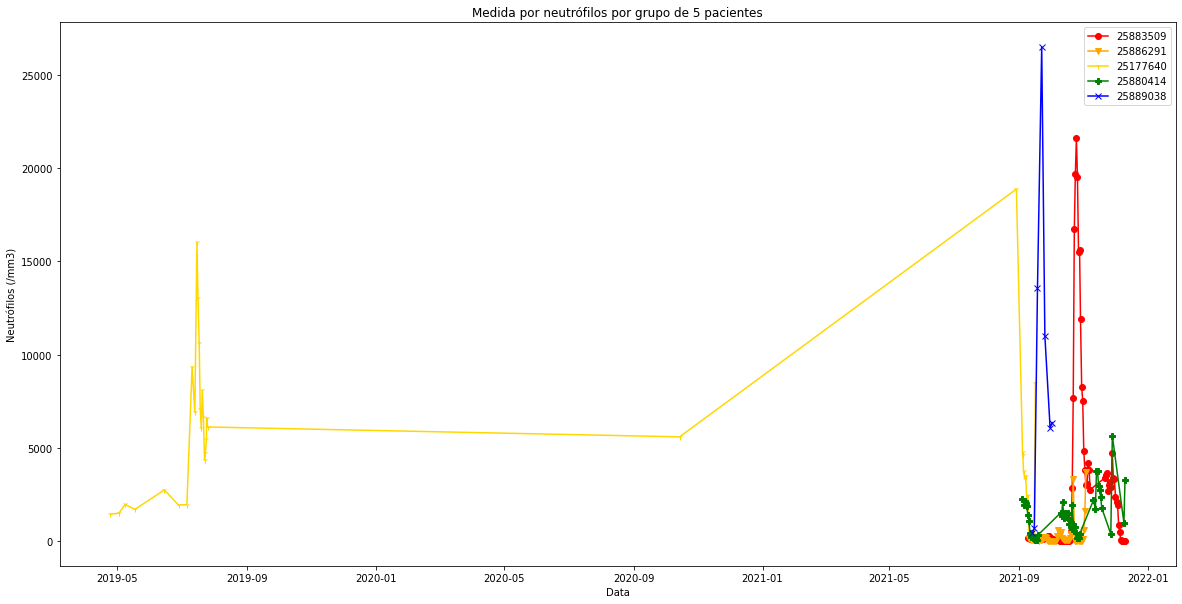




Medida para os pacientes: 25876363,17982938,22865999,25875737,25158426


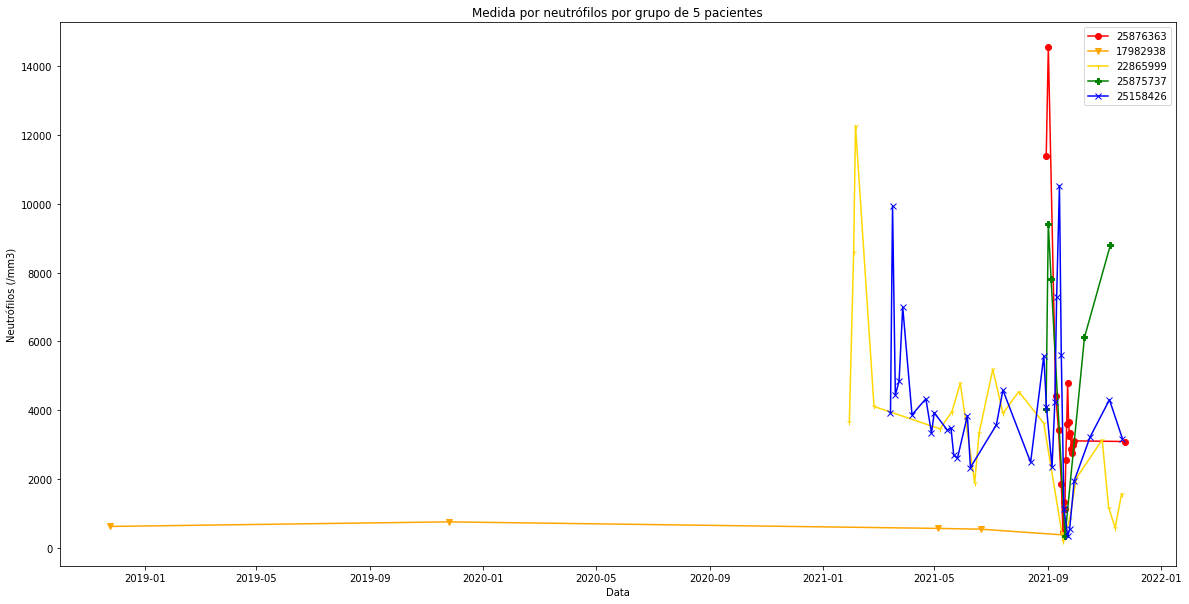




Medida para os pacientes: 25861029,25224936,22817964,25324994,25862083


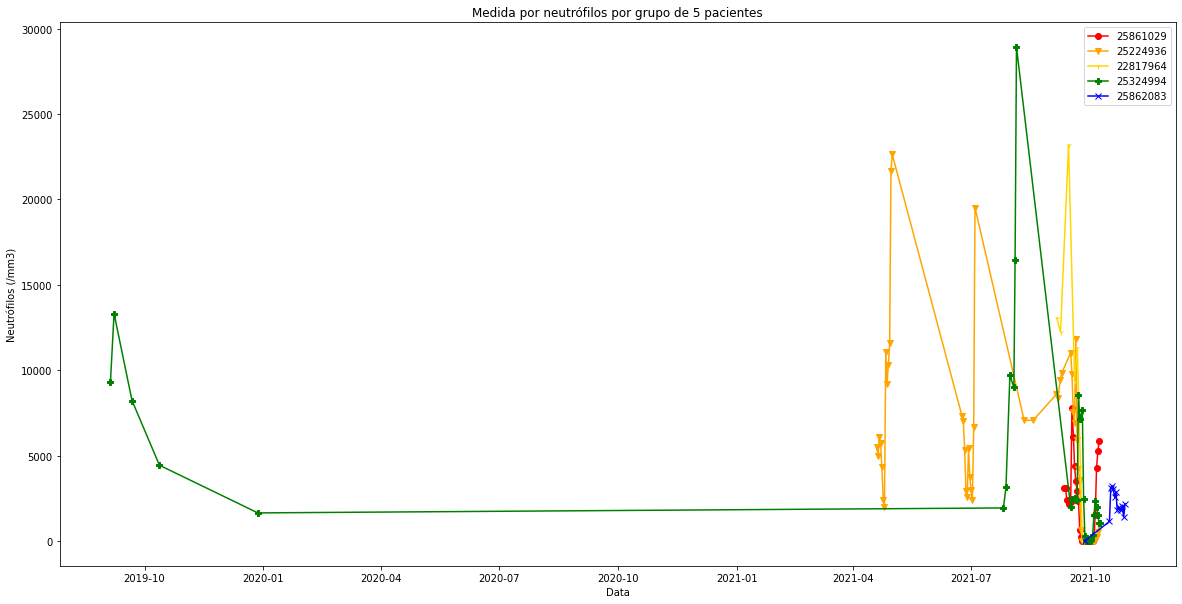




Medida para os pacientes: 23553567,25912468,23599481,23157945,25915458


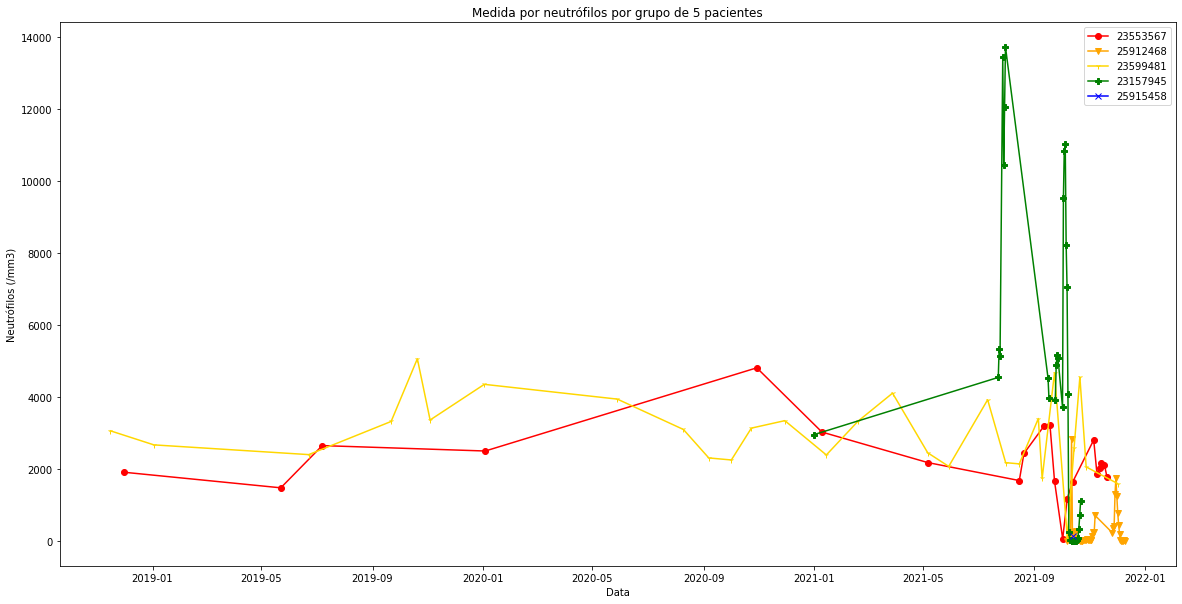




Medida para os pacientes: 25920281,25818301,24858955,24932063,12805068


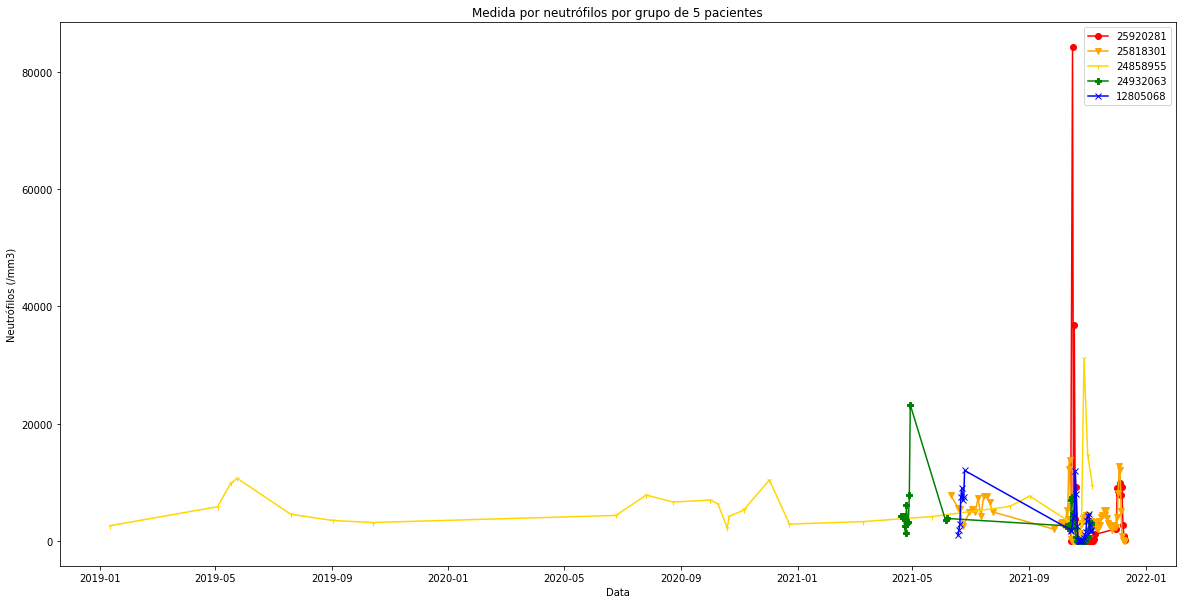




Medida para os pacientes: 25661172,24909035,19984661,25595648,22946597


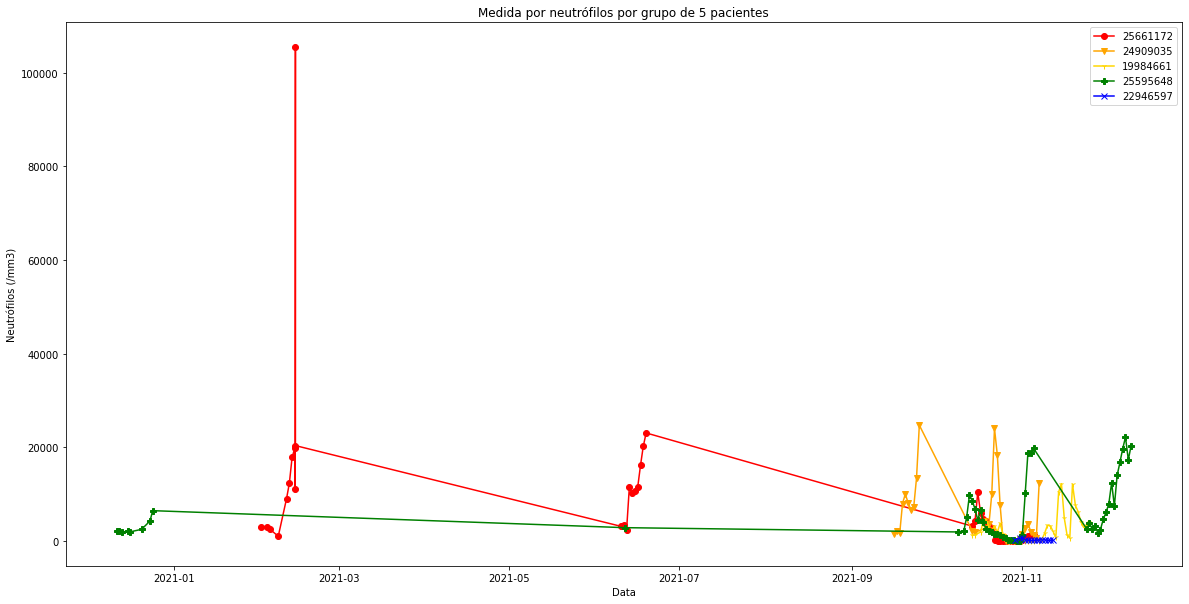




Medida para os pacientes: 25149430,19053070,24738401,25616605,25407186


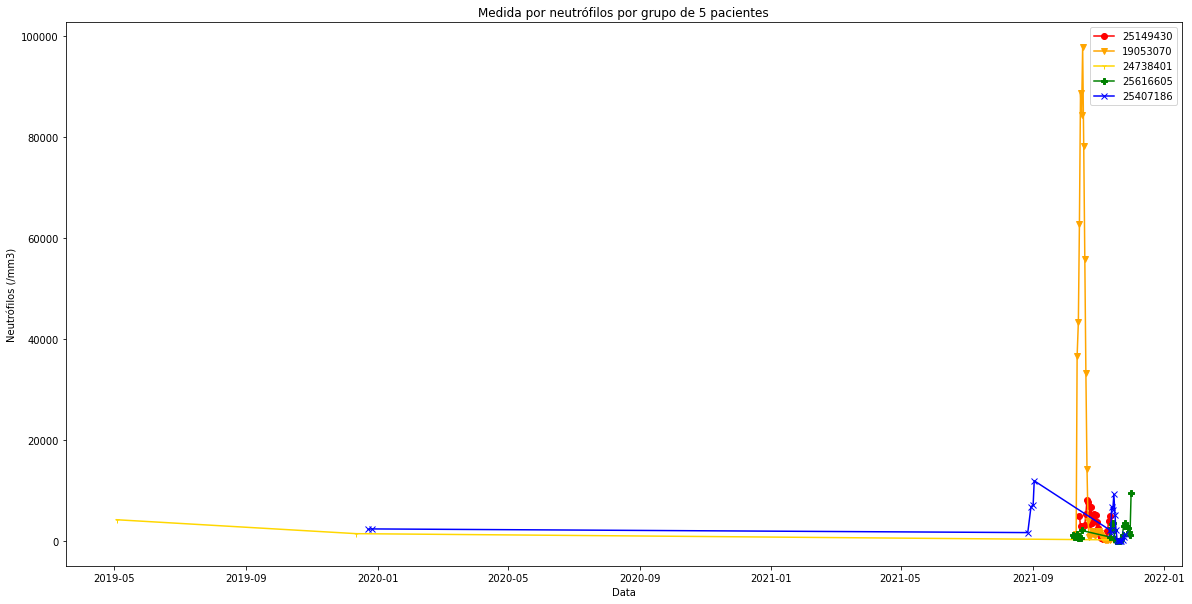




Medida para os pacientes: 25377223,25952430,25823239,25657391,25613553


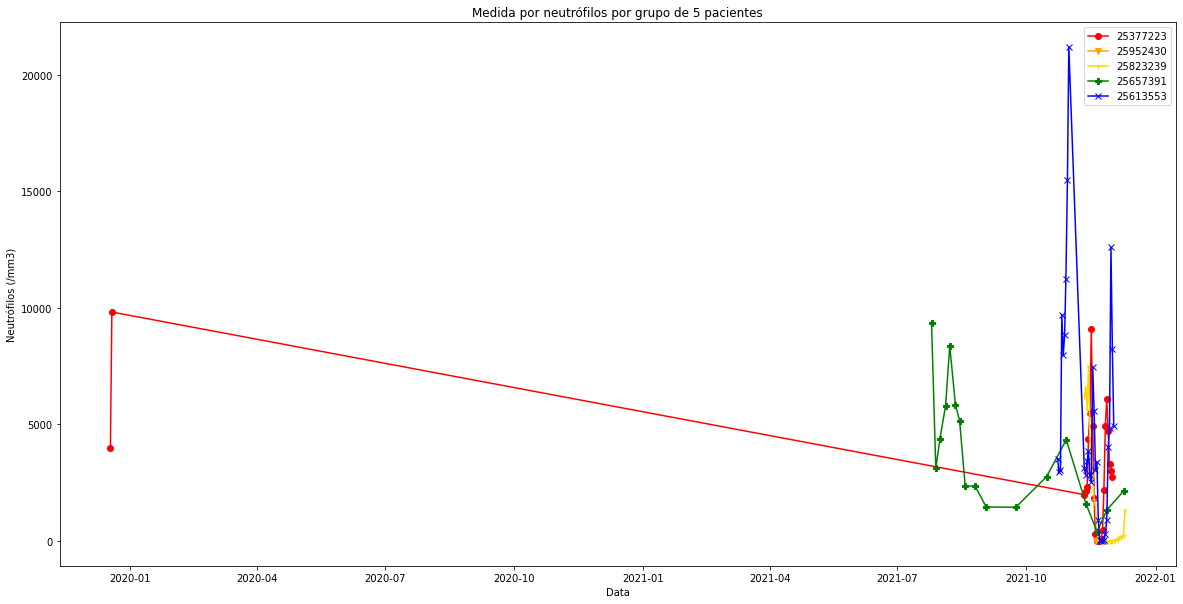




Medida para os pacientes: 25611058,21378287,25777232,19292983,25885936


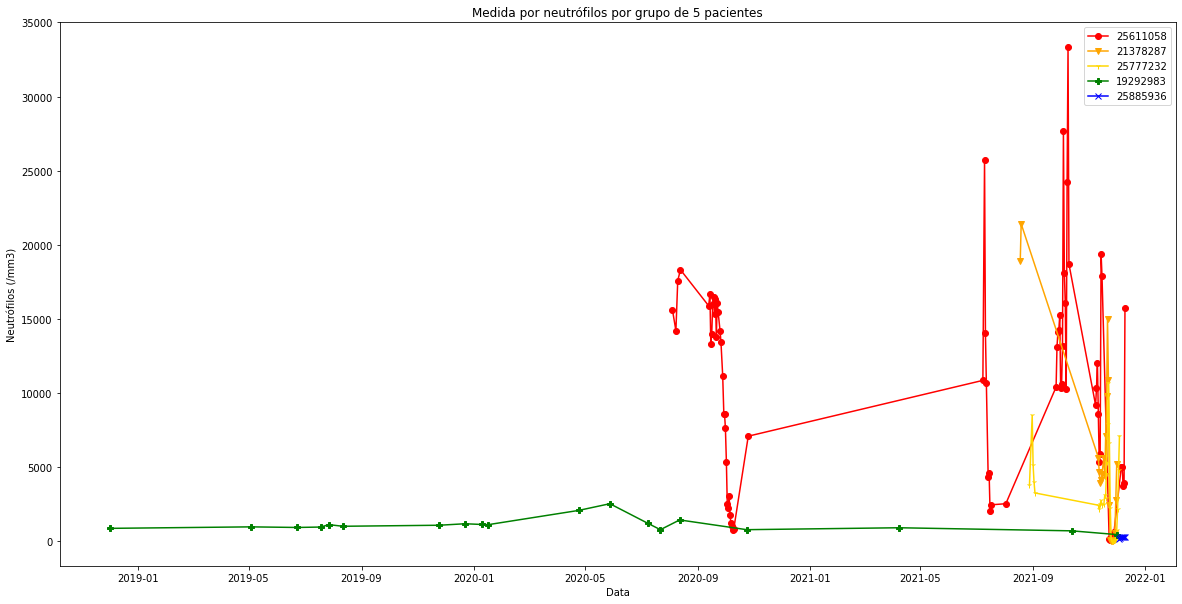




Medida para os pacientes: 25975197,25870890,25967889,20777315,24729699


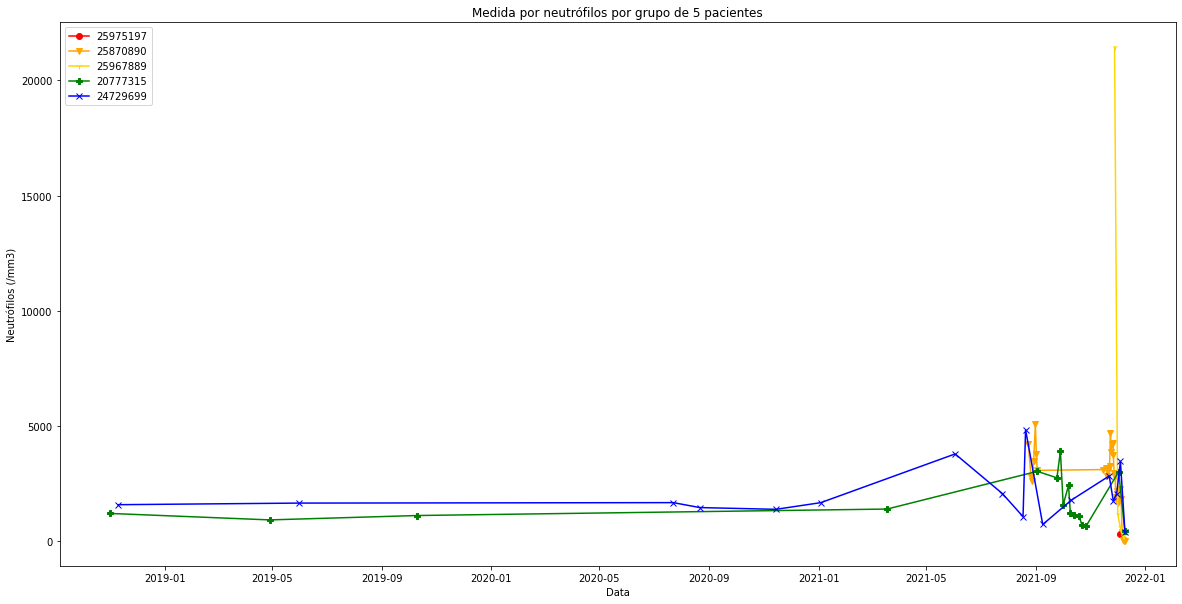

In [123]:
colors = ("red", "orange", "gold", "green", "blue", "indigo", "violet")
symb = ("-o", "-v", "-1", "-P", "-x", "-D", "-p")
counter = 0
for id, file_data in enumerate(patients):
    if counter == 0:
      ids = []
      fig, ax = plt.subplots(1)
      pl.title("Medida por neutrófilos por grupo de 5 pacientes")
      pl.ylabel("Neutrófilos (/mm3)")
      pl.xlabel("Data")
    curr_id = list(file_data["Id"])[0]
    ax.plot(file_data["Date"], file_data["Value"], symb[counter],
            color=colors[counter],
            label=curr_id)
    ids.append(curr_id)
    counter += 1
    if counter == 5:
      print("\n\n\nMedida para os pacientes: " + ','.join([str(x) for x in ids]))
      plt.rcParams['figure.figsize'] = [20, 10]
      plt.legend()
      plt.show()
      counter = 0



Como pode-se verificar, a frequência de medidas entre os pacientes segue uma ordem aleatória, alguns fizeram poucas medidas, outros fizeram várias contagens e espaçadas entre elas.

O histograma abaixo mostra a distribuição da quantidade de medidas por paciente.

Text(0.5, 0, 'Quantidade de medidas por paciente')

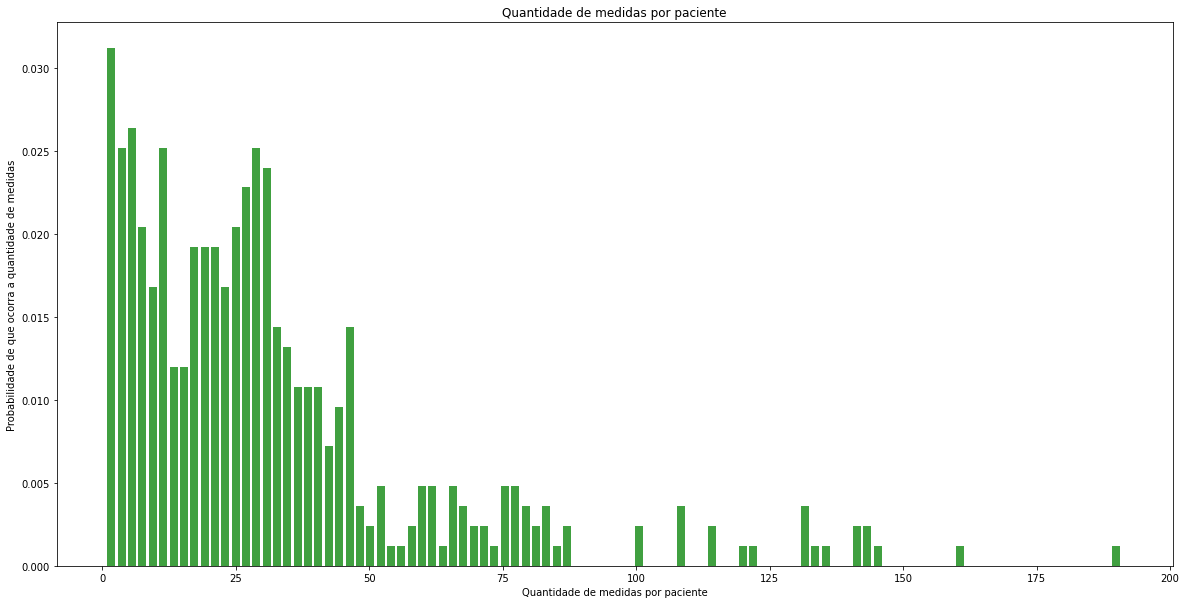

In [124]:
measures_per_pat = []
for patient in patients:
  measures_per_pat.append(patient["Value"].count())

bins = len(list(dict.fromkeys(measures_per_pat)))

a1= plt.hist(measures_per_pat, bins, density=True, facecolor='g', alpha=0.75,
             width=1.5)
pl.title("Quantidade de medidas por paciente")
pl.ylabel("Probabilidade de que ocorra a quantidade de medidas")
pl.xlabel("Quantidade de medidas por paciente")

In [125]:
d_measures_per_pat = pd.DataFrame(measures_per_pat,columns=["measure_per_patient"])
statistics(d_measures_per_pat, "measure_per_patient")

count    430.000000
mean      32.079070
std       30.143453
min        1.000000
25%       11.000000
50%       26.000000
75%       40.000000
max      191.000000
Name: measure_per_patient, dtype: float64

Média: 32.07906976744186, Desvio Padrão: 30.1434531205769, Mediana: 26.0, Moda: 1


As estatísticas descritivas referentes à quantidade de medidas por paciente está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 32.08
Desvio Padrão | 30.14 
Mediana     | 26
Moda        | 1

Fazendo uma análise baseada em box plot:

Text(0, 0.5, 'Quantidade de medidas por paciente')

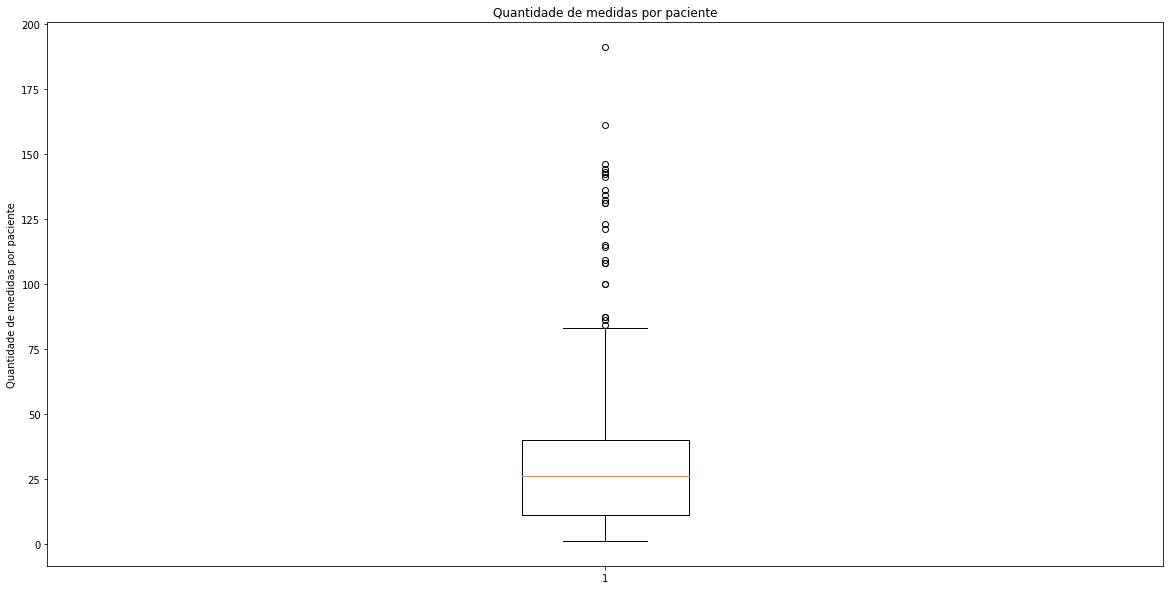

In [126]:
plt.boxplot(measures_per_pat)
pl.title("Quantidade de medidas por paciente")
pl.ylabel("Quantidade de medidas por paciente")

Como pode-se verificar, a maioria dos pacientes com passagem pelo hemocentro com primeira medida caracteristica de neutropenia teve um número total de medidas em volta de 25. 

##Analisando uma possível quantidade de internações

De acordo com o [hemorio](http://www.hemorio.rj.gov.br/protocolo.pdf), uma análise possível seria fazer a divisão com base em semanas. Está análise é feita a seguir:

In [127]:
patients_week = []
counter = 0
local_verbose = VERBOSE
for patient in patients:
  temp = patient.groupby(patient['Date'].dt.to_period('W'))['Value'].agg(['min', 'max', 'mean', 'std'])
  temp["Id"] = list(patient["Id"])[0]
  temp = temp.rename_axis('Date').reset_index()
  patients_week.append(temp)
  if local_verbose:
    display(temp)
    counter += 1
    if counter == 10:
      local_verbose = False


Date      min      max     mean          std        Id
0  2018-10-22/2018-10-28     80.0  11130.0   3156.0  4601.486716  25027938
1  2018-10-29/2018-11-04  11580.0  30970.0  21820.0  8529.998046  25027938
2  2018-11-19/2018-11-25     90.0     90.0     90.0          NaN  25027938
3  2018-11-26/2018-12-02    860.0    860.0    860.0          NaN  25027938
4  2019-01-14/2019-01-20   4060.0   4060.0   4060.0          NaN  25027938
5  2019-06-03/2019-06-09   4542.6   4542.6   4542.6          NaN  25027938

Date    min    max        mean         std        Id
0  2018-10-22/2018-10-28  110.0  140.0  126.666667   15.275252  25060976
1  2018-10-29/2018-11-04  260.0  740.0  456.666667  251.462390  25060976

Date     min     max         mean          std        Id
0   2018-10-22/2018-10-28    10.0    50.0    33.333333    20.816660  15817743
1   2018-10-29/2018-11-04    20.0    60.0    37.500000    17.078251  15817743
2   2018-11-05/2018-11-11   380.0  1080.0   730.000000   494.974747  15817743
3   2018-11-12/2018-11-18  1670.0  1670.0  1670.000000          NaN  15817743
4   2018-11-19/2018-11-25   570.0  1990.0  1530.000000   510.392006  15817743
5   2018-11-26/2018-12-02    20.0   230.0    65.714286    74.129873  15817743
6   2018-12-03/2018-12-09    10.0    40.0    21.666667    11.690452  15817743
7   2018-12-10/2018-12-16   100.0   780.0   344.285714   234.297328  15817743
8   2018-12-17/2018-12-23  1470.0  3220.0  2317.142857   554.878794  15817743
9   2019-01-07/2019-01-13  2262.0  4000.0  3166.400000   713.319564  15817743
10  2019-01-14/2019-01-20    10.0  4750.0  1988.000000  1991.511988  15817743
11  2019-01-21/2019-01-27    20.0    50.0    40.000000    17.320508  15817743
12  2019-04-22/2019-04-28   250.0   280.0   265.000000    21.213203  15817743
13  2019-05-06/2019-05-12   350.0   730.0   505.000000   148.828761  15817743

Date     min      max         mean          std        Id
0   2018-10-22/2018-10-28    20.0     40.0    30.000000     8.164966  14039975
1   2018-10-29/2018-11-04    20.0   2840.0   752.857143  1016.558152  14039975
2   2018-11-05/2018-11-11  1880.0   4310.0  3220.000000  1234.139376  14039975
3   2019-04-22/2019-04-28  4420.0   6400.0  5410.000000  1400.071427  14039975
4   2019-04-29/2019-05-05  5400.0  10440.0  8138.333333  2188.574117  14039975
5   2019-05-06/2019-05-12  5360.0   6650.0  5863.333333   690.096612  14039975
6   2019-05-13/2019-05-19  3290.0   3420.0  3355.000000    91.923882  14039975
7   2019-05-20/2019-05-26  3460.0   3460.0  3460.000000          NaN  14039975
8   2019-07-15/2019-07-21  1760.0   1760.0  1760.000000          NaN  14039975
9   2019-09-23/2019-09-29  2640.0   2640.0  2640.000000          NaN  14039975
10  2019-10-28/2019-11-03  3600.0   3600.0  3600.000000          NaN  14039975

Date   min     max   mean         std        Id
0  2018-10-22/2018-10-28  20.0    20.0   20.0    0.000000  23425873
1  2018-10-29/2018-11-04  10.0  1810.0  712.0  723.961325  23425873

Date     min     max         mean         std        Id
0  2018-10-22/2018-10-28    30.0   360.0   132.500000  152.834333  25042818
1  2018-10-29/2018-11-04     0.0    20.0    10.000000    8.164966  25042818
2  2018-11-05/2018-11-11    10.0   290.0    72.857143  102.260172  25042818
3  2018-11-12/2018-11-18   290.0  1000.0   548.571429  300.689683  25042818
4  2018-11-19/2018-11-25  1060.0  1430.0  1213.333333  192.959409  25042818
5  2018-11-26/2018-12-02  2210.0  2740.0  2493.333333  208.965707  25042818

Date     min     max    mean          std        Id
0  2018-10-22/2018-10-28    10.0   690.0   235.0   318.381323  14940300
1  2018-10-29/2018-11-04  2060.0  6970.0  4580.0  1872.314076  14940300

Date    min     max    mean         std        Id
0  2018-10-22/2018-10-28   30.0   510.0   190.0  222.111083  24764331
1  2018-10-29/2018-11-04  950.0  2570.0  1770.0  622.928567  24764331

Date    min    max   mean  std        Id
0  2018-10-22/2018-10-28  450.0  450.0  450.0  NaN  20730592
1  2019-11-11/2019-11-17  306.7  306.7  306.7  NaN  20730592

Date    min    max   mean  std        Id
0  2018-10-22/2018-10-28  260.0  260.0  260.0  NaN  20962232

com base nesta análise, é possível verificar quantas vezes as medidas se deram com mais do que 1 semana de diferença entre elas, e, assim, **considerando que medidas espaçadas temporalmente de 1 semana entre elas signifique internações diferentes**, calcular quantas vezes cada paciente foi internado. 

In [128]:
internations = {}
for data in patients_week:
  counter = 0
  previus_end_date = datetime.datetime.strptime("0001-1-1", '%Y-%m-%d')
  for date in data["Date"]:
    date_str = str(date).split("/")
    init_date = datetime.datetime.strptime(date_str[0], '%Y-%m-%d')
    end_date = datetime.datetime.strptime(date_str[1], '%Y-%m-%d')
    if not end_date == previus_end_date + datetime.timedelta(days=7):
      counter += 1
    previus_end_date = end_date
  internations[list(data["Id"])[0]] = counter

if VERBOSE:
  print(internations)

{25027938: 4, 25060976: 1, 15817743: 4, 14039975: 5, 23425873: 1, 25042818: 1, 14940300: 1, 24764331: 1, 20730592: 2, 20962232: 1, 24966510: 2, 24805838: 3, 15747905: 1, 21515104: 3, 23192526: 19, 25072735: 1, 25040239: 2, 24998810: 1, 24721726: 15, 25086243: 4, 19825212: 4, 25096403: 1, 16789928: 3, 24611020: 2, 24830166: 1, 18142617: 3, 25031573: 1, 24135031: 2, 21574068: 4, 24881557: 2, 20184270: 2, 25069276: 1, 25110654: 3, 25106039: 2, 25107451: 1, 24278638: 2, 22838939: 11, 24628154: 5, 25099487: 7, 23568785: 2, 25110381: 2, 25111476: 38, 25112221: 4, 24894344: 4, 25119913: 6, 24883943: 7, 24801464: 2, 24698583: 5, 25038265: 2, 18915049: 7, 24911297: 3, 25122305: 1, 16310158: 3, 24309707: 1, 25157274: 3, 24815996: 4, 25149518: 1, 15171652: 1, 25048516: 2, 24693166: 16, 18103529: 1, 24941472: 4, 18879482: 1, 21680552: 4, 25202075: 2, 24914792: 2, 23950904: 2, 25041736: 1, 25139065: 1, 25158311: 2, 25170185: 7, 25066982: 1, 25172927: 6, 22384591: 6, 23614981: 5, 25091482: 9, 252174

Com base na suposição da separação em uma semana, tendo obtido um dicionário com o número de internações por paciente, pode-se plotar um histograma do número de internações por paciente.

Text(0.5, 0, 'Quantidade de internações por paciente dos que apresentaram neutropenia na primeira medida')

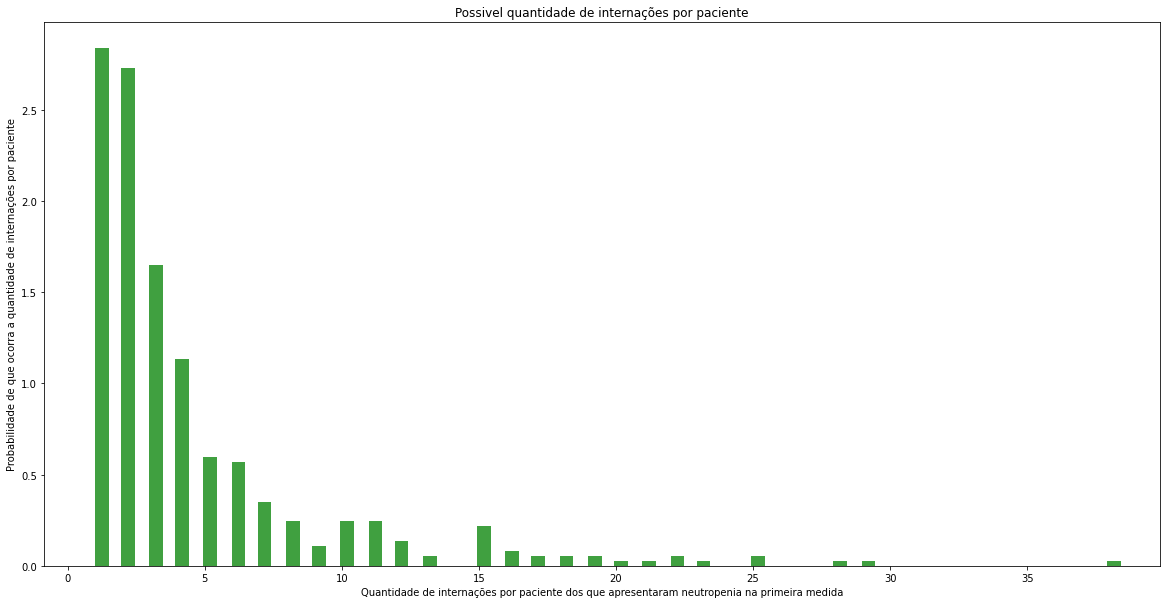

In [129]:
internations_values = list(dict.values(internations))
bins = len(internations_values)

a1= plt.hist(internations_values, bins, density=True, facecolor='g', alpha=0.75,
             width=0.5)
pl.title("Possivel quantidade de internações por paciente")
pl.ylabel("Probabilidade de que ocorra a quantidade de internações por paciente")
pl.xlabel("Quantidade de internações por paciente dos que apresentaram neutropenia na primeira medida")

In [130]:
d_internations_values = pd.DataFrame(internations_values,columns=["numero_internacoes"])
statistics(d_internations_values, "numero_internacoes")

count    430.000000
mean       4.411628
std        4.929371
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       38.000000
Name: numero_internacoes, dtype: float64

Média: 4.411627906976745, Desvio Padrão: 4.929371052725003, Mediana: 3.0, Moda: 1


As estatísticas descritivas referentes à quantidade de possíveis internações por paciente está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 4.41
Desvio Padrão | 4.92
Mediana     | 3
Moda        | 1

fazendo uma análise do box plot

Text(0, 0.5, 'Quantidade de internações por paciente dos que apresentaram neutropenia na primeira medida')

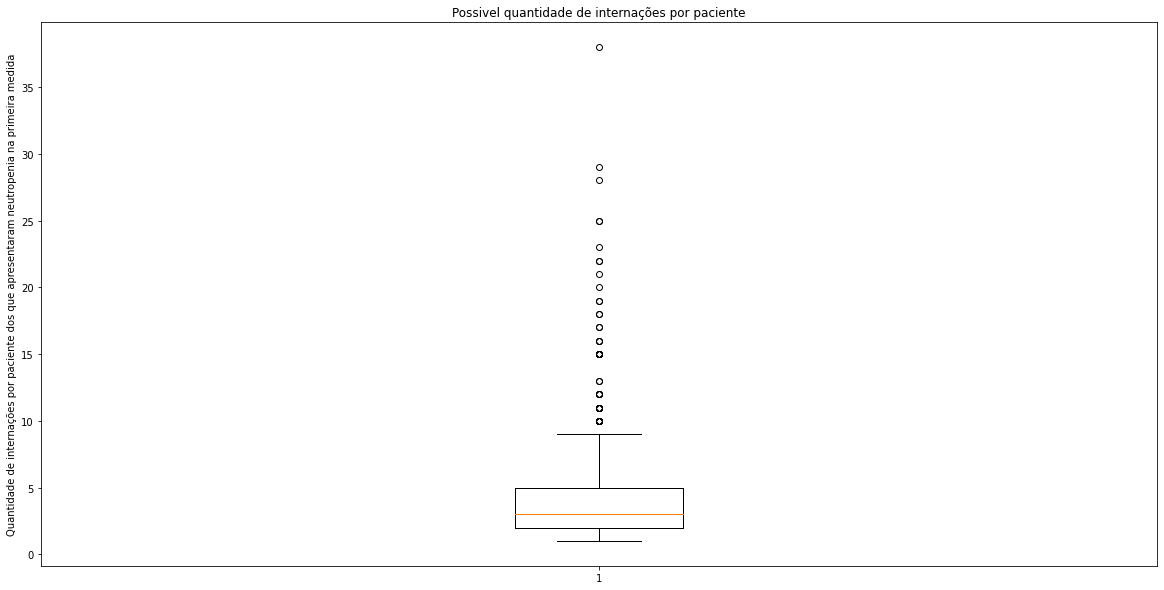

In [131]:
plt.boxplot(internations_values)
pl.title("Possivel quantidade de internações por paciente")
pl.ylabel("Quantidade de internações por paciente dos que apresentaram neutropenia na primeira medida")

conforme pode-se verificar, a maioria dos pacientes apresentou uma quantidade baixa de internações, porém ocorram exceções em que o paciente, durante o período analisado, chegou a ter até mesmo mais de 35 internações.

##Analisando um possível desfecho

Uma suposição possível é de que pacientes que tiveram níveis de neutropenia relativamente baixos na última medida, podem ter sido transferidos para outro hospital ou podem ter ido a óbito.

Esta suposição não é certamente válida, porém é uma aproximação para se estimar o desfecho que cada paciente pode ter tido.

Para se fazer esta análise, será considerada apenas a última medida para cada um dos pacientes análisados com passagem pelo hemocentro.

In [132]:
# Colocando a última medida em destaque
nf_abs_value_mm3_in_hemo_rev_date = nf_abs_value_mm3_in_hemo.sort_values(by='Date', ascending=False)
# Eliminando mais do que uma medida por paciente
nf_abs_value_mm3_in_hemo_rev_date_id = nf_abs_value_mm3_in_hemo_rev_date.drop_duplicates(subset=['Id'])
# Pegando apenas os pacientes com medida inferior à 500
nf_abs_value_mm3_in_hemo_rev_date_id_500 = nf_abs_value_mm3_in_hemo_rev_date_id[nf_abs_value_mm3_in_hemo_rev_date_id["Value"] < 500]

display(nf_abs_value_mm3_in_hemo_rev_date_id_500)

Id sex                  Type                Date  Value   Age
2773157  25885936   M  NEUTRÓFILOS ABSOLUTO 2021-12-10 05:45:00  300.5  29.0
2772996  25883509   M  NEUTRÓFILOS ABSOLUTO 2021-12-10 05:32:00   10.0  60.0
2772994  25818301   F  NEUTRÓFILOS ABSOLUTO 2021-12-10 05:32:00   30.0  55.0
2772993  25920281   M  NEUTRÓFILOS ABSOLUTO 2021-12-10 05:32:00  229.6  32.0
2772986  25912468   F  NEUTRÓFILOS ABSOLUTO 2021-12-10 05:32:00    0.0  57.0
...           ...  ..                   ...                 ...    ...   ...
1947272  24278638   M  NEUTRÓFILOS ABSOLUTO 2018-12-22 08:57:00  430.0  57.0
1943867  25069276   M  NEUTRÓFILOS ABSOLUTO 2018-12-20 16:13:00  120.0  73.0
1919917  25031573   M  NEUTRÓFILOS ABSOLUTO 2018-12-01 13:23:00  360.0  34.0
1865040  15747905   M  NEUTRÓFILOS ABSOLUTO 2018-11-01 05:44:00   90.0  30.0
1852686  20962232   M  NEUTRÓFILOS ABSOLUTO 2018-10-25 15:56:00  260.0  48.0

[133 rows x 6 columns]

Com base ensta suposição, pode-se dizer que ao todo, 133 pacientes apresentaram última medida com neutropenia grave e com possível desfecho de transferência para outro hospital ou de óbito.

Fazendo uma análise desses pacientes por sexo:

Text(0.5, 1.0, 'Possível desfecho de transferência ou óbito')

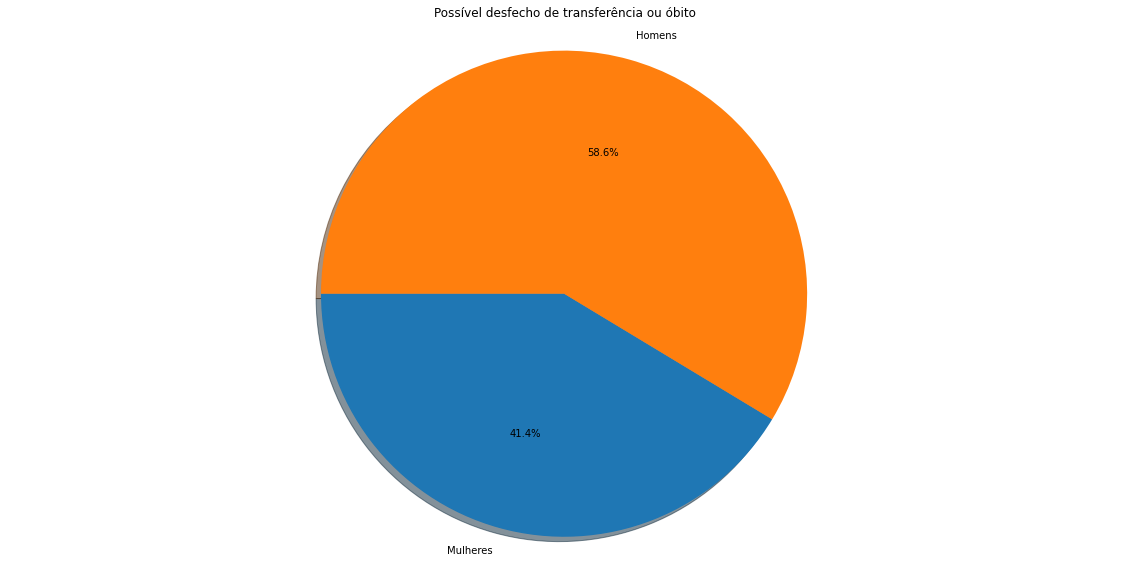

In [133]:
nf_abs_value_mm3_in_hemo_rev_date_id_500_f = nf_abs_value_mm3_in_hemo_rev_date_id_500[nf_abs_value_mm3_in_hemo_rev_date_id_500["sex"] == "F"]
nf_abs_value_mm3_in_hemo_rev_date_id_500_m = nf_abs_value_mm3_in_hemo_rev_date_id_500[nf_abs_value_mm3_in_hemo_rev_date_id_500["sex"] == "M"]
data = [nf_abs_value_mm3_in_hemo_rev_date_id_500_f["sex"].count(),
        nf_abs_value_mm3_in_hemo_rev_date_id_500_m["sex"].count()]
labels = ["Mulheres",
          "Homens"]
fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Possível desfecho de transferência ou óbito")

Portanto, a probabilidade de que homens tenham um desfecho de transferência de hospital ou óbito é relativamente maior do que o de mulheres. 

In [134]:
pat_with_init_500 = nf_abs_value_mm3_in_hemo_rev_date_id_500[nf_abs_value_mm3_in_hemo_rev_date_id_500['Id'].isin(list(nf_lower_500_hemo_f["Id"]))]

if VERBOSE:
  display(pat_with_init_500)

print("Quantidade de pessoas que tiveram última medida de neutrófilos abaixo de 500/mm3 e que começaram com medida abaixo de 500/mm3: " + str(pat_with_init_500["Id"].count()))

Id sex                  Type                Date  Value   Age
2773157  25885936   M  NEUTRÓFILOS ABSOLUTO 2021-12-10 05:45:00  300.5  29.0
2772996  25883509   M  NEUTRÓFILOS ABSOLUTO 2021-12-10 05:32:00   10.0  60.0
2772994  25818301   F  NEUTRÓFILOS ABSOLUTO 2021-12-10 05:32:00   30.0  55.0
2772993  25920281   M  NEUTRÓFILOS ABSOLUTO 2021-12-10 05:32:00  229.6  32.0
2772986  25912468   F  NEUTRÓFILOS ABSOLUTO 2021-12-10 05:32:00    0.0  57.0
...           ...  ..                   ...                 ...    ...   ...
1947272  24278638   M  NEUTRÓFILOS ABSOLUTO 2018-12-22 08:57:00  430.0  57.0
1943867  25069276   M  NEUTRÓFILOS ABSOLUTO 2018-12-20 16:13:00  120.0  73.0
1919917  25031573   M  NEUTRÓFILOS ABSOLUTO 2018-12-01 13:23:00  360.0  34.0
1865040  15747905   M  NEUTRÓFILOS ABSOLUTO 2018-11-01 05:44:00   90.0  30.0
1852686  20962232   M  NEUTRÓFILOS ABSOLUTO 2018-10-25 15:56:00  260.0  48.0

[133 rows x 6 columns]

Quantidade de pessoas que tiveram última medida de neutrófilos abaixo de 500/mm3 e que começaram com medida abaixo de 500/mm3: 133


Portanto, pode-se afirmar que todos que tiveram desfecho possível de transferência ou óbito já começaram com medida inferior à 500/mm3 de neutrófilos no sangue.

Em termos de recuperação, pode-se dizer que:

Text(0.5, 1.0, 'Possivel desfecho para os que começaram com medida de neutrófilos inferior a 500/mm3')

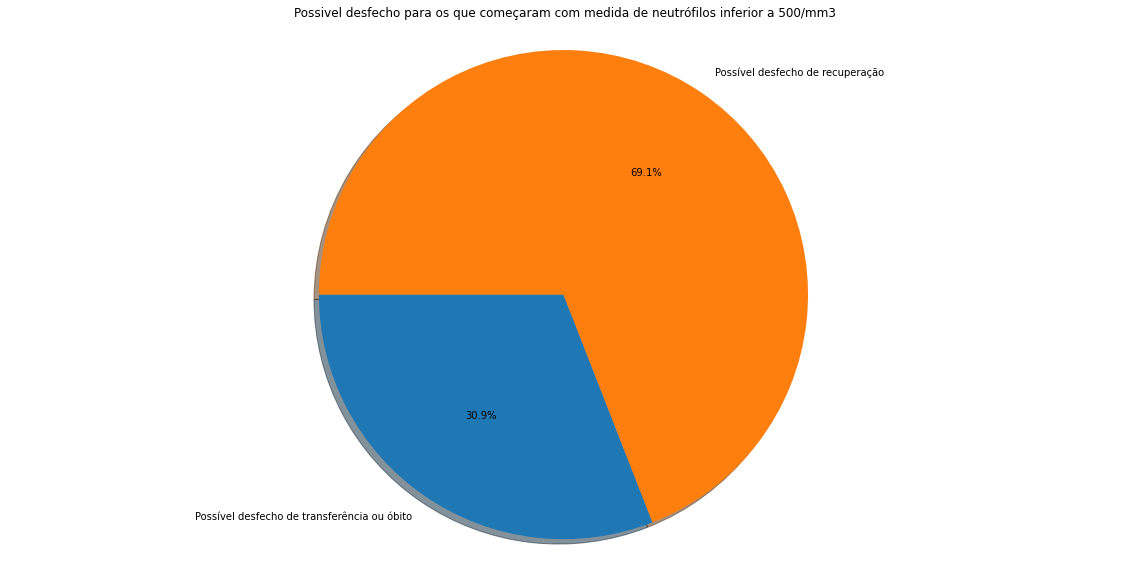

In [135]:
data = [nf_abs_value_mm3_in_hemo_rev_date_id_500['Id'].count(),
        nf_lower_500_hemo_f["Id"].count() - nf_abs_value_mm3_in_hemo_rev_date_id_500['Id'].count()]
labels = ["Possível desfecho de transferência ou óbito",
          "Possível desfecho de recuperação"]
fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
ax1.axis('equal')
pl.title("Possivel desfecho para os que começaram com medida de neutrófilos inferior a 500/mm3")

##Quantidade de internações para possível desfecho de piora

Análise da quantidade de internações para pacientes que, seguindo o princípio de possível desfecho descrito na etapa de possível desfecho, provavelmente tiveram transferência de hospital ou óbito.


In [136]:
patients_with_possible_bad_end = list(nf_abs_value_mm3_in_hemo_rev_date_id_500["Id"])
internation_patient_possible_bad_end = []
for patient in patients_with_possible_bad_end:
  internation_patient_possible_bad_end.append(internations[patient])

Fazendo uma análise do histograma:

Text(0.5, 0, 'Quantidade de internações')

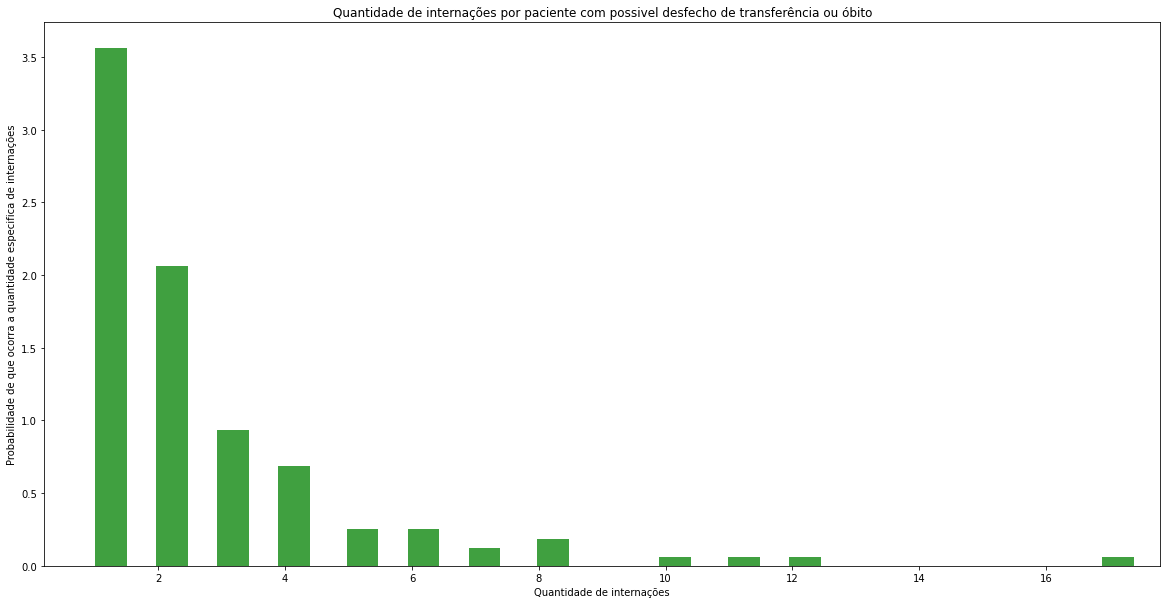

In [137]:
bins = len(internation_patient_possible_bad_end)

a1= plt.hist(internation_patient_possible_bad_end, bins, density=True, facecolor='g', alpha=0.75,
             width=0.5)
pl.title("Quantidade de internações por paciente com possivel desfecho de transferência ou óbito")
pl.ylabel("Probabilidade de que ocorra a quantidade especifica de internações")
pl.xlabel("Quantidade de internações")

In [138]:
d_internation_patient_possible_bad_end = pd.DataFrame(internation_patient_possible_bad_end,columns=["numero_internacoes_desfecho"])
statistics(d_internation_patient_possible_bad_end, "numero_internacoes_desfecho")

count    133.000000
mean       2.586466
std        2.459144
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       17.000000
Name: numero_internacoes_desfecho, dtype: float64

Média: 2.5864661654135337, Desvio Padrão: 2.4591444051307683, Mediana: 2.0, Moda: 1


As estatísticas descritivas referentes à quantidade de possíveis internações para pacientes que possivelmente foram transferidos ou foram a óbito está na tabela abaixo.

Estatística | Valor
------------|-------
Média       | 2.59
Desvio Padrão | 2.46
Mediana     | 2
Moda        | 1

Em termos de box plot:

Text(0, 0.5, 'Quantidade de internações')

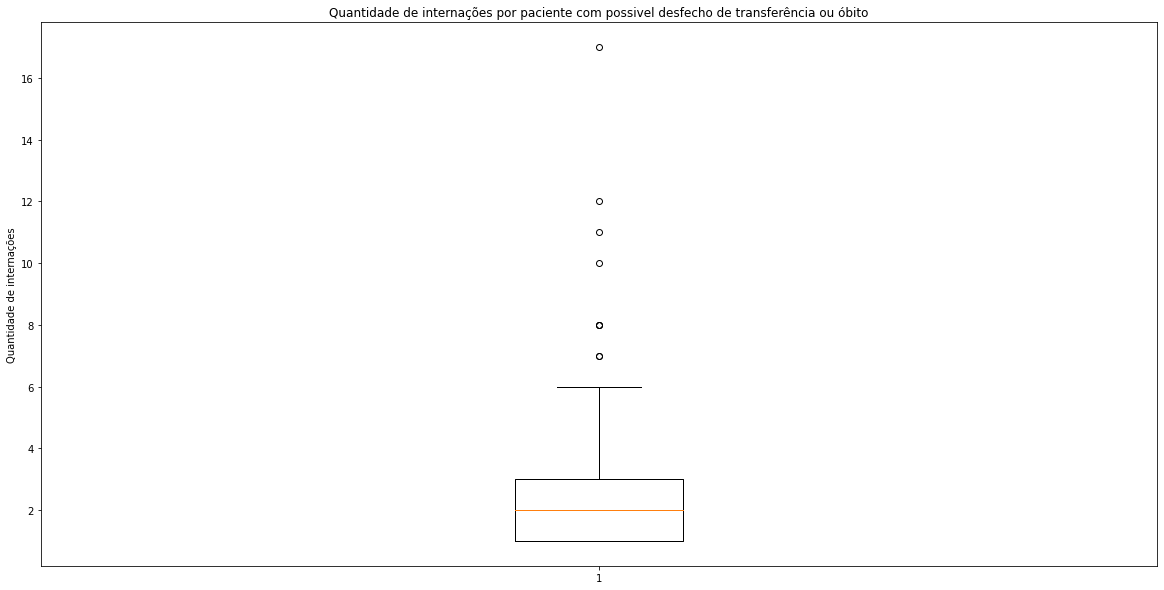

In [139]:
plt.boxplot(internation_patient_possible_bad_end)
pl.title("Quantidade de internações por paciente com possivel desfecho de transferência ou óbito")
pl.ylabel("Quantidade de internações")

Comparando pacientes que foram transferidos ou vieram a óbito e todos.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



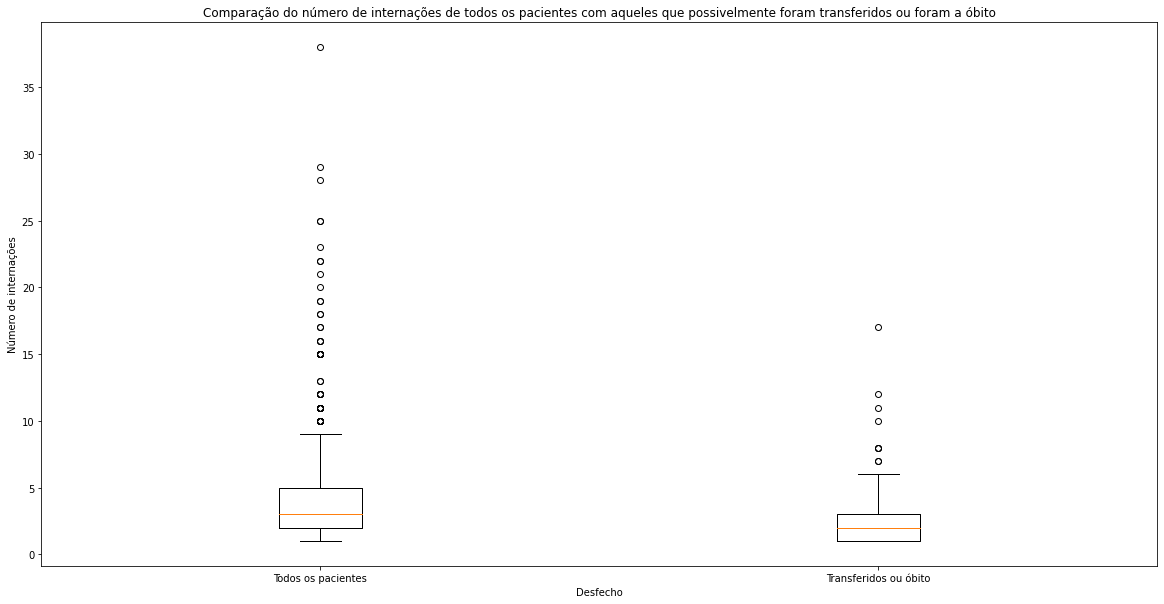

In [140]:
title="Comparação do número de internações de todos os pacientes com aqueles que possivelmente foram transferidos ou foram a óbito"
boxplots([d_internations_values["numero_internacoes"], d_internation_patient_possible_bad_end["numero_internacoes_desfecho"]], 
         xlabel="Desfecho", ylabel="Número de internações", title=title, xticks=["Todos os pacientes", "Transferidos ou óbito"])

Fazendo essa mesma comparação sem os outliers.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



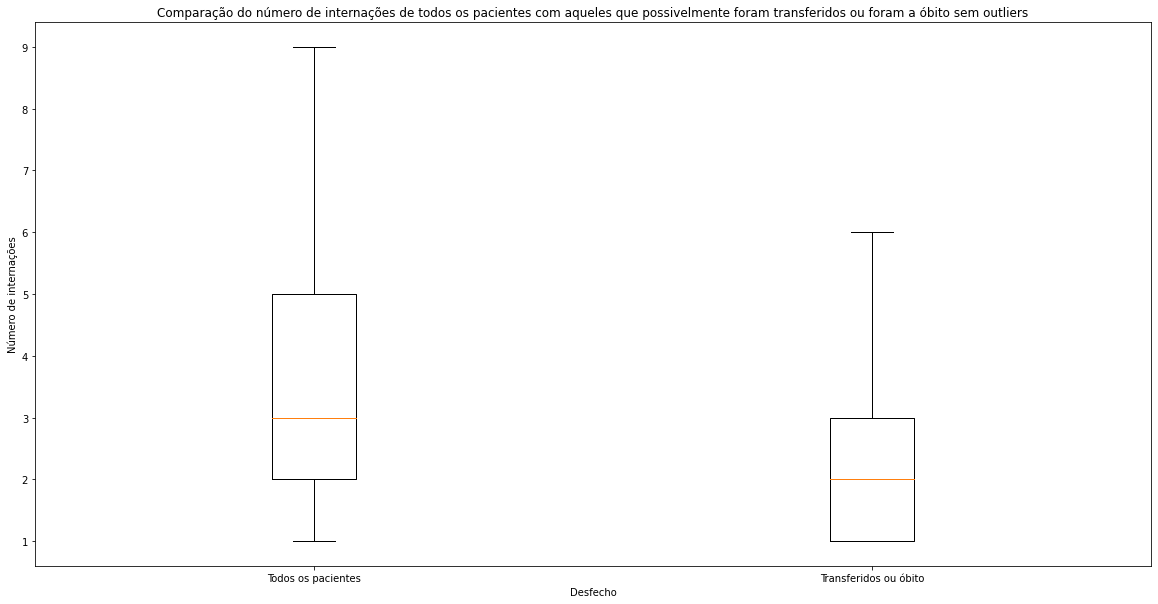

In [141]:
title="Comparação do número de internações de todos os pacientes com aqueles que possivelmente foram transferidos ou foram a óbito sem outliers"
boxplots([d_internations_values["numero_internacoes"], d_internation_patient_possible_bad_end["numero_internacoes_desfecho"]], 
         xlabel="Desfecho", ylabel="Número de internações", title=title, outliers=False, xticks=["Todos os pacientes", "Transferidos ou óbito"])

Com base nessa análise, pode-se concluir que a quantidade de internações não está diretamente relacionada com o possível desfecho, uma vez que a quantidade de internações para aqueles com possível desfecho de transferência ou óbito está na média da quantidade de internações para todos os pacientes com passagem pelo hemocentro e medida inicial apresentando neutropenia

##Análise unitária dos pacientes com possível desfecho de transferência ou óbito

Análise unitária das medidas dos pacientes com possível desfecho de transferência ou óbito feita em grupos de 7 pacientes





Medida para os pacientes: 15817743,20730592,20962232,15747905,25072735,25040239,25031573


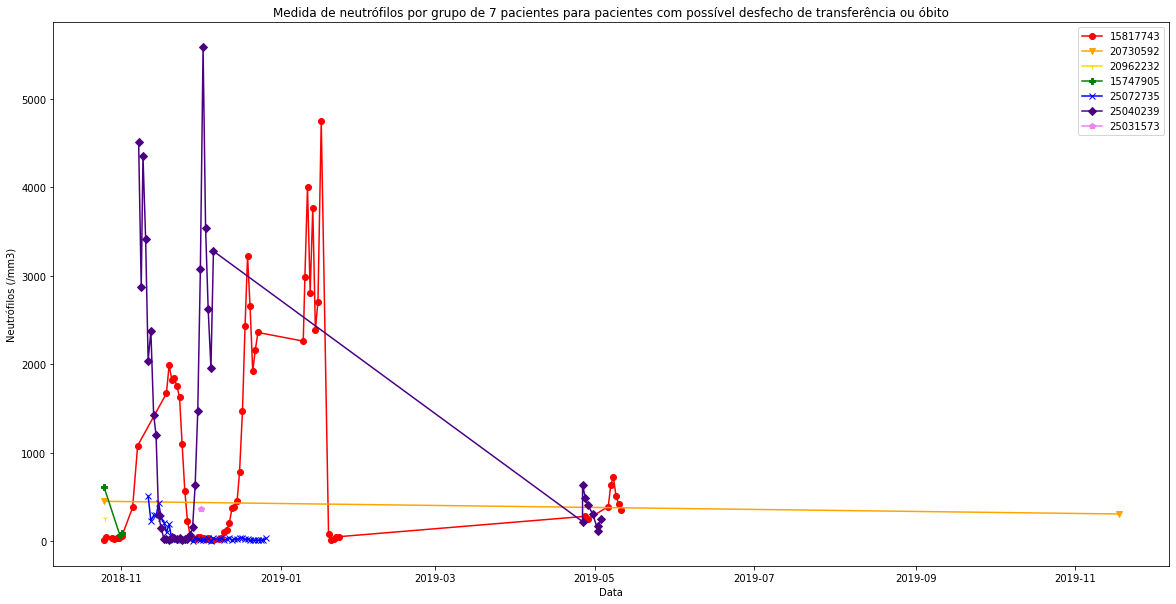




Medida para os pacientes: 20184270,25069276,25107451,24278638,22838939,24628154,25099487


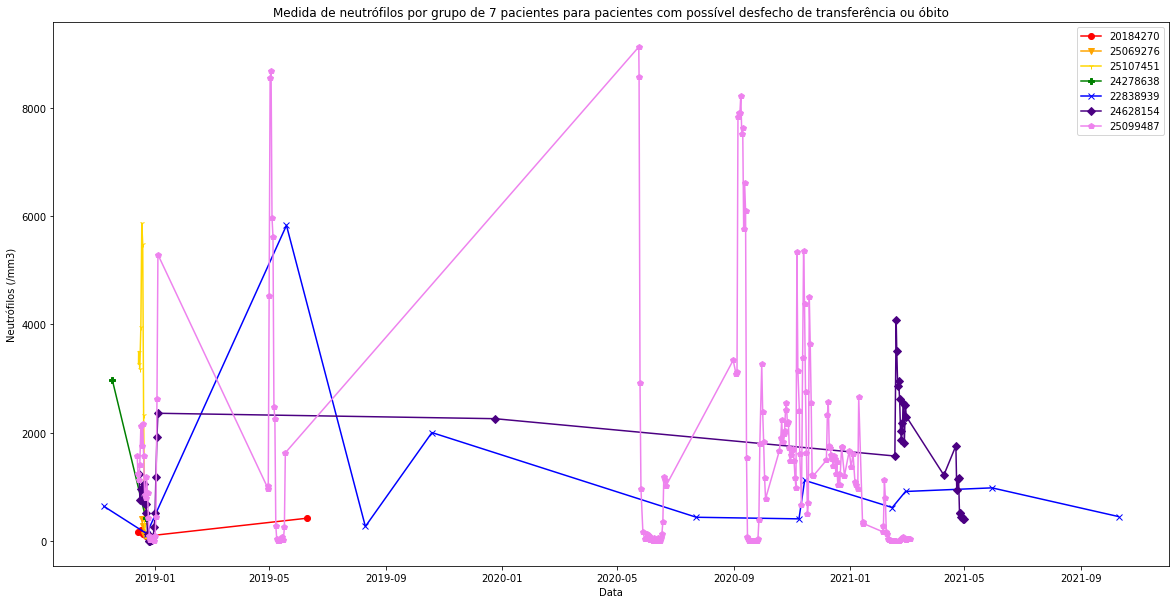




Medida para os pacientes: 25110381,25112221,24894344,24309707,15171652,25048516,18103529


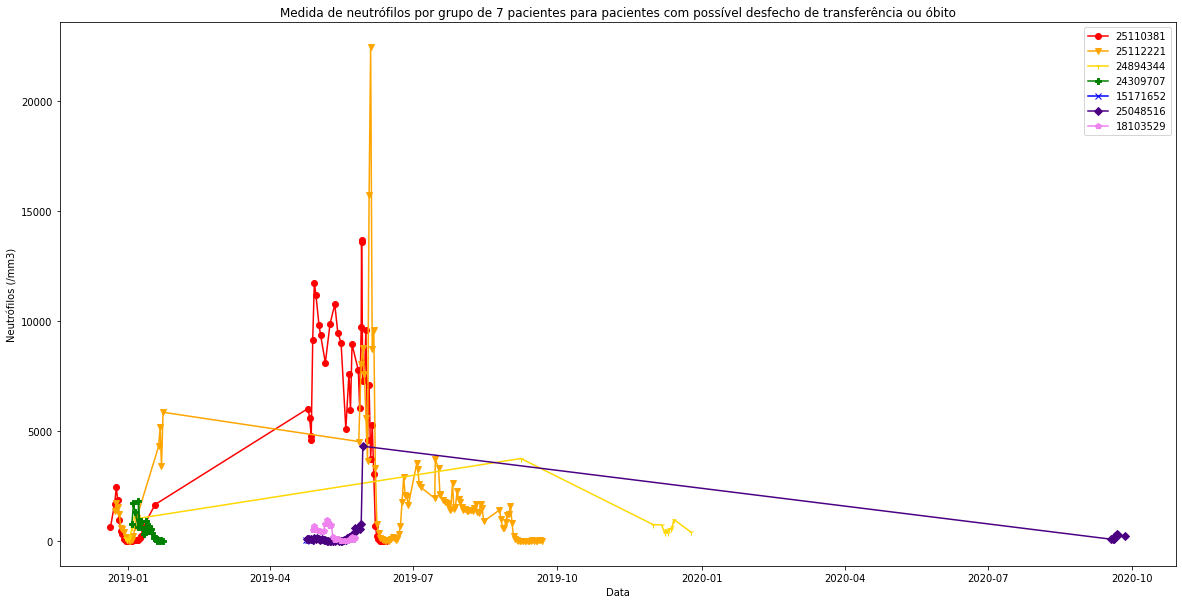




Medida para os pacientes: 23950904,25041736,25066982,25217423,25012914,24954455,16168812


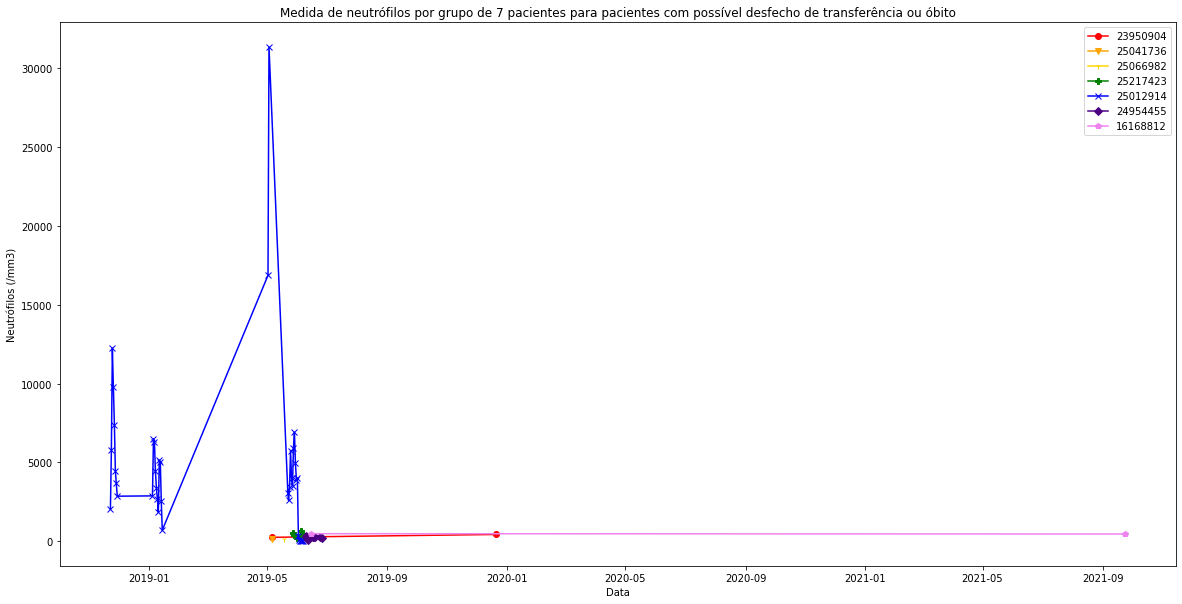




Medida para os pacientes: 24786535,25264639,20335736,23767130,25270005,25262978,25267263


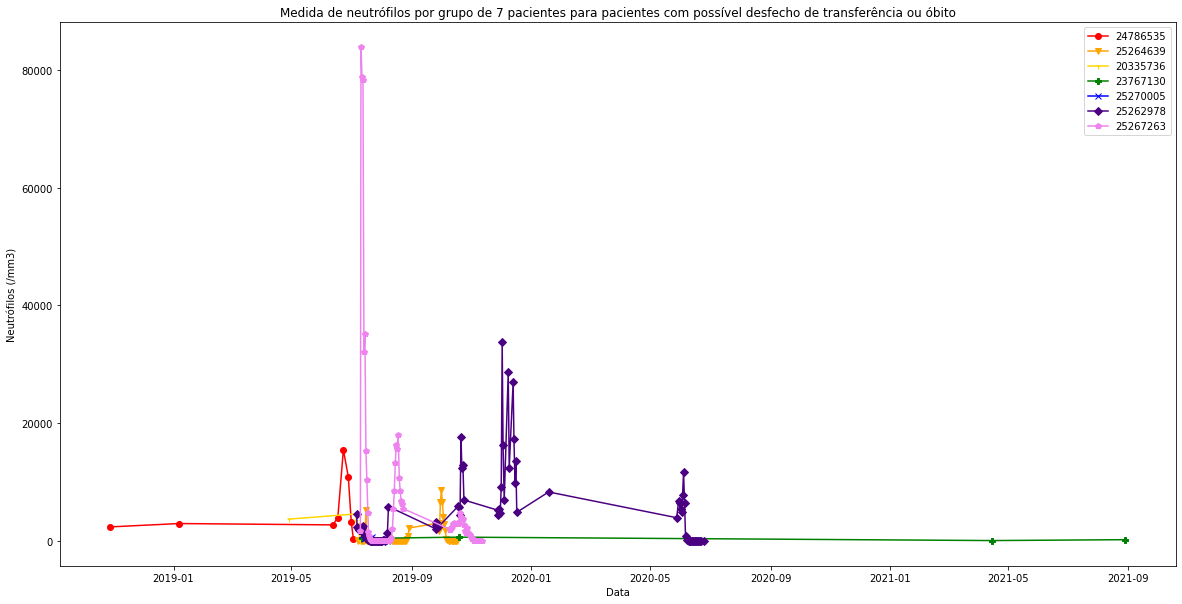




Medida para os pacientes: 24096540,14181668,15802309,25339043,25185503,22668048,25361461


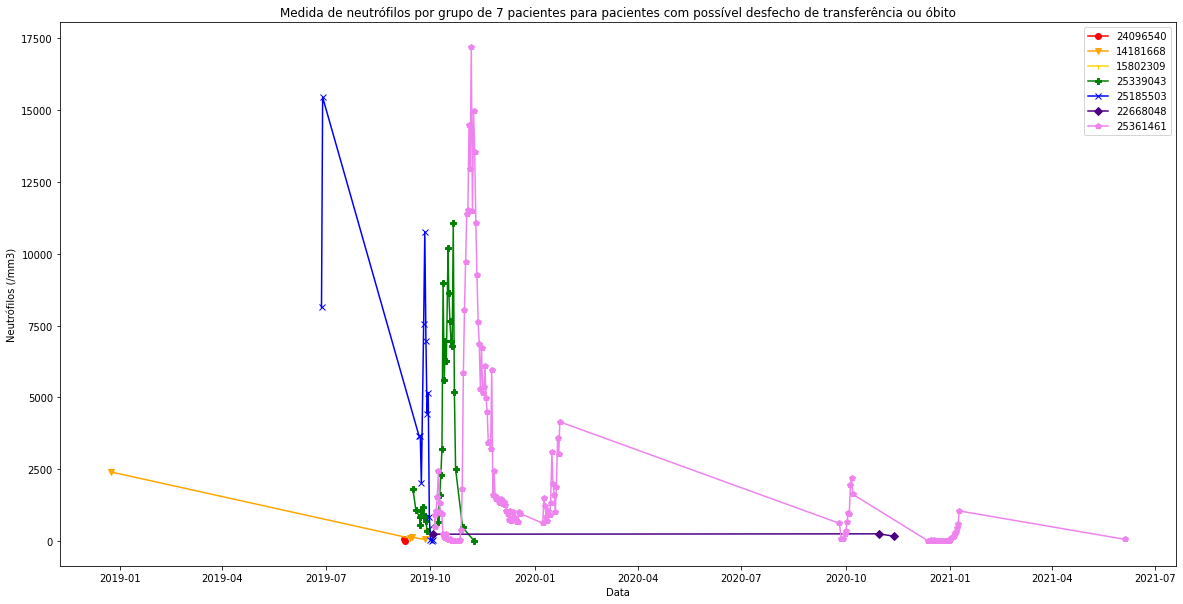




Medida para os pacientes: 19868537,24917172,25136593,24745387,24758029,25407115,24893974


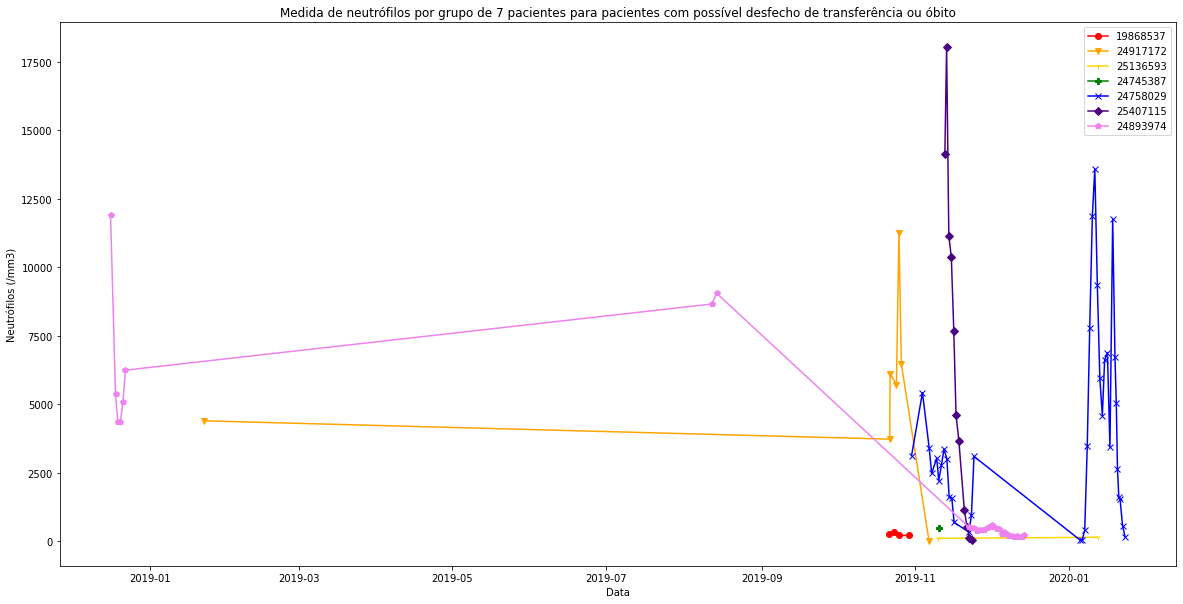




Medida para os pacientes: 25322843,25359055,25409531,23049193,25454660,25472547,25385220


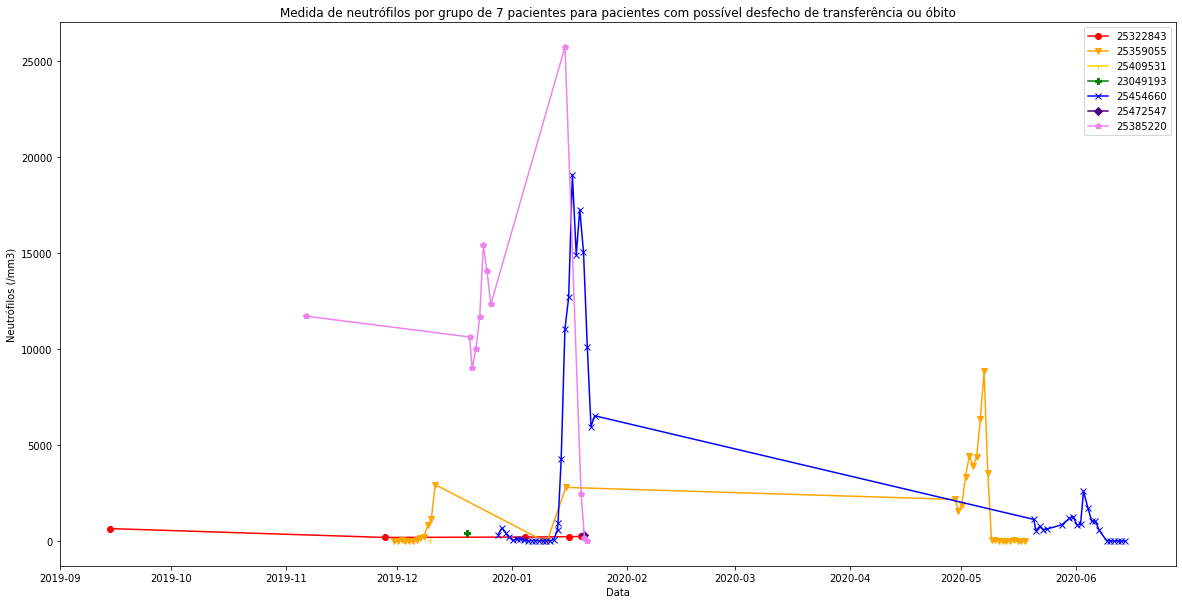




Medida para os pacientes: 20215202,25218645,25118156,24379712,21708908,25605620,20115645


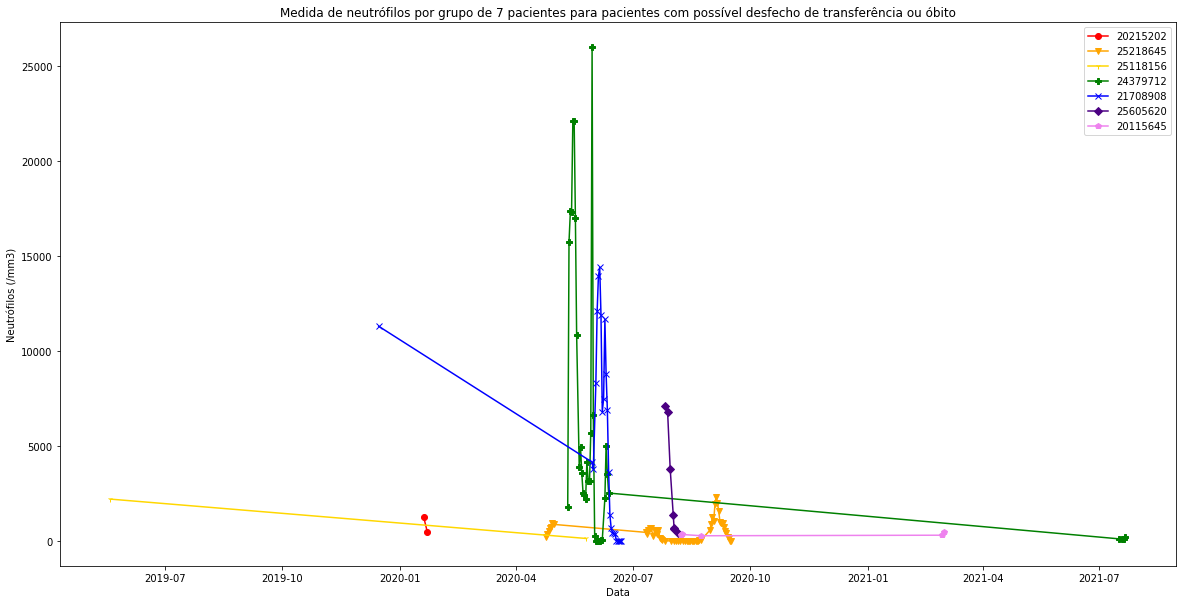




Medida para os pacientes: 25561824,25575918,16586108,25532080,25311492,25636452,25183610


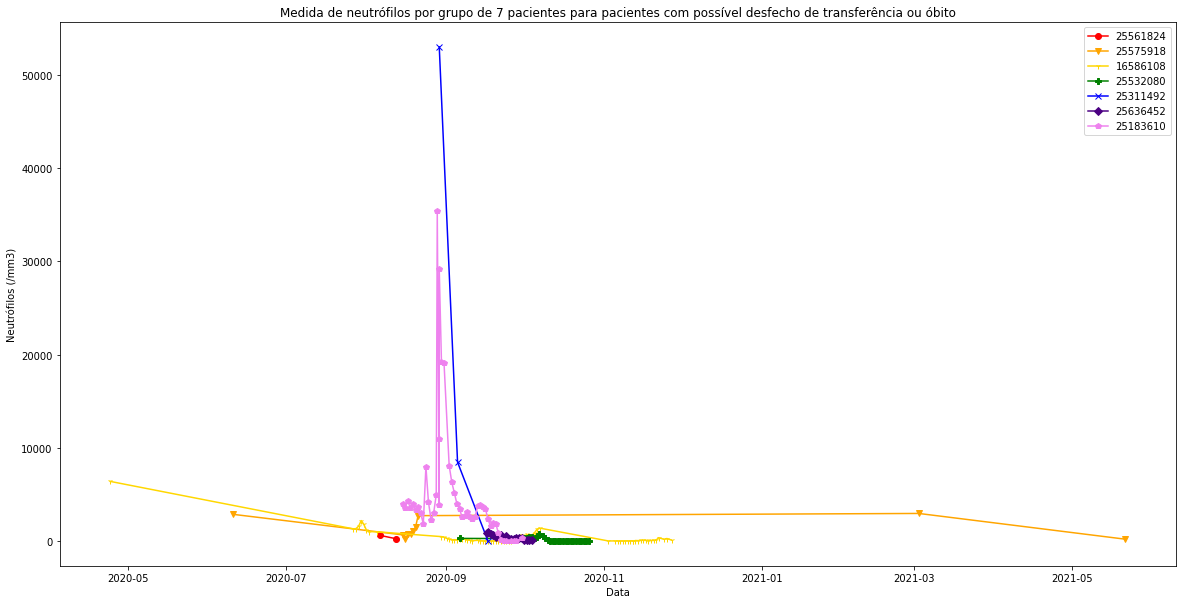




Medida para os pacientes: 18170857,20149978,25561281,23376632,25673266,20974586,25205798


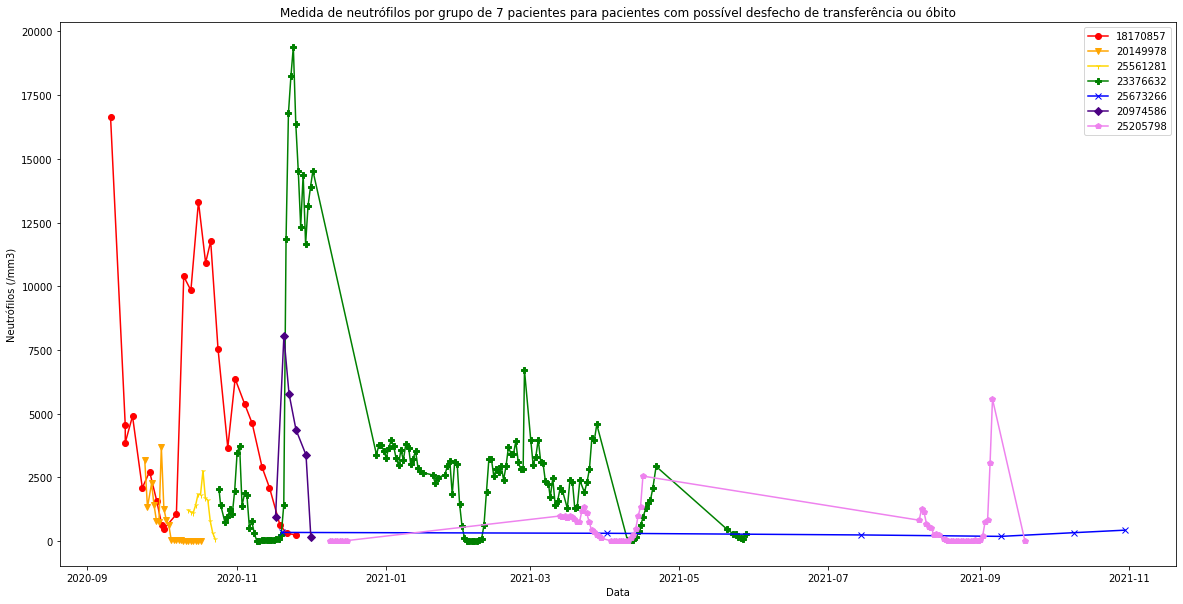




Medida para os pacientes: 25567220,25336193,21038295,25608035,25704519,25713573,25718257


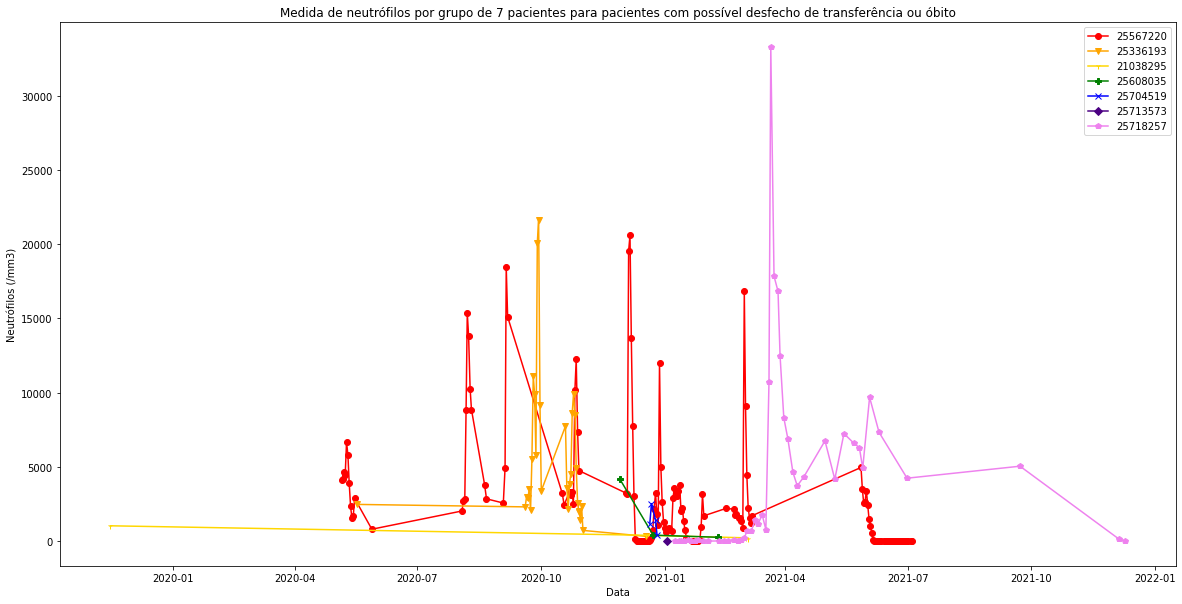




Medida para os pacientes: 25579004,21679974,20679961,25719037,25563798,24942646,25557462


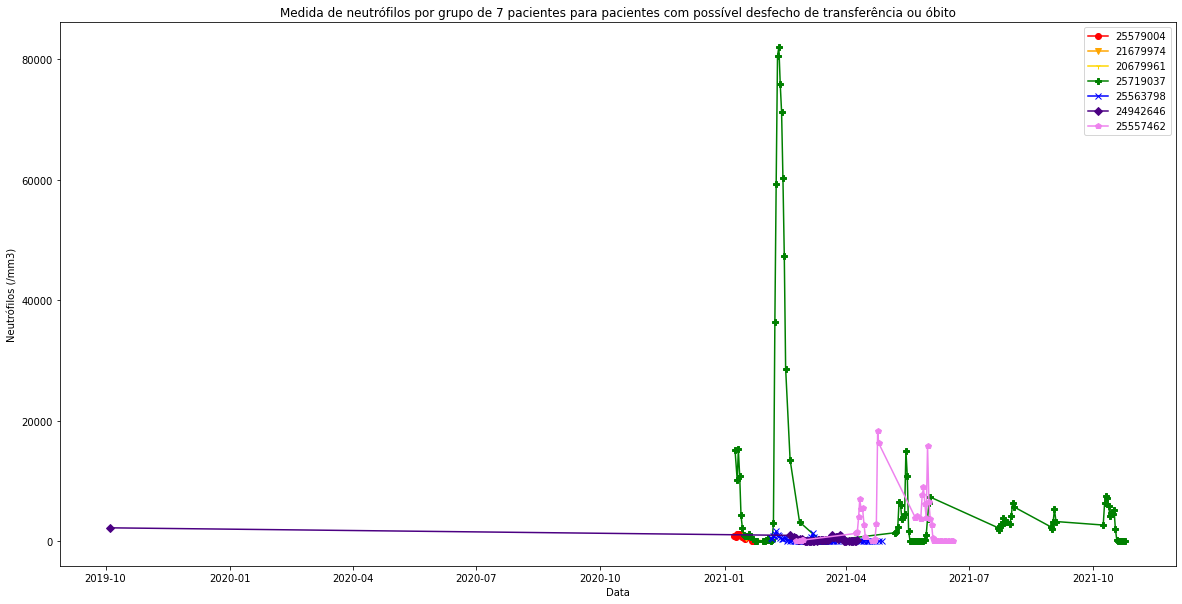




Medida para os pacientes: 23130870,25328710,25779158,25450922,25786517,21624899,25782160


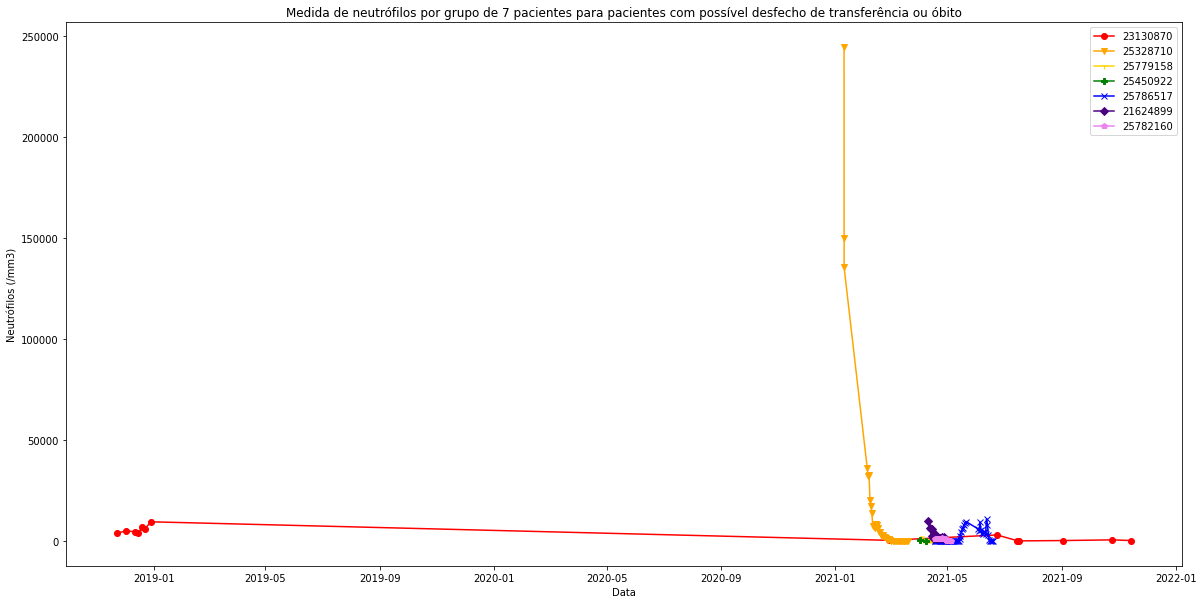




Medida para os pacientes: 16325910,25757933,25791783,25806370,18658931,24769843,24314889


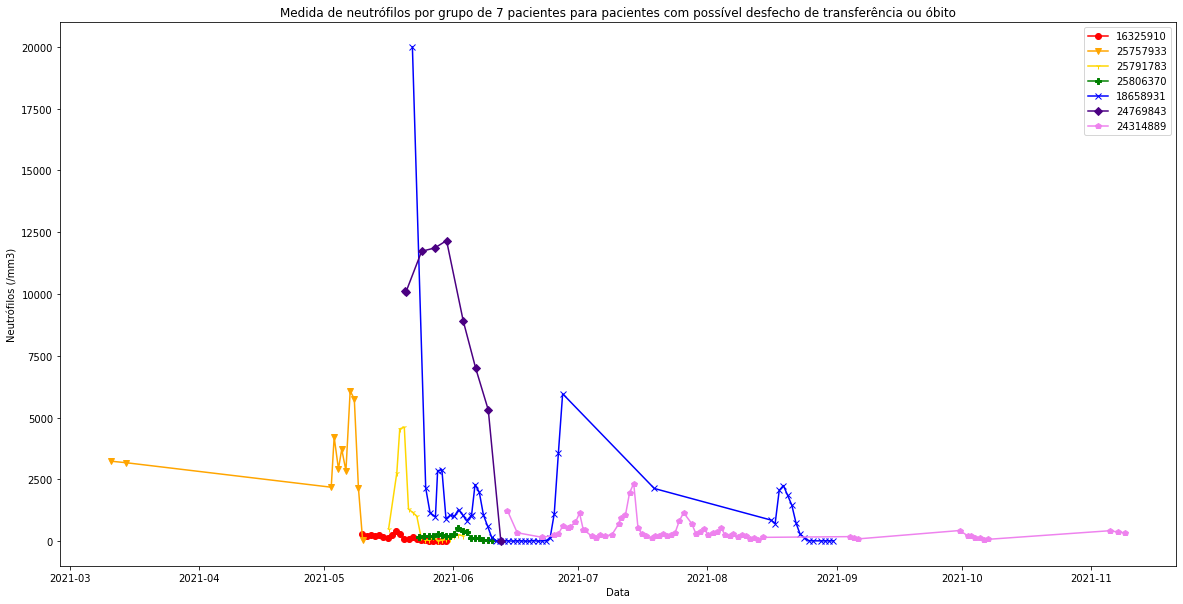




Medida para os pacientes: 25822946,23136795,25834599,25523091,25825061,24260373,25040172


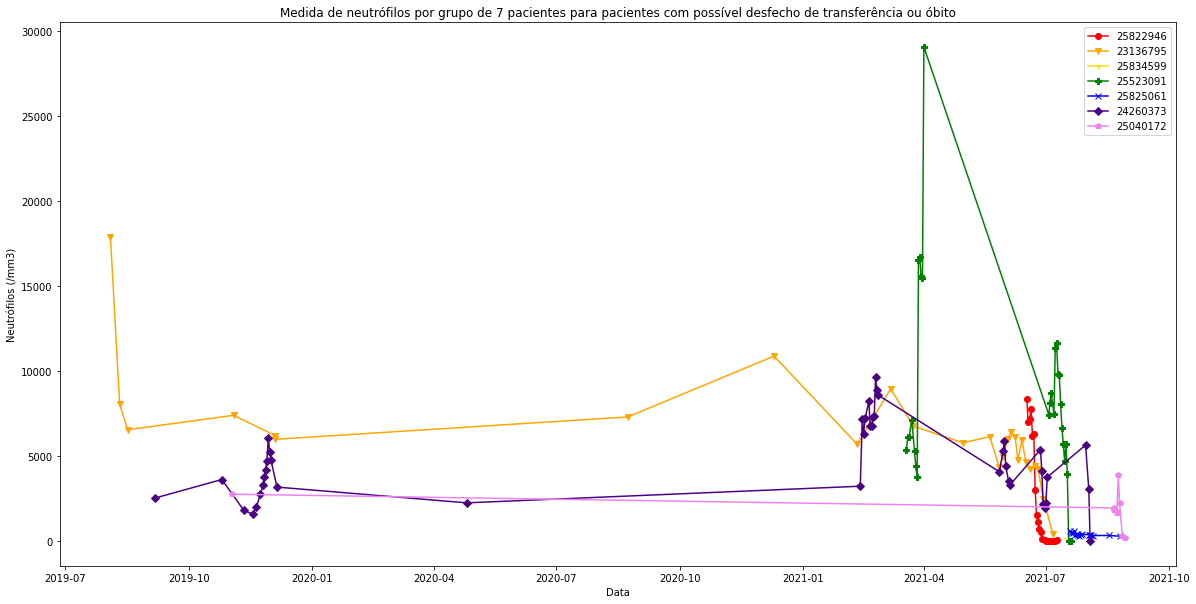




Medida para os pacientes: 18375863,23189565,17924816,25883509,17982938,22817964,25912468


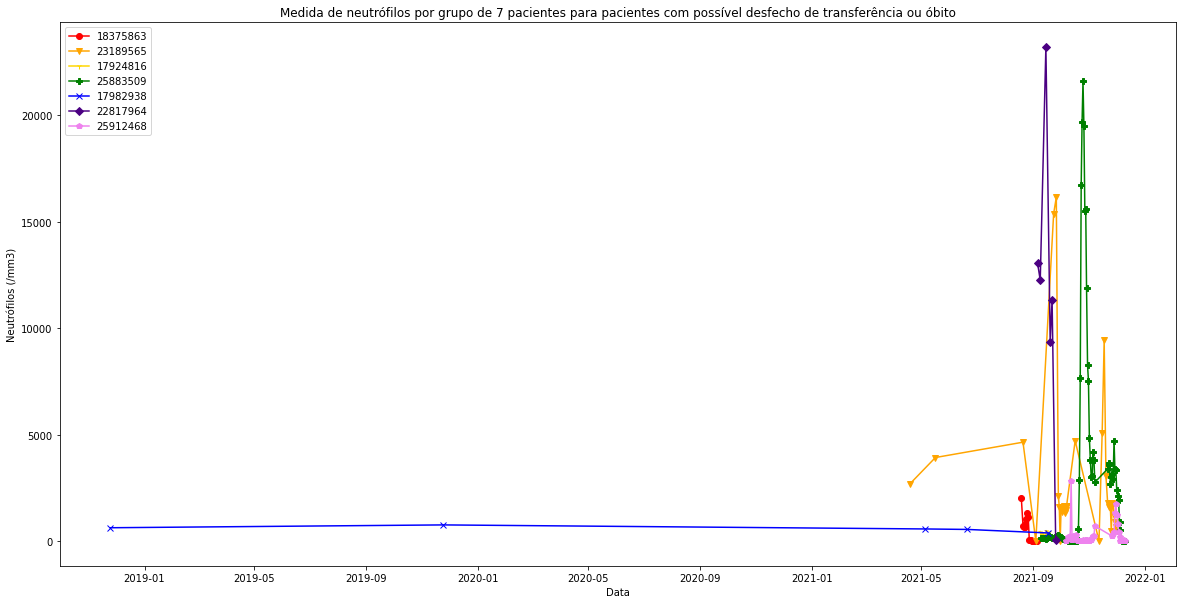




Medida para os pacientes: 25915458,25920281,25818301,22946597,19053070,24738401,25952430


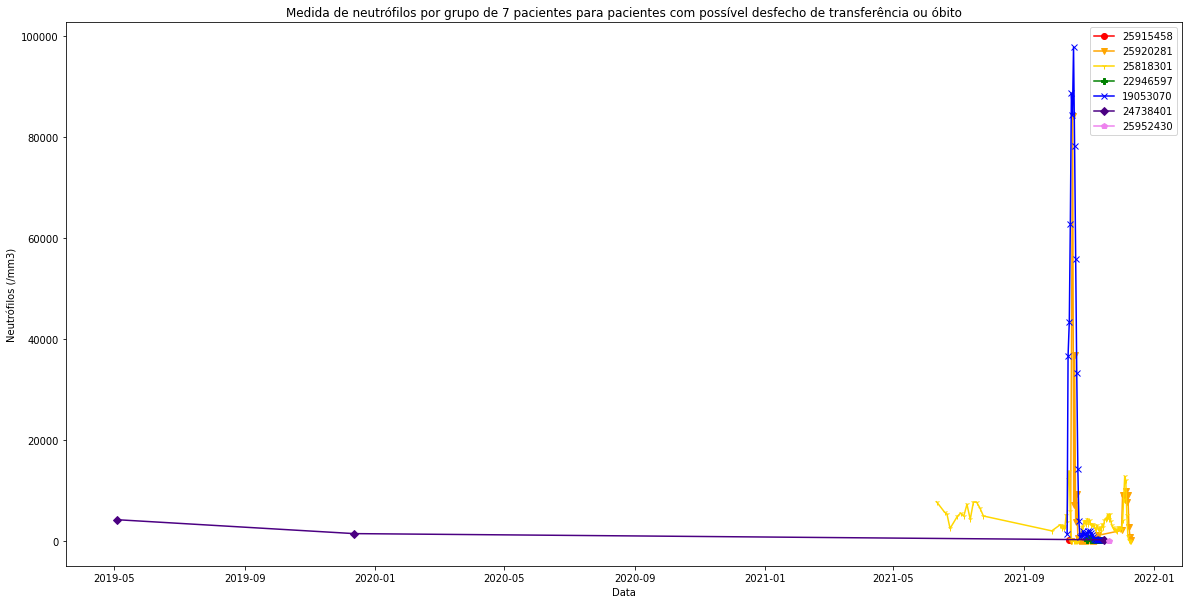




Medida para os pacientes: 19292983,25885936,25975197,25870890,25967889,20777315,24729699


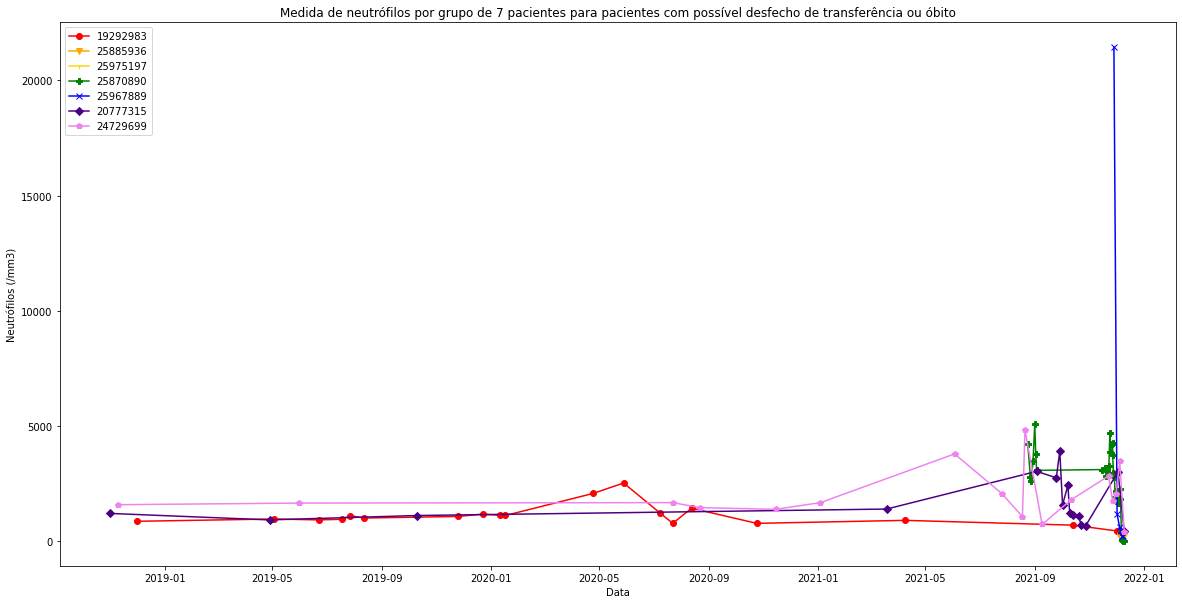

In [142]:
colors = ("red", "orange", "gold", "green", "blue", "indigo", "violet")
symb = ("-o", "-v", "-1", "-P", "-x", "-D", "-p")
counter = 0
for id, file_data in enumerate(patients):
    curr_id = list(file_data["Id"])[0]
    if curr_id in patients_with_possible_bad_end:
      if counter == 0:
        ids = []
        fig, ax = plt.subplots(1)
        pl.title("Medida de neutrófilos por grupo de 7 pacientes para pacientes com possível desfecho de transferência ou óbito")
        pl.ylabel("Neutrófilos (/mm3)")
        pl.xlabel("Data")
      ax.plot(file_data["Date"], file_data["Value"], symb[counter],
              color=colors[counter],
              label=curr_id)
      ids.append(curr_id)
      counter += 1
      if counter == 7:
        print("\n\n\nMedida para os pacientes: " + ','.join([str(x) for x in ids]))
        plt.rcParams['figure.figsize'] = [20, 10]
        plt.legend()
        plt.show()
        counter = 0

Com base nas análises individuais de cada paciente que apresentou piora na sua última medida, verifica-se que em alguns casos a quantidade de medidas é muito baixa e portanto é relativamente inconclusivo o desfecho, em outros casos que houveram melhoras e depois piores, e em outros casos que não houveram melhoras significativas.

# **Conclusão**

Com base nas análises desse estudo, conclui-se que:

*  A maioria dos pacientes com passagem pelo Hospital das Clínicas não desenvolveram a neutropenia. 
*  Dos pacientes neutropênicos, o maior número era tratado pelo hemocentro.    
*  A grande parte dos neutropênicos apresentaram ao menos uma medida características de neutropenia grave ou moderada entre todas as contagem de neutrófilos que foram feitas, dentre as internações.
*  Os homens apresentaram prognóstico inferior ao das mulheres ao longo do tratamento no quesito de medida de neutrófilos.
*  A quantidade de internações não aparenta está diretamente relacionada ao possível desfecho.
*  Pessoas que foram internadas com primeira a medida apresentando neutropenia tiveram maior probabilidade de prognóstico indicando óbito ou transferência hospitalar.